## Imports

In [2]:
!pip install backtesting
!pip install hyperopt
# !pip install python-binance

# !pip install -q gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 4.3 MB/s eta 0:00:00


In [3]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
!pip install conda-package-handling
!wget https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
!cph x ta-lib-0.5.1-py311h9ecbd09_0.conda
!mv ./ta-lib-0.5.1-py311h9ecbd09_0/lib/python3.11/site-packages/talib /usr/local/lib/python3.11/dist-packages/
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4079    0  4079    0     0  16414      0 --:--:-- --:--:-- --:--:-- 16381
100  517k  100  517k    0     0   571k      0 --:--:-- --:--:-- --:--:--  571k
--2025-08-14 01:56:52--  https://anaconda.org/conda-forge/ta-lib/0.5.1/download/linux-64/ta-lib-0.5.1-py311h9ecbd09_0.conda
Resolving anaconda.org (anaconda.org)... 104.19.144.37, 104.19.145.37, 2606:4700::6813:9025, ...
Connecting to anaconda.org (anaconda.org)|104.19.144.37|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5f738b4b78d4370a69f82984/673b62920c609ff6945bb24d?response-content-disposition=attachment%3B%20filename%3D%22ta-lib-0.5.1-py311h9ecbd09_0.conda%22%3B%20filename%2A%3DUTF-8%27%27ta-lib-0.5.1-py311h9ecbd09_0.conda&response-content-type=application%2Foctet-stream&X-Amz-Algorithm=

In [4]:
!pip install -q gdown
!gdown --id 1rsU2dMtJauwkrEZ2BR9vhyG_XOoltYVY -O klines_data_4h.csv
!gdown --id 1subUE3f_5uRuPG3irLD-w6BKZ2ZSXTl2 -O tradingview_signals_first.csv
!gdown --id 12CQtYa6w8JSP0rONQjU6D68hptuwBXC8 -O tradingview_signals_server.csv
!gdown --id 1XFrRbQXVj-DOE8HxoS5oxSaT5xDaXPAp -O tradingview_signals.csv
!gdown --id 1myLrl6gU3bLytydjo9mYtrq8eJhjSfPm -O tradingview_signals_real.csv






# https://drive.google.com/file/d/1rsU2dMtJauwkrEZ2BR9vhyG_XOoltYVY/view?usp=drive_link

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rsU2dMtJauwkrEZ2BR9vhyG_XOoltYVY
To: /content/klines_data_4h.csv
100% 959k/959k [00:00<00:00, 9.31MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1subUE3f_5uRuPG3irLD-w6BKZ2ZSXTl2
To: /content/tradingview_signals_first.csv
100% 64.9k/64.9k [00:00<00:00, 54.5MB/s]
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloadin

In [5]:
import pandas as pd
from backtesting import Backtest, Strategy
import numpy as np
# import pandas_ta as ta

/usr/local/lib/python3.11/dist-packages/backtesting/_plotting.py:55: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support, such as old IDEs. Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


### Import data (signals)

In [6]:
df4 = pd.read_csv('tradingview_signals_real.csv')

# === Переименовать столбец "interval" в "timeframe" ===
df4.rename(columns={"interval": "timeframe"}, inplace=True)
df4 = df4.sort_values(by='utc_time')
df4["utc_time"] = pd.to_datetime(df4["utc_time"])
df4["unix_timestamp"] = df4["utc_time"].astype('int64') // 10**9  # секунды

df4

#     id        symbol timeframe       signal    entry_price  \
0          1      1       BTCUSDT        4h         SELL  116507.613380   
1          2      2       ETHUSDT        4h   STRONG_BUY    3721.130000   
2          3      3       BCHUSDT        4h   STRONG_BUY     554.732753   
3          4      4       XRPUSDT        4h         SELL       3.133900   
4          5      5       LTCUSDT        4h   STRONG_BUY     115.708028   
...      ...    ...           ...       ...          ...            ...   
13215  13216  13216      TREEUSDT        4h         SELL       0.400565   
13218  13219  13219     PROVEUSDT        4h          BUY       1.658428   
13219  13220  13220  1000SATSUSDT        4h         SELL       0.000040   
13217  13218  13218     TOWNSUSDT        4h  STRONG_SELL       0.031693   
13216  13217  13217       A2ZUSDT        4h          BUY       0.007354   

                              utc_time  \
0     2025-07-25 12:00:09.394983+00:00   
1     2025-07-25 12:00:09.394987+00:00   
2     2025-07-25 12:00:09.394988+00:00   
3     2025-07-25 12:00:09.394989+00:00   
4     2025-07-25 12:00:09.394990+00:00   
...                                ...   
13215 2025-08-12 04:00:09.513645+00:00   
13218 2025-08-12 04:00:09.531854+00:00   
13219 2025-08-12 04:00:09.534731+00:00   
13217 2025-08-12 04:00:09.535513+00:00   
13216 2025-08-12 04:00:09.543227+00:00   

                                              indicators  unix_timestamp  
0                                                    NaN      1753444809  
1                                                    NaN      1753444809  
2                                                    NaN      1753444809  
3                                                    NaN      1753444809  
4                                                    NaN      1753444809  
...                                                  ...             ...  
13215  {"AO": {"value": -0.0023844117647056073, "sign...      1754971209  
13218  {"AO": {"value": 0.3288170588235293, "signal":...      1754971209  
13219  {"AO": {"value": 0.00000032285294117647697, "s...      1754971209  
13217  {"AO": {"value": 0.0013751470588235157, "signa...      1754971209  
13216  {"AO": {"value": 0.00018200588235294315, "sign...      1754971209  

[13220 rows x 9 columns]

In [7]:
import pandas as pd

df1 = pd.read_csv('tradingview_signals_first.csv')
# df2 = pd.read_csv('tradingview_signals.csv')
df3 = pd.read_csv('tradingview_signals_server.csv')

# === Переименовать столбец "interval" в "timeframe" ===
df4.rename(columns={"interval": "timeframe"}, inplace=True)

# === Преобразовать utc_time в datetime и добавить unix_timestamp ===
# df4["utc_time"] = pd.to_datetime(df4["utc_time"])
# df4["unix_timestamp"] = df4["utc_time"].astype('int64') // 10**9  # секунды

# df = pd.concat([df1, df2, df3], ignore_index=True)
df = pd.concat([df1, df3], ignore_index=True)



# df = pd.read_csv('signals_29_new.csv')
df = df.sort_values(by='utc_time')
# df.to_csv('tradingview_signals_merged.csv', index=False)
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
Index: 545835 entries, 492914 to 748
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   #               545835 non-null  int64  
 1   id              545835 non-null  int64  
 2   symbol          545835 non-null  object 
 3   timeframe       545835 non-null  object 
 4   signal          545835 non-null  object 
 5   entry_price     545835 non-null  float64
 6   unix_timestamp  545835 non-null  int64  
 7   utc_time        545835 non-null  object 
 8   local_time      545835 non-null  object 
 9   atr             428615 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 45.8+ MB


#   id    symbol timeframe       signal   entry_price  unix_timestamp  \
739  125  125    AIUSDT       15m  STRONG_SELL      0.230820      1740850356   
740  126  126  PERPUSDT       15m  STRONG_SELL      0.417900      1740850359   
741  127  127   NMRUSDT       15m  STRONG_SELL      9.880593      1740850360   
742  128  128   ETHUSDT       15m      NEUTRAL   2199.000000      1740851102   
743  129  129    SCUSDT       15m   STRONG_BUY      0.003661      1740851107   
744  130  130  SCRTUSDT       15m  STRONG_SELL      0.209323      1740851109   
745  131  131  HOOKUSDT       15m   STRONG_BUY      0.197359      1740851138   
746  132  132   BTCUSDT       15m   STRONG_BUY  85229.400000      1740851183   
747  133  133   MDTUSDT       15m   STRONG_BUY      0.029077      1740851216   
748  134  134   POLUSDT       15m   STRONG_BUY      0.272330      1740851227   

    utc_time local_time  atr  
739  32:36.0    32:36.0  NaN  
740  32:39.0    32:39.0  NaN  
741  32:40.0    32:40.0  NaN  
742  45:02.0    45:02.0  NaN  
743  45:07.0    45:07.0  NaN  
744  45:09.0    45:09.0  NaN  
745  45:38.0    45:38.0  NaN  
746  46:23.0    46:23.0  NaN  
747  46:56.0    46:56.0  NaN  
748  47:07.0    47:07.0  NaN

In [8]:
df.tail(10)

#   id    symbol timeframe       signal   entry_price  unix_timestamp  \
739  125  125    AIUSDT       15m  STRONG_SELL      0.230820      1740850356   
740  126  126  PERPUSDT       15m  STRONG_SELL      0.417900      1740850359   
741  127  127   NMRUSDT       15m  STRONG_SELL      9.880593      1740850360   
742  128  128   ETHUSDT       15m      NEUTRAL   2199.000000      1740851102   
743  129  129    SCUSDT       15m   STRONG_BUY      0.003661      1740851107   
744  130  130  SCRTUSDT       15m  STRONG_SELL      0.209323      1740851109   
745  131  131  HOOKUSDT       15m   STRONG_BUY      0.197359      1740851138   
746  132  132   BTCUSDT       15m   STRONG_BUY  85229.400000      1740851183   
747  133  133   MDTUSDT       15m   STRONG_BUY      0.029077      1740851216   
748  134  134   POLUSDT       15m   STRONG_BUY      0.272330      1740851227   

    utc_time local_time  atr  
739  32:36.0    32:36.0  NaN  
740  32:39.0    32:39.0  NaN  
741  32:40.0    32:40.0  NaN  
742  45:02.0    45:02.0  NaN  
743  45:07.0    45:07.0  NaN  
744  45:09.0    45:09.0  NaN  
745  45:38.0    45:38.0  NaN  
746  46:23.0    46:23.0  NaN  
747  46:56.0    46:56.0  NaN  
748  47:07.0    47:07.0  NaN

In [9]:
df = pd.concat([df, df4], ignore_index=True)



# df = pd.read_csv('signals_29_new.csv')
# df = df.sort_values(by='utc_time')
# df.to_csv('tradingview_signals_merged.csv', index=False)
df.info()
df.tail(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559055 entries, 0 to 559054
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   #               559055 non-null  int64  
 1   id              559055 non-null  int64  
 2   symbol          559055 non-null  object 
 3   timeframe       559055 non-null  object 
 4   signal          559055 non-null  object 
 5   entry_price     559055 non-null  float64
 6   unix_timestamp  559055 non-null  int64  
 7   utc_time        559055 non-null  object 
 8   local_time      545835 non-null  object 
 9   atr             428615 non-null  float64
 10  indicators      2387 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 46.9+ MB


#     id        symbol timeframe       signal  entry_price  \
559045  13211  13211    SAHARAUSDT        4h          BUY     0.094920   
559046  13213  13213       ERAUSDT        4h          BUY     1.052089   
559047  13212  13212         CUSDT        4h         SELL     0.255494   
559048  13214  13214       SLPUSDT        4h      NEUTRAL     0.001916   
559049  13215  13215       CVXUSDT        4h         SELL     4.292000   
559050  13216  13216      TREEUSDT        4h         SELL     0.400565   
559051  13219  13219     PROVEUSDT        4h          BUY     1.658428   
559052  13220  13220  1000SATSUSDT        4h         SELL     0.000040   
559053  13218  13218     TOWNSUSDT        4h  STRONG_SELL     0.031693   
559054  13217  13217       A2ZUSDT        4h          BUY     0.007354   

        unix_timestamp                          utc_time local_time  atr  \
559045      1754971209  2025-08-12 04:00:09.469952+00:00        NaN  NaN   
559046      1754971209  2025-08-12 04:00:09.478128+00:00        NaN  NaN   
559047      1754971209  2025-08-12 04:00:09.478142+00:00        NaN  NaN   
559048      1754971209  2025-08-12 04:00:09.490916+00:00        NaN  NaN   
559049      1754971209  2025-08-12 04:00:09.505775+00:00        NaN  NaN   
559050      1754971209  2025-08-12 04:00:09.513645+00:00        NaN  NaN   
559051      1754971209  2025-08-12 04:00:09.531854+00:00        NaN  NaN   
559052      1754971209  2025-08-12 04:00:09.534731+00:00        NaN  NaN   
559053      1754971209  2025-08-12 04:00:09.535513+00:00        NaN  NaN   
559054      1754971209  2025-08-12 04:00:09.543227+00:00        NaN  NaN   

                                               indicators  
559045  {"AO": {"value": 0.004354205882352927, "signal...  
559046  {"AO": {"value": 0.015152647058823243, "signal...  
559047  {"AO": {"value": -0.001838823529411615, "signa...  
559048  {"AO": {"value": 0.000036420588235292406, "sig...  
559049  {"AO": {"value": -0.08683823529412038, "signal...  
559050  {"AO": {"value": -0.0023844117647056073, "sign...  
559051  {"AO": {"value": 0.3288170588235293, "signal":...  
559052  {"AO": {"value": 0.00000032285294117647697, "s...  
559053  {"AO": {"value": 0.0013751470588235157, "signa...  
559054  {"AO": {"value": 0.00018200588235294315, "sign...

### Import data (klines)

In [10]:
import pandas as pd
import numpy as np

interval = "4h"
klines_df = pd.read_csv(f"klines_data_{interval}.csv")
# signals_df = pd.read_csv("tradingview_signals_server.csv")
signals_df = df.copy()



# для сгенерированных сигналов
# signals_df['utc_time'] = pd.to_datetime(signals_df['utc_time'], dayfirst=True)
# # signals_df['unix_timestamp'] = signals_df['utc_time'].astype('int64') // 10**9


signals_df["utc_time"] = pd.to_datetime(signals_df["unix_timestamp"], unit="s", utc=True).dt.floor("H")

print(signals_df[["symbol", "utc_time", "signal"]].head())


print('klines_df.shape', klines_df.shape)
klines_df.info()

    symbol                  utc_time       signal
0  BTCUSDT 2025-06-17 21:00:00+00:00         SELL
1  ETHUSDT 2025-04-08 03:00:00+00:00          BUY
2  BNBUSDT 2025-04-26 09:00:00+00:00  STRONG_SELL
3  BTCUSDT 2025-04-26 09:00:00+00:00         SELL
4  BTCUSDT 2025-04-26 09:00:00+00:00         SELL
klines_df.shape (13062, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13062 entries, 0 to 13061
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    13062 non-null  object 
 1   Open    13062 non-null  float64
 2   High    13062 non-null  float64
 3   Low     13062 non-null  float64
 4   Close   13062 non-null  float64
 5   Volume  13062 non-null  float64
 6   Symbol  13062 non-null  object 
dtypes: float64(5), object(2)
memory usage: 714.5+ KB


/tmp/ipython-input-1864457732.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  signals_df["utc_time"] = pd.to_datetime(signals_df["unix_timestamp"], unit="s", utc=True).dt.floor("H")


In [11]:
klines_df.tail()

Date      Open      High       Low     Close  \
13057  2025-08-13 00:00:00+00:00  0.009252  0.009412  0.009246  0.009315   
13058  2025-08-13 04:00:00+00:00  0.009314  0.009405  0.009264  0.009291   
13059  2025-08-13 08:00:00+00:00  0.009293  0.009384  0.009114  0.009314   
13060  2025-08-13 12:00:00+00:00  0.009313  0.009380  0.009205  0.009286   
13061  2025-08-13 16:00:00+00:00  0.009279  0.009405  0.009179  0.009361   

            Volume   Symbol  
13057  105389111.0  FUNUSDT  
13058  108680765.0  FUNUSDT  
13059  131689536.0  FUNUSDT  
13060  177748529.0  FUNUSDT  
13061  103251908.0  FUNUSDT

In [12]:
print('signals_df.shape', signals_df.shape)
signals_df.info()

signals_df.shape (559055, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559055 entries, 0 to 559054
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   #               559055 non-null  int64              
 1   id              559055 non-null  int64              
 2   symbol          559055 non-null  object             
 3   timeframe       559055 non-null  object             
 4   signal          559055 non-null  object             
 5   entry_price     559055 non-null  float64            
 6   unix_timestamp  559055 non-null  int64              
 7   utc_time        559055 non-null  datetime64[ns, UTC]
 8   local_time      545835 non-null  object             
 9   atr             428615 non-null  float64            
 10  indicators      2387 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 46.9+ MB


In [13]:
klines_df['Date'] = pd.to_datetime(klines_df['Date'])

signals_df['utc_time'] = pd.to_datetime(signals_df['utc_time'])
# df4["unix_timestamp"] = df4["utc_time"].astype('int64') // 10**9  # секунды

signals_df = signals_df[signals_df["timeframe"] == f"{interval}"]

In [14]:
# !pip install backtesting
# !pip install pandas_ta
# !pip install hyperopt

## Strategy

### Basic

In [15]:
import pandas as pd
import numpy as np
# import pandas_ta as ta
from backtesting import Backtest, Strategy

trade_log = []
class SignalStrategy(Strategy):
    stop_loss_multiplier = 0.4
    take_profit_multiplier = 1.2
    signals_df = None
    symbol = None

    def init(self):
        """Load trading signals and ATR indicator"""
        self.signals = self.signals_df[self.signals_df["symbol"] == self.symbol]
        self.used_signals = set()

        def atr_indicator(h, l, c):
            """Calculate ATR (Average True Range)"""
            try:
                atr_values = ta.atr(pd.Series(h), pd.Series(l), pd.Series(c), length=14)
                return atr_values.fillna(0).to_numpy() if atr_values is not None else np.zeros(len(h))
            except Exception as e:
                print(f"Error calculating ATR: {e}")
                return np.zeros(len(h))

        self.atr = self.I(atr_indicator, self.data.High, self.data.Low, self.data.Close)

    def next(self):
        """Process signals and open trades accordingly"""
        current_time = self.data.index[-1]
        current_price = self.data.Close[-1]
        current_atr = self.atr[-1]

        if current_atr == 0 or pd.isna(current_atr):
            return

        for _, signal in self.signals.iterrows():
            signal_time = signal['utc_time']

            if signal_time in self.used_signals:
                continue

            if signal_time in self.data.index:
                self.used_signals.add(signal_time)

                if signal['signal'] == "STRONG_BUY" and not self.position:
                    stop_loss = current_price - (self.stop_loss_multiplier * current_atr)
                    take_profit = current_price + (self.take_profit_multiplier * current_atr)

                    if stop_loss < current_price < take_profit:
                        print(f"🚀 LONG {self.symbol} | {current_time} | Price: {current_price} | SL: {stop_loss:.4f} | TP: {take_profit:.4f}")
                        self.buy(sl=stop_loss, tp=take_profit)

                elif signal['signal'] == "STRONG_SELL" and not self.position:
                    stop_loss = current_price + (self.stop_loss_multiplier * current_atr)
                    take_profit = current_price - (self.take_profit_multiplier * current_atr)

                    if take_profit < current_price < stop_loss:
                        print(f"🚨 SHORT {self.symbol} | {current_time} | Price: {current_price} | SL: {stop_loss:.4f} | TP: {take_profit:.4f}")
                        self.sell(sl=stop_loss, tp=take_profit)

    def notify_trade(self, trade):
        """Log trade results when a trade is closed"""
        if trade.is_closed:
            trade_log.append({
                "Symbol": self.symbol,
                "Entry Time": trade.entry_time,
                "Exit Time": trade.exit_time,
                "Entry Price": trade.entry_price,
                "Exit Price": trade.exit_price,
                "Return [%]": trade.pl_pct * 100,
            })


### Basic + BTC filter

In [16]:
import pandas as pd
import numpy as np
# import pandas_ta as ta
from backtesting import Backtest, Strategy


trade_log = []

class SignalStrategyBTC(Strategy):
    stop_loss_multiplier = 0.45
    take_profit_multiplier = 1.25
    signals_df = None
    btc_signals_df = None
    symbol = None

    def init(self):
        """Load trading signals and ATR indicator"""
        self.signals = self.signals_df[self.signals_df["symbol"] == self.symbol].copy()
        self.used_signals = set()

        # Обрабатываем BTC сигналы
        self.btc_signals = self.signals_df[self.signals_df["symbol"] == "BTCUSDT"].copy()
        if not self.btc_signals.empty:
            self.btc_signals["utc_time"] = pd.to_datetime(self.btc_signals["utc_time"]).dt.floor("min")
        else:
            self.btc_signals = None  # Отключаем проверку, если данных нет
            # print("⚠️ Нет сигналов BTCUSDT! Проверка отключена.")

        self.signals["utc_time"] = pd.to_datetime(self.signals["utc_time"]).dt.floor("min")

        # ATR Indicator
        self.atr = self.I(self.atr_indicator, self.data.High, self.data.Low, self.data.Close)

    # def atr_indicator(self, h, l, c):
    #     """Calculate ATR (Average True Range)"""
    #     try:
    #         atr_values = ta.atr(pd.Series(h), pd.Series(l), pd.Series(c), length=14)
    #         return atr_values.fillna(0).to_numpy() if atr_values is not None else np.zeros(len(h))
    #     except Exception as e:
    #         print(f"Error calculating ATR: {e}")
    #         return np.zeros(len(h))


    def atr_indicator(self, h, l, c):
        try:
            atr = talib.ATR(h, l, c, timeperiod=14)
            return np.nan_to_num(atr)
        except Exception as e:
            print(f"ATR error: {e}")
            return np.zeros(len(c))


    def next(self):
        """Обрабатываем сигналы, если они соответствуют таймфрейму"""
        current_time = self.data.index[-1]  # Время текущей свечи
        current_price = self.data.Close[-1]
        current_atr = self.atr[-1]

        if current_atr == 0 or pd.isna(current_atr):
            return


        # if self.position:
        #     return

        # Получаем BTC сигнал, если он есть
        btc_signal = None
        if not self.position and self.btc_signals is not None:
            btc_row = self.btc_signals[(self.btc_signals["utc_time"] == current_time) &
                                      (self.btc_signals["timeframe"] == interval)]
            if not btc_row.empty:
                btc_signal = btc_row.iloc[0]["signal"]

        # print(f"[{current_time}] 🔍 BTC сигнал: {btc_signal if btc_signal else 'Нет сигнала'}")

        # Фильтруем сигналы по `utc_time` и `timeframe == interval`
        relevant_signals = self.signals[(self.signals["utc_time"] == current_time) &
                                        (self.signals["timeframe"] == interval)]

        if relevant_signals.empty:
            # print(f"[{current_time}] ⏳ Нет сигналов {self.symbol} на интервале {interval}")
            return  # Пропускаем, если нет сигналов в нужном интервале

        for _, signal in relevant_signals.iterrows():
            if signal["utc_time"] in self.used_signals:
                continue

            self.used_signals.add(signal["utc_time"])

            # Убеждаемся, что BTC сигнал тоже соответствует интервалу
            if btc_signal is None:
                # print(f"[{current_time}] ❌ Нет BTC сигнала, пропускаем {self.symbol}")
                continue


            # if (btc_signal in ["BUY", "STRONG_BUY", "NEUTRAL"] and signal["signal"] == "STRONG_BUY"):
            if (btc_signal in ["BUY", "STRONG_BUY"] and signal["signal"] == "STRONG_BUY"):
                stop_loss = current_price - (self.stop_loss_multiplier * current_atr)
                take_profit = current_price + (self.take_profit_multiplier * current_atr)


                print(f"🚀 LONG {self.symbol} | {current_time} | BTC: {btc_signal} | Price: {current_price} | SL: {stop_loss:.4f} | TP: {take_profit:.4f}")
                self.buy(sl=stop_loss, tp=take_profit)

            # elif (btc_signal in ["SELL", "STRONG_SELL", "NEUTRAL"] and signal["signal"] == "STRONG_SELL"):
            elif (btc_signal in ["SELL", "STRONG_SELL"] and signal["signal"] == "STRONG_SELL"):
                stop_loss = current_price + (self.stop_loss_multiplier * current_atr)
                take_profit = current_price - (self.take_profit_multiplier * current_atr)


                print(f"🚨 SHORT {self.symbol} | {current_time} | BTC: {btc_signal} | Price: {current_price} | SL: {stop_loss:.4f} | TP: {take_profit:.4f}")
                self.sell(sl=stop_loss, tp=take_profit)




### BTC filter + 2 takes

In [17]:
class SignalStrategyBTCTwoTakes(Strategy):
    stop_loss_multiplier = 0.25
    take1_profit_multiplier = 1.0
    take2_profit_multiplier = 2.0
    btc_signals_df = None
    symbol = None
    close_portion = 0.5
    interval = interval

    def init(self):
        self.signals = self.signals_df[self.signals_df["symbol"] == self.symbol].copy()
        self.used_signals = set()
        self.btc_signals = self.signals_df[self.signals_df["symbol"] == "BTCUSDT"].copy()
        self.btc_signals["utc_time"] = pd.to_datetime(self.btc_signals["utc_time"]).dt.floor(self.interval)
        self.signals["utc_time"] = pd.to_datetime(self.signals["utc_time"]).dt.floor(self.interval)
        self.atr = self.I(self.atr_indicator, self.data.High, self.data.Low, self.data.Close)

        self.active_trade = None

        # Статистика
        self.results = {
            "tp2_hit": 0,
            "tp1_only_then_sl": 0,
            "sl_before_tp1": 0
        }

    # def atr_indicator(self, h, l, c):
    #     try:
    #         atr_values = ta.atr(pd.Series(h), pd.Series(l), pd.Series(c), length=14)
    #         return atr_values.fillna(0).to_numpy()
    #     except:
    #         return np.zeros(len(h))


    def atr_indicator(self, h, l, c):
        try:
            atr = talib.ATR(h, l, c, timeperiod=14)
            print(atr)
            return np.nan_to_num(atr)
        except Exception as e:
            print(f"ATR error: {e}")
            return np.zeros(len(c))



    def next(self):
        current_time = self.data.index[-1]
        price = self.data.Close[-1]
        atr = self.atr[-1]

        if atr == 0 or pd.isna(atr):
            return

        # Управление уже открытой сделкой
        if self.active_trade:
            direction = self.active_trade['direction']
            entry = self.active_trade['entry']
            tp1 = self.active_trade['tp1']
            tp2 = self.active_trade['tp2']
            sl = self.active_trade['sl']
            moved_to_be = self.active_trade['moved_to_be']

            if direction == "long":
                if not moved_to_be and price >= tp1:
                    self.active_trade['moved_to_be'] = True
                    self.position.close(portion=self.close_portion)
                    self.active_trade['sl'] = entry * 1.01
                    print(f"✅ TP1 hit {tp1}! Moved SL to BE: {self.active_trade['sl']:.8f}")


                elif moved_to_be and price >= tp2:
                    self.results["tp2_hit"] += 1
                    print(f"🎯 TP2 hit {tp2}! Closing remaining.")
                    self.position.close()
                    self.active_trade = None

                elif price <= sl:
                    if moved_to_be:
                        self.results["tp1_only_then_sl"] += 1
                        print(f"🛑 SL after TP1 (BE+)! SL: {sl}")
                    else:
                        self.results["sl_before_tp1"] += 1
                        print(f"🛑 SL before TP1! SL: {sl}")
                    self.position.close()
                    self.active_trade = None

            elif direction == "short":
                if not moved_to_be and price <= tp1:
                    self.active_trade['moved_to_be'] = True
                    self.position.close(portion=self.close_portion)
                    self.active_trade['sl'] = entry * 0.99
                    print(f"✅ TP1 hit {tp1}! Moved SL to BE: {self.active_trade['sl']:.8f}")
                elif moved_to_be and price <= tp2:
                    self.results["tp2_hit"] += 1
                    print(f"🎯 TP2 hit {tp2}! Closing remaining.")
                    self.position.close()
                    self.active_trade = None
                elif price >= sl:
                    if moved_to_be:
                        self.results["tp1_only_then_sl"] += 1
                        print(f"🛑 SL after TP1 (BE+)! SL: {sl}")
                    else:
                        self.results["sl_before_tp1"] += 1
                        print(f"🛑 SL before TP1! SL: {sl}")
                    self.position.close()
                    self.active_trade = None

            return

        # Ждём завершения сделки
        if self.position:
            return

        # Получение сигнала по BTC
        btc_signal = None
        if self.btc_signals is not None:
            btc_row = self.btc_signals[(self.btc_signals["utc_time"] == current_time) &
                                       (self.btc_signals["timeframe"] == interval)]
            if not btc_row.empty:
                btc_signal = btc_row.iloc[0]["signal"]

        relevant_signals = self.signals[(self.signals["utc_time"] == current_time) &
                                        (self.signals["timeframe"] == interval)]

        for _, signal in relevant_signals.iterrows():
            if signal["utc_time"] in self.used_signals:
                continue
            self.used_signals.add(signal["utc_time"])

            # if signal["signal"] == "STRONG_BUY" and btc_signal in ["BUY", "STRONG_BUY", "NEUTRAL"]:
            if signal["signal"] == "STRONG_BUY" and btc_signal in ["BUY", "STRONG_BUY"]:
                sl = price - self.stop_loss_multiplier * atr
                tp1 = price + self.take1_profit_multiplier * atr
                tp2 = price + self.take2_profit_multiplier * atr
                self.buy()
                self.active_trade = {
                    "direction": "long",
                    "entry": price,
                    "sl": sl,
                    "tp1": tp1,
                    "tp2": tp2,
                    "moved_to_be": False
                }
                print(f"🚀 LONG {self.symbol} | {current_time} | Price: {price} | SL: {sl}, TP1: {tp1}, TP2: {tp2}")

            # elif signal["signal"] == "STRONG_SELL" and btc_signal in ["SELL", "STRONG_SELL", "NEUTRAL"]:
            elif signal["signal"] == "STRONG_SELL" and btc_signal in ["SELL", "STRONG_SELL"]:
                sl = price + self.stop_loss_multiplier * atr
                tp1 = price - self.take1_profit_multiplier * atr
                tp2 = price - self.take2_profit_multiplier * atr
                self.sell()
                self.active_trade = {
                    "direction": "short",
                    "entry": price,
                    "sl": sl,
                    "tp1": tp1,
                    "tp2": tp2,
                    "moved_to_be": False
                }
                print(f"🚨 SHORT {self.symbol} | {current_time} | Price: {price} | SL: {sl}, TP1: {tp1}, TP2: {tp2}")

    def report(self):
        print("\n📊 Deal Outcome Stats:")
        print(f"  🎯 TP2 hit: {self.results['tp2_hit']}")
        print(f"  ⚠️ TP1 only, then SL: {self.results['tp1_only_then_sl']}")
        print(f"  ❌ SL before TP1: {self.results['sl_before_tp1']}")



In [18]:
# class SignalStrategyBTCTwoTakes(Strategy):
#     stop_loss_multiplier = 0.45
#     take1_profit_multiplier = 1.25
#     take2_profit_multiplier = 2.5
#     btc_signals_df = None
#     symbol = None
#     close_portion = 0.5
#     interval = interval

#     def init(self):
#         self.signals = self.signals_df[self.signals_df["symbol"] == self.symbol].copy()
#         self.used_signals = set()
#         self.btc_signals = self.signals_df[self.signals_df["symbol"] == "BTCUSDT"].copy()
#         self.btc_signals["utc_time"] = pd.to_datetime(self.btc_signals["utc_time"]).dt.floor(self.interval)
#         self.signals["utc_time"] = pd.to_datetime(self.signals["utc_time"]).dt.floor(self.interval)
#         self.atr = self.I(self.atr_indicator, self.data.High, self.data.Low, self.data.Close)

#         self.active_trade = None

#         # Статистика
#         self.results = {
#             "tp2_hit": 0,
#             "tp1_only_then_sl": 0,
#             "sl_before_tp1": 0
#         }

#     def atr_indicator(self, h, l, c):
#         try:
#             atr_values = ta.atr(pd.Series(h), pd.Series(l), pd.Series(c), length=14)
#             return atr_values.fillna(0).to_numpy()
#         except:
#             return np.zeros(len(h))

#     def next(self):
#         current_time = self.data.index[-1]
#         price = self.data.Close[-1]
#         atr = self.atr[-1]

#         if atr == 0 or pd.isna(atr):
#             return

#         # Управление уже открытой сделкой
#         if self.active_trade:
#             direction = self.active_trade['direction']
#             entry = self.active_trade['entry']
#             tp1 = self.active_trade['tp1']
#             tp2 = self.active_trade['tp2']
#             sl = self.active_trade['sl']
#             moved_to_be = self.active_trade['moved_to_be']

#             if direction == "long":
#                 if not moved_to_be and price >= tp1:
#                     self.active_trade['moved_to_be'] = True
#                     self.position.close(portion=self.close_portion)
#                     self.active_trade['sl'] = entry * 1.01
#                     print(f"✅ TP1 hit {tp1}! Moved SL to BE: {self.active_trade['sl']:.8f}")


#                 elif moved_to_be and price >= tp2:
#                     self.results["tp2_hit"] += 1
#                     print(f"🎯 TP2 hit {tp2}! Closing remaining.")
#                     self.position.close()
#                     self.active_trade = None

#                 elif price <= sl:
#                     if moved_to_be:
#                         self.results["tp1_only_then_sl"] += 1
#                         print(f"🛑 SL after TP1 (BE+)! SL: {sl}")
#                     else:
#                         self.results["sl_before_tp1"] += 1
#                         print(f"🛑 SL before TP1! SL: {sl}")
#                     self.position.close()
#                     self.active_trade = None

#             elif direction == "short":
#                 if not moved_to_be and price <= tp1:
#                     self.active_trade['moved_to_be'] = True
#                     self.position.close(portion=self.close_portion)
#                     self.active_trade['sl'] = entry * 0.99
#                     print(f"✅ TP1 hit {tp1}! Moved SL to BE: {self.active_trade['sl']:.8f}")
#                 elif moved_to_be and price <= tp2:
#                     self.results["tp2_hit"] += 1
#                     print(f"🎯 TP2 hit {tp2}! Closing remaining.")
#                     self.position.close()
#                     self.active_trade = None
#                 elif price >= sl:
#                     if moved_to_be:
#                         self.results["tp1_only_then_sl"] += 1
#                         print(f"🛑 SL after TP1 (BE+)! SL: {sl}")
#                     else:
#                         self.results["sl_before_tp1"] += 1
#                         print(f"🛑 SL before TP1! SL: {sl}")
#                     self.position.close()
#                     self.active_trade = None

#             return

#         # Ждём завершения сделки
#         if self.position:
#             return

#         # Получение сигнала по BTC
#         btc_signal = None
#         if self.btc_signals is not None:
#             btc_row = self.btc_signals[(self.btc_signals["utc_time"] == current_time) &
#                                        (self.btc_signals["timeframe"] == interval)]
#             if not btc_row.empty:
#                 btc_signal = btc_row.iloc[0]["signal"]

#         relevant_signals = self.signals[(self.signals["utc_time"] == current_time) &
#                                         (self.signals["timeframe"] == interval)]

#         for _, signal in relevant_signals.iterrows():
#             if signal["utc_time"] in self.used_signals:
#                 continue
#             self.used_signals.add(signal["utc_time"])

#             # if signal["signal"] == "STRONG_BUY" and btc_signal in ["BUY", "STRONG_BUY", "NEUTRAL"]:
#             if signal["signal"] == "STRONG_BUY" and btc_signal in ["BUY", "STRONG_BUY"]:
#                 sl = price - self.stop_loss_multiplier * atr
#                 tp1 = price + self.take1_profit_multiplier * atr
#                 tp2 = price + self.take2_profit_multiplier * atr
#                 self.buy()
#                 self.active_trade = {
#                     "direction": "long",
#                     "entry": price,
#                     "sl": sl,
#                     "tp1": tp1,
#                     "tp2": tp2,
#                     "moved_to_be": False
#                 }
#                 print(f"🚀 LONG {self.symbol} | {current_time} | Price: {price} | SL: {sl}, TP1: {tp1}, TP2: {tp2}")

#             # elif signal["signal"] == "STRONG_SELL" and btc_signal in ["SELL", "STRONG_SELL", "NEUTRAL"]:
#             elif signal["signal"] == "STRONG_SELL" and btc_signal in ["SELL", "STRONG_SELL"]:
#                 sl = price + self.stop_loss_multiplier * atr
#                 tp1 = price - self.take1_profit_multiplier * atr
#                 tp2 = price - self.take2_profit_multiplier * atr
#                 self.sell()
#                 self.active_trade = {
#                     "direction": "short",
#                     "entry": price,
#                     "sl": sl,
#                     "tp1": tp1,
#                     "tp2": tp2,
#                     "moved_to_be": False
#                 }
#                 print(f"🚨 SHORT {self.symbol} | {current_time} | Price: {price} | SL: {sl}, TP1: {tp1}, TP2: {tp2}")

#     def report(self):
#         print("\n📊 Deal Outcome Stats:")
#         print(f"  🎯 TP2 hit: {self.results['tp2_hit']}")
#         print(f"  ⚠️ TP1 only, then SL: {self.results['tp1_only_then_sl']}")
#         print(f"  ❌ SL before TP1: {self.results['sl_before_tp1']}")


## Backtest

### Backtest tradingview BTC filter

In [ ]:
import pandas as pd
import numpy as np
# import pandas_ta as ta
from backtesting import Backtest, Strategy


strategy = SignalStrategyBTC
results_list = []
all_trade_logs = []  # Место для сохранения всех сделок

# for symbol in successful_signals['symbol'].unique():
# for symbol in successful_symbols:
for symbol in klines_df["Symbol"].unique():
    print(f"🔍 Testing {symbol}...")

    # Фильтрация данных по текущему символу
    data = klines_df[klines_df["Symbol"] == symbol].copy()

    # Check if data is empty before proceeding
    if data.empty:
        print(f"⚠️ Data for symbol {symbol} is empty, skipping...")
        continue  # Skip to the next symbol if data is empty

    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index("Date", inplace=True)

    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)

    data.drop(columns=["Symbol"], inplace=True)


    symbol_signals = signals_df[(signals_df["symbol"] == symbol) & (signals_df["timeframe"] == f"{interval}")]
    unique_signals_count = symbol_signals["utc_time"].nunique()

    if symbol_signals.empty:
        print(f"⚠️ No signals for {symbol}, skipping...")
        continue

    print(f"📊 Found {len(symbol_signals)} signals ({unique_signals_count} unique) for {symbol}")


    strategy.signals_df = signals_df
    strategy.symbol = symbol


    bt = Backtest(data, strategy, cash=1_000_000, commission=0.0005)
    stats = bt.run()

    long_count = 0
    short_count = 0
    long_return = 0
    short_return = 0
    long_winrate = 0
    short_winrate = 0

    if stats["_trades"] is not None and not stats["_trades"].empty:
        trade_log = stats["_trades"].copy()

        if "ReturnPct" in trade_log.columns:
            trade_log["Win"] = (trade_log["ReturnPct"] > 0).astype(int)

            for idx, trade in trade_log.iterrows():
                all_trade_logs.append({
                    "symbol": symbol,
                    "EntryBar": trade["EntryBar"],
                    "ExitBar": trade["ExitBar"],
                    "EntryPrice": trade["EntryPrice"],
                    "ExitPrice": trade["ExitPrice"],
                    "Size": trade["Size"],
                    "PnL": trade["PnL"],
                    "ReturnPct": trade["ReturnPct"],
                    "EntryTime": trade["EntryTime"],
                    "ExitTime": trade["ExitTime"],
                    "Duration": trade["Duration"]
                })


            longs = trade_log[trade_log["Size"] > 0]
            shorts = trade_log[trade_log["Size"] < 0]

            long_count = len(longs)
            short_count = len(shorts)

            long_return = longs["ReturnPct"].sum() if not longs.empty else 0
            short_return = shorts["ReturnPct"].sum() if not shorts.empty else 0

            long_winrate = longs["Win"].mean() * 100 if not longs.empty else 0
            short_winrate = shorts["Win"].mean() * 100 if not shorts.empty else 0
        else:
            print(f"⚠️ Warning: 'ReturnPct' column not found in trades for {symbol}")



    results = {
        "symbol": symbol,
        "timeframe": interval,
        "start_date": data.index.min(),
        "end_date": data.index.max(),
        'stop_loss_multiplier': strategy.stop_loss_multiplier,
        'take_profit_multiplier': strategy.take_profit_multiplier,
        "Total Trades": stats["# Trades"],
        "Win Rate": stats["Win Rate [%]"],
        "return [%]": stats["Return [%]"],
        "long_trades": long_count,
        "short_trades": short_count,
        "long_return [%]": long_return,
        "short_return [%]": short_return,
        "long_win_rate [%]": long_winrate,
        "short_win_rate [%]": short_winrate,
    }
    results_list.append(results)

    print(f"✅ {symbol} — Return: {results['return [%]']:.2f}%, Trades: {results['Total Trades']}, "
          f"Win Rate: {results['Win Rate']:.2f}%, Longs: {long_count}, Shorts: {short_count}, "
          f"Long Return: {long_return:.2f}%, Short Return: {short_return:.2f}%, "
          f"Long Win Rate: {long_winrate:.2f}%, Short Win Rate: {short_winrate:.2f}%\n")


results_df = pd.DataFrame(results_list)
results_df.to_csv(f"backtest_results_{interval}_BTC.csv", index=False)


if all_trade_logs:
    trades_df = pd.DataFrame(all_trade_logs)
    trades_df.to_csv("all_trades_df.csv", index=False)


print("Backtest completed! Results saved in backtest_results.csv")
print("All trade log saved in all_trade_log.csv")

display(results_df)

🔍 Testing BNBUSDT...
📊 Found 246 signals (246 unique) for BNBUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ BNBUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BTCUSDT...
📊 Found 837 signals (837 unique) for BTCUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ BTCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ETHUSDT...
📊 Found 837 signals (837 unique) for ETHUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ ETHUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CAKEUSDT...
📊 Found 234 signals (234 unique) for CAKEUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ CAKEUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SCUSDT...
📊 Found 262 signals (262 unique) for SCUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ SCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PROMUSDT...
📊 Found 235 signals (235 unique) for PROMUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ PROMUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SUSDT...
📊 Found 196 signals (196 unique) for SUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ SUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TNSRUSDT...
📊 Found 213 signals (213 unique) for TNSRUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ TNSRUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VANAUSDT...
📊 Found 218 signals (218 unique) for VANAUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ VANAUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TSTUSDT...
📊 Found 196 signals (196 unique) for TSTUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ TSTUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing 1000CHEEMSUSDT...
📊 Found 209 signals (209 unique) for 1000CHEEMSUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ 1000CHEEMSUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CETUSUSDT...
📊 Found 197 signals (197 unique) for CETUSUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ CETUSUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MEMEUSDT...
📊 Found 222 signals (222 unique) for MEMEUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ MEMEUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KNCUSDT...
📊 Found 260 signals (260 unique) for KNCUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ KNCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ZECUSDT...
📊 Found 250 signals (250 unique) for ZECUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ ZECUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IOTAUSDT...
📊 Found 248 signals (248 unique) for IOTAUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ IOTAUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TURBOUSDT...
📊 Found 208 signals (208 unique) for TURBOUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ TURBOUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SXPUSDT...
📊 Found 258 signals (258 unique) for SXPUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ SXPUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BIOUSDT...
📊 Found 183 signals (183 unique) for BIOUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ BIOUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NOTUSDT...
📊 Found 193 signals (193 unique) for NOTUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ NOTUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CRVUSDT...
📊 Found 258 signals (258 unique) for CRVUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ CRVUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CGPTUSDT...
📊 Found 212 signals (212 unique) for CGPTUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

✅ CGPTUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IOTXUSDT...
📊 Found 265 signals (265 unique) for IOTXUSDT


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

KeyboardInterrupt: 

In [ ]:
results_df["return [%]"].sum()

In [ ]:
import pandas as pd
# interval = "4h"
# results_df = pd.read_csv(f"successful_signals_{interval}_BTC.csv")
# results_df = pd.read_csv('backtest_results_4h_BTC.csv')
# results_df.head()

In [ ]:
successful_signals = results_df[(results_df["return [%]"] > 0) & (results_df['Win Rate'] > 20)].copy()
successful_signals.to_csv(f"successful_signals_{interval}_BTC.csv", index=False)
len(successful_signals['symbol'].unique())
successful_signals['symbol'].unique()

In [ ]:
len(successful_signals)

In [ ]:
successful_signals["return [%]"].sum()

In [ ]:
# successful_signals.info()

In [ ]:
# successful_symbols = ['TNSRUSDT', 'VANAUSDT', 'TSTUSDT', 'TURBOUSDT', 'UMAUSDT',
#        'LINAUSDT', 'MEUSDT', 'LRCUSDT', 'MOVRUSDT', 'SSVUSDT', 'ACEUSDT',
#        'CHRUSDT', 'METISUSDT', 'IOUSDT', 'HOTUSDT', 'PHAUSDT', 'STRKUSDT',
#        'VANRYUSDT', 'MBOXUSDT', 'NMRUSDT', 'GLMRUSDT',
#        'GTCUSDT', 'COTIUSDT', 'MINAUSDT', 'ALTUSDT', 'OPUSDT', 'NKNUSDT',
#        'WIFUSDT', 'AIUSDT', 'FLMUSDT', 'BBUSDT', 'CHESSUSDT',
#        'PORTALUSDT', 'COMBOUSDT', 'SHELLUSDT', 'PHBUSDT', 'ICXUSDT',
#        'XAIUSDT', 'SYNUSDT', 'VIDTUSDT', 'KDAUSDT', 'SCRUSDT', 'OXTUSDT',
#        'IMXUSDT', 'RDNTUSDT', 'ALICEUSDT', 'STORJUSDT', 'LEVERUSDT',
#        'ALGOUSDT', 'JUPUSDT', 'LAYERUSDT', 'AUCTIONUSDT',
#        'ICPUSDT', 'MAGICUSDT', 'AEVOUSDT', 'CYBERUSDT', 'PENGUUSDT',
#        'INJUSDT', 'ARKMUSDT', 'CFXUSDT', 'ZROUSDT', 'DOGSUSDT',
#        'FLOWUSDT', 'HIFIUSDT', 'ONTUSDT', 'TUSDT', 'NEOUSDT', 'LOKAUSDT',
#        'THEUSDT', 'SAGAUSDT', 'RENDERUSDT', 'JASMYUSDT', '1MBABYDOGEUSDT',
#        'YGGUSDT', 'FLUXUSDT', 'STGUSDT', 'HFTUSDT', 'OMNIUSDT',
#        'WAXPUSDT', 'NULSUSDT', 'ZKUSDT', 'GASUSDT', 'NTRNUSDT', 'GMXUSDT',
#        'CELOUSDT', 'ACXUSDT', 'FIOUSDT'] # 'YFIUSDT' # QNTUSDT

In [ ]:
import pandas as pd

# trades_df = pd.read_csv('all_trade_log.csv')
trade_log_df = trades_df.copy()

In [ ]:
trade_log_df['EntryTime'] = pd.to_datetime(trade_log_df['EntryTime'])
trade_log_df['ExitTime'] = pd.to_datetime(trade_log_df['ExitTime'])


trade_log_df = trade_log_df.sort_values(by='ExitTime')

initial_balance = 10000000
current_balance = initial_balance
trade_log_df['Deposit'] = 0.0


for index, trade in trade_log_df.iterrows():

    current_balance += trade['PnL']
    trade_log_df.at[index, 'Deposit'] = current_balance


    if current_balance <= 0:
        print(f"❌ Депозит ушел в ноль после сделки {trade['symbol']} на {trade['ExitTime']}")
        break


trade_log_df.to_csv(f"all_trades_deposit_{interval}_BTC.csv", index=False)
trade_log_df

In [ ]:
len(trade_log_df['symbol'].unique())

In [ ]:
trade_log_df['EntryTime'] = pd.to_datetime(trade_log_df['EntryTime'])
trade_log_df['ExitTime'] = pd.to_datetime(trade_log_df['ExitTime'])

trade_log_df = trade_log_df.sort_values(by='ExitTime')


initial_balance = 1_000_000
current_balance = initial_balance


trade_log_df['Deposit'] = 0.0
trade_log_df['Pct_from_initial'] = 0.0


for index, trade in trade_log_df.iterrows():

    current_balance += trade['PnL']
    trade_log_df.at[index, 'Deposit'] = current_balance

    # Calculate the percentage of the initial deposit
    trade_log_df.at[index, 'Pct_from_initial'] = (trade['PnL'] / initial_balance) * 100


def calculate_consecutive(trades, is_profitable=True):
    max_count = 0
    current_count = 0
    consecutive_counts = []

    for _, trade in trades.iterrows():
        if (trade['PnL'] > 0 and is_profitable) or (trade['PnL'] < 0 and not is_profitable):
            current_count += 1
        else:
            if current_count > 0:
                consecutive_counts.append(current_count)
            current_count = 0

    if current_count > 0:  # The sequence may end at the last trade
        consecutive_counts.append(current_count)

    # If there are no sequences, return 0
    if consecutive_counts:
        return max(consecutive_counts), sum(consecutive_counts) / len(consecutive_counts)
    else:
        return 0, 0


max_profitable_consecutive, avg_profitable_consecutive = calculate_consecutive(trade_log_df, is_profitable=True)
max_losing_consecutive, avg_losing_consecutive = calculate_consecutive(trade_log_df, is_profitable=False)


print(f"Maximum number of profitable trades in a row: {max_profitable_consecutive}")
print(f"Average number of profitable trades in a row: {avg_profitable_consecutive:.2f}")
print(f"Maximum number of losing trades in a row: {max_losing_consecutive}")
print(f"Average number of losing trades in a row: {avg_losing_consecutive:.2f}")

print()

trade_log_df

In [ ]:
# active_counts = []

# for time in all_times:
#     active_trades = trade_log_df[(trade_log_df['EntryTime'] <= time) & (trade_log_df['ExitTime'] > time)]
#     active_symbols = active_trades['symbol'].nunique()
#     active_counts.append(active_symbols)

# max_active = max(active_counts)
# avg_active = sum(active_counts) / len(active_counts)

# print(f"Maximum number of simultaneously active characters: {max_active}")
# print(f"Average number of simultaneously active characters: {avg_active:.2f}")


In [ ]:
# import matplotlib.pyplot as plt

# def plot_trades_for_symbol(symbol):
#     symbol_df = trade_log_df[trade_log_df['symbol'] == symbol]
#     fig, ax = plt.subplots(figsize=(12, len(symbol_df) * 0.3))

#     for i, row in symbol_df.iterrows():
#         ax.plot([row['EntryTime'], row['ExitTime']], [i, i], color='blue', lw=3)

#     ax.set_title(f"Orders for {symbol}")
#     ax.set_xlabel("TIME")
#     ax.set_ylabel("ORDERS")
#     plt.tight_layout()
#     plt.show()

# plot_trades_for_symbol("ACEUSDT")


#### Bayes

In [ ]:
import pandas as pd
import scipy.stats as stats


# Функция для байесовского доверительного интервала на основе Beta распределения
def bayesian_ci(successes, trials, confidence=0.95):
    alpha_prior = 1  # неинформативный prior (Beta(1,1))
    beta_prior = 1

    alpha_post = alpha_prior + successes
    beta_post = beta_prior + (trials - successes)

    lower_bound = stats.beta.ppf((1 - confidence) / 2, alpha_post, beta_post)
    upper_bound = stats.beta.ppf(1 - (1 - confidence) / 2, alpha_post, beta_post)
    return lower_bound, upper_bound

# Вычисляем байесовские интервалы
bayes_results = []

for _, row in results_df.iterrows():
    # Convert 'Total Trades' and 'Win Rate' to numeric, handling errors
    total_trades = pd.to_numeric(row['Total Trades'], errors='coerce')
    win_rate = pd.to_numeric(row['Win Rate'], errors='coerce') / 100
    symbol = row['symbol']

    # Skip rows with NaN values
    if pd.isna(total_trades) or pd.isna(win_rate):
        print(f"Skipping symbol {symbol} due to NaN values in Total Trades or Win Rate")
        continue

    wins = round(total_trades * win_rate)

    lower, upper = bayesian_ci(wins, total_trades)

    bayes_results.append({
        'symbol': symbol,
        'Total Trades': total_trades,
        'Win Rate [%]': round(win_rate * 100, 2),
        'CI Lower [%]': round(lower * 100, 2),
        'CI Upper [%]': round(upper * 100, 2),
    })

bayes_df = pd.DataFrame(bayes_results)
bayes_df

In [ ]:
# Твои параметры стратегии

take_profit_multiplier = 2.25
stop_loss_multiplier = 0.45


loss_to_cover = stop_loss_multiplier / take_profit_multiplier
reward_to_risk = take_profit_multiplier / stop_loss_multiplier


# Вычисляем минимальный винрейт для безубыточности
breakeven_win_rate = stop_loss_multiplier / (stop_loss_multiplier + take_profit_multiplier)
breakeven_win_rate_percent = breakeven_win_rate * 100

print(f" tp: {take_profit_multiplier}")
print(f" sl: {stop_loss_multiplier}")
print(f"Breakeven Win Rate: {breakeven_win_rate_percent:.2f}%")

print(f"Нужно {loss_to_cover:.2f} профитных сделок, чтобы покрыть одну убыточную.")
print(f"Одна профитная сделка покрывает примерно {reward_to_risk:.2f} убыточных.")

In [ ]:
threshold = 40  # Минимальный винрейт для безубыточности

# Фильтруем монеты с надёжным нижним винрейтом
profitable_df = bayes_df[bayes_df["CI Lower [%]"] >= threshold].copy()


profitable_df = profitable_df.sort_values(by="CI Lower [%]", ascending=False).reset_index(drop=True)

display(profitable_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
import math


# Function for Bayesian intervals
def bayesian_confidence_interval(wins, total, alpha_prior=1, beta_prior=1, conf=0.95):
    a = wins + alpha_prior
    b = total - wins + beta_prior
    lower = beta.ppf((1 - conf) / 2, a, b)
    upper = beta.ppf(1 - (1 - conf) / 2, a, b)
    mean = a / (a + b)
    return mean * 100, lower * 100, upper * 100

# Add to DataFrame
results_df["Bayes Win Rate [%]"] = np.nan  # Initialize with NaN
results_df["CI Lower [%]"] = np.nan
results_df["CI Upper [%]"] = np.nan

for index, row in results_df.iterrows():  # Iterate with index
    # Convert 'Total Trades' and 'Win Rate' to numeric, handling errors
    total_trades = pd.to_numeric(row['Total Trades'], errors='coerce')
    win_rate = pd.to_numeric(row['Win Rate'], errors='coerce') / 100

    # Skip rows with NaN values
    if pd.isna(total_trades) or pd.isna(win_rate):
        print(f"Skipping symbol {row['symbol']} due to NaN values in Total Trades or Win Rate")
        continue

    wins = int(total_trades * win_rate)
    total = int(total_trades)
    mean, lower, upper = bayesian_confidence_interval(wins, total)

    # Assign values using index
    results_df.loc[index, "Bayes Win Rate [%]"] = mean
    results_df.loc[index, "CI Lower [%]"] = lower
    results_df.loc[index, "CI Upper [%]"] = upper

# === Plotting graphs by pages ===
symbols_per_plot = 30
num_chunks = math.ceil(len(results_df) / symbols_per_plot)

for i in range(num_chunks):
    chunk = results_df.iloc[i * symbols_per_plot:(i + 1) * symbols_per_plot]

    plt.figure(figsize=(14, 6))

    yerr = [
        chunk["Bayes Win Rate [%]"] - chunk["CI Lower [%]"],
        chunk["CI Upper [%]"] - chunk["Bayes Win Rate [%]"]
    ]

    plt.errorbar(
        chunk["symbol"],
        chunk["Bayes Win Rate [%]"],
        yerr=yerr,
        fmt='o',
        capsize=5,
        label="Bayesian Win Rate ± 95% CI",
        color='royalblue',
        ecolor='gray',
        elinewidth=2
    )

    plt.axhline(50, linestyle='--', color='red', label='Random baseline (50%)')
    plt.title(f"Bayesian Estimated Win Rates (Symbols {i * symbols_per_plot + 1}–{min((i + 1) * symbols_per_plot, len(results_df))})")
    plt.ylabel("Win Rate [%]")
    plt.xlabel("Symbol")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Сортировка по Bayesian Win Rate в порядке убывания
sorted_df = results_df.sort_values(by="Bayes Win Rate [%]", ascending=False).reset_index(drop=True)

# Просмотр топа
sorted_df.head(10)  # Показывает топ-10, можешь изменить число

# Если хочешь увидеть весь датафрейм:
pd.set_option('display.max_rows', None)
display(sorted_df)

### Backtest tradingview BTC filter Two Takes

In [ ]:
# successful_symbols = ['SCUSDT', 'TNSRUSDT', 'VANAUSDT', 'MEMEUSDT', 'KNCUSDT',
#        'TURBOUSDT', 'BIOUSDT', 'NOTUSDT', 'CGPTUSDT', 'UMAUSDT',
#        'LISTAUSDT', 'LINAUSDT', 'SOLVUSDT', 'MEUSDT', 'MOVRUSDT',
#        'ARPAUSDT', 'SSVUSDT', 'ACEUSDT', 'PEOPLEUSDT', 'CHRUSDT',
#        'METISUSDT', 'DYMUSDT', 'IOUSDT', 'HOTUSDT', 'COOKIEUSDT',
#        'MAVUSDT', 'STRKUSDT', 'OMUSDT', 'VANRYUSDT', 'GUSDT', 'ETCUSDT',
#        'MBOXUSDT', 'NMRUSDT', 'RIFUSDT', 'GLMRUSDT', 'COTIUSDT',
#        'PIXELUSDT', 'ALTUSDT', 'OPUSDT', 'GRTUSDT', 'WIFUSDT', 'AIUSDT',
#        'SCRTUSDT', 'POLUSDT', 'MANTAUSDT', 'TRBUSDT', 'BBUSDT', 'XVSUSDT',
#        'DUSKUSDT', 'CHESSUSDT', 'ROSEUSDT', 'PORTALUSDT', 'C98USDT',
#        'ALPHAUSDT', 'COMBOUSDT', 'SHELLUSDT', 'LINKUSDT', 'PHBUSDT',
#        'DENTUSDT', 'AAVEUSDT', 'ICXUSDT', 'KSMUSDT', 'FIDAUSDT',
#        'XAIUSDT', 'SYNUSDT', 'RVNUSDT', 'HIGHUSDT', '1000CATUSDT',
#        'VOXELUSDT', 'NFPUSDT', 'BICOUSDT', 'SCRUSDT', 'GALAUSDT', 'WUSDT',
#        'ONGUSDT', 'AGLDUSDT', 'ASTRUSDT', 'OXTUSDT', 'IMXUSDT', 'COSUSDT',
#        'RDNTUSDT', 'ANIMEUSDT', 'SFPUSDT', 'ALICEUSDT', 'EDUUSDT',
#        'BERAUSDT', 'STPTUSDT', 'APEUSDT', 'JUPUSDT', 'ZENUSDT',
#        'BEAMXUSDT', 'AUCTIONUSDT', 'KAITOUSDT', 'LTCUSDT', 'ICPUSDT',
#        'MAGICUSDT', 'AEVOUSDT', 'RONINUSDT', 'PENGUUSDT', 'INJUSDT',
#        'COWUSDT', 'BADGERUSDT', 'CFXUSDT', 'ZROUSDT', 'BANANAUSDT',
#        'API3USDT', 'OGNUSDT', 'DOGSUSDT', 'SPELLUSDT', 'FLOWUSDT',
#        'HIFIUSDT', 'ONTUSDT', 'TUSDT', 'THETAUSDT', 'STEEMUSDT',
#        'NEOUSDT', 'BOMEUSDT', 'EGLDUSDT', 'LOKAUSDT', 'THEUSDT',
#        'TWTUSDT', 'VTHOUSDT', 'SUSHIUSDT', 'SEIUSDT', 'SAGAUSDT',
#        'ARBUSDT', 'ILVUSDT', 'JASMYUSDT', 'IOSTUSDT', 'VELODROMEUSDT',
#        '1INCHUSDT', 'STGUSDT', 'WOOUSDT', 'FETUSDT', 'AXSUSDT',
#        'OMNIUSDT', 'WAXPUSDT', 'NULSUSDT', 'SUIUSDT', 'ZKUSDT', 'GASUSDT',
#        'NTRNUSDT', 'GMXUSDT', 'TRUMPUSDT', 'BAKEUSDT', 'ADAUSDT',
#        'CELOUSDT', 'ACXUSDT', 'TONUSDT', 'FXSUSDT', 'VICUSDT', 'BMTUSDT',
#        'NILUSDT', 'PAXGUSDT', 'BANANAS31USDT']

In [ ]:
import pandas as pd
import numpy as np
# import pandas_ta as ta
from backtesting import Backtest, Strategy

strategy = SignalStrategyBTCTwoTakes
results_list = []
all_trade_logs = []
sl_tp_stats_list = []



# for symbol in successful_signals['symbol'].unique():
# for symbol in successful_symbols:
for symbol in klines_df["Symbol"].unique():

    print(f"🔍 Testing {symbol}...")

    data = klines_df[klines_df["Symbol"] == symbol].copy()

    if data.empty:
        print(f"⚠️ Data for symbol {symbol} is empty, skipping...")
        continue

    data['Date'] = pd.to_datetime(data['Date'])
    # Remove duplicate timestamps before setting the index
    data = data.drop_duplicates(subset=['Date']).set_index('Date')


    if not isinstance(data.index, pd.DatetimeIndex):
        data.index = pd.to_datetime(data.index)

    data.drop(columns=["Symbol"], inplace=True)

    symbol_signals = signals_df[(signals_df["symbol"] == symbol) & (signals_df["timeframe"] == f"{interval}")]
    unique_signals_count = symbol_signals["utc_time"].nunique()

    if symbol_signals.empty:
        print(f"⚠️ No signals for {symbol}, skipping...")
        continue

    print(f"📊 Found {len(symbol_signals)} signals ({unique_signals_count} unique) for {symbol}")

    strategy.signals_df = signals_df
    strategy.symbol = symbol

    bt = Backtest(data, strategy, cash=1_000_000, commission=0.0005)
    stats = bt.run()

    # 🔥 Вызываем report и сохраняем TP/SL статистику, если она есть
    if hasattr(stats, "_strategy") and hasattr(stats._strategy, "report"):
        stats._strategy.report()
        sl_tp_result = stats._strategy.results.copy()
        sl_tp_result["symbol"] = symbol
        sl_tp_result["timeframe"] = interval
        sl_tp_stats_list.append(sl_tp_result)

    long_count = 0
    short_count = 0
    long_return = 0
    short_return = 0
    long_winrate = 0
    short_winrate = 0

    if stats["_trades"] is not None and not stats["_trades"].empty:
        trade_log = stats["_trades"].copy()

        if "ReturnPct" in trade_log.columns:
            trade_log["Win"] = (trade_log["ReturnPct"] > 0).astype(int)

            for idx, trade in trade_log.iterrows():
                all_trade_logs.append({
                    "symbol": symbol,
                    "EntryBar": trade["EntryBar"],
                    "ExitBar": trade["ExitBar"],
                    "EntryPrice": trade["EntryPrice"],
                    "ExitPrice": trade["ExitPrice"],
                    "Size": trade["Size"],
                    "PnL": trade["PnL"],
                    "ReturnPct": trade["ReturnPct"],
                    "EntryTime": trade["EntryTime"],
                    "ExitTime": trade["ExitTime"],
                    "Duration": trade["Duration"]
                })

            longs = trade_log[trade_log["Size"] > 0]
            shorts = trade_log[trade_log["Size"] < 0]

            long_count = len(longs)
            short_count = len(shorts)

            long_return = longs["ReturnPct"].sum() if not longs.empty else 0
            short_return = shorts["ReturnPct"].sum() if not shorts.empty else 0

            long_winrate = longs["Win"].mean() * 100 if not longs.empty else 0
            short_winrate = shorts["Win"].mean() * 100 if not shorts.empty else 0
        else:
            print(f"⚠️ Warning: 'ReturnPct' column not found in trades for {symbol}")

    results = {
        "symbol": symbol,
        "timeframe": interval,
        "start_date": data.index.min(),
        "end_date": data.index.max(),
        'stop_loss_multiplier': strategy.stop_loss_multiplier,
        'close_portion': strategy.close_portion,
        'take1_profit_multiplier': strategy.take1_profit_multiplier,
        'take2_profit_multiplier': strategy.take2_profit_multiplier,
        "Total Trades": stats["# Trades"],
        "Win Rate": stats["Win Rate [%]"],
        "return [%]": stats["Return [%]"],
        "long_trades": long_count,
        "short_trades": short_count,
        "long_return [%]": long_return,
        "short_return [%]": short_return,
        "long_win_rate [%]": long_winrate,
        "short_win_rate [%]": short_winrate,
    }
    results_list.append(results)

    print(f"✅ {symbol} — Return: {results['return [%]']:.2f}%, Trades: {results['Total Trades']}, "
          f"Win Rate: {results['Win Rate']:.2f}%, Longs: {long_count}, Shorts: {short_count}, "
          f"Long Return: {long_return:.2f}%, Short Return: {short_return:.2f}%, "
          f"Long Win Rate: {long_winrate:.2f}%, Short Win Rate: {short_winrate:.2f}%\n")

# 🔥 Сохраняем общие результаты
results_df = pd.DataFrame(results_list)
results_df.to_csv(f"backtest_results_{interval}_2takes.csv", index=False)

if all_trade_logs:
    trades_df = pd.DataFrame(all_trade_logs)
    trades_df.to_csv(f"all_trades_df_{interval}_2takes.csv", index=False)

print("✅ Backtest completed!")
print(f"📄 Main results saved: backtest_results_{interval}_2takes.csv")
print(f"📄 Trade log saved: all_trades_df_{interval}_2takes.csv")
print(f"📄 TP/SL stats saved: sl_tp_stats_{interval}_2takes.csv")
# 🔥 Сохраняем TP/SL статистику отдельно

if sl_tp_stats_list:
    sl_tp_df = pd.DataFrame(sl_tp_stats_list)
    sl_tp_df.to_csv(f"sl_tp_stats_{interval}_2takes.csv", index=False)
    print('---' * 20)
    print(f"📈 SL/TP stats saved to sl_tp_stats_{interval}_2takes.csv")
    print(f"TP1 hit then SL: {sl_tp_df['tp1_only_then_sl'].sum()}")
    print(f"TP2 hit: {sl_tp_df['tp2_hit'].sum()}")
    print(f"SL before TP1: {sl_tp_df['sl_before_tp1'].sum()}")


display(results_df)

🔍 Testing BNBUSDT...
📊 Found 270 signals (270 unique) for BNBUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 19.84357143 19.62403061 19.674457   19.41271007
 18.87323078 18.82942858 18.51518368 18.05195628 18.18253083 17.88735005
 17.48825362 16.76909265 15.83415746 15.09528907 14.29062556 13.72772374
 13.77502919 13.3775271  12.81913231 12.42348    13.19323143 13.5687149
 14.52880669 14.58174907 14.97376699 15.05421221 15.89033991 15.8617442
 15.5723339  15.89288148 15.4055328  15.2201376  16.16084206 16.1114962
 15.61353218 15.60827988 15.27911704 15.69560868 15.77592234 16.68764217
 16.25781059 15.72939555 15.20729587 15.23891759 15.14113776 15.50605649
 15.6399096  16.0027732  15.86114654 15.49677893 15.81700901 15.68007979
 15.84864552 15.6573137  15.97536272 15.44783681 15.41513418 15.44191031
 15.25820243 15.21833083 14.68273577 14.1553975  13.55572625 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ BNBUSDT — Return: 0.80%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.06%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing BTCUSDT...
📊 Found 861 signals (861 unique) for BTCUSDT
[          nan           nan           nan           nan           nan
           nan           nan           nan           nan           nan
           nan           nan           nan           nan 1416.41571429
 1376.59173469 1393.81232507 1368.95501614 1331.4368007  1459.24202922
 1456.54402713 1479.1680252  1498.4410234  1501.53452173 1469.42348446
 1408.151807   1324.95953507 1295.53313971 1234.98577259 1172.15750312
 1116.48911004 1074.78845932 1024.59571222  982.33030421  962.02099676
  961.46735414  967.9989717   958.82047372  956.53043988  933.00826561
  951.93267521  951.73105555  944.4588373   973.4260632   965.08848726
  959.7343096  1020.3825732  1026.51953226 1017.84242281 1004.95867832
  986.37448701 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BTCUSDT — Return: -0.76%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.01%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ETHUSDT...
📊 Found 861 signals (861 unique) for ETHUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 91.27928571 90.44290816 95.27127187 94.71118102
 91.38323952 94.45943669 93.96876264 95.67813674 98.37541269 94.54502607
 94.25609563 92.48566023 87.6716845  85.16513561 81.84048306 79.3283057
 77.91271244 76.40466155 74.37575715 75.63106021 73.44741306 72.42045498
 71.80542248 71.27646373 71.37528775 69.27205291 72.65690628 72.38141297
 69.93274062 71.385402   73.73144471 73.79777009 77.6365008  77.8738936
 76.78504406 76.49396948 74.39868595 74.91092267 75.43585676 80.35829556
 79.55698874 78.62220383 74.71347498 72.73251248 73.45304731 74.20640107

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ETHUSDT — Return: -2.47%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CAKEUSDT...
📊 Found 258 signals (258 unique) for CAKEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.11392857 0.11114796 0.11028025 0.10761737
 0.10278756 0.10058845 0.09890356 0.09633902 0.09474338 0.09311885
 0.09411036 0.09088819 0.08775332 0.08505665 0.08169546 0.07800293
 0.07714558 0.07684947 0.07414593 0.07306408 0.07434522 0.08296342
 0.08396603 0.09625417 0.09752173 0.09905589 0.10962333 0.10686452
 0.10423134 0.10378624 0.10015865 0.09900447 0.10543272 0.10240181
 0.10080168 0.0989587  0.09617594 0.09616337 0.0951517  0.09814087
 0.09498795 0.09241738 0.08888757 0.08646703 0.08679081 0.08802004
 0.08866146 0.08911422 0.09053463 0.08771073 0.08758853

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 1
✅ CAKEUSDT — Return: 9.84%, Trades: 3, Win Rate: 66.67%, Longs: 3, Shorts: 0, Long Return: 0.20%, Short Return: 0.00%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing SCUSDT...
📊 Found 262 signals (262 unique) for SCUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.13357143e-04 1.12117347e-04
 1.10894679e-04 1.08545059e-04 1.05720412e-04 1.06383240e-04
 1.05284437e-04 1.04049834e-04 1.05331989e-04 1.02451133e-04
 1.00704623e-04 9.72257216e-05 9.27095986e-05 8.85160559e-05
 8.41934805e-05 8.03225176e-05 7.69423377e-05 7.54464565e-05
 7.31288524e-05 7.18339344e-05 7.07029391e-05 6.87241577e-05
 6.76724322e-05 6.96244013e-05 6.81512298e-05 6.69261419e-05
 7.15742747e-05 7.17475408e-05 7.22655736e-05 7.33180326e-05
 7.49381731e-05 7.68711608e-05 7.83803636e-05 7.63531947e

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ SCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PROMUSDT...
📊 Found 259 signals (259 unique) for PROMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.27328571 0.28455102 0.27822595 0.27342409
 0.27675094 0.27041159 0.26131076 0.26835999 0.26419142 0.25539204
 0.25272118 0.24802681 0.24102489 0.23202311 0.23723575 0.22771891
 0.2170247  0.20945151 0.20463354 0.19644543 0.19198505 0.19027183
 0.18510955 0.1825303  0.17834956 0.17611031 0.176531   0.21520736
 0.21290683 0.2061992  0.20282783 0.2222687  0.23367808 0.23691536
 0.23306426 0.22877396 0.21800439 0.2135755  0.22724868 0.23187378
 0.23181136 0.2409677  0.24961286 0.2663548  0.27554374 0.27636205
 0.28197904 0.27776625 0.27635438 0.27197192 0.26983107 0.2

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ PROMUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SUSDT...
📊 Found 220 signals (220 unique) for SUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01497143 0.01455204 0.01454832 0.01425201
 0.01418401 0.01404944 0.01395305 0.01375641 0.01396666 0.01355476
 0.01318656 0.01262324 0.01195015 0.01137514 0.0108412  0.01053826
 0.01020695 0.00968503 0.00950038 0.00947893 0.00926615 0.00898285
 0.00898407 0.00896378 0.00900923 0.00878714 0.00957377 0.00936136
 0.00942126 0.0095626  0.00964384 0.00972643 0.01005311 0.00992075
 0.00987641 0.00963523 0.00935415 0.00973599 0.00982628 0.0100744
 0.01049052 0.01173405 0.01147448 0.01244773 0.01352289 0.01359983
 0.0138927  0.01372179 0.0134488  0.01352389 0.01411504 0.014206

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ SUSDT — Return: -4.28%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TNSRUSDT...
📊 Found 237 signals (237 unique) for TNSRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00732857 0.00709082 0.00708433 0.00691402
 0.0067773  0.00670035 0.00653604 0.00644775 0.00650863 0.00629373
 0.00622275 0.00597826 0.00568696 0.00539503 0.00520253 0.00503092
 0.00490014 0.00482156 0.00474859 0.00466655 0.00454037 0.00443748
 0.00440624 0.00442008 0.0043115  0.00421782 0.00451655 0.00450108
 0.00448672 0.00448767 0.0046314  0.00470059 0.00490055 0.00475765
 0.00471068 0.0046242  0.00446533 0.00460352 0.00460327 0.00484589
 0.00474261 0.00463243 0.00445868 0.00431163 0.00448223 0.00451921
 0.00458927 0.00464718 0.00458667 0.00450905 0.00455126 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TNSRUSDT — Return: -3.78%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VANAUSDT...
📊 Found 242 signals (242 unique) for VANAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.23207143 0.22592347 0.22550036 0.22667891
 0.22041613 0.21917212 0.21294554 0.210378   0.21306529 0.20677491
 0.20329099 0.19369877 0.18429172 0.17434231 0.166675   0.15955536
 0.15451569 0.148336   0.14059771 0.13662645 0.13343884 0.12933607
 0.12659778 0.12626937 0.12403584 0.12210471 0.13245437 0.13442192
 0.13496321 0.13453727 0.13821318 0.14134081 0.14638789 0.14343161
 0.14154364 0.13979052 0.13601977 0.1403755  0.14449154 0.15252786
 0.14806158 0.14605718 0.1385531  0.13351359 0.13726262 0.13767243
 0.14033869 0.14195735 0.1379604  0.13546323 0.1372158

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ VANAUSDT — Return: -10.30%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.05%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TSTUSDT...
📊 Found 220 signals (220 unique) for TSTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00151286 0.00148265 0.00148889 0.00147111
 0.00142603 0.00144632 0.00144515 0.00140121 0.00138755 0.00133344
 0.00129891 0.00123613 0.00120712 0.00117876 0.00113385 0.00112571
 0.00111531 0.00131421 0.0013732  0.00133297 0.00129061 0.00130914
 0.00130063 0.00130416 0.001326   0.001427   0.00152365 0.0015891
 0.00171488 0.00178167 0.00177441 0.00178267 0.00176891 0.00175755
 0.00171702 0.00184866 0.00177232 0.00174502 0.00173966 0.00174754
 0.00168986 0.00164701 0.00161794 0.00153523 0.00152485 0.00149379
 0.00149209 0.00148266 0.00146675 0.00146413 0.00145669

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ TSTUSDT — Return: 0.81%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.11%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing 1000CHEEMSUSDT...
📊 Found 233 signals (233 unique) for 1000CHEEMSUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 4.37142857e-05 4.26632653e-05
 4.23301749e-05 4.11637339e-05 4.01520386e-05 4.05697501e-05
 4.31719108e-05 4.18024886e-05 4.14594537e-05 3.99266356e-05
 3.83604473e-05 3.71204154e-05 3.53975286e-05 3.38691337e-05
 3.25213384e-05 3.13412428e-05 3.01740112e-05 2.89472961e-05
 2.77367749e-05 2.67555767e-05 2.77730355e-05 2.80749616e-05
 2.82838929e-05 2.78350434e-05 2.73468260e-05 2.80363384e-05
 3.13908857e-05 3.17201081e-05 3.10972433e-05 3.15902973e-05
 3.04052761e-05 3.04477564e-05 3.1272916

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ 1000CHEEMSUSDT — Return: -3.56%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CETUSUSDT...
📊 Found 221 signals (221 unique) for CETUSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00542143 0.00526276 0.00534399 0.0052837
 0.00509915 0.00507064 0.00494417 0.00482673 0.00486767 0.00478427
 0.00477825 0.00459409 0.00439451 0.00422347 0.00435037 0.00471106
 0.00456027 0.00466311 0.00520146 0.00537278 0.00561044 0.00628112
 0.0066039  0.00699648 0.00678244 0.0065837  0.00679915 0.00660635
 0.00648447 0.00647844 0.00651569 0.00661457 0.00677067 0.00655848
 0.00634716 0.00612236 0.00597791 0.00594377 0.00585493 0.00607244
 0.00597441 0.00569766 0.00544069 0.00530207 0.0054162  0.00548648
 0.0054303  0.00541385 0.00522714 0.00503949 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 1
✅ CETUSUSDT — Return: -4.69%, Trades: 3, Win Rate: 33.33%, Longs: 2, Shorts: 1, Long Return: 0.09%, Short Return: -0.04%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing MEMEUSDT...
📊 Found 246 signals (246 unique) for MEMEUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.02785714e-04 1.00586735e-04
 1.01116254e-04 9.86079498e-05 9.69216677e-05 9.55701200e-05
 9.54579686e-05 9.34252565e-05 9.45377382e-05 9.21421855e-05
 9.02034579e-05 8.63317824e-05 8.19509408e-05 7.93115879e-05
 7.60750459e-05 7.31411140e-05 7.12738916e-05 6.88971851e-05
 6.68331004e-05 6.75593075e-05 6.58764998e-05 6.53853213e-05
 6.50720840e-05 6.47812209e-05 6.42968480e-05 6.36327874e-05
 7.28018740e-05 7.39588830e-05 7.27475342e-05 7.31941389e-05
 7.43945576e-05 7.57949463e-05 8.77381644e-05 8.56

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ MEMEUSDT — Return: -6.88%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KNCUSDT...
📊 Found 284 signals (284 unique) for KNCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01409286 0.01600051 0.0164219  0.01607748
 0.01559337 0.01532242 0.01492796 0.01461168 0.01466799 0.01430599
 0.01418413 0.01556384 0.01485928 0.01417647 0.01371387 0.01317002
 0.01270073 0.01231496 0.01404247 0.01356086 0.01304937 0.01264585
 0.01224971 0.02389616 0.02599644 0.02828241 0.02939795 0.02897667
 0.03008548 0.0315008  0.03015788 0.02971804 0.0283096  0.02710892
 0.02611542 0.02645718 0.02834595 0.02757124 0.02683758 0.02619204
 0.02508547 0.02552222 0.0241492  0.02334569 0.02315671 0.02283123
 0.02204329 0.02189734 0.02120467 0.02072577 0.02038821

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 1
✅ KNCUSDT — Return: 23.79%, Trades: 3, Win Rate: 66.67%, Longs: 3, Shorts: 0, Long Return: 0.56%, Short Return: 0.00%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing ZECUSDT...
📊 Found 274 signals (274 unique) for ZECUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 1.33214286 1.33770408 1.33286808 1.32980607
 1.29624849 1.3243736  1.32263263 1.32887316 1.32395365 1.27224267
 1.25565391 1.20667863 1.14477301 1.0987178  1.08666653 1.05690463
 1.02498287 1.0024841  0.95730666 0.9346419  0.91931033 0.88650245
 0.86175228 0.84376997 0.83850069 0.85217921 0.92345212 0.94391983
 0.95149699 0.96210434 0.97981118 0.99768181 1.04070453 1.03208278
 1.02693401 1.02858158 1.03225433 1.0320933  1.02908664 1.11058045
 1.07911042 1.04060253 1.00055949 0.96766239 1.01782936 1.0479844
 1.0466998  1.02907839 1.02271565 1.01537882 1.03285176 1

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ ZECUSDT — Return: -5.72%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.02%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IOTAUSDT...
📊 Found 272 signals (272 unique) for IOTAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00838571 0.00820816 0.00837187 0.0081953
 0.00805278 0.0080633  0.00792306 0.00787856 0.00818009 0.00788865
 0.00776804 0.00746318 0.00710152 0.00678713 0.00675233 0.00664145
 0.00644563 0.0064138  0.0066271  0.00664659 0.00643612 0.00628354
 0.006199   0.00614193 0.00609608 0.00593922 0.00626499 0.00619606
 0.00607491 0.00601956 0.00626816 0.00637044 0.00652969 0.00641329
 0.00638377 0.00629921 0.00611355 0.00637687 0.00649995 0.00688567
 0.00666526 0.00652489 0.00621597 0.00606483 0.00627448 0.00634059
 0.00632341 0.00632173 0.00623447 0.00609629 0.00618227

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ IOTAUSDT — Return: -1.59%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TURBOUSDT...
📊 Found 232 signals (232 unique) for TURBOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00025943 0.00025468 0.00026378 0.00025694
 0.00025158 0.00024726 0.00024874 0.00025554 0.00025786 0.00024951
 0.00024498 0.00023384 0.00022199 0.00021392 0.00020435 0.00020219
 0.0001981  0.00018945 0.00018099 0.00017878 0.00017315 0.00017057
 0.00016817 0.00017059 0.00016797 0.00016497 0.00017719 0.00017568
 0.0001707  0.00017051 0.00017219 0.00016996 0.00017625 0.00017366
 0.00017247 0.00017051 0.00016461 0.00016657 0.00016917 0.0001818
 0.00017667 0.0001817  0.0001925  0.0001964  0.00021358 0.00021504
 0.00021454 0.0002145  0.00020868 0.00020477 0.000205

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ TURBOUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SXPUSDT...
📊 Found 282 signals (282 unique) for SXPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00636429 0.00618112 0.00629676 0.00634699
 0.00629363 0.00625123 0.00614043 0.0060804  0.00610323 0.00596014
 0.00586299 0.00560849 0.00542931 0.0051915  0.00495639 0.00479522
 0.00460271 0.0044668  0.00428346 0.00420607 0.00404849 0.00390217
 0.00389487 0.00391667 0.00382262 0.00377815 0.00404399 0.00408371
 0.00408487 0.00422167 0.00444155 0.00446715 0.00456235 0.00446504
 0.00443183 0.00445098 0.00431877 0.00442457 0.00450853 0.00487221
 0.00473848 0.00472859 0.00452654 0.00439608 0.00449636 0.00454662
 0.004579   0.0045805  0.00448189 0.00439747 0.0045048  0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SXPUSDT — Return: -1.33%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.01%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BIOUSDT...
📊 Found 207 signals (207 unique) for BIOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00304286 0.00296122 0.00299971 0.00292116
 0.00287679 0.00286416 0.00282386 0.0028293  0.0028915  0.00279925
 0.00277787 0.00265088 0.00251867 0.00238877 0.00233243 0.00225154
 0.00221214 0.00215413 0.00217884 0.00217321 0.00211798 0.00218812
 0.00219611 0.00221782 0.0022094  0.00216588 0.00231831 0.00235986
 0.0026413  0.00335264 0.00362031 0.00419743 0.00489761 0.00482635
 0.00503876 0.00506456 0.00498138 0.00488271 0.00493394 0.00513866
 0.00502161 0.00491293 0.00477629 0.00469227 0.00488568 0.00485099
 0.0048402  0.00483733 0.00469895 0.00452045 0.00445471 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 1
✅ BIOUSDT — Return: -0.75%, Trades: 3, Win Rate: 66.67%, Longs: 3, Shorts: 0, Long Return: 0.14%, Short Return: 0.00%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing NOTUSDT...
📊 Found 217 signals (217 unique) for NOTUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.08214286e-04 1.05770408e-04
 1.05429665e-04 1.02970403e-04 9.96868027e-05 9.93520311e-05
 9.85411718e-05 9.82168023e-05 9.82013165e-05 9.42583653e-05
 9.16684821e-05 8.71207333e-05 8.23978238e-05 7.81551221e-05
 7.47868991e-05 7.20878349e-05 7.02958467e-05 6.82032862e-05
 6.59030515e-05 6.55528335e-05 6.30133454e-05 6.23695350e-05
 6.19859968e-05 6.10584256e-05 6.09828238e-05 6.14126221e-05
 6.64545776e-05 6.59221078e-05 6.75705287e-05 6.75297766e-05
 6.96347926e-05 7.10180217e-05 7.32310201e-05 7.1928804

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ NOTUSDT — Return: -8.58%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.01%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CRVUSDT...
📊 Found 282 signals (282 unique) for CRVUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.05435714 0.05518163 0.05563294 0.05483059
 0.05490698 0.05499219 0.05567132 0.05800909 0.05978701 0.05908794
 0.06001023 0.06094521 0.06083484 0.05792521 0.05773055 0.05717122
 0.05794471 0.05779866 0.0596059  0.05839833 0.05678417 0.05574244
 0.05618941 0.05483302 0.05340923 0.05163715 0.05039164 0.05017795
 0.04907238 0.04888864 0.04899659 0.04850398 0.04997512 0.04934119
 0.04758824 0.04766051 0.04634905 0.04612412 0.04782239 0.04854936
 0.04931012 0.04869512 0.04810975 0.04684477 0.04702014 0.04754013
 0.04708727 0.04579532 0.04538851 0.04348219 0.04416917 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CRVUSDT — Return: -3.62%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CGPTUSDT...
📊 Found 236 signals (236 unique) for CGPTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0048     0.00467857 0.00477296 0.0046606
 0.00454199 0.00447471 0.00436223 0.00431492 0.00434243 0.00418226
 0.00416924 0.00402858 0.00379797 0.0036124  0.00346151 0.00334997
 0.00326783 0.00323442 0.0030891  0.00304702 0.00300081 0.00297218
 0.00292416 0.00298672 0.00303053 0.00292121 0.00306255 0.00307951
 0.00300954 0.00298743 0.00303119 0.00300039 0.00310036 0.00310748
 0.0030498  0.00303196 0.00294396 0.00299796 0.00299811 0.0031911
 0.00317031 0.003151   0.0030545  0.00297918 0.00313067 0.00320705
 0.00322797 0.00329026 0.0032481  0.00316609 0.00321851 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ CGPTUSDT — Return: -6.63%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IOTXUSDT...
📊 Found 289 signals (289 unique) for IOTXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00108929 0.00106648 0.00105316 0.00101008
 0.00099436 0.00099905 0.00097197 0.00094754 0.00094201 0.00090901
 0.0008755  0.00083797 0.00079597 0.00077197 0.00073826 0.00070981
 0.00069411 0.00067453 0.00065778 0.00063794 0.00061023 0.00059378
 0.00057494 0.00056888 0.00058753 0.00056913 0.00060062 0.00060915
 0.0005985  0.00059646 0.00058386 0.00058072 0.00058496 0.0005796
 0.00056892 0.00095114 0.00131106 0.00133527 0.00131346 0.00128036
 0.00126747 0.00130123 0.00129185 0.00130529 0.0012992  0.00128569
 0.00124171 0.00130016 0.001308   0.001416   0.00147129

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ IOTXUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ORCAUSDT...
📊 Found 231 signals (231 unique) for ORCAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.116      0.11492857 0.11657653 0.11389249
 0.11111446 0.11267771 0.10941502 0.10781394 0.10861295 0.10542631
 0.10353872 0.10064309 0.0949543  0.09674328 0.09461876 0.09286028
 0.0892274  0.08621116 0.08291036 0.08120248 0.07775944 0.07499091
 0.07306299 0.07248706 0.07180941 0.07010874 0.07588669 0.07596621
 0.07554005 0.07685862 0.09344015 0.09476585 0.10021115 0.11069607
 0.10871778 0.11045222 0.1076342  0.11044605 0.10991419 0.11484889
 0.11078825 0.10544623 0.10005722 0.09626742 0.0954626  0.09385813
 0.09393969 0.09608686 0.09279494 0.08973816 0.08918543 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ORCAUSDT — Return: -6.15%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.06%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DUSDT...
📊 Found 230 signals (230 unique) for DUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00210929 0.00208148 0.00206995 0.00202852
 0.00194791 0.00192949 0.00187024 0.00182165 0.00180796 0.00176311
 0.00171931 0.00164508 0.00157829 0.00150412 0.00143026 0.00136738
 0.00132185 0.00127172 0.00121446 0.00118628 0.0011494  0.00117159
 0.00113076 0.00111928 0.00113719 0.0012031  0.00166859 0.0017087
 0.0016545  0.00161347 0.00159036 0.00156034 0.00158531 0.00154708
 0.00153443 0.00148911 0.00145489 0.00146597 0.00147197 0.00150326
 0.00144517 0.00139194 0.0013118  0.00125167 0.00124513 0.00123333
 0.00123952 0.00123098 0.00119877 0.00118315 0.00118006 0.001

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DUSDT — Return: -3.79%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing WLDUSDT...
📊 Found 225 signals (225 unique) for WLDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.07378571 0.07194388 0.0722336  0.0709312
 0.06886469 0.06723149 0.06550067 0.06389348 0.06382966 0.06184183
 0.0607817  0.05779729 0.05459748 0.05184052 0.04970906 0.04787269
 0.0461675  0.04429839 0.0425628  0.04137974 0.04020976 0.03955192
 0.03879821 0.03874119 0.03790254 0.03705236 0.04069147 0.04057065
 0.03967275 0.03976755 0.03942701 0.03925366 0.04044982 0.03963198
 0.03922969 0.03835615 0.03740213 0.03815913 0.0385049  0.04111169
 0.04038943 0.03950447 0.03782558 0.03626661 0.03710471 0.03738294
 0.03799845 0.03806999 0.03727927 0.03661647 0.03685815 0.03

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ WLDUSDT — Return: -5.36%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing UMAUSDT...
📊 Found 265 signals (265 unique) for UMAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.07678571 0.07401531 0.0727285  0.07046218
 0.06750059 0.06632198 0.06415612 0.06278783 0.06266013 0.05975583
 0.05813042 0.05576396 0.05813796 0.05684239 0.05499651 0.05263961
 0.05073678 0.04818416 0.04602815 0.04466899 0.04326406 0.04167377
 0.0407685  0.04085647 0.03958101 0.03882522 0.04005199 0.03983399
 0.03891728 0.03899461 0.03992357 0.03957189 0.04053104 0.03963596
 0.03923339 0.03843101 0.03704308 0.03839715 0.03879735 0.0412404
 0.04008037 0.03893177 0.03750807 0.03590035 0.03619318 0.03639367
 0.03636555 0.03669658 0.03621826 0.0357741  0.0362188  0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ UMAUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SYSUSDT...
📊 Found 274 signals (274 unique) for SYSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.002475   0.00242179 0.00246023 0.00240807
 0.00234678 0.00232272 0.00225896 0.00221975 0.00224762 0.00217922
 0.00212856 0.00204724 0.00194743 0.00185262 0.00177957 0.00173675
 0.00174126 0.0017076  0.00163492 0.00159385 0.00155643 0.00153026
 0.00150167 0.00147726 0.00144889 0.00148682 0.00160991 0.00158563
 0.0015588  0.00156174 0.0016109  0.00162798 0.00167527 0.00164561
 0.00161306 0.00158284 0.00156621 0.00162434 0.00172546 0.00182435
 0.00179262 0.00173671 0.00164766 0.00158426 0.00162681 0.00163847
 0.00165643 0.00167383 0.00161142 0.0016156  0.00161449 0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ SYSUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LISTAUSDT...
📊 Found 229 signals (229 unique) for LISTAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02703571 0.02764031 0.02728743 0.02618833
 0.0250463  0.02427157 0.02313074 0.02237854 0.02179436 0.02157334
 0.02081096 0.01998874 0.01917526 0.01808417 0.01732102 0.01641952
 0.01566812 0.01499897 0.01462762 0.01416136 0.01366412 0.01452382
 0.01412926 0.01502003 0.01562574 0.01698819 0.01816761 0.01809849
 0.01790574 0.01816962 0.01894322 0.01866156 0.01930002 0.01899287
 0.01845053 0.01782549 0.0170951  0.01769545 0.01753149 0.01758638
 0.01728021 0.01675305 0.01651355 0.01614829 0.01615913 0.01618348
 0.01603466 0.01604647 0.01555029 0.01532527 0.01498775 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 1
✅ LISTAUSDT — Return: -3.85%, Trades: 3, Win Rate: 33.33%, Longs: 3, Shorts: 0, Long Return: 0.08%, Short Return: 0.00%, Long Win Rate: 33.33%, Short Win Rate: 0.00%

🔍 Testing EIGENUSDT...
📊 Found 237 signals (237 unique) for EIGENUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.06535714 0.06354592 0.06429264 0.06270031
 0.061436   0.06083343 0.0602739  0.06289719 0.06454739 0.06236543
 0.06183933 0.05942224 0.05639208 0.0539355  0.05144011 0.04990867
 0.04834377 0.04710493 0.04645457 0.04577925 0.04736644 0.0464117
 0.04602515 0.04659478 0.04733801 0.0463853  0.04964349 0.05109752
 0.05087627 0.05002797 0.05316883 0.05358534 0.05518639 0.05695879
 0.05581887 0.05576038 0.05406321 0.05570156 0.05565144 0.05946206
 0.05850048 0.05660759 0.0548499  0.05243205 0.05454405 0.05500519
 0.05486196 0.05444325 0.05334016 0.05167301 0.0521

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ EIGENUSDT — Return: -1.70%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ZRXUSDT...
📊 Found 276 signals (276 unique) for ZRXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01066429 0.01054541 0.01068502 0.01052895
 0.01030545 0.01027649 0.0100496  0.00996034 0.01007746 0.00975764
 0.00963924 0.00922929 0.0087272  0.00830383 0.00794641 0.00771453
 0.0074992  0.00733497 0.00711105 0.00702454 0.00690136 0.00679412
 0.00670883 0.00667248 0.00654588 0.00635689 0.00686711 0.00696946
 0.00690021 0.00699305 0.00725069 0.00735421 0.00752177 0.00732022
 0.00714734 0.00698682 0.00675205 0.00689833 0.00692702 0.00747509
 0.00730544 0.00724077 0.00687357 0.00666831 0.00697772 0.00712217
 0.00724201 0.00728901 0.00710408 0.00694665 0.00700046

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ZRXUSDT — Return: -4.99%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SOLVUSDT...
📊 Found 228 signals (228 unique) for SOLVUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00092429 0.00092041 0.00089895 0.00087331
 0.00083593 0.00083622 0.00082149 0.00079639 0.00078807 0.00075607
 0.00074921 0.00071426 0.00067824 0.0006498  0.00063338 0.00060886
 0.00058679 0.00055845 0.00055213 0.00053484 0.00051306 0.00050285
 0.0005755  0.00059368 0.00058556 0.00064873 0.00072025 0.00074738
 0.00072828 0.00072912 0.00077275 0.00078755 0.0008013  0.00089835
 0.00092061 0.00092271 0.0009518  0.00106024 0.00105308 0.00109215
 0.00105128 0.0011169  0.00107784 0.00106657 0.00112824 0.00111622
 0.00110792 0.00112521 0.00114984 0.00115414 0.0012117 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ SOLVUSDT — Return: -4.86%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.01%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MEUSDT...
📊 Found 222 signals (222 unique) for MEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03842857 0.0377551  0.03777259 0.03714598
 0.03606413 0.03598812 0.03491754 0.03420914 0.0346942  0.03378747
 0.03323123 0.03164328 0.0300259  0.02866691 0.02733356 0.02602402
 0.02509373 0.02458704 0.02340225 0.02280209 0.02210194 0.02173751
 0.02089912 0.02090633 0.02069873 0.02000597 0.02186268 0.02187249
 0.0218816  0.02217577 0.02259179 0.02283523 0.02363271 0.02308752
 0.02293841 0.02237138 0.02198771 0.02256002 0.02294859 0.02423797
 0.02364955 0.02303172 0.0218866  0.02096613 0.02139712 0.0217259
 0.02238833 0.02286059 0.02251341 0.02226245 0.02245799 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ MEUSDT — Return: -3.81%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.01%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DEGOUSDT...
📊 Found 284 signals (284 unique) for DEGOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.06478571 0.06151531 0.05912136 0.05654126
 0.05414545 0.05249221 0.05074276 0.04818971 0.04689044 0.0444697
 0.04200758 0.03993561 0.03779735 0.0362404  0.03479465 0.03330932
 0.03228723 0.03069528 0.0293599  0.02826277 0.02781543 0.02640004
 0.02580004 0.02517146 0.02480207 0.02388764 0.02510995 0.0261021
 0.02652338 0.03034313 0.03089005 0.03068362 0.03377765 0.03229353
 0.03091542 0.02970718 0.02872809 0.02817609 0.02780637 0.02839163
 0.02729222 0.02755706 0.02773156 0.02696502 0.02703895 0.02646474
 0.02686011 0.02629868 0.02570591 0.02486978 0.02695051 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ DEGOUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LRCUSDT...
📊 Found 277 signals (277 unique) for LRCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00345714 0.00339592 0.00342478 0.00338015
 0.00331014 0.00333085 0.00325722 0.00328884 0.0033325  0.0032516
 0.00318363 0.00304909 0.00290987 0.00278059 0.00268198 0.00258326
 0.00248446 0.00243557 0.00234017 0.00230873 0.00225096 0.00219018
 0.00215517 0.00220123 0.00218685 0.00212351 0.0023004  0.00230037
 0.00230034 0.00232175 0.00241305 0.00239069 0.00245564 0.00240167
 0.00240155 0.00237287 0.00231766 0.00243069 0.00250707 0.00265656
 0.00259538 0.00254571 0.00242101 0.00232666 0.0024319  0.00245819
 0.00254689 0.00252211 0.00244196 0.00239611 0.0024321  0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ LRCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MOVRUSDT...
📊 Found 266 signals (266 unique) for MOVRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.27092857 0.26929082 0.26984147 0.2663528
 0.26104188 0.26025318 0.25730652 0.25192748 0.25128981 0.24826911
 0.2445356  0.24135448 0.22975773 0.2229179  0.21292376 0.20607206
 0.19806692 0.18970499 0.18529749 0.18327624 0.17761366 0.17178411
 0.17101382 0.18636997 0.19620069 0.21182921 0.2540557  0.258266
 0.26460415 0.26341813 0.25988827 0.26096768 0.26154141 0.25457417
 0.24853316 0.24142365 0.2311791  0.23602345 0.23545035 0.24327532
 0.23568423 0.22992107 0.21999814 0.2105697  0.22095758 0.22017489
 0.22480526 0.22303345 0.21831678 0.21586558 0.21558947 0.210

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ MOVRUSDT — Return: -5.75%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DIAUSDT...
📊 Found 259 signals (259 unique) for DIAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.09445    0.09030357 0.08835332 0.08598522
 0.10090056 0.10597909 0.1054163  0.10202228 0.09809212 0.0968284
 0.0934478  0.09140867 0.08694376 0.08181207 0.07831835 0.07464561
 0.07092806 0.06756177 0.06432879 0.06087673 0.05846411 0.05656667
 0.05839762 0.05815494 0.0554153  0.05285706 0.05263156 0.05017216
 0.04855272 0.04672753 0.04697556 0.04592016 0.04808301 0.04585565
 0.0442731  0.04258217 0.04084773 0.03978718 0.03907381 0.03968996
 0.03871925 0.03782502 0.03602323 0.034943   0.03606136 0.03560698
 0.03444933 0.0343101  0.03323795 0.03244238 0.03732507 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DIAUSDT — Return: -4.43%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ARPAUSDT...
📊 Found 269 signals (269 unique) for ARPAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00094714 0.0009302  0.00092662 0.00090329
 0.00087377 0.0008685  0.00085003 0.00084717 0.00084666 0.00081619
 0.00079289 0.0007734  0.00073244 0.00078512 0.00091404 0.00089947
 0.00086951 0.00084097 0.00079947 0.00077737 0.00076184 0.00073599
 0.00070628 0.0006844  0.00066123 0.00063614 0.00065999 0.00065499
 0.00067463 0.00068216 0.00069986 0.00070416 0.00071672 0.00070695
 0.00069931 0.00068222 0.00066278 0.00067758 0.00068204 0.00073403
 0.00072089 0.00070582 0.00067612 0.00065711 0.00066803 0.0006646
 0.0006757  0.00068458 0.00066354 0.00064972 0.00065688 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ARPAUSDT — Return: -3.53%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LUMIAUSDT...
📊 Found 245 signals (245 unique) for LUMIAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01828571 0.01812245 0.01897085 0.01847293
 0.01836772 0.01812717 0.0184038  0.01851781 0.01862368 0.01800771
 0.01800716 0.01886379 0.01873066 0.01867847 0.01820144 0.0178299
 0.01762777 0.01772579 0.01803109 0.01767172 0.01755231 0.01729858
 0.01699154 0.01692071 0.01671209 0.01651837 0.01776706 0.0172837
 0.01690629 0.01648441 0.01659267 0.01640748 0.01702123 0.01666257
 0.01632953 0.01602028 0.01559026 0.01611952 0.01618242 0.01702653
 0.01652463 0.01670145 0.01593706 0.01537012 0.0156294  0.0157273
 0.01588964 0.01589752 0.01547627 0.01515653 0.0150025 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ LUMIAUSDT — Return: -6.87%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.07%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SSVUSDT...
📊 Found 250 signals (250 unique) for SSVUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.495      0.48821429 0.49905612 0.48769497
 0.47928819 0.4757676  0.46249849 0.45946288 0.4616441  0.4450981
 0.43759109 0.41990601 0.39705558 0.37869447 0.36450201 0.35346615
 0.34464714 0.3343152  0.32829269 0.32912892 0.32561971 0.32236116
 0.32362108 0.32264815 0.32317328 0.3186609  0.34304227 0.34353925
 0.34471501 0.34937823 0.35942264 0.35660674 0.36827768 0.36697214
 0.36147413 0.35708312 0.34872004 0.35809718 0.35823309 0.37764502
 0.36995609 0.36495922 0.34817642 0.3368781  0.34852967 0.34720612
 0.34811997 0.3511114  0.34317487 0.33723381 0.33885997 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SSVUSDT — Return: -4.96%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NEIROUSDT...
📊 Found 198 signals (198 unique) for NEIROUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 2.58307143e-05 2.53563776e-05
 2.54294934e-05 2.48131011e-05 2.43607367e-05 2.41092555e-05
 2.37500230e-05 2.35064499e-05 2.36052749e-05 2.27727553e-05
 2.26025585e-05 2.17452329e-05 2.05777162e-05 1.97021651e-05
 1.89720104e-05 1.82297240e-05 1.77597437e-05 1.73069048e-05
 1.67564116e-05 1.67573822e-05 1.63482835e-05 1.60905490e-05
 1.62697955e-05 1.63876672e-05 1.62328339e-05 1.58483457e-05
 1.70834639e-05 1.70803593e-05 1.68124765e-05 1.68030139e-05
 1.72327986e-05 1.73054559e-05 1.78979233e-05 1.7529

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ NEIROUSDT — Return: -8.28%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.08%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ACEUSDT...
📊 Found 223 signals (223 unique) for ACEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02785714 0.02715306 0.02735641 0.02683096
 0.0262716  0.02596649 0.02568317 0.02556294 0.02552273 0.02491396
 0.02442011 0.02381867 0.02254591 0.0217212  0.02081255 0.02018308
 0.01967    0.01947929 0.01901648 0.01937245 0.01891727 0.01835175
 0.01789806 0.01854819 0.01843761 0.01790635 0.01877018 0.01900088
 0.01907225 0.01892423 0.0200725  0.02049589 0.02124619 0.02087146
 0.02045207 0.01999121 0.01934898 0.02046691 0.02043356 0.02140259
 0.02101669 0.02044407 0.01948378 0.01873494 0.01925387 0.01909288
 0.01987196 0.01959539 0.01926715 0.01903378 0.0191028 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ACEUSDT — Return: -7.25%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PEOPLEUSDT...
📊 Found 257 signals (257 unique) for PEOPLEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00120643 0.0011774  0.00118044 0.00114684
 0.00111206 0.00109549 0.0010801  0.00109509 0.00110115 0.00105821
 0.00103906 0.00099055 0.00093908 0.00089558 0.00085732 0.00083251
 0.00080876 0.00078599 0.00075557 0.00075445 0.00074199 0.00074614
 0.00074784 0.00076157 0.00075645 0.00073814 0.00079113 0.0008039
 0.00078862 0.00078658 0.0008154  0.00081572 0.00084032 0.00082815
 0.00083043 0.00081611 0.00079139 0.00081129 0.00082262 0.00087101
 0.00085808 0.00083822 0.00079406 0.00076663 0.00078472 0.00078439
 0.00080264 0.00080817 0.00079116 0.00077465 0.0007

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PEOPLEUSDT — Return: -5.18%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CHRUSDT...
📊 Found 278 signals (278 unique) for CHRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00433571 0.00427602 0.00434202 0.00428902
 0.00418266 0.00419104 0.00410597 0.00415554 0.004273   0.00413207
 0.00409407 0.00395163 0.00374795 0.00390166 0.00377297 0.00365348
 0.00353537 0.0034757  0.00332029 0.00325456 0.00316495 0.00316031
 0.003106   0.003127   0.0030965  0.00298961 0.00317606 0.00318492
 0.00318599 0.00317271 0.0032818  0.00325453 0.00332921 0.00323426
 0.00321039 0.00315964 0.00304824 0.00318765 0.00329568 0.00346027
 0.00344882 0.00332391 0.00315791 0.00303235 0.00310861 0.00308657
 0.00310181 0.00315168 0.00308371 0.00303487 0.0030395

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CHRUSDT — Return: -2.37%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ARKUSDT...
📊 Found 257 signals (257 unique) for ARKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02647857 0.02600153 0.02530856 0.0244151
 0.02344973 0.02421761 0.02338778 0.02255294 0.02216344 0.02121605
 0.02067205 0.0201169  0.01902284 0.01801406 0.01712735 0.01636111
 0.0159496  0.0155532  0.01585654 0.01571679 0.01499416 0.01428744
 0.01394548 0.01476366 0.01498768 0.01468142 0.01508274 0.01484826
 0.01453053 0.01606406 0.01597377 0.01576136 0.01564269 0.01515393
 0.01470008 0.01463579 0.01409037 0.01404106 0.01398098 0.01429663
 0.01391115 0.0136175  0.01293054 0.01237121 0.0125447  0.0124915
 0.01259925 0.01278502 0.01251466 0.0123779  0.01250805 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ARKUSDT — Return: -2.32%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing METISUSDT...
📊 Found 224 signals (224 unique) for METISUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.82785714 0.81872449 0.82952988 0.81099203
 0.79306403 0.79498803 0.7817746  0.77521927 0.79270361 0.76465335
 0.75717811 0.72309396 0.68358725 0.65190245 0.62676656 0.61056895
 0.59767116 0.58640894 0.57237973 0.57292403 0.56557232 0.55231715
 0.55143735 0.56419183 0.56817813 0.55759398 0.59990869 0.6006295
 0.58844168 0.60355299 0.64044206 0.64755334 0.66487096 0.64452303
 0.6370571  0.62655302 0.60322781 0.61728296 0.60819132 0.64760623
 0.63420578 0.60890537 0.58612642 0.56997453 0.59926206 0.59502906
 0.59752698 0.60556077 0.59802071 0.58673352 0.5898239

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ METISUSDT — Return: -8.57%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DYMUSDT...
📊 Found 227 signals (227 unique) for DYMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01507143 0.01470918 0.01472996 0.01446353
 0.01407328 0.01385376 0.01372135 0.01359839 0.01391279 0.01334759
 0.01325134 0.01280481 0.0121759  0.01173476 0.01132514 0.0110162
 0.01072933 0.01046295 0.01028702 0.01105223 0.01076279 0.01042259
 0.01032098 0.01036948 0.01027166 0.01018083 0.01066791 0.01069163
 0.0105708  0.0104586  0.01078299 0.01122706 0.01178227 0.01158353
 0.01147042 0.01122254 0.01092093 0.010998   0.01099815 0.01156971
 0.01138616 0.01114429 0.01070541 0.01036931 0.01070007 0.01079293
 0.01109343 0.01108676 0.0109377  0.01072787 0.01074731

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DYMUSDT — Return: -4.19%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IOUSDT...
📊 Found 228 signals (228 unique) for IOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03392857 0.03307653 0.03299964 0.0318568
 0.03115275 0.03099898 0.03007048 0.02927973 0.03004547 0.02904222
 0.02846777 0.0272915  0.02627068 0.02496563 0.02403952 0.02310812
 0.02231469 0.02164935 0.02103154 0.020815   0.02011393 0.01996294
 0.02032273 0.02044253 0.02005378 0.01954994 0.02108208 0.02093336
 0.02065241 0.02082009 0.02111866 0.02118161 0.02245435 0.02206476
 0.02213156 0.02169359 0.02107262 0.02171029 0.02194527 0.02366347
 0.02311607 0.0223935  0.02143682 0.02090562 0.0217695  0.02178597
 0.02230125 0.02249402 0.02160159 0.02141576 0.0219575  0.02

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ IOUSDT — Return: -7.80%, Trades: 3, Win Rate: 0.00%, Longs: 0, Shorts: 3, Long Return: 0.00%, Short Return: -0.08%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DFUSDT...
📊 Found 264 signals (264 unique) for DFUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00157786 0.00155158 0.00152361 0.00147478
 0.00141087 0.00136724 0.00131815 0.00130042 0.00126896 0.00124904
 0.00124768 0.00123356 0.00119116 0.00113251 0.0011009  0.00104655
 0.00099894 0.00096687 0.00093995 0.00095353 0.00092256 0.00092238
 0.00089435 0.00086833 0.00086059 0.00084055 0.00085336 0.00086027
 0.0008581  0.00086467 0.00087576 0.00087678 0.0008963  0.00087585
 0.00085686 0.0008478  0.00081795 0.00083167 0.00083227 0.00087425
 0.00085537 0.00083427 0.0007904  0.00077751 0.00083269 0.0008425
 0.00086803 0.00086817 0.00083473 0.00081511 0.00082189 0.000

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DFUSDT — Return: -3.54%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HOTUSDT...
📊 Found 262 signals (262 unique) for HOTUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 4.47142857e-05 4.40204082e-05
 4.43046647e-05 4.35686172e-05 4.24565732e-05 4.27096751e-05
 4.18732697e-05 4.13108933e-05 4.15744009e-05 4.04619437e-05
 3.92860906e-05 3.76942270e-05 3.60017822e-05 3.47159406e-05
 3.35933734e-05 3.39795610e-05 3.32667352e-05 3.23905399e-05
 3.09340727e-05 3.02959247e-05 2.94176444e-05 2.88878126e-05
 2.89672546e-05 2.84695935e-05 2.82931940e-05 2.71293944e-05
 2.88344377e-05 2.90605493e-05 2.86276529e-05 2.88685348e-05
 3.12350681e-05 3.14325632e-05 3.24730944e-05 3.16535877e

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ HOTUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing COOKIEUSDT...
📊 Found 212 signals (212 unique) for COOKIEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0121     0.01195    0.01201071 0.01170281
 0.01138118 0.01114681 0.01072204 0.01038475 0.01050012 0.01013583
 0.01004041 0.0096161  0.00909352 0.00861541 0.00827145 0.00793778
 0.00771365 0.00752696 0.00719646 0.00715386 0.00693573 0.00684746
 0.0068655  0.00688939 0.00677586 0.00664187 0.0070746  0.00702641
 0.00704595 0.00694981 0.0071034  0.00713887 0.00727895 0.00710188
 0.00698746 0.0068455  0.00662082 0.00676934 0.00687867 0.00724448
 0.00705559 0.0069159  0.00658619 0.00633004 0.00637075 0.00639427
 0.00646611 0.0064471  0.00626516 0.00612479 0.0061801

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ COOKIEUSDT — Return: -9.68%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.10%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LSKUSDT...
📊 Found 289 signals (289 unique) for LSKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.04892857 0.04664796 0.04481596 0.04268625
 0.04042295 0.03960702 0.03763509 0.0360183  0.03473128 0.03289333
 0.03132952 0.0295917  0.02783515 0.02620407 0.02483235 0.02363004
 0.02251361 0.02147692 0.02065714 0.01989591 0.01911764 0.01832352
 0.01758612 0.01704426 0.01661253 0.01628306 0.01669141 0.01635631
 0.01611657 0.01603682 0.01603419 0.01596032 0.01610601 0.01545558
 0.01499447 0.01456629 0.01402584 0.014024   0.01416514 0.01458192
 0.01418321 0.01395584 0.01345899 0.01299763 0.01321209 0.01319694
 0.0132543  0.01323614 0.01271927 0.01231075 0.0124314

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ LSKUSDT — Return: -4.36%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PHAUSDT...
📊 Found 258 signals (258 unique) for PHAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00525714 0.00514592 0.00509978 0.00492837
 0.00478348 0.00473466 0.00463219 0.00455132 0.00461194 0.00443251
 0.00434448 0.00419844 0.00401284 0.00382621 0.00371719 0.00360168
 0.00348013 0.00338155 0.00354715 0.00362236 0.00351362 0.00339836
 0.00331276 0.00326899 0.00324264 0.00311816 0.00336687 0.00344066
 0.00338776 0.0034172  0.00352312 0.00347861 0.00362299 0.00359278
 0.00357901 0.00360194 0.0035518  0.00370524 0.00371915 0.00387493
 0.003791   0.00367736 0.00347184 0.00338813 0.00341755 0.00339487
 0.00350238 0.00356649 0.00347603 0.0034206  0.00353341 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ PHAUSDT — Return: -6.68%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MAVUSDT...
📊 Found 232 signals (232 unique) for MAVUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00242857 0.00238724 0.00236173 0.00230518
 0.00223338 0.00219671 0.00217123 0.002134   0.00214514 0.0020762
 0.00202076 0.00193142 0.00183275 0.00173469 0.00166579 0.00161752
 0.00156055 0.0015148  0.00163874 0.0017374  0.0018083  0.00208557
 0.00209374 0.00345847 0.00360715 0.00356807 0.00361892 0.00346614
 0.00334142 0.00323846 0.00316357 0.00309546 0.00308435 0.00303119
 0.00322467 0.00323505 0.00319398 0.00325584 0.00319256 0.00326309
 0.00316859 0.00304512 0.00294761 0.00280421 0.00278391 0.00269577
 0.00267536 0.00262712 0.00253161 0.00242792 0.00240093 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 2
✅ MAVUSDT — Return: 11.26%, Trades: 4, Win Rate: 50.00%, Longs: 3, Shorts: 1, Long Return: 0.23%, Short Return: -0.02%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing STRKUSDT...
📊 Found 215 signals (215 unique) for STRKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00654286 0.00640408 0.00650379 0.00644638
 0.00640735 0.00630682 0.00624919 0.00615997 0.0062914  0.00608487
 0.00597881 0.00573746 0.00543479 0.0051823  0.00496214 0.00482913
 0.00469133 0.00454195 0.00443181 0.00440811 0.00450039 0.00437179
 0.00430238 0.00425221 0.00426276 0.00426542 0.00448932 0.00448294
 0.0043913  0.00439907 0.00457056 0.00462981 0.00475625 0.00470223
 0.00465207 0.00457692 0.00442857 0.00456939 0.00456443 0.00489554
 0.00483158 0.00470789 0.00451447 0.0043563  0.00444513 0.00450619
 0.00454861 0.00453799 0.00442099 0.00438378 0.004413

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ STRKUSDT — Return: -7.46%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing STRAXUSDT...
📊 Found 234 signals (234 unique) for STRAXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00557357 0.0053026  0.00508527 0.00481633
 0.00456016 0.00442158 0.00422646 0.00405029 0.00388384 0.00364714
 0.00347591 0.00341835 0.00323132 0.00302051 0.00285191 0.00268891
 0.00253256 0.00241809 0.00228251 0.00219876 0.00210385 0.00200643
 0.00195383 0.0019357  0.00186672 0.0017791  0.00173059 0.00164412
 0.00158311 0.0016136  0.00162692 0.001675   0.00168964 0.00172752
 0.00169341 0.0017196  0.00165606 0.00163777 0.00158935 0.0015944
 0.0015448  0.00151589 0.00143332 0.00137666 0.00152547 0.00149793
 0.00149665 0.00158832 0.00159915 0.0015485  0.00153

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ STRAXUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PERPUSDT...
📊 Found 263 signals (263 unique) for PERPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01032143 0.01033418 0.01033174 0.01017947
 0.01003094 0.01012159 0.0100629  0.01056555 0.01116087 0.01289224
 0.01296422 0.01360963 0.01445894 0.01466188 0.01495746 0.01476764
 0.01428424 0.01365679 0.01314559 0.01280662 0.01230615 0.01196999
 0.01154357 0.01124045 0.01101614 0.0108507  0.01141136 0.01132484
 0.01117306 0.01111784 0.01125228 0.01086283 0.0108012  0.01057255
 0.01035308 0.01014929 0.00974577 0.0097425  0.00976089 0.0099494
 0.00956016 0.00933443 0.00887483 0.00874805 0.00898748 0.00891695
 0.00909431 0.00913043 0.00889968 0.00869256 0.00871452 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ PERPUSDT — Return: -9.07%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.09%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ZILUSDT...
📊 Found 265 signals (265 unique) for ZILUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00044571 0.00044102 0.00044523 0.00044272
 0.00043467 0.00043505 0.00042326 0.00041374 0.00042133 0.00040695
 0.00040288 0.00038482 0.00036376 0.00034849 0.00033431 0.00032543
 0.00031576 0.00030678 0.00029486 0.00028952 0.00028098 0.00027305
 0.00027426 0.00027324 0.00026873 0.00025882 0.00027747 0.00027551
 0.00027726 0.0002796  0.00029177 0.00029379 0.00029995 0.00029352
 0.00029041 0.00028681 0.00028204 0.00028904 0.00029125 0.00031687
 0.0003121  0.00030838 0.00029492 0.00028814 0.00029899 0.00030192
 0.00030892 0.00031186 0.00030672 0.00030482 0.0003109  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ZILUSDT — Return: -5.81%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing STXUSDT...
📊 Found 264 signals (264 unique) for STXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03628571 0.03569388 0.03607289 0.03556768
 0.03552713 0.03527519 0.03418411 0.03395667 0.03395977 0.03281978
 0.03240408 0.03108951 0.02944026 0.02826595 0.02696124 0.02596401
 0.02510944 0.02453019 0.02349232 0.02260001 0.02348573 0.02259389
 0.02298004 0.02305289 0.02269197 0.02214255 0.02341808 0.0236025
 0.02298804 0.02320318 0.02347438 0.02365478 0.02446515 0.02421764
 0.02413067 0.02383562 0.0232045  0.02376133 0.02363552 0.02494727
 0.02466532 0.02397494 0.02304816 0.02211615 0.02253642 0.02306953
 0.02335028 0.02346812 0.02286325 0.02258731 0.02275964 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ STXUSDT — Return: -3.76%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GMTUSDT...
📊 Found 241 signals (241 unique) for GMTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00242857 0.00237653 0.00237821 0.00232262
 0.00224958 0.00223889 0.00217897 0.00215904 0.00221197 0.00213969
 0.00210114 0.00200106 0.00189384 0.00180856 0.00173652 0.00169106
 0.00163455 0.00158209 0.00154051 0.00152333 0.00147881 0.00143746
 0.0014705  0.00145118 0.00143324 0.00140943 0.00150876 0.00150099
 0.00149378 0.00150137 0.00153698 0.00149863 0.00154872 0.00150239
 0.00149507 0.00148114 0.00143249 0.00149445 0.00150913 0.00161562
 0.00159308 0.00157929 0.00150934 0.00145867 0.00153305 0.00153069
 0.00154279 0.00155402 0.00152159 0.00149147 0.00149922 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GMTUSDT — Return: -2.79%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ACHUSDT...
📊 Found 266 signals (266 unique) for ACHUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00097214 0.00095485 0.00095379 0.00092994
 0.00091209 0.00090337 0.0008867  0.00086694 0.00088573 0.00086103
 0.00085024 0.00081308 0.00080072 0.00078567 0.00077741 0.00076116
 0.00074537 0.0007207  0.00069636 0.00068519 0.00066125 0.00064116
 0.00062822 0.00062549 0.0006151  0.00060331 0.00062521 0.0006227
 0.00061322 0.00061656 0.00076538 0.00082357 0.00091831 0.00089772
 0.00088217 0.00086344 0.00083034 0.00086031 0.000886   0.00091986
 0.0009263  0.00089156 0.00085145 0.00083278 0.00082329 0.00080806
 0.00079605 0.00082062 0.00079701 0.00077579 0.00077966 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ACHUSDT — Return: -9.33%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.06%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ENAUSDT...
📊 Found 215 signals (215 unique) for ENAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03159286 0.0321148  0.03267802 0.03211531
 0.0322785  0.03214432 0.03249116 0.03569179 0.03632809 0.03641894
 0.04016759 0.04049847 0.0398343  0.03903185 0.03801529 0.03825705
 0.03936726 0.03931246 0.03822585 0.03708115 0.03725392 0.03787864
 0.03749446 0.03790199 0.03756614 0.03720427 0.03773968 0.03881542
 0.03750003 0.03802146 0.0371985  0.03703432 0.03795329 0.03682092
 0.03583371 0.03590273 0.03506682 0.03559062 0.03584129 0.03776691
 0.03741927 0.0378179  0.03853805 0.03768533 0.03972923 0.04059858
 0.04017011 0.04132224 0.04071351 0.04017683 0.04053563 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ENAUSDT — Return: -9.47%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.10%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HMSTRUSDT...
📊 Found 243 signals (243 unique) for HMSTRUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 3.85000000e-05 3.77500000e-05
 3.84107143e-05 3.76670918e-05 3.66194424e-05 3.62894822e-05
 3.57688049e-05 3.50710332e-05 3.49945308e-05 3.37806357e-05
 3.41534475e-05 3.26424869e-05 3.10965950e-05 2.97325525e-05
 2.84659416e-05 2.74326601e-05 2.66160415e-05 2.55006100e-05
 2.46077092e-05 2.49214443e-05 2.42841983e-05 2.42638984e-05
 2.48164771e-05 2.47581573e-05 2.44182889e-05 2.38884111e-05
 2.54678103e-05 2.60772525e-05 2.59288773e-05 2.60768146e-05
 2.70713279e-05 2.74233759e-05 2.85359919e-05 2.8140

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ HMSTRUSDT — Return: -4.26%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PYTHUSDT...
📊 Found 235 signals (235 unique) for PYTHUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00626429 0.00615255 0.00617737 0.00604327
 0.00590447 0.00588272 0.00574824 0.00566622 0.00571149 0.0055321
 0.00547981 0.00521696 0.00495147 0.00474065 0.00452346 0.00437178
 0.00426665 0.00414761 0.00402278 0.00397829 0.00386556 0.00388231
 0.00389071 0.00386995 0.00384352 0.00376898 0.00404263 0.00416816
 0.004099   0.00405622 0.00430934 0.0044301  0.00457081 0.00446575
 0.00443248 0.00432302 0.00425709 0.0043173  0.00433749 0.00461339
 0.00447672 0.00436409 0.00421666 0.00409404 0.00420161 0.00428721
 0.00430955 0.00437315 0.00426793 0.00419879 0.0042417

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PYTHUSDT — Return: -4.35%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing OMUSDT...
📊 Found 274 signals (274 unique) for OMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0164     0.01587857 0.0157801  0.01528152
 0.01466856 0.01436366 0.01403054 0.01376407 0.01395235 0.0134129
 0.01344055 0.01335194 0.01464823 0.01602336 0.01584312 0.01570432
 0.0150183  0.01477414 0.01420455 0.01365423 0.01292178 0.01231309
 0.01177644 0.01169241 0.0112858  0.01087968 0.0111097  0.01093043
 0.01061398 0.01059155 0.01083501 0.01069679 0.01091845 0.01090999
 0.01071642 0.01042239 0.01008508 0.01000757 0.00984989 0.01039632
 0.01011802 0.00977387 0.00968288 0.00949125 0.00969187 0.00968531
 0.00980779 0.00994295 0.00963273 0.0096304  0.01014965 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ OMUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RAYUSDT...
📊 Found 255 signals (255 unique) for RAYUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.18764286 0.18259694 0.18769716 0.1835045
 0.1810399  0.18446562 0.17657522 0.17381984 0.17583271 0.17027323
 0.166468   0.15914886 0.1520668  0.14927631 0.14261372 0.13742702
 0.13211081 0.12967432 0.12391187 0.12256102 0.11809238 0.11680007
 0.11481435 0.12247046 0.13086543 0.12873219 0.13217989 0.13138132
 0.12992551 0.13000226 0.1300021  0.12900195 0.1322161  0.12912923
 0.12554857 0.12300939 0.11965158 0.12003361 0.12038835 0.12550347
 0.12346751 0.12107697 0.11750004 0.11425004 0.11780361 0.11774621
 0.11890719 0.11834239 0.11553222 0.11199421 0.11285176 0.1117

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ RAYUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VANRYUSDT...
📊 Found 244 signals (244 unique) for VANRYUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00188571 0.00187245 0.00191013 0.00188798
 0.00186741 0.00184117 0.00180251 0.0017809  0.00178941 0.00173302
 0.00172352 0.00165756 0.00156773 0.00149861 0.00144871 0.00140951
 0.00136598 0.00131841 0.00129566 0.00127454 0.00126208 0.0012505
 0.00124689 0.0012364  0.00121237 0.00120435 0.00126832 0.00127773
 0.0012436  0.00125477 0.00132229 0.00136356 0.00143759 0.00140633
 0.00139159 0.00135648 0.00133816 0.00136401 0.00135229 0.00139856
 0.00136294 0.00134416 0.00129101 0.00126308 0.00131572 0.00132888
 0.00135539 0.00136572 0.00133245 0.00129442 0.00132339 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ VANRYUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GUSDT...
📊 Found 246 signals (246 unique) for GUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00046429 0.00045112 0.00045104 0.00044668
 0.00044049 0.00043831 0.00042772 0.00042217 0.00042201 0.00041044
 0.00040612 0.00040426 0.00040395 0.00041296 0.00039489 0.0003824
 0.00037008 0.0003915  0.0003764  0.00036808 0.00035108 0.000341
 0.00033093 0.00032801 0.00032243 0.00031083 0.00033577 0.00033393
 0.00032579 0.00033824 0.00035193 0.00035394 0.00035866 0.00034804
 0.00034532 0.00033923 0.00032785 0.00032729 0.00032963 0.00033466
 0.00032289 0.00033697 0.00032933 0.00031652 0.00032177 0.00032522
 0.00032699 0.00033006 0.00032077 0.00031071 0.00031638 0.0003166

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ GUSDT — Return: -8.37%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CATIUSDT...
📊 Found 209 signals (209 unique) for CATIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00504286 0.0048898  0.00484767 0.00472998
 0.00459926 0.00454217 0.00445345 0.0043282  0.00427619 0.00410646
 0.00399885 0.00382037 0.00361177 0.00344664 0.00328617 0.00315858
 0.00304726 0.00294388 0.00280503 0.00276896 0.00267832 0.00264415
 0.00261957 0.00266103 0.00259953 0.00254956 0.00276745 0.00290549
 0.0029051  0.00292616 0.00296715 0.00296235 0.00302219 0.0029706
 0.00293699 0.00311292 0.00306199 0.00317185 0.00319529 0.00331706
 0.00322298 0.00317848 0.00311573 0.00310747 0.00316408 0.00313093
 0.00326443 0.00335269 0.00332035 0.00326176 0.00334306 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ CATIUSDT — Return: -6.26%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CTSIUSDT...
📊 Found 268 signals (268 unique) for CTSIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00335714 0.00330306 0.00328141 0.00321846
 0.00312428 0.00310826 0.0030291  0.00299131 0.00299193 0.00288536
 0.00283641 0.00272666 0.00270333 0.00274595 0.00262124 0.00251972
 0.00247546 0.00244149 0.00233853 0.00225006 0.00220363 0.00216051
 0.00209905 0.0020634  0.00200887 0.00196538 0.002075   0.00210536
 0.0020764  0.00219237 0.00219292 0.00222914 0.00226277 0.00225829
 0.0024327  0.00240893 0.00234401 0.00244086 0.00244509 0.0025633
 0.0024802  0.00243876 0.00231456 0.00225638 0.00225235 0.00229147
 0.00230637 0.00227734 0.00224324 0.00218301 0.00217708

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CTSIUSDT — Return: -3.02%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ETCUSDT...
📊 Found 265 signals (265 unique) for ETCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.87071429 0.87709184 0.88587099 0.87116592
 0.85893978 0.8547298  0.83367767 0.83484355 0.86164044 0.83580898
 0.8232512  0.82087611 0.7922421  0.75851052 0.72218834 0.69060346
 0.66270321 0.64608156 0.63064716 0.62631522 0.60943556 0.59161874
 0.58364597 0.5805284  0.57977637 0.58122092 0.60970514 0.59901191
 0.57908249 0.57129088 0.57405582 0.56162326 0.57365017 0.57124659
 0.56544326 0.56219731 0.55204036 0.56189462 0.57033072 0.61459281
 0.60140761 0.59273564 0.56468309 0.54149144 0.54567063 0.54883701
 0.56034865 0.56746661 0.56479042 0.55730539 0.56678358 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ ETCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MBOXUSDT...
📊 Found 251 signals (251 unique) for MBOXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00306429 0.00299541 0.00300288 0.00293839
 0.00284993 0.00281779 0.00275224 0.00269851 0.00269861 0.00260585
 0.00254829 0.00245913 0.00234776 0.00223721 0.00214884 0.00210249
 0.00204517 0.0019848  0.00193589 0.00189761 0.00184064 0.00178773
 0.0018029  0.00186697 0.00182648 0.00177459 0.0019764  0.00202809
 0.00201179 0.00202524 0.00208058 0.00210339 0.00214601 0.00209272
 0.00207896 0.00204475 0.00196298 0.00205848 0.00207573 0.00221318
 0.00219081 0.00214147 0.00203136 0.00199341 0.00202959 0.00202033
 0.0020546  0.0020507  0.00198993 0.00196922 0.00197856 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ MBOXUSDT — Return: -3.21%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing QNTUSDT...
📊 Found 279 signals (279 unique) for QNTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 5.78928571 5.61790816 5.51234329 5.35003306
 5.17217355 5.09058973 4.92769046 4.82785543 4.83229433 4.61855902
 4.47723337 4.28028813 4.10169612 3.9101464  3.75585023 3.72471807
 3.59438107 3.49335385 3.46311429 3.35932041 3.23294038 3.12201607
 3.1797292  3.11474855 3.21655222 3.15036992 3.27820064 3.18975774
 3.15977504 3.14264825 3.19460195 3.11570181 3.25458025 3.16282452
 3.06262277 3.00172114 2.95374106 3.03704527 3.07654204 3.20678903
 3.1613041  3.1690681  3.02842037 2.92781892 3.058689   3.08521121
 3.16341041 3.14459538 3.08855285 3.03651336 3.0574767  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ QNTUSDT — Return: -1.98%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NMRUSDT...
📊 Found 259 signals (259 unique) for NMRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.325      0.32464286 0.32431122 0.31828899
 0.30841121 0.30781041 0.30010966 0.30081612 0.30290068 0.29340777
 0.28959293 0.27819344 0.26403676 0.25303414 0.24210313 0.23766719
 0.22997668 0.22354977 0.21472479 0.21153016 0.20570658 0.20244182
 0.19798169 0.19812586 0.20111687 0.20246566 0.22157526 0.22217702
 0.22130724 0.22621386 0.2364843  0.23602114 0.24773391 0.24146721
 0.23993383 0.23922427 0.23570825 0.24958624 0.25533008 0.27066364
 0.26704481 0.2672559  0.2574519  0.24763391 0.25280292 0.25117414
 0.25180456 0.25238994 0.24650495 0.24246888 0.24443539 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ NMRUSDT — Return: -1.78%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RIFUSDT...
📊 Found 268 signals (268 unique) for RIFUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0017     0.00166429 0.00168112 0.00166819
 0.00161331 0.00161236 0.00161862 0.00158872 0.00159667 0.00154691
 0.00152927 0.00147004 0.00142218 0.00137059 0.00132984 0.00129199
 0.00124256 0.00120381 0.00115354 0.00117114 0.00116606 0.00113277
 0.00110186 0.00110887 0.00108681 0.00105918 0.00114781 0.00115154
 0.00116214 0.00117199 0.00122399 0.00123656 0.00127681 0.00123561
 0.00122592 0.00122407 0.00120092 0.00124371 0.00124059 0.00136626
 0.00134724 0.00130101 0.0012438  0.00119067 0.00124133 0.00125267
 0.00129891 0.00129184 0.00126385 0.00124501 0.00127751 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ RIFUSDT — Return: -1.04%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.01%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GLMRUSDT...
📊 Found 227 signals (227 unique) for GLMRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00252143 0.00249847 0.00256286 0.00255123
 0.002519   0.0025105  0.00246689 0.00249783 0.00250513 0.00241905
 0.00238197 0.0023404  0.00222323 0.00212871 0.00204809 0.00199466
 0.00190932 0.00184437 0.00174835 0.00169489 0.00163811 0.00159253
 0.0015645  0.0015456  0.00152092 0.00151942 0.00165375 0.00165705
 0.00163155 0.00167215 0.00172414 0.00177956 0.00183102 0.00179309
 0.00175787 0.00173945 0.00167235 0.00179575 0.00182463 0.00198001
 0.00191001 0.00192358 0.00184332 0.0017688  0.00184246 0.00184657
 0.00186467 0.00191719 0.00187311 0.00181789 0.00187375

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ GLMRUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GTCUSDT...
📊 Found 262 signals (262 unique) for GTCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01192857 0.01179082 0.01180576 0.01160535
 0.01127639 0.01104237 0.01075362 0.01077122 0.01085899 0.01065478
 0.01039372 0.01000846 0.00957928 0.00925219 0.00916275 0.00886541
 0.00858931 0.0082615  0.00802854 0.0080265  0.00795318 0.00817081
 0.00801575 0.00801462 0.00822787 0.00806873 0.00877811 0.00886539
 0.00901786 0.00894515 0.0090205  0.00923332 0.00943094 0.00904302
 0.0091828  0.00916974 0.00887191 0.00880963 0.00896608 0.0094685
 0.00936361 0.00905193 0.00869107 0.008356   0.00861628 0.00878655
 0.00887322 0.00881085 0.0086815  0.00848997 0.00874068 0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GTCUSDT — Return: -4.26%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SNXUSDT...
📊 Found 282 signals (282 unique) for SNXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02728571 0.02683673 0.02706268 0.02662963
 0.02629895 0.02613473 0.02548225 0.02523352 0.02550256 0.02453809
 0.02421394 0.02312723 0.02183243 0.0208444  0.0200698  0.01956481
 0.01923875 0.01886456 0.01808852 0.01786791 0.01744877 0.017131
 0.01683593 0.01720479 0.01719016 0.01717658 0.01844968 0.01870328
 0.01843876 0.01855027 0.01922525 0.01942345 0.02017892 0.01995185
 0.01981244 0.01939726 0.01879746 0.01916907 0.01937128 0.02077333
 0.02043238 0.02004435 0.01904118 0.01825253 0.01866306 0.01875856
 0.01870437 0.01872549 0.01817367 0.01787555 0.01824158 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SNXUSDT — Return: -4.48%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing COTIUSDT...
📊 Found 273 signals (273 unique) for COTIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00305929 0.00300791 0.00304306 0.0029757
 0.00290743 0.0028669  0.00282069 0.00278993 0.00284279 0.00273545
 0.00268935 0.00257796 0.00245882 0.00236748 0.0022648  0.00218946
 0.0021245  0.00207275 0.00199255 0.00193666 0.00189689 0.00186712
 0.00183018 0.0018116  0.00178148 0.00183995 0.00194352 0.00197756
 0.00222416 0.00224601 0.00225558 0.00226089 0.0023244  0.00227551
 0.00223298 0.00221705 0.00215583 0.00222042 0.00226396 0.00237082
 0.00230719 0.00223096 0.00212803 0.00207746 0.00215407 0.00210378
 0.0020878  0.00211152 0.00204499 0.00201035 0.00204746 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ COTIUSDT — Return: -6.28%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.06%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PIXELUSDT...
📊 Found 218 signals (218 unique) for PIXELUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.002035   0.0019825  0.00199946 0.00196879
 0.0019103  0.00190171 0.00189587 0.00191331 0.00193522 0.00186913
 0.00182348 0.0017468  0.00165774 0.00158576 0.00152678 0.00148558
 0.00145375 0.00142991 0.00142206 0.0014412  0.00141254 0.00136736
 0.00135041 0.00134252 0.00131948 0.00130095 0.00138874 0.0013824
 0.00139009 0.00138222 0.00141421 0.00142462 0.00149643 0.00147097
 0.00145233 0.00143074 0.00137997 0.00141783 0.0014337  0.00152129
 0.00149334 0.00146382 0.00142355 0.00137901 0.00142408 0.00143593
 0.00145622 0.00145649 0.00142674 0.00139912 0.001402

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PIXELUSDT — Return: -3.90%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MINAUSDT...
📊 Found 267 signals (267 unique) for MINAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00875    0.00866071 0.00877781 0.00863653
 0.00847678 0.00849273 0.00829325 0.00821516 0.00835693 0.00808858
 0.00809654 0.0077825  0.00739089 0.00702726 0.00670388 0.00651789
 0.00637375 0.00623992 0.00600849 0.00593646 0.00580528 0.00572633
 0.00566017 0.00566301 0.00557994 0.00549566 0.0059174  0.00593044
 0.00587112 0.00590176 0.00608735 0.00611682 0.00630133 0.0061941
 0.0061588  0.00609032 0.00594101 0.00607379 0.00612567 0.00651669
 0.00639407 0.00621592 0.0059005  0.00567189 0.00586676 0.00591913
 0.00600348 0.00606037 0.00588463 0.00585716 0.0059173

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ MINAUSDT — Return: -5.07%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ALTUSDT...
📊 Found 235 signals (235 unique) for ALTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00170286 0.0016948  0.00168802 0.00165817
 0.00161401 0.00161658 0.00160183 0.00159598 0.00164484 0.00159021
 0.00158591 0.00151477 0.00145014 0.00137656 0.00131395 0.00126581
 0.00121325 0.00118374 0.00130275 0.0016447  0.00167937 0.00170441
 0.00194124 0.00229186 0.00236887 0.0022761  0.00224852 0.00217434
 0.00208689 0.00208639 0.00206594 0.00211766 0.00225854 0.00222293
 0.00221415 0.00223599 0.00215199 0.00214328 0.00208662 0.00211686
 0.00204351 0.00196969 0.00187971 0.00181116 0.00181536 0.00179427
 0.00177253 0.00175592 0.00170693 0.00165143 0.0016399  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 1
✅ ALTUSDT — Return: -5.17%, Trades: 3, Win Rate: 33.33%, Longs: 2, Shorts: 1, Long Return: 0.10%, Short Return: -0.04%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing OPUSDT...
📊 Found 248 signals (248 unique) for OPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03664286 0.03631122 0.03714614 0.03634998
 0.03596784 0.03554157 0.0347886  0.03508941 0.03544017 0.03426587
 0.03410402 0.03266802 0.03112031 0.02961171 0.02863945 0.02795092
 0.02709728 0.02666176 0.02604306 0.02553999 0.02507284 0.0247105
 0.02480261 0.02531671 0.0320798  0.03493124 0.03550758 0.03554275
 0.03514684 0.03513635 0.03576947 0.03542879 0.03654102 0.03535952
 0.03454813 0.03343755 0.03219201 0.03260686 0.03220637 0.03354878
 0.03258101 0.03161093 0.03021015 0.02926657 0.02989039 0.02968393
 0.02956365 0.02938053 0.02856764 0.02795566 0.02803026 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ OPUSDT — Return: -6.88%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.07%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GRTUSDT...
📊 Found 259 signals (259 unique) for GRTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00482143 0.00475561 0.00480878 0.0047153
 0.00462849 0.00457646 0.00446385 0.00441643 0.00444383 0.00431213
 0.00423269 0.00405179 0.00384809 0.00368751 0.00351697 0.00344433
 0.00334831 0.00328771 0.00319573 0.0031389  0.0030504  0.00296823
 0.0029205  0.00291904 0.00289625 0.00288223 0.0030835  0.00306325
 0.0030373  0.00304178 0.00320308 0.00323858 0.00330725 0.00324245
 0.00318227 0.0031264  0.00302451 0.00308705 0.0031094  0.00329444
 0.00320912 0.00310847 0.0029793  0.00288792 0.00296021 0.00303448
 0.0030463  0.00305014 0.00298227 0.00291211 0.0029541  0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GRTUSDT — Return: -3.83%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NKNUSDT...
📊 Found 264 signals (264 unique) for NKNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00136429 0.00133112 0.00134319 0.00131153
 0.00129642 0.0013181  0.00129538 0.00127428 0.00131898 0.00134619
 0.00131432 0.00127759 0.00127919 0.00123067 0.00119991 0.00120706
 0.00118513 0.00114333 0.00108309 0.00106287 0.00102267 0.00099962
 0.00097108 0.00095886 0.00093322 0.00090228 0.00098069 0.0010035
 0.00098182 0.0009974  0.0010333  0.00103092 0.00105729 0.00103891
 0.00103613 0.00101212 0.00098268 0.00101249 0.00104017 0.00109444
 0.00107341 0.00105388 0.00100718 0.00097809 0.00100109 0.00100815
 0.00101471 0.00103509 0.00102544 0.00100934 0.00100867 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ NKNUSDT — Return: -7.79%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.08%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing WIFUSDT...
📊 Found 234 signals (234 unique) for WIFUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.07778571 0.07551531 0.07633564 0.07474024
 0.07368736 0.07192398 0.07007227 0.06763853 0.06745007 0.06513221
 0.06383705 0.06084869 0.05757378 0.05581851 0.05361719 0.0515731
 0.05003217 0.04838701 0.04664508 0.04581329 0.04439806 0.04415534
 0.04392996 0.04436353 0.04490899 0.04348692 0.04680929 0.04596577
 0.04582535 0.04562354 0.04629329 0.04698663 0.04834472 0.04696296
 0.04589418 0.04490173 0.0432659  0.04438976 0.04457621 0.04746362
 0.04628765 0.0452671  0.04303374 0.04167418 0.04226889 0.04224968
 0.04208899 0.0425112  0.04147469 0.04058364 0.04082766 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ WIFUSDT — Return: -5.61%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.06%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DYDXUSDT...
📊 Found 258 signals (258 unique) for DYDXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02847857 0.02791582 0.02857897 0.02808762
 0.02728136 0.0269184  0.0263028  0.02600975 0.02670191 0.02610177
 0.02631593 0.02505051 0.02436119 0.02317824 0.02216551 0.0213894
 0.02086159 0.02007148 0.01942351 0.01924326 0.01879017 0.01827659
 0.0179854  0.0178793  0.01765935 0.0175694  0.01862158 0.01864861
 0.01870228 0.01882355 0.01922187 0.01913459 0.01955355 0.01920687
 0.01917781 0.01890796 0.01830025 0.01869309 0.01862215 0.01975629
 0.01927369 0.018697   0.01799007 0.01724793 0.01778736 0.01799541
 0.01791716 0.01795879 0.01749031 0.01733386 0.01771715 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ DYDXUSDT — Return: -8.45%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AIUSDT...
📊 Found 242 signals (242 unique) for AIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00720714 0.00705663 0.0070883  0.00691771
 0.00671644 0.00664384 0.00654071 0.00647352 0.00653255 0.00635165
 0.00644796 0.00626597 0.00603983 0.00583698 0.0055772  0.00554311
 0.00538289 0.00521268 0.00514035 0.00505175 0.00486948 0.00473595
 0.00462624 0.00466008 0.00454864 0.0045666  0.00491184 0.00488957
 0.00478317 0.00473437 0.00502477 0.00511586 0.00530044 0.00523613
 0.00526212 0.00518625 0.0050158  0.00510039 0.00517893 0.00553758
 0.00544918 0.00550281 0.0052669  0.00514069 0.00521636 0.00525804
 0.00543247 0.00539444 0.00525198 0.00517684 0.00522135 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ AIUSDT — Return: -10.70%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.11%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SCRTUSDT...
📊 Found 274 signals (274 unique) for SCRTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00818571 0.00805816 0.00817544 0.00801291
 0.00776913 0.0077499  0.00756777 0.00747721 0.00746455 0.00725994
 0.00716995 0.00682924 0.00645572 0.00620174 0.00597304 0.00572497
 0.00550176 0.00547306 0.00540356 0.00531045 0.00526684 0.00529778
 0.00521937 0.00514656 0.00525752 0.00512484 0.00536592 0.00528978
 0.00529051 0.00530548 0.00591937 0.00636799 0.00687742 0.00662903
 0.00646981 0.00637911 0.00615918 0.00617638 0.00617806 0.00641535
 0.00626425 0.00642395 0.00620795 0.00597167 0.00610941 0.00616588
 0.00618974 0.00627619 0.00615646 0.00601671 0.00607266

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SCRTUSDT — Return: -2.34%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HOOKUSDT...
📊 Found 262 signals (262 unique) for HOOKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00643571 0.00632602 0.00630273 0.00625254
 0.00614164 0.00606724 0.00605529 0.00598706 0.00611655 0.00604394
 0.00591223 0.00574707 0.005508   0.00522171 0.00504159 0.00487433
 0.00470474 0.00456154 0.00440715 0.00438521 0.00452198 0.00456327
 0.00451589 0.00487904 0.00483054 0.0046855  0.00507225 0.00514566
 0.0050924  0.0049858  0.00499396 0.0049301  0.00505652 0.0049882
 0.00498904 0.00487554 0.00472014 0.00479013 0.00481227 0.00505425
 0.00495037 0.00484678 0.00465058 0.00451839 0.00449565 0.00447453
 0.00454064 0.00455916 0.00440494 0.00432601 0.0043313 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ HOOKUSDT — Return: -7.77%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MDTUSDT...
📊 Found 244 signals (244 unique) for MDTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00075929 0.00076291 0.0007527  0.00103465
 0.00288718 0.00324238 0.00365006 0.00438292 0.00538128 0.00560976
 0.00610978 0.00598051 0.00632047 0.00646829 0.00647985 0.00632057
 0.00605196 0.00607968 0.00596256 0.00575094 0.00568445 0.00542056
 0.00514266 0.0049189  0.00478112 0.00454033 0.00458245 0.00434942
 0.00419231 0.00402643 0.00386955 0.00382101 0.00375236 0.00356291
 0.00346127 0.00338618 0.00325003 0.00369288 0.00376839 0.00373565
 0.00369882 0.00356319 0.00380867 0.00386234 0.00373003 0.00364074
 0.00360212 0.00355482 0.00349662 0.00333829 0.00326056

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ MDTUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing POLUSDT...
📊 Found 213 signals (213 unique) for POLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00858571 0.00847959 0.00870962 0.00866608
 0.00856136 0.00853555 0.00839015 0.00827657 0.00845681 0.00815275
 0.00802041 0.00769039 0.0072625  0.00693661 0.00669828 0.00678412
 0.00660668 0.00636334 0.00615882 0.00602605 0.00587419 0.00569032
 0.00557672 0.0055141  0.00552024 0.00541879 0.00582459 0.00589426
 0.00570182 0.00568026 0.00568167 0.00559726 0.00598317 0.0059558
 0.00585182 0.00584097 0.00576662 0.005919   0.00610336 0.00661026
 0.0063881  0.00626752 0.00598413 0.00570669 0.00621335 0.00633383
 0.0063457  0.00641386 0.00625573 0.00627318 0.00623938 0.006

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ POLUSDT — Return: -6.24%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MANTAUSDT...
📊 Found 241 signals (241 unique) for MANTAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01221429 0.01198469 0.01212864 0.01183374
 0.0115599  0.01137705 0.01120726 0.0110496  0.01118892 0.01074685
 0.01076493 0.01035315 0.00989935 0.00940654 0.00909179 0.00887095
 0.00859445 0.00848056 0.00844624 0.00855722 0.00830313 0.00821005
 0.00848076 0.00830357 0.00828188 0.00811889 0.0086104  0.00870966
 0.00858754 0.00854557 0.0090066  0.00929184 0.00984243 0.0096394
 0.00966515 0.00954621 0.00929291 0.0095577  0.0095893  0.00997578
 0.00976322 0.00949442 0.00910196 0.00873753 0.009042   0.00911043
 0.00931682 0.00936562 0.00919665 0.00896832 0.008970

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ MANTAUSDT — Return: -9.31%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TAOUSDT...
📊 Found 221 signals (221 unique) for TAOUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 17.55714286 17.24591837 17.58549563 17.61510308
 17.54259572 17.9681246  17.42040141 17.17608702 17.07065224 16.59417708
 16.444593   15.68426493 15.00681743 14.27061619 13.80842932 13.40068437
 12.94349263 12.44752887 11.87984823 11.60985907 11.33058343 11.04268461
 10.78963571 10.66894744 10.61402263 10.32016387 11.47586645 11.37759027
 11.15061954 11.25414672 11.36456481 11.40995304 11.62352782 11.72184726
 11.59885817 11.38465402 11.21432159 11.85615576 12.13071606 12.7213792
 12.49842354 12.39853615 11.91292642 11.54771739 11.67288044 11.6033

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TAOUSDT — Return: -4.41%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RPLUSDT...
📊 Found 237 signals (237 unique) for RPLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.29071429 0.29209184 0.30051385 0.29547714
 0.29151449 0.29140631 0.28487729 0.28667177 0.29048093 0.27901801
 0.28123101 0.27185736 0.25815327 0.24614232 0.23713215 0.22947986
 0.22594558 0.22480661 0.21803471 0.21888937 0.23254013 0.23664441
 0.25188409 0.25603523 0.25631843 0.25300997 0.26422354 0.27106472
 0.27027438 0.27525478 0.28416515 0.28529622 0.30348934 0.31466868
 0.3143352  0.31759697 0.31205433 0.31762188 0.3199346  0.34136784
 0.35627014 0.36367942 0.36627374 0.36368276 0.36699114 0.37863463
 0.38016072 0.37586353 0.36687328 0.35709661 0.35373257 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ RPLUSDT — Return: -3.74%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CKBUSDT...
📊 Found 282 signals (282 unique) for CKBUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00023171 0.00023638 0.00023628 0.00023047
 0.00022465 0.00023496 0.0002279  0.0002249  0.00022591 0.00022034
 0.00022368 0.00030577 0.00035679 0.00038902 0.00039523 0.00038814
 0.00039349 0.00040724 0.00040294 0.00038801 0.00037894 0.00036123
 0.00034636 0.00033847 0.00032658 0.00031018 0.0003036  0.0002907
 0.00027815 0.00027528 0.0003564  0.00039138 0.00039221 0.00038733
 0.00037652 0.00038127 0.00037361 0.00037071 0.00036209 0.00035458
 0.00034333 0.00034073 0.00032446 0.00032679 0.0003293  0.00031964
 0.00031402 0.00034652 0.00034284 0.00033342 0.00032782 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CKBUSDT — Return: -4.54%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TRBUSDT...
📊 Found 258 signals (258 unique) for TRBUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 1.89       1.83785714 1.86729592 1.84391764
 1.80935209 1.80654123 1.75821686 1.74262994 1.75958494 1.69818602
 1.68331559 1.60379305 1.52137926 1.44770931 1.38287293 1.33409629
 1.29166084 1.2372565  1.18459532 1.16712422 1.13090107 1.10440813
 1.10123612 1.09971926 1.08259645 1.05455385 1.11637143 1.08948776
 1.10095292 1.09517057 1.11122981 1.11185625 1.14458081 1.12211075
 1.10910284 1.09845264 1.0814203  1.12631885 1.13586751 1.22973411
 1.20832453 1.1791585  1.13564718 1.08881523 1.11389986 1.11647844
 1.14458712 1.17711662 1.15875114 1.14812606 1.16254563 1

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TRBUSDT — Return: -2.32%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FLMUSDT...
📊 Found 270 signals (270 unique) for FLMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00149286 0.00150051 0.00149333 0.00146524
 0.00151058 0.00156696 0.00154789 0.00149447 0.00152344 0.00155034
 0.00150388 0.00154646 0.001536   0.001512   0.00146829 0.00149912
 0.00147776 0.00142935 0.00136297 0.0013299  0.00139919 0.00147782
 0.00142226 0.00136353 0.00130899 0.00125835 0.00132561 0.00128092
 0.00127514 0.00128406 0.00130663 0.00129187 0.00128531 0.00125778
 0.00123223 0.00120135 0.00117269 0.00112464 0.00112288 0.0011641
 0.00113095 0.0011216  0.00109148 0.00105638 0.00111664 0.00111545
 0.00111434 0.00110618 0.00108431 0.00107114 0.00108035 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ FLMUSDT — Return: -7.92%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.08%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BBUSDT...
📊 Found 230 signals (230 unique) for BBUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00665714 0.00663878 0.00666458 0.00648139
 0.00638272 0.00627681 0.00622133 0.00611266 0.0061689  0.00600683
 0.00598492 0.00580742 0.00546404 0.00537375 0.00513991 0.00500134
 0.00485839 0.00461851 0.00456004 0.0049629  0.0053084  0.00529352
 0.00510827 0.00507196 0.00499539 0.00485286 0.00501337 0.00506242
 0.00495082 0.00494004 0.00491576 0.00496463 0.00511716 0.00510879
 0.00500102 0.00516523 0.00525343 0.00524961 0.0052175  0.00544482
 0.0053059  0.00511262 0.00486887 0.00467823 0.00487979 0.00490266
 0.00514533 0.00515637 0.00508806 0.00501034 0.00495246 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BBUSDT — Return: -2.28%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing XVSUSDT...
📊 Found 266 signals (266 unique) for XVSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.25357143 0.24903061 0.24838557 0.24421517
 0.23748552 0.23695084 0.23216863 0.22701373 0.23008418 0.22293531
 0.21772564 0.2078881  0.19803895 0.18889331 0.18325807 0.1808825
 0.17510517 0.16974052 0.16118763 0.15681708 0.158473   0.17358207
 0.1740405  0.17875189 0.18384104 0.18142382 0.19917927 0.19923789
 0.19643518 0.19454696 0.19422217 0.19106345 0.19955891 0.19387613
 0.18859927 0.18441361 0.17909835 0.1820199  0.18473276 0.19510899
 0.19045835 0.18899704 0.17906868 0.17484949 0.17593167 0.17550798
 0.17440026 0.17122882 0.16614104 0.16213097 0.16340733 0.1

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ XVSUSDT — Return: -5.47%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DUSKUSDT...
📊 Found 269 signals (269 unique) for DUSKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0049     0.00481429 0.00476327 0.00462303
 0.00449996 0.00442853 0.00428364 0.00417052 0.00417263 0.00403887
 0.00387181 0.0037381  0.00352824 0.00334051 0.00320904 0.00309411
 0.00303739 0.00295615 0.00286642 0.00279025 0.00274809 0.00272323
 0.002643   0.00258992 0.00256922 0.00252856 0.00265509 0.00268687
 0.00264495 0.00272745 0.00277549 0.00274153 0.00282428 0.00274397
 0.00270512 0.00263332 0.00254523 0.00259914 0.00261349 0.00273395
 0.00264581 0.0025854  0.00245073 0.00236139 0.00244986 0.00245344
 0.00248534 0.00247924 0.00241644 0.00235098 0.0023544

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DUSKUSDT — Return: -4.37%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NEARUSDT...
📊 Found 253 signals (253 unique) for NEARUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.11885714 0.11772449 0.12102988 0.11924203
 0.11779617 0.11788216 0.11603344 0.11667391 0.1186972  0.11621883
 0.11777462 0.11393358 0.10858118 0.10396824 0.09939908 0.09787057
 0.09495125 0.09181187 0.08796817 0.0856133  0.08328378 0.08104922
 0.08140285 0.08165979 0.08139837 0.0810842  0.08657819 0.08660832
 0.08520773 0.08633574 0.08874033 0.08983031 0.09184243 0.09092511
 0.09014475 0.08842012 0.08567583 0.08762756 0.08686845 0.09380641
 0.09239167 0.09100655 0.08693465 0.08408218 0.08629059 0.08791269
 0.08791893 0.08856758 0.08695561 0.08503021 0.0865994

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ NEARUSDT — Return: -2.08%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CHESSUSDT...
📊 Found 262 signals (262 unique) for CHESSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00346429 0.00340255 0.00343808 0.00337822
 0.00327978 0.00325265 0.00319889 0.00314897 0.00315976 0.00307692
 0.00302856 0.00291224 0.00279708 0.00267586 0.00262044 0.00256184
 0.00247885 0.00249465 0.00248789 0.00243161 0.00238649 0.00230889
 0.00227254 0.0022245  0.00217989 0.00215276 0.00230613 0.00230569
 0.00234814 0.0023447  0.00247008 0.00244365 0.00249767 0.00246213
 0.00242197 0.00237755 0.00231487 0.00240666 0.00244904 0.00257411
 0.00252596 0.00247411 0.00235453 0.0022792  0.00229497 0.0022739
 0.00249005 0.00251219 0.00243275 0.00241613 0.002443

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ CHESSUSDT — Return: -10.82%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.05%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IDUSDT...
📊 Found 251 signals (251 unique) for IDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00822143 0.00802704 0.00810368 0.0079177
 0.00776644 0.00772598 0.00754555 0.0074423  0.00744642 0.00715739
 0.00702472 0.00671581 0.00637182 0.00605955 0.0058053  0.00557635
 0.00542804 0.00529032 0.00513387 0.00500288 0.0049241  0.00484381
 0.00471925 0.00476788 0.00472017 0.00466873 0.00497811 0.00500824
 0.00490051 0.00490762 0.00510707 0.005078   0.005201   0.00505807
 0.00503249 0.00494446 0.00480557 0.00491231 0.00499715 0.00522592
 0.00506693 0.00489072 0.00465567 0.00451598 0.00477912 0.00475204
 0.00484118 0.00490253 0.00483092 0.00470014 0.00474298 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ IDUSDT — Return: -2.92%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RAREUSDT...
📊 Found 261 signals (261 unique) for RAREUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00250714 0.00249235 0.00255004 0.00250361
 0.00246049 0.00244903 0.00239553 0.00236727 0.00240533 0.00234066
 0.00233061 0.00223557 0.00211874 0.0020174  0.00195187 0.00187674
 0.00180697 0.00174933 0.00166724 0.00162672 0.00157481 0.00152661
 0.00150328 0.00148162 0.00145436 0.00155048 0.00170401 0.00171087
 0.00173867 0.00172162 0.00178436 0.00177833 0.00183702 0.00180581
 0.00176968 0.00173613 0.00169784 0.00174799 0.00176599 0.00185413
 0.00180741 0.00175688 0.0016671  0.00160517 0.00162623 0.00161721
 0.00162312 0.00162862 0.00161229 0.00158998 0.00161927 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ RAREUSDT — Return: -7.86%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ROSEUSDT...
📊 Found 261 signals (261 unique) for ROSEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00167286 0.00164694 0.00163216 0.001597
 0.00154722 0.00152456 0.00148923 0.00146072 0.00144924 0.00139643
 0.00135669 0.00129193 0.00122393 0.00116294 0.00113487 0.00111666
 0.00108262 0.00106814 0.00102185 0.00102386 0.00099001 0.00096001
 0.00094358 0.0009369  0.00098069 0.00099493 0.00102672 0.00103267
 0.00103248 0.0010373  0.00105821 0.00105691 0.00106784 0.00106514
 0.00103977 0.00101336 0.00097669 0.00100836 0.0010049  0.00106455
 0.00104351 0.00101683 0.00097992 0.00094921 0.00097641 0.00097166
 0.00097726 0.00098317 0.00095509 0.00093615 0.00094214

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ROSEUSDT — Return: -3.83%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PORTALUSDT...
📊 Found 241 signals (241 unique) for PORTALUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00309286 0.00307194 0.00308823 0.00298907
 0.00291128 0.00296762 0.00293422 0.00288891 0.00289685 0.00308993
 0.00304065 0.00293775 0.00287791 0.00274377 0.00266207 0.00255764
 0.00247495 0.00241245 0.00234728 0.00228676 0.0024877  0.00246715
 0.00242664 0.00241045 0.00243828 0.00269269 0.00282892 0.00280543
 0.0027479  0.00269448 0.00273059 0.00282126 0.00287688 0.00281425
 0.00273466 0.00267504 0.00261254 0.00261164 0.00261795 0.00265953
 0.00260528 0.0025549  0.00247241 0.00250295 0.00253131 0.00249336
 0.00250812 0.00245754 0.00237486 0.00229808 0.002

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PORTALUSDT — Return: -6.70%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.07%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing C98USDT...
📊 Found 258 signals (258 unique) for C98USDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00290714 0.00282806 0.0028332  0.00279511
 0.00271689 0.00271569 0.00269314 0.00264363 0.00267622 0.00258507
 0.00254328 0.00243304 0.00235925 0.00232645 0.0022317  0.00215801
 0.00209672 0.0020541  0.00196452 0.00193848 0.00190002 0.00188573
 0.00188675 0.0018877  0.00187429 0.00182613 0.00203855 0.00200722
 0.00195671 0.00198123 0.00198971 0.00197616 0.00202072 0.00203353
 0.00207399 0.00208299 0.00201278 0.00204758 0.00204418 0.00217674
 0.00212126 0.0021126  0.00204027 0.00197311 0.00198931 0.00196865
 0.0019566  0.0019597  0.00190544 0.00186219 0.0018720

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ C98USDT — Return: -8.20%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.08%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SHELLUSDT...
📊 Found 210 signals (210 unique) for SHELLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01180714 0.01165663 0.0114883  0.01346771
 0.01399859 0.01524869 0.01468092 0.01451086 0.01462437 0.01413691
 0.01377713 0.01343591 0.01306192 0.01250035 0.01195033 0.0113753
 0.01081278 0.01024044 0.00980898 0.00935834 0.00919703 0.00889724
 0.00855458 0.00846497 0.00843176 0.00870806 0.00885034 0.0091396
 0.00932249 0.0091566  0.00900255 0.00908094 0.00946087 0.00919224
 0.00897137 0.00875198 0.00839827 0.00868411 0.0085781  0.00878681
 0.00855918 0.00836924 0.00795715 0.0076745  0.00768346 0.00757036
 0.00755104 0.0073474  0.00722258 0.00702097 0.00697662

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SHELLUSDT — Return: -5.39%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HBARUSDT...
📊 Found 276 signals (276 unique) for HBARUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01009429 0.00988469 0.00992222 0.00971563
 0.00955308 0.00939572 0.00920031 0.00925886 0.01029609 0.01042994
 0.0104828  0.01062403 0.01040588 0.01042118 0.01091824 0.01102622
 0.01092792 0.01138092 0.01180014 0.01163156 0.01117788 0.01096446
 0.01070128 0.01053262 0.01025672 0.00997124 0.01016686 0.01000923
 0.00984214 0.00977699 0.00978149 0.00967281 0.01012475 0.0099237
 0.00978772 0.00953146 0.00932064 0.00916274 0.00916468 0.00958292
 0.00945485 0.01004236 0.00966934 0.00949939 0.00977586 0.00997115
 0.00994036 0.01011033 0.00992745 0.00963692 0.0100307

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ HBARUSDT — Return: -3.15%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LINKUSDT...
📊 Found 268 signals (268 unique) for LINKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.73       0.71857143 0.7322449  0.71565598
 0.70596626 0.70482582 0.68662397 0.70829369 0.73484414 0.71235527
 0.71504418 0.6839696  0.65011463 0.62296358 0.59918047 0.58281043
 0.56332398 0.55380083 0.54352935 0.53756296 0.52059418 0.50198031
 0.494696   0.49364629 0.4955287  0.49013379 0.51512423 0.50904393
 0.49411222 0.49024706 0.4909437  0.50159058 0.51933411 0.51438167
 0.50192584 0.48964542 0.47467075 0.48362284 0.48622121 0.52434826
 0.5176091  0.51420845 0.49033642 0.47816953 0.49472885 0.50939108
 0.50514886 0.51120965 0.50112325 0.49104302 0.5016828

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ LINKUSDT — Return: -1.73%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PHBUSDT...
📊 Found 242 signals (242 unique) for PHBUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03       0.02964286 0.02995408 0.02938593
 0.02871551 0.02859297 0.02855062 0.02822557 0.02820946 0.02755164
 0.0271551  0.02664402 0.0258123  0.02496857 0.02411367 0.02339126
 0.02343475 0.02290369 0.02219629 0.02175369 0.02127129 0.02075191
 0.02076963 0.0210718  0.02106667 0.02056191 0.02152177 0.02105593
 0.02105194 0.02083394 0.02248866 0.02259661 0.02341114 0.02273892
 0.02268614 0.02220855 0.02147937 0.02201656 0.02230109 0.02349387
 0.02303002 0.02259931 0.02169936 0.02107797 0.02085812 0.02079682
 0.02052562 0.02084522 0.02035628 0.02004511 0.02047046 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PHBUSDT — Return: -5.32%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CVXUSDT...
📊 Found 275 signals (275 unique) for CVXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.31371429 0.30559184 0.33269242 0.32642868
 0.32582663 0.31541044 0.31459541 0.32812431 0.33711543 0.32332147
 0.32879851 0.34695576 0.35153035 0.34249246 0.33231443 0.33579197
 0.3282354  0.33357573 0.32617746 0.31680765 0.30553567 0.30971169
 0.30416086 0.30250651 0.29332748 0.28051837 0.2776242  0.27322247
 0.26770658 0.27308468 0.28743578 0.28311894 0.28411044 0.27838827
 0.26793196 0.26607968 0.26157399 0.25774727 0.26297961 0.27269535
 0.26464568 0.26352814 0.25391898 0.24521048 0.24662402 0.24586516
 0.24730337 0.24685313 0.24064933 0.23753152 0.23499356 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CVXUSDT — Return: -3.48%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BANDUSDT...
📊 Found 273 signals (273 unique) for BANDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03214286 0.03170408 0.0319395  0.03151525
 0.03047845 0.03044428 0.03019826 0.02968409 0.02970666 0.02865618
 0.02825217 0.02701987 0.02566131 0.02454265 0.02357531 0.02281993
 0.02240422 0.02180392 0.02103221 0.02060134 0.02020125 0.02004401
 0.01968373 0.01984918 0.01971709 0.01916587 0.02058259 0.02104098
 0.02096662 0.02125472 0.02230796 0.02271453 0.02366349 0.02304467
 0.0228272  0.0224824  0.02180508 0.02246186 0.0225003  0.02367885
 0.0229875  0.02270268 0.02150963 0.02104466 0.02175576 0.02205892
 0.02241185 0.02252529 0.02198777 0.02156007 0.02180578

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BANDUSDT — Return: -2.21%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DENTUSDT...
📊 Found 261 signals (261 unique) for DENTUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 3.65714286e-05 3.71020408e-05
 3.78090379e-05 3.69655352e-05 3.58251398e-05 3.57662013e-05
 3.50686155e-05 3.51351429e-05 3.54826327e-05 3.46624447e-05
 3.46151272e-05 3.42140467e-05 3.24844719e-05 3.46641525e-05
 3.40452845e-05 3.50420499e-05 3.51104749e-05 3.45311552e-05
 3.29217870e-05 3.19273736e-05 3.07182755e-05 2.97383987e-05
 2.89713702e-05 2.87591295e-05 2.79906202e-05 2.74198617e-05
 2.91755858e-05 2.86630440e-05 2.82585408e-05 2.80972165e-05
 2.88759867e-05 2.90277020e-05 2.97400090e-05 2.89728

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DENTUSDT — Return: -3.05%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MKRUSDT...
📊 Found 271 signals (271 unique) for MKRUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 83.85       87.225      86.97321429 85.06084184
 83.27078171 80.56572587 78.18245974 85.1194269  86.61803926 84.80246503
 87.18086038 84.82508464 82.69472145 81.15224135 79.03422411 76.51035096
 74.41675446 72.66555772 69.67516074 67.81264925 69.17603145 67.93488635
 66.52525161 68.26630506 71.25442613 69.83625284 74.04794906 73.23738127
 70.87756832 69.50774202 66.85004616 67.93932857 70.09366225 71.9012578
 69.4940251  69.49445188 67.68056246 67.48909371 65.41844416 67.61712672
 67.03733196 64.95609396 63.0092301  60.3942851  59.91612188 58.179256

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ MKRUSDT — Return: -2.88%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AAVEUSDT...
📊 Found 261 signals (261 unique) for AAVEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 9.56071429 9.45637755 9.59520773 9.53340717
 9.60030666 9.56528476 9.38490727 9.39027104 9.47810882 9.15252962
 8.99092036 8.83228319 8.47140582 8.08773398 7.84718155 7.60809716
 7.3868045  7.13346132 6.92392837 6.78436206 6.55262191 6.4388632
 6.59680155 6.55845858 6.53499725 6.37821173 6.8919109  6.88748869
 6.71981093 6.79911014 6.93488799 7.18096742 7.53661261 7.46828313
 7.26840577 7.20494821 7.01459477 7.31712371 7.34661488 7.96185667
 7.88458119 7.82139682 7.44772562 7.27288808 7.43839607 7.36636778
 7.46019865 7.50375589 7.33134476 7.30053442 7.44049625 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ AAVEUSDT — Return: -1.86%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RUNEUSDT...
📊 Found 259 signals (259 unique) for RUNEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.052      0.05164286 0.05281122 0.05196757
 0.05054131 0.05107407 0.05106878 0.04984958 0.04964604 0.0480999
 0.0479499  0.0462392  0.04365068 0.04160421 0.03963248 0.03844444
 0.03726984 0.03603628 0.03546226 0.03478638 0.03487307 0.03431071
 0.03485994 0.03544138 0.03540985 0.03452343 0.03705747 0.0366248
 0.03536588 0.03526832 0.03667772 0.03770074 0.03850783 0.03875727
 0.03820318 0.03754581 0.03672111 0.03781246 0.03825443 0.04087911
 0.0400306  0.0392427  0.03758251 0.0365409  0.03700227 0.03764496
 0.03817032 0.03872958 0.03782033 0.03704745 0.03761549 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ RUNEUSDT — Return: -6.82%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ARUSDT...
📊 Found 262 signals (262 unique) for ARUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.34142857 0.3327551  0.33827259 0.33196741
 0.32682688 0.32419639 0.32318236 0.32795505 0.33452969 0.32920614
 0.3264057  0.31237672 0.29577839 0.2825085  0.27375789 0.26777519
 0.26079124 0.25359187 0.24262102 0.24529095 0.23919874 0.23497026
 0.2317581  0.2323468  0.23003632 0.22931944 0.24436805 0.24405605
 0.24233776 0.23931363 0.27364837 0.27981635 0.30982946 0.30841307
 0.30852643 0.30077454 0.2964335  0.30740254 0.30473093 0.32082157
 0.31719146 0.31382064 0.30426203 0.29895759 0.30260348 0.3031318
 0.29719382 0.29739426 0.30115181 0.29606954 0.295636   0.2

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ARUSDT — Return: -4.54%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ICXUSDT...
📊 Found 275 signals (275 unique) for ICXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00611429 0.00600612 0.00606283 0.00605834
 0.00590417 0.00581102 0.00576023 0.00576307 0.00585857 0.00564724
 0.00560101 0.00537237 0.00507434 0.00480474 0.0045544  0.00438623
 0.00420864 0.00399374 0.00380847 0.00366501 0.00351037 0.00340963
 0.00333037 0.00334249 0.00330374 0.00321775 0.00341649 0.00347959
 0.00346677 0.00349771 0.00353359 0.00352405 0.00362947 0.00356308
 0.00354429 0.00349827 0.00336982 0.00351483 0.00354949 0.00377453
 0.00367635 0.00362089 0.00343369 0.00332414 0.00345813 0.00348969
 0.00354757 0.00357988 0.00351704 0.00350153 0.00357285 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ICXUSDT — Return: -1.99%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CTKUSDT...
📊 Found 278 signals (278 unique) for CTKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03047143 0.02898776 0.02809577 0.02693179
 0.02613666 0.02526261 0.02432957 0.02342746 0.02291835 0.02188847
 0.02106072 0.02007781 0.01906511 0.01836761 0.01788421 0.01714962
 0.01849607 0.01796064 0.01728488 0.01697882 0.01649462 0.01578786
 0.01530301 0.0149028  0.01438831 0.01404629 0.01445013 0.0142394
 0.01404373 0.01376204 0.0138576  0.0136392  0.01420069 0.01400778
 0.01364294 0.01336845 0.01286356 0.01275187 0.01249103 0.01305595
 0.01270196 0.01265182 0.01204812 0.01153039 0.01199251 0.01182876
 0.01183385 0.01184571 0.01247816 0.01248687 0.0123878  0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CTKUSDT — Return: -4.25%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ENJUSDT...
📊 Found 263 signals (263 unique) for ENJUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00338571 0.00335102 0.00340452 0.00333277
 0.00328757 0.00328846 0.003225   0.00319464 0.00322359 0.00312905
 0.00306269 0.0029225  0.00279232 0.00265001 0.00253215 0.00246557
 0.00241803 0.0023596  0.00226249 0.00223659 0.00216969 0.00211472
 0.00211366 0.0020984  0.0020628  0.00205117 0.00221895 0.00224617
 0.00222858 0.00225511 0.00233689 0.00237711 0.00245018 0.00240373
 0.00239632 0.00235373 0.00229275 0.00235755 0.00237487 0.00253381
 0.00248139 0.00243987 0.0023513  0.00226907 0.00232842 0.00233353
 0.00237399 0.00240442 0.00236125 0.00232116 0.00234822 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ENJUSDT — Return: -3.78%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LQTYUSDT...
📊 Found 235 signals (235 unique) for LQTYUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.05778571 0.05708673 0.05829483 0.05705948
 0.0554838  0.05487782 0.05395797 0.05510383 0.0573107  0.05685994
 0.05608423 0.0537925  0.0520216  0.05080578 0.04924822 0.04723049
 0.0456426  0.04352527 0.04213061 0.04140699 0.04002078 0.03909072
 0.03836996 0.0392721  0.03918124 0.03952544 0.04184505 0.0415704
 0.04117252 0.04137448 0.04270487 0.04279738 0.04388328 0.04296305
 0.0417514  0.04119773 0.04046932 0.0409358  0.04108324 0.04414872
 0.04342382 0.04239354 0.04157972 0.03996688 0.04032639 0.04108879
 0.04193959 0.04187248 0.04045301 0.04149209 0.04281408 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ LQTYUSDT — Return: -6.68%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KSMUSDT...
📊 Found 285 signals (285 unique) for KSMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.58785714 0.58086735 0.59009111 0.57794174
 0.5659459  0.56694977 0.55288193 0.55839036 0.56850534 0.55504067
 0.56110919 0.53817282 0.50901762 0.4833735  0.4652754  0.44989858
 0.4413344  0.43123908 0.41329344 0.40591533 0.39477852 0.39158006
 0.38361005 0.38478076 0.38301071 0.3806528  0.40989189 0.40704247
 0.39368229 0.40127641 0.41689953 0.42497813 0.43819398 0.43046584
 0.42257542 0.41382003 0.40854717 0.42507952 0.43114527 0.46106346
 0.4509875  0.43448839 0.41273922 0.39754356 0.41271902 0.41681052
 0.42132406 0.42408662 0.40879472 0.40673796 0.41268524 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ KSMUSDT — Return: -4.34%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FIDAUSDT...
📊 Found 271 signals (271 unique) for FIDAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00785714 0.00758163 0.00758294 0.00732702
 0.00714652 0.0069932  0.0066794  0.00646658 0.0064404  0.00624465
 0.00634861 0.00601656 0.00575824 0.00573265 0.00553032 0.00527101
 0.00505165 0.00490511 0.00486188 0.00472175 0.0045202  0.00441161
 0.0043965  0.00454675 0.00475769 0.00461786 0.00481658 0.00485825
 0.00477552 0.00477013 0.00473655 0.00469822 0.00483406 0.0047602
 0.00463447 0.0044963  0.00441799 0.00457385 0.00456857 0.00476367
 0.00465198 0.00472684 0.00459635 0.00455376 0.00510706 0.0051137
 0.00506272 0.00503681 0.00489132 0.00475623 0.00469507 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ FIDAUSDT — Return: -2.60%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing XAIUSDT...
📊 Found 247 signals (247 unique) for XAIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00311429 0.00304184 0.00305313 0.00297077
 0.00289428 0.00286612 0.0028614  0.00280701 0.00280651 0.00272747
 0.00265408 0.00254308 0.00241857 0.0023101  0.00220938 0.00213014
 0.00209227 0.00202854 0.00199079 0.00201287 0.00195481 0.00190804
 0.00190032 0.00189316 0.00187936 0.00185226 0.00194139 0.001967
 0.00193364 0.00193124 0.00198615 0.00203    0.00210643 0.00210597
 0.00208411 0.00205668 0.00200263 0.00200244 0.00202369 0.00218629
 0.0021587  0.00211165 0.00201796 0.00195953 0.00200528 0.00201205
 0.00205404 0.00205732 0.00198894 0.00198259 0.00198383 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ XAIUSDT — Return: -6.87%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SYNUSDT...
📊 Found 265 signals (265 unique) for SYNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01889286 0.01810051 0.01722905 0.01654126
 0.0157026  0.01512384 0.01432214 0.01372055 0.01318337 0.01255599
 0.01209485 0.01146664 0.01091188 0.01030389 0.00985361 0.00935693
 0.00883143 0.00837204 0.00797404 0.00761161 0.00730364 0.00703195
 0.00670824 0.00665765 0.00649639 0.00649665 0.00683974 0.00666548
 0.00657509 0.00641258 0.00645454 0.00623636 0.00626233 0.00603645
 0.0059267  0.00571765 0.00553782 0.00560655 0.00557037 0.00592248
 0.00571373 0.00558418 0.00529245 0.00510014 0.00507156 0.00499502
 0.00509537 0.00501713 0.00478019 0.00469589 0.00475333 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SYNUSDT — Return: -4.47%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RVNUSDT...
📊 Found 276 signals (276 unique) for RVNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0007     0.00070286 0.00070765 0.00070211
 0.00068124 0.00068972 0.0006926  0.0007217  0.00078372 0.00077203
 0.00079688 0.00079139 0.00076915 0.00073135 0.00072197 0.00071469
 0.00068364 0.00065766 0.00062569 0.00059957 0.0005746  0.0005607
 0.00054065 0.00054774 0.00053505 0.00051326 0.00053874 0.0005324
 0.00051795 0.00051381 0.00051639 0.00051736 0.00053184 0.00051671
 0.0005098  0.00049981 0.00048483 0.0004852  0.00048125 0.00050259
 0.00048955 0.00047173 0.00044946 0.00043021 0.00044663 0.00045044
 0.00045112 0.00046033 0.00044673 0.00043697 0.00044432 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ RVNUSDT — Return: -9.71%, Trades: 3, Win Rate: 0.00%, Longs: 3, Shorts: 0, Long Return: -0.10%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ONEUSDT...
📊 Found 270 signals (270 unique) for ONEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00056571 0.00055816 0.00056687 0.00055638
 0.00054163 0.00053366 0.0005284  0.00051923 0.00052857 0.00051581
 0.00050897 0.0004969  0.00047284 0.00045192 0.00043607 0.00042921
 0.00041712 0.0004059  0.00039262 0.000396   0.000387   0.0003765
 0.00037604 0.00037918 0.00037852 0.00037577 0.0003925  0.00039304
 0.00038925 0.00038716 0.00039951 0.00039668 0.00040692 0.00040071
 0.0004028  0.00039403 0.00038303 0.0003871  0.00039445 0.00041556
 0.00040659 0.00039255 0.00037594 0.00036623 0.00037364 0.00037195
 0.00038038 0.00038036 0.00036962 0.00036107 0.00036457 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ONEUSDT — Return: -7.45%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.08%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing XTZUSDT...
📊 Found 263 signals (263 unique) for XTZUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03659286 0.04540051 0.04775047 0.0462683
 0.04524913 0.04441705 0.04287298 0.04685348 0.0488568  0.04683846
 0.04612857 0.04451939 0.04318943 0.04183304 0.04005925 0.03906216
 0.03707201 0.03565972 0.0344126  0.03317599 0.03206341 0.03106603
 0.03014703 0.03040081 0.02993647 0.02911243 0.02983297 0.02878776
 0.02795292 0.03012771 0.03174716 0.03115808 0.03114679 0.03035059
 0.02983983 0.02988699 0.02923077 0.02952143 0.02909847 0.0305343
 0.0298747  0.02849794 0.02722666 0.0263319  0.02652248 0.02666373
 0.02668775 0.02681005 0.02597362 0.0261255  0.02635225 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ XTZUSDT — Return: -4.75%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HIGHUSDT...
📊 Found 263 signals (263 unique) for HIGHUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02714286 0.02684694 0.02685787 0.02636802
 0.02555602 0.02551631 0.02476514 0.02442477 0.02453729 0.02392748
 0.02343266 0.02254462 0.02143429 0.02040327 0.0197316  0.01925078
 0.01887572 0.01845603 0.01770917 0.01794423 0.01730535 0.01678354
 0.01872757 0.01888989 0.0182549  0.01823669 0.01921978 0.01984694
 0.01935788 0.01933231 0.01966572 0.01954674 0.02015054 0.01978265
 0.01965532 0.01939422 0.01865178 0.01917665 0.01902118 0.02001966
 0.01973254 0.01946593 0.01857551 0.01782012 0.01826154 0.01817143
 0.01837347 0.01820393 0.01754651 0.01729319 0.01770082

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ HIGHUSDT — Return: -6.41%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HEIUSDT...
📊 Found 241 signals (241 unique) for HEIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03377857 0.03252296 0.03115703 0.03034582
 0.02926397 0.0281594  0.02715516 0.02975836 0.02941134 0.0290891
 0.02781845 0.02806713 0.02987662 0.02909258 0.02900739 0.02814258
 0.02676811 0.02578467 0.02516434 0.02563117 0.02455037 0.02491106
 0.02389599 0.0230177  0.02252358 0.02152904 0.02166268 0.02147963
 0.02083823 0.02010693 0.01914215 0.01855342 0.01897103 0.01838025
 0.01762451 0.01785848 0.01771144 0.01758205 0.01755476 0.01742942
 0.01735589 0.0174519  0.01711248 0.0165973  0.01641178 0.0170538
 0.01723567 0.01764026 0.01720167 0.0180087  0.01775808 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ HEIUSDT — Return: -3.75%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DEXEUSDT...
📊 Found 283 signals (283 unique) for DEXEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.119      0.11764286 0.11859694 0.11934001
 0.11838716 0.11993093 0.12122158 0.12349147 0.1263135  0.12657683
 0.12689277 0.127829   0.12634121 0.12474541 0.11933502 0.11652538
 0.113845   0.1119275  0.11828982 0.12112626 0.12133153 0.12130785
 0.11935729 0.11847462 0.11879786 0.11574087 0.11640224 0.11444494
 0.11341316 0.11381222 0.10939706 0.11029727 0.11020461 0.11504713
 0.11375805 0.11491819 0.11163832 0.11137844 0.11013712 0.11427019
 0.11517946 0.1203095  0.11785882 0.11508319 0.11964868 0.11895948
 0.12010524 0.11866915 0.11626421 0.11445962 0.11685536

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DEXEUSDT — Return: -0.97%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.01%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing 1000CATUSDT...
📊 Found 216 signals (216 unique) for 1000CATUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00047786 0.00046658 0.00047183 0.00045812
 0.00044397 0.00043869 0.00044164 0.00043152 0.00043356 0.00041473
 0.00040654 0.00038893 0.00037115 0.00035392 0.00034078 0.00033001
 0.00032216 0.00031272 0.00029966 0.00030255 0.00029594 0.00039551
 0.00046369 0.00049414 0.00053884 0.0007125  0.00082446 0.00094057
 0.00097196 0.00096253 0.00098521 0.00099984 0.00097628 0.00094012
 0.00089511 0.00090403 0.00093374 0.00100847 0.00100644 0.00100169
 0.00098157 0.00094503 0.0008961  0.00086567 0.00085383 0.00082284
 0.00081193 0.00078679 0.00075273 0.00071968 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 0
✅ 1000CATUSDT — Return: 37.11%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.69%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing SKLUSDT...
📊 Found 260 signals (260 unique) for SKLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00096429 0.00095398 0.00097798 0.00095955
 0.00095101 0.00094594 0.00092266 0.00091961 0.00095393 0.00092507
 0.00090614 0.00086427 0.00082611 0.00078353 0.00075185 0.00074958
 0.00073889 0.00072754 0.00072772 0.00071431 0.00070043 0.00068397
 0.00066869 0.00068235 0.00066433 0.00064188 0.00067246 0.00068799
 0.00072957 0.00073531 0.00074565 0.00074096 0.00075875 0.00073669
 0.00073907 0.000742   0.000714   0.00071728 0.00071533 0.00075781
 0.00074511 0.00073332 0.00070308 0.00068143 0.00069561 0.00069664
 0.00071117 0.00070323 0.00067942 0.00067447 0.000

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SKLUSDT — Return: -4.25%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KDAUSDT...
📊 Found 249 signals (249 unique) for KDAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02207143 0.02167347 0.02183965 0.02151539
 0.02122858 0.02082653 0.02076035 0.02074176 0.02118163 0.02044723
 0.01999386 0.01918715 0.01826664 0.01766188 0.01719318 0.01674366
 0.01607626 0.01605653 0.01535249 0.01525588 0.01498046 0.01456757
 0.01419846 0.01449143 0.01440632 0.0142273  0.01537535 0.01551997
 0.01538997 0.01531212 0.01568982 0.01619769 0.01643357 0.01624546
 0.01612793 0.01579736 0.01538326 0.01642017 0.01636159 0.01742862
 0.01686943 0.01664304 0.01609711 0.01561875 0.01602455 0.01618708
 0.01636658 0.01631896 0.01577475 0.01557656 0.0157068  0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ KDAUSDT — Return: -5.81%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ACTUSDT...
📊 Found 215 signals (215 unique) for ACTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00260714 0.00254235 0.00257504 0.00249825
 0.00241266 0.00240461 0.00234714 0.00230806 0.00230034 0.00222174
 0.00219162 0.00209936 0.00200655 0.00196322 0.00188014 0.00181013
 0.0017594  0.00168373 0.00160632 0.00161301 0.00156923 0.00157857
 0.00157296 0.00155346 0.0015425  0.00151089 0.00158868 0.00160378
 0.00161065 0.00162418 0.00162959 0.00162748 0.00167552 0.00164869
 0.00163807 0.00160678 0.00156344 0.00160177 0.00161593 0.00173622
 0.00169792 0.00165521 0.00157269 0.00150321 0.00151727 0.00150889
 0.0015154  0.0015143  0.00148471 0.00147151 0.00149498 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ACTUSDT — Return: -4.25%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VOXELUSDT...
📊 Found 240 signals (240 unique) for VOXELUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00473571 0.00455459 0.00442926 0.00432717
 0.00413952 0.00402955 0.00402744 0.00384691 0.00392213 0.00392055
 0.00392623 0.00397435 0.00396904 0.00384268 0.00373963 0.0038368
 0.00379132 0.00364908 0.00357414 0.00348313 0.00336291 0.0032227
 0.00309965 0.00299968 0.00291399 0.00282013 0.00292583 0.00281685
 0.00272993 0.00268493 0.00266458 0.00260283 0.00260262 0.00252387
 0.00250787 0.00246446 0.00237414 0.0023617  0.00238586 0.00249402
 0.00277301 0.0028178  0.00277367 0.00270412 0.00274669 0.00273621
 0.00274791 0.00277306 0.00273927 0.00276503 0.00283896

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ VOXELUSDT — Return: -4.85%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NFPUSDT...
📊 Found 237 signals (237 unique) for NFPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00422143 0.00412704 0.00414654 0.00399321
 0.00387941 0.00383088 0.00382153 0.00375571 0.00379459 0.0036664
 0.00359737 0.00343328 0.00328804 0.0031389  0.00301469 0.00294221
 0.00286063 0.00279915 0.0027135  0.00266968 0.00262184 0.002556
 0.00255914 0.00259777 0.00259079 0.00279859 0.00302726 0.00309674
 0.00307555 0.00303444 0.00308198 0.00324041 0.00343752 0.00339198
 0.00336399 0.00333084 0.00324293 0.00333272 0.00332324 0.00345015
 0.00335371 0.0032713  0.00313764 0.00302781 0.00305439 0.00301479
 0.00309231 0.00307857 0.00299439 0.00293765 0.00292067 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ NFPUSDT — Return: -3.35%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BICOUSDT...
📊 Found 265 signals (265 unique) for BICOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00479286 0.00487194 0.00490251 0.00515233
 0.00517717 0.00521451 0.00581348 0.00574823 0.0059305  0.00578546
 0.00560079 0.00538644 0.00510884 0.00510107 0.00489385 0.00468714
 0.00444521 0.00439198 0.00457112 0.00473033 0.00462816 0.00461901
 0.00447479 0.00434088 0.00455939 0.00457657 0.00487825 0.00486551
 0.00481798 0.00470241 0.00475938 0.00474085 0.00480936 0.00469441
 0.00458766 0.00448855 0.00433222 0.00442992 0.00440635 0.00453447
 0.00440344 0.00427462 0.00411929 0.00396791 0.00405592 0.00405192
 0.00402679 0.00401059 0.0039384  0.00398566 0.00405811

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BICOUSDT — Return: -2.23%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing XVGUSDT...
📊 Found 277 signals (277 unique) for XVGUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00033014 0.00032342 0.00032867 0.00032891
 0.00031899 0.00031599 0.00030899 0.00030842 0.00031403 0.00030396
 0.00030082 0.0002959  0.00028255 0.00027644 0.00028577 0.000283
 0.00027993 0.00027108 0.00026171 0.0002583  0.00025064 0.00024738
 0.0002405  0.00024417 0.00024145 0.00023592 0.00024992 0.00025086
 0.00024844 0.00024841 0.00025566 0.00025447 0.00026294 0.0002588
 0.00025381 0.00025333 0.00024609 0.00025208 0.00025672 0.0002701
 0.00026345 0.00026356 0.00025295 0.00024631 0.000252   0.00025107
 0.00025442 0.00025297 0.00024725 0.00024195 0.00024438 0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ XVGUSDT — Return: -4.56%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SCRUSDT...
📊 Found 225 signals (225 unique) for SCRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01442857 0.01439796 0.01436953 0.01420028
 0.01390026 0.01405024 0.01376094 0.01370659 0.01401326 0.01358374
 0.01339919 0.0129421  0.01237481 0.01191947 0.01142522 0.01125199
 0.0110197  0.01073258 0.01046597 0.01050411 0.01025382 0.01009283
 0.01001477 0.00987086 0.01002294 0.00980702 0.01039223 0.01064993
 0.01053208 0.01049407 0.01074449 0.01111989 0.0115399  0.01135847
 0.01119001 0.01103358 0.01074547 0.01097794 0.01097951 0.01148098
 0.01137519 0.01156268 0.01109392 0.01080149 0.01124424 0.01115537
 0.01150141 0.01153703 0.01128438 0.01104978 0.01118908 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SCRUSDT — Return: -4.53%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KAVAUSDT...
📊 Found 293 signals (293 unique) for KAVAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01172857 0.01144082 0.01148076 0.01113213
 0.01067984 0.01124556 0.01093517 0.01081837 0.0109742  0.01054033
 0.01035888 0.00993324 0.00947372 0.00901132 0.00876051 0.00853476
 0.0083037  0.00801058 0.00764554 0.00750657 0.00732753 0.00716842
 0.00702782 0.00687583 0.00677756 0.00657202 0.00697402 0.00683302
 0.00700209 0.00688765 0.00670282 0.00678833 0.00678202 0.00654045
 0.00638042 0.00643896 0.00620046 0.00619329 0.00625805 0.00647533
 0.00651281 0.00636904 0.00622125 0.00603402 0.00629587 0.00643903
 0.00642195 0.00643467 0.00628219 0.00616204 0.00626475

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ KAVAUSDT — Return: -2.85%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GALAUSDT...
📊 Found 257 signals (257 unique) for GALAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.000875   0.00086107 0.00087099 0.00085164
 0.00083081 0.00082789 0.00080447 0.00079272 0.00079896 0.0007726
 0.00076242 0.00073153 0.00069214 0.00065913 0.00063419 0.0006196
 0.0006032  0.00058655 0.00056322 0.00055228 0.00053926 0.0005286
 0.00053298 0.00053491 0.00052813 0.00051898 0.00056262 0.00056672
 0.00055981 0.00055768 0.00057428 0.00057683 0.00059134 0.00058196
 0.00057968 0.00056899 0.0005512  0.00056826 0.0005741  0.0006188
 0.00060532 0.00058351 0.00055183 0.00053099 0.00054234 0.00054575
 0.00054534 0.00054853 0.00054006 0.00053363 0.00054051 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GALAUSDT — Return: -3.33%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing WUSDT...
📊 Found 233 signals (233 unique) for WUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00404286 0.00397551 0.00399155 0.00389929
 0.00378506 0.00370755 0.00363558 0.00353304 0.00355925 0.00341931
 0.00338936 0.00321869 0.0030745  0.00295489 0.00280097 0.00269376
 0.00260135 0.00260839 0.00250065 0.00247203 0.00252403 0.00247231
 0.00243143 0.00240776 0.00236435 0.00233118 0.00245038 0.00246107
 0.00245671 0.00247409 0.00256879 0.00256388 0.00279503 0.00278824
 0.00278908 0.00277558 0.00277018 0.00288659 0.00290184 0.00308028
 0.0030174  0.00298759 0.00293133 0.00284338 0.00291885 0.00293179
 0.00300809 0.00310751 0.00306412 0.00298097 0.0030109  0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ WUSDT — Return: -4.68%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ONGUSDT...
📊 Found 278 signals (278 unique) for ONGUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00781429 0.00764184 0.00769599 0.00759628
 0.00737511 0.00736261 0.00719385 0.00705143 0.0070549  0.00688669
 0.00673764 0.0064421  0.00611052 0.00579548 0.00561009 0.00545223
 0.00527707 0.00513585 0.00500472 0.00488295 0.00478417 0.0046353
 0.00457564 0.00452023 0.00442593 0.00446694 0.00468358 0.0046919
 0.00462819 0.00463332 0.00476665 0.00472618 0.00489574 0.0047889
 0.00476826 0.00471339 0.00456957 0.00467175 0.00472377 0.00495778
 0.00486794 0.00476309 0.00452287 0.00434266 0.00463247 0.0046373
 0.00469177 0.00473522 0.00464699 0.00456506 0.00463184 0.00462

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ONGUSDT — Return: -2.40%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AGLDUSDT...
📊 Found 272 signals (272 unique) for AGLDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03271429 0.03287755 0.0328863  0.0321087
 0.03117237 0.03123149 0.03057209 0.03067409 0.03141165 0.03052511
 0.0299876  0.02848848 0.02709645 0.0259467  0.02480765 0.02382139
 0.02304844 0.02254498 0.02157748 0.02110766 0.02038568 0.0197867
 0.01923051 0.01907119 0.01892325 0.01871444 0.02080627 0.02103439
 0.02067479 0.02084088 0.0209951  0.02142402 0.02189374 0.0213299
 0.02144919 0.02105996 0.02034139 0.02031701 0.02065151 0.02196211
 0.02146482 0.02114591 0.01999263 0.01913601 0.02034058 0.02045911
 0.02049775 0.02117648 0.02087816 0.02045829 0.02106841 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ AGLDUSDT — Return: -5.31%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ASTRUSDT...
📊 Found 249 signals (249 unique) for ASTRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00088071 0.00086066 0.00086776 0.00084792
 0.00082378 0.00083423 0.0008175  0.00082696 0.00083218 0.00080202
 0.00079402 0.00075873 0.00072168 0.00068656 0.00065323 0.00062943
 0.00060804 0.00058818 0.00057046 0.00056114 0.00054749 0.00052624
 0.00052436 0.00051619 0.00051004 0.00050289 0.00053769 0.00055356
 0.00055188 0.00056746 0.0005855  0.00058725 0.0006153  0.00060921
 0.00060141 0.00059488 0.00058739 0.00060258 0.00060811 0.00064538
 0.00063071 0.00061138 0.00058128 0.00055619 0.00057217 0.00056988
 0.00057488 0.00058739 0.00058186 0.00057816 0.0005918

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ASTRUSDT — Return: -1.32%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.01%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TLMUSDT...
📊 Found 265 signals (265 unique) for TLMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00024857 0.00024224 0.00024423 0.0002425
 0.0002366  0.0002347  0.0002308  0.00022717 0.0002288  0.00022103
 0.00021738 0.00020757 0.00019703 0.00018938 0.00018371 0.00017845
 0.00017356 0.00016902 0.00016123 0.00015972 0.00015616 0.00015501
 0.00015465 0.00015289 0.00014911 0.00015489 0.0001624  0.00016437
 0.0001612  0.00016183 0.00016884 0.00016821 0.00017405 0.00017019
 0.00017589 0.00017261 0.00016814 0.00017185 0.00017314 0.0001822
 0.00017847 0.00017501 0.00016608 0.00015922 0.00016428 0.00016397
 0.00016512 0.00016475 0.00016084 0.00015721 0.00015955 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TLMUSDT — Return: -4.86%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DASHUSDT...
📊 Found 271 signals (271 unique) for DASHUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.845      0.82035714 0.82247449 0.80158345
 0.78289892 0.77697757 0.75647917 0.75030209 0.76170908 0.75087272
 0.73866753 0.7037627  0.67706537 0.66013213 0.63512269 0.62547107
 0.61722313 0.60456434 0.58566689 0.56526211 0.54774339 0.53790457
 0.53233996 0.52645854 0.5167115  0.50480353 0.54231757 0.56000917
 0.5507228  0.55209974 0.55623547 0.55936151 0.5751214  0.56118416
 0.55038529 0.54107206 0.52099548 0.52878152 0.52958284 0.56604121
 0.55918112 0.54781104 0.53439597 0.51693911 0.5243006  0.53327913
 0.54518777 0.5505315  0.53620782 0.54147869 0.55423021

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DASHUSDT — Return: -2.09%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing OXTUSDT...
📊 Found 279 signals (279 unique) for OXTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00195    0.00190357 0.0019176  0.00188777
 0.00184579 0.00183538 0.00179713 0.00177591 0.00178477 0.001743
 0.0018685  0.00179218 0.00171417 0.00170601 0.0017413  0.00169549
 0.00169581 0.00163897 0.00160762 0.0015785  0.00153718 0.00148452
 0.00145706 0.00144584 0.00142114 0.00141248 0.00149731 0.00149036
 0.00147676 0.00146413 0.00148098 0.00149662 0.00151829 0.00148842
 0.00145353 0.00143542 0.00138289 0.00139126 0.00140617 0.00152715
 0.00149664 0.00143974 0.00140119 0.0013511  0.00140459 0.00141141
 0.00145345 0.00145678 0.00140986 0.00137345 0.00141106 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ OXTUSDT — Return: -10.10%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.04%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IMXUSDT...
📊 Found 238 signals (238 unique) for IMXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02614286 0.02577551 0.02614869 0.0257095
 0.02530167 0.02499441 0.02428053 0.02440335 0.02473168 0.02403656
 0.0236768  0.02277132 0.02178765 0.02080282 0.02010262 0.01945243
 0.01906297 0.0231299  0.02297777 0.02276507 0.02171042 0.02094539
 0.02052072 0.02062638 0.02051021 0.01997377 0.02083279 0.02091616
 0.02035072 0.02018281 0.02159832 0.02126987 0.02182202 0.02140616
 0.02137715 0.02120736 0.02040683 0.0209492  0.02102426 0.02187967
 0.02138826 0.02121767 0.02034498 0.01974891 0.02033827 0.02045697
 0.02042433 0.02039402 0.01986588 0.01937546 0.01984864 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ IMXUSDT — Return: -2.80%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing COSUSDT...
📊 Found 249 signals (249 unique) for COSUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 2.05642857e-04 2.09596939e-04
 2.26697157e-04 2.22790218e-04 2.16662345e-04 2.27972177e-04
 2.22902736e-04 2.34552541e-04 2.31941645e-04 2.23945813e-04
 2.15663969e-04 2.05687972e-04 1.97424545e-04 1.88751363e-04
 1.81126266e-04 1.73688675e-04 1.68068056e-04 1.61777480e-04
 1.54293375e-04 1.48486705e-04 1.44523369e-04 1.38985985e-04
 1.34415558e-04 1.31671589e-04 1.26909333e-04 1.21987238e-04
 1.29773864e-04 1.29718588e-04 1.28595831e-04 1.27410415e-04
 1.28309671e-04 1.29001837e-04 1.28430278e-04 1.23256686

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ COSUSDT — Return: -2.68%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RDNTUSDT...
📊 Found 237 signals (237 unique) for RDNTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00100071 0.00098423 0.0009925  0.00098161
 0.0009715  0.00097567 0.0009617  0.00095158 0.00095789 0.00092447
 0.00091701 0.00087508 0.00082686 0.00079637 0.00076449 0.00074059
 0.00072269 0.0007075  0.00068125 0.00066759 0.00065205 0.00063976
 0.00062906 0.00063342 0.00063103 0.00062381 0.00067711 0.00068375
 0.00068562 0.00069022 0.00071449 0.00071988 0.00074418 0.00072602
 0.00072202 0.00071045 0.00068613 0.00070141 0.00070773 0.00074075
 0.00072641 0.00071524 0.00068058 0.00066268 0.00068321 0.00069155
 0.00069287 0.00069766 0.0006764  0.00065523 0.00066771

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ RDNTUSDT — Return: -5.07%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.01%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ANIMEUSDT...
📊 Found 222 signals (222 unique) for ANIMEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00097143 0.00095276 0.00095042 0.00093396
 0.00090082 0.00090504 0.00089111 0.00086675 0.00087055 0.00083623
 0.00082792 0.00080164 0.00077867 0.00074805 0.00071962 0.00069036
 0.00066391 0.00065077 0.00062286 0.00060051 0.00057619 0.00055646
 0.00054028 0.00052884 0.00051749 0.00049696 0.00052432 0.00053258
 0.00053668 0.00054906 0.00056056 0.00056552 0.00058655 0.00057465
 0.00056504 0.00055396 0.00053439 0.00054479 0.00054945 0.00058092
 0.00056157 0.00054288 0.00051911 0.00049703 0.0005101  0.00051366
 0.00051769 0.00053499 0.00053035 0.00052176 0.0005

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ANIMEUSDT — Return: -1.70%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SFPUSDT...
📊 Found 265 signals (265 unique) for SFPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01254286 0.01255408 0.01252879 0.01232673
 0.01202482 0.01203734 0.01188467 0.01165719 0.01196739 0.01167687
 0.01137138 0.01136628 0.01087583 0.0102847  0.00992865 0.00970517
 0.00938338 0.00899885 0.00864893 0.00859544 0.00836719 0.00804811
 0.00784467 0.00782005 0.00777576 0.00797749 0.00924339 0.00934029
 0.00958027 0.00967453 0.00976207 0.00966478 0.01023158 0.01004361
 0.00994764 0.00985138 0.00979771 0.01014787 0.01035874 0.01096168
 0.01077871 0.01048737 0.00993113 0.00974319 0.01036154 0.01114285
 0.01117551 0.0112344  0.01090337 0.01073884 0.01082178

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ SFPUSDT — Return: -7.53%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ALICEUSDT...
📊 Found 268 signals (268 unique) for ALICEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01981429 0.01936327 0.0193516  0.01898363
 0.01851337 0.01835527 0.01809418 0.01783031 0.01792101 0.01724808
 0.0169375  0.01619196 0.01539968 0.01502113 0.01442677 0.013932
 0.01365828 0.01345412 0.01304311 0.01275432 0.01232187 0.01225602
 0.01218059 0.01222483 0.01199449 0.01177345 0.01294678 0.01287915
 0.01300207 0.01290906 0.01361556 0.01352159 0.01391291 0.01376913
 0.01350705 0.01339226 0.01312138 0.01361271 0.0137618  0.01452882
 0.01425533 0.01417995 0.01370995 0.01328067 0.01363205 0.01355833
 0.01361131 0.01363907 0.013172   0.013024   0.013158 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ALICEUSDT — Return: -6.90%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing STORJUSDT...
📊 Found 281 signals (281 unique) for STORJUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0117     0.01152143 0.01162704 0.01141797
 0.01111668 0.01117263 0.01085316 0.01070651 0.01079176 0.01046377
 0.01020208 0.00974478 0.00920587 0.00876259 0.00837241 0.00805295
 0.00774203 0.00751045 0.00755971 0.00753401 0.00733158 0.00704361
 0.00686907 0.00685699 0.00670292 0.00657414 0.00709742 0.00717617
 0.0071993  0.00716364 0.00739481 0.00732375 0.0074792  0.00735211
 0.00729839 0.00717708 0.007193   0.0072935  0.00760825 0.0080148
 0.0078566  0.00763113 0.00726462 0.00700286 0.00725266 0.00727747
 0.00747908 0.00752343 0.00745033 0.0073253  0.00745

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ STORJUSDT — Return: -6.53%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SANTOSUSDT...
📊 Found 278 signals (278 unique) for SANTOSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.061      0.0605     0.07167857 0.07041582
 0.06852897 0.06784833 0.06643059 0.06504269 0.06489679 0.06268987
 0.06406917 0.06206423 0.06013107 0.05997885 0.05740893 0.05466544
 0.05590362 0.05405336 0.05126384 0.05795928 0.06203361 0.10060264
 0.11670245 0.12565228 0.13553426 0.13692467 0.13457291 0.13288913
 0.12775419 0.1229146  0.11734928 0.11768147 0.11827565 0.11282739
 0.10826829 0.10460627 0.10020582 0.09704826 0.09468767 0.09420998
 0.09176641 0.08771167 0.08523226 0.08242996 0.08525639 0.08409522
 0.0843027  0.08249537 0.08045998 0.07899856 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 1
✅ SANTOSUSDT — Return: 17.98%, Trades: 3, Win Rate: 66.67%, Longs: 3, Shorts: 0, Long Return: 0.25%, Short Return: 0.00%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing BATUSDT...
📊 Found 270 signals (270 unique) for BATUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00568571 0.00554388 0.00574789 0.00581589
 0.00568619 0.00568003 0.00552431 0.00545829 0.00549699 0.00531863
 0.00522444 0.00502984 0.00498485 0.00480736 0.00498541 0.00487931
 0.00464507 0.00445614 0.00426641 0.00410453 0.00396849 0.0038636
 0.00380191 0.00375177 0.0037195  0.00405383 0.0044357  0.00449029
 0.00440527 0.00440489 0.00546883 0.00563534 0.00576853 0.00603506
 0.00624684 0.00622921 0.00626998 0.00650784 0.00657871 0.00673737
 0.0064847  0.00706437 0.00779548 0.00761009 0.00761652 0.00750819
 0.00743618 0.00725502 0.00702966 0.00677755 0.0066434

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ BATUSDT — Return: -3.57%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing EDUUSDT...
📊 Found 247 signals (247 unique) for EDUUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00753571 0.00730459 0.00726141 0.00704273
 0.00683968 0.00672971 0.00654187 0.00674602 0.00670702 0.00649223
 0.00630707 0.005978   0.00570814 0.00540756 0.00519988 0.00500703
 0.00485653 0.00469534 0.00452425 0.0044368  0.0043556  0.00427306
 0.00418213 0.0041834  0.00419173 0.00407804 0.00428675 0.00433769
 0.00429215 0.00425699 0.00451006 0.00462363 0.00472909 0.00461272
 0.00460467 0.00453291 0.00435913 0.00447633 0.00442802 0.00471174
 0.00469661 0.00456828 0.00437769 0.00435071 0.00455423 0.00456465
 0.00456717 0.00455523 0.00437271 0.00429609 0.00429637 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ EDUUSDT — Return: -4.50%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CVCUSDT...
📊 Found 280 signals (280 unique) for CVCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00425714 0.00425306 0.0042707  0.00428708
 0.00415943 0.0041409  0.00403798 0.00394955 0.00395315 0.0038065
 0.00369175 0.00349948 0.00330666 0.00312047 0.00296187 0.00282888
 0.00271967 0.00271112 0.00285319 0.00304224 0.00290351 0.00288898
 0.00281833 0.00296702 0.00299795 0.00294096 0.00309517 0.00305266
 0.00295604 0.00291632 0.00291516 0.00286408 0.00291664 0.00282974
 0.00281333 0.00278381 0.00271353 0.002734   0.00276014 0.00285584
 0.00276614 0.00280427 0.0026754  0.0025843  0.00263542 0.00264003
 0.00263717 0.00264166 0.00258868 0.00254663 0.00257188 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ CVCUSDT — Return: -4.17%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.02%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IDEXUSDT...
📊 Found 237 signals (237 unique) for IDEXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00091929 0.00090291 0.0008877  0.00087429
 0.00159827 0.00205982 0.00228269 0.00252179 0.00273952 0.00368384
 0.00415571 0.00410316 0.00409579 0.00423252 0.00466734 0.00483753
 0.00465699 0.00463363 0.00453409 0.00436594 0.00434909 0.00422201
 0.00405472 0.00385653 0.00373249 0.00361445 0.00350771 0.00341573
 0.00338746 0.00322407 0.00309735 0.00307826 0.0030141  0.00286452
 0.00278134 0.00264767 0.00250927 0.00276646 0.00274243 0.0026794
 0.0026723  0.00253213 0.00251198 0.00241755 0.00233487 0.00225095
 0.00216517 0.00212123 0.00204328 0.00197519 0.00193054

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ IDEXUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KAIAUSDT...
📊 Found 241 signals (241 unique) for KAIAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00552143 0.00539847 0.00543429 0.00546756
 0.00540559 0.00541948 0.00538237 0.00532649 0.00541031 0.00519529
 0.00506705 0.00486226 0.00475782 0.00479654 0.00466108 0.00451386
 0.00432715 0.00421807 0.00399535 0.0038814  0.00372558 0.00356661
 0.00349043 0.00348397 0.00341368 0.00325556 0.00348731 0.00348822
 0.00351763 0.0035378  0.0035851  0.00365759 0.00380348 0.0037818
 0.00372596 0.00365267 0.00353463 0.00366072 0.00378496 0.00407175
 0.00398805 0.0038889  0.0037397  0.00358686 0.00366637 0.0036902
 0.00373376 0.00384563 0.00384952 0.00387455 0.00395494 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ KAIAUSDT — Return: -6.92%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.03%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BERAUSDT...
📊 Found 214 signals (214 unique) for BERAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.148      0.14335714 0.14111735 0.13753754
 0.13199914 0.13114206 0.12763191 0.12622963 0.12821323 0.12405514
 0.11962263 0.11536387 0.11069502 0.10450252 0.10260949 0.09756595
 0.09238267 0.08764105 0.08302383 0.08359356 0.08047973 0.08087404
 0.08231161 0.08086078 0.07965644 0.07682383 0.08090785 0.08062871
 0.07872666 0.0780319  0.07767248 0.07612445 0.07961556 0.07778587
 0.07565831 0.07482557 0.07348089 0.0740894  0.07394016 0.07665872
 0.07489738 0.07276185 0.07063601 0.06751915 0.07026778 0.07096294
 0.0722513  0.07287621 0.07067076 0.06933714 0.069598

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ BERAUSDT — Return: 4.17%, Trades: 1, Win Rate: 100.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: 0.09%, Long Win Rate: 0.00%, Short Win Rate: 100.00%

🔍 Testing XLMUSDT...
📊 Found 274 signals (274 unique) for XLMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01701429 0.01696327 0.01749446 0.01709486
 0.01683094 0.0167573  0.01643178 0.01635094 0.01708301 0.01691994
 0.01676137 0.01637842 0.01582282 0.01508547 0.01456508 0.01404615
 0.01361428 0.01336326 0.01372303 0.01328567 0.01285098 0.01244734
 0.01214395 0.0121551  0.01212259 0.01187098 0.01235877 0.01219028
 0.01183383 0.01170999 0.01185213 0.01189127 0.01222046 0.01210471
 0.01196866 0.01170662 0.01137757 0.01161489 0.01179954 0.01264243
 0.01251083 0.01286005 0.01235576 0.01206607 0.0123542  0.01247176
 0.01238806 0.0125532  0.01222797 0.01211169 0.0124822

/tmp/ipython-input-2771477452.py:48: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ XLMUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing APEUSDT...
📊 Found 244 signals (244 unique) for APEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02761429 0.02699184 0.02703528 0.02648276
 0.02588399 0.02542799 0.02474028 0.02433026 0.02454952 0.02364599
 0.0231927  0.02215037 0.02235391 0.02140006 0.0215072  0.02073526
 0.01995417 0.01926458 0.01831711 0.01766589 0.01736833 0.01678487
 0.01642881 0.0161339  0.01683148 0.01664351 0.01774755 0.01784415
 0.01746957 0.01725031 0.01723958 0.01676532 0.01685351 0.01660683
 0.01654206 0.01608191 0.01564749 0.01655838 0.01681136 0.01852483
 0.0179802  0.01753161 0.01695793 0.01646808 0.01659893 0.016599
 0.01665622 0.01718077 0.01699643 0.01681812 0.01700968 0.0170

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ APEUSDT — Return: -8.54%, Trades: 3, Win Rate: 0.00%, Longs: 0, Shorts: 3, Long Return: 0.00%, Short Return: -0.09%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ATOMUSDT...
📊 Found 284 signals (284 unique) for ATOMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.16557143 0.16310204 0.16609475 0.16265941
 0.15996945 0.15925735 0.15673897 0.15532904 0.16051982 0.15498269
 0.15284107 0.14556671 0.13724052 0.13193762 0.12679922 0.12609928
 0.12230647 0.11799887 0.11357038 0.11124392 0.10765507 0.10467971
 0.1034883  0.10295342 0.10324246 0.10065372 0.10867845 0.11277285
 0.10971764 0.10952353 0.11420042 0.11704324 0.12004016 0.11910872
 0.11860095 0.11712945 0.11469164 0.11778509 0.11565758 0.12368204
 0.12177618 0.11864931 0.11331722 0.10972313 0.11717148 0.11773066
 0.1182499  0.12094633 0.11730731 0.11735679 0.1188313 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ATOMUSDT — Return: -2.50%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GLMUSDT...
📊 Found 250 signals (250 unique) for GLMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01094286 0.01076837 0.01067777 0.01039364
 0.00998695 0.01096646 0.01059743 0.01088332 0.01087023 0.01040093
 0.01019372 0.00975131 0.00928336 0.00888455 0.00846422 0.00807392
 0.0084115  0.00967496 0.01428389 0.01614219 0.0160606  0.01584199
 0.01621042 0.01733824 0.01684266 0.01596818 0.01559188 0.01518532
 0.01467922 0.01433785 0.01410658 0.01404182 0.01366026 0.01313453
 0.01280349 0.01256038 0.01202036 0.01174747 0.0114798  0.0115241
 0.01109381 0.01067282 0.0101319  0.00967962 0.00968108 0.00952529
 0.00946634 0.00938303 0.00918424 0.00887108 0.00878743 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GLMUSDT — Return: -7.98%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.08%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TIAUSDT...
📊 Found 242 signals (242 unique) for TIAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.09457143 0.09210204 0.09316618 0.09315431
 0.093429   0.09254122 0.09057399 0.0898187  0.09140308 0.08866
 0.09039857 0.08608439 0.08400693 0.08022072 0.07641924 0.0738893
 0.07182578 0.06940965 0.06730896 0.06921546 0.06770007 0.0662215
 0.06656282 0.06680833 0.06667916 0.06527351 0.06825397 0.06859298
 0.06762205 0.06672047 0.07195473 0.07360082 0.07798647 0.07855887
 0.07837609 0.07742066 0.07603347 0.07824536 0.07829926 0.08177789
 0.08043661 0.07804828 0.07504483 0.07282734 0.07512539 0.07604501
 0.07625608 0.07666636 0.0749759  0.07319191 0.07339249 0.0732

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TIAUSDT — Return: -5.17%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ALGOUSDT...
📊 Found 270 signals (270 unique) for ALGOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01106429 0.01098827 0.01121767 0.01108784
 0.01096014 0.01092727 0.01077532 0.01069851 0.01119862 0.01093443
 0.01067483 0.01028377 0.00985636 0.00954519 0.00961339 0.00955529
 0.00928706 0.00906655 0.0095118  0.00944667 0.00912191 0.00882034
 0.00868318 0.00859866 0.0084059  0.00833405 0.00863876 0.00847885
 0.00833036 0.00829962 0.00836393 0.00845222 0.00866278 0.00854401
 0.00839801 0.00827672 0.00799267 0.00815034 0.00808246 0.00864085
 0.00840222 0.00863063 0.0083213  0.00796978 0.00825765 0.00839639
 0.00848236 0.00856934 0.00835724 0.00823887 0.00837181

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ALGOUSDT — Return: -3.57%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FILUSDT...
📊 Found 274 signals (274 unique) for FILUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.10721429 0.10498469 0.10612864 0.10411946
 0.10203949 0.10139382 0.0986514  0.09710487 0.09809738 0.09509043
 0.09351254 0.08933307 0.08430928 0.0805729  0.07688912 0.0750399
 0.07267991 0.07070277 0.06843829 0.06676412 0.06463812 0.06316396
 0.06308082 0.06293219 0.06286561 0.06158949 0.06554739 0.067294
 0.06634443 0.06703411 0.06853168 0.06913656 0.0716268  0.0710106
 0.07043842 0.06954996 0.06779639 0.06945379 0.07020709 0.07747801
 0.07565816 0.07411114 0.07067463 0.06805502 0.0698368  0.07034846
 0.07003785 0.07103515 0.06960407 0.06956092 0.07066371 0.07

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ FILUSDT — Return: -6.00%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing JUPUSDT...
📊 Found 232 signals (232 unique) for JUPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03667857 0.03604439 0.03566265 0.0347796
 0.03373106 0.03301455 0.03176351 0.03093755 0.03104915 0.0302385
 0.02949289 0.02816483 0.02659591 0.02533192 0.02400107 0.02305099
 0.02222592 0.02135264 0.02127031 0.02243671 0.02240552 0.02251941
 0.02225374 0.0232499  0.02312491 0.02255884 0.02382607 0.02393849
 0.02367146 0.02314492 0.02319886 0.02295608 0.02387351 0.02343254
 0.0227945  0.02213775 0.02147791 0.0214652  0.02107483 0.02209806
 0.0213982  0.02084118 0.02005967 0.01942684 0.02013206 0.02022977
 0.02047765 0.02059353 0.02015113 0.01959748 0.01981909 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ JUPUSDT — Return: -2.83%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MANAUSDT...
📊 Found 276 signals (276 unique) for MANAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01354286 0.0133398  0.01357267 0.01322462
 0.01291572 0.0128646  0.01251712 0.01235876 0.01248313 0.01204862
 0.01187372 0.01141846 0.01080285 0.01030979 0.00993766 0.00966354
 0.00941615 0.00925071 0.00896852 0.00879934 0.00861367 0.00829841
 0.00839138 0.00835628 0.0082594  0.00807659 0.0085354  0.00867573
 0.00849175 0.00854948 0.00870309 0.00868858 0.00892511 0.00875189
 0.00870533 0.00851923 0.008375   0.00864107 0.00875957 0.00962674
 0.00933197 0.00923683 0.0087342  0.00843176 0.00865806 0.0087182
 0.00880976 0.00897335 0.00880382 0.00878212 0.00891911 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ MANAUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing REZUSDT...
📊 Found 221 signals (221 unique) for REZUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00080786 0.00079872 0.00079882 0.00078676
 0.00077056 0.00075623 0.0007465  0.00073675 0.00075699 0.00073006
 0.00071863 0.00068729 0.00065677 0.00062772 0.0006086  0.00059727
 0.00057961 0.00055963 0.00062609 0.00069708 0.00071015 0.00070157
 0.00071217 0.00074416 0.00072457 0.00072282 0.0007169  0.00070212
 0.00069197 0.00068683 0.00069849 0.00075502 0.00079538 0.00082857
 0.00083295 0.00085917 0.00086494 0.00089173 0.00089947 0.00093308
 0.00090929 0.00087862 0.00086729 0.00084106 0.0008317  0.00083657
 0.00084111 0.00082674 0.00080126 0.0007776  0.00077063 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 1
✅ REZUSDT — Return: -4.01%, Trades: 3, Win Rate: 33.33%, Longs: 2, Shorts: 1, Long Return: 0.11%, Short Return: -0.04%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing LAYERUSDT...
📊 Found 221 signals (221 unique) for LAYERUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0382     0.03699286 0.03665051 0.03551833
 0.03375988 0.0336056  0.0326552  0.03176554 0.03208943 0.03108305
 0.03057711 0.02949303 0.02787925 0.02735216 0.026177   0.02498579
 0.02395823 0.02323264 0.02187317 0.0210108  0.02029574 0.0195389
 0.0189647  0.0189315  0.01866497 0.01799604 0.01851061 0.01804557
 0.0178066  0.01782756 0.01768273 0.01799825 0.01839837 0.01799849
 0.01771288 0.01720482 0.01648305 0.01706283 0.01736549 0.01866795
 0.01834881 0.01765247 0.01667729 0.0159932  0.01605797 0.01619669
 0.01597549 0.01659867 0.01632734 0.01637539 0.01663

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ LAYERUSDT — Return: -5.11%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ZENUSDT...
📊 Found 284 signals (284 unique) for ZENUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.43857143 0.43081633 0.4314723  0.42065285
 0.41060622 0.4012772  0.39190026 0.38676453 0.38699563 0.37221023
 0.36419521 0.34746699 0.32979077 0.31480572 0.30303388 0.29353146
 0.2839935  0.27442253 0.26267807 0.25820106 0.25190099 0.24533663
 0.23924116 0.24143822 0.2406212  0.23771969 0.251454   0.24920728
 0.24640676 0.24737771 0.25399359 0.24942261 0.25874957 0.25383889
 0.24999325 0.24642231 0.23882071 0.24533352 0.24923827 0.26357839
 0.25689422 0.25640178 0.24308736 0.24000969 0.24429472 0.24613081
 0.24497861 0.24676585 0.24271115 0.24037464 0.24320502

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ZENUSDT — Return: -2.69%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ORDIUSDT...
📊 Found 218 signals (218 unique) for ORDIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.56264286 0.55095408 0.55760022 0.54905735
 0.54069611 0.53557496 0.52703389 0.51603147 0.51452922 0.49877713
 0.49243591 0.47340477 0.45330443 0.44335412 0.42332882 0.40673391
 0.39225291 0.37666342 0.36225889 0.36438325 0.36021302 0.39219781
 0.40946939 0.41807872 0.42700167 0.42707298 0.45121062 0.44355272
 0.44951324 0.44790515 0.45469764 0.45893352 0.47236684 0.46405493
 0.45326529 0.44296063 0.43232058 0.44165482 0.43117948 0.45659523
 0.44855272 0.43601324 0.41415515 0.40271549 0.40916439 0.40950979
 0.41425909 0.41295487 0.40045809 0.39021109 0.39455315

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ORDIUSDT — Return: -1.76%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BEAMXUSDT...
📊 Found 238 signals (238 unique) for BEAMXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00039571 0.00039602 0.00040773 0.00041147
 0.00040708 0.00040586 0.0004033  0.00039806 0.00040248 0.00038588
 0.00038046 0.00038614 0.00039784 0.000388   0.00037814 0.00037042
 0.00035824 0.00036837 0.00035634 0.0003466  0.00033613 0.00032355
 0.0003133  0.00031021 0.00030519 0.00030053 0.00031621 0.00031077
 0.0003     0.00029714 0.00031663 0.0003133  0.00032592 0.00031478
 0.0003073  0.00030106 0.00029742 0.00030474 0.00030726 0.0003196
 0.00030963 0.0003068  0.00029274 0.00028255 0.00029236 0.00029077
 0.00028785 0.00029158 0.00028504 0.00027682 0.000281

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BEAMXUSDT — Return: -2.95%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HIVEUSDT...
📊 Found 276 signals (276 unique) for HIVEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01390714 0.01330663 0.01302044 0.01252613
 0.01197426 0.01194039 0.01148036 0.01098176 0.01079021 0.01033376
 0.01004564 0.00957809 0.00901537 0.0085357  0.00809744 0.00774762
 0.00738708 0.006988   0.007046   0.00676414 0.00645242 0.00615582
 0.00596612 0.00581854 0.00571007 0.00548078 0.00571787 0.00564516
 0.00553479 0.00558945 0.00559735 0.00553325 0.00563802 0.0054853
 0.00540064 0.00530059 0.00514341 0.00544745 0.00555835 0.00570418
 0.00577531 0.0056485  0.00537361 0.00513264 0.00519459 0.00523069
 0.00528564 0.00538667 0.00530191 0.00516606 0.0052113

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ HIVEUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AUCTIONUSDT...
📊 Found 262 signals (262 unique) for AUCTIONUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.41428571 0.40612245 0.4121137  0.40696272
 0.3957511  0.39534031 0.38567314 0.37883935 0.37677939 0.36629515
 0.35513121 0.3397647  0.32406722 0.31091956 0.29728245 0.2853337
 0.27495272 0.26817039 0.25544393 0.24719793 0.2366838  0.22763495
 0.22066103 0.21775667 0.22005976 0.2400555  0.2814801  0.29351724
 0.33683744 0.46277762 0.45400779 0.44729295 0.44462917 0.42858422
 0.41582821 0.42184048 0.41313759 0.41577062 0.41250129 0.41732262
 0.39965672 0.3818241  0.36240809 0.3465218  0.34534167 0.33853155
 0.33792216 0.34021343 0.33162676 0.32365342 0.32124

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 2
✅ AUCTIONUSDT — Return: -6.92%, Trades: 4, Win Rate: 25.00%, Longs: 3, Shorts: 1, Long Return: 0.01%, Short Return: -0.02%, Long Win Rate: 33.33%, Short Win Rate: 0.00%

🔍 Testing AXLUSDT...
📊 Found 247 signals (247 unique) for AXLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01868571 0.02011531 0.02048564 0.02276524
 0.02281772 0.0264736  0.02756834 0.02764917 0.02769566 0.0273174
 0.0277733  0.02823235 0.02750147 0.02612279 0.02488545 0.02347935
 0.02228082 0.02126076 0.02017071 0.01961566 0.01887882 0.01797319
 0.01744654 0.01723607 0.01667635 0.01632804 0.01631175 0.01583234
 0.01531575 0.01525748 0.01499623 0.01461078 0.01478144 0.0147542
 0.0145289  0.0142054  0.01371216 0.01415415 0.01410028 0.01492169
 0.014463   0.01392278 0.0131783  0.01258699 0.01273078 0.01258572
 0.0126296  0.01267749 0.01230767 0.01204997 0.012089

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ AXLUSDT — Return: -3.89%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MASKUSDT...
📊 Found 286 signals (286 unique) for MASKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.05264286 0.05145408 0.05213593 0.05162622
 0.05065292 0.050892   0.04968543 0.0487079  0.04930019 0.04799303
 0.04777925 0.04529501 0.04277394 0.04043295 0.03847345 0.03679677
 0.03538272 0.03442681 0.0328249  0.03169455 0.03078779 0.02994581
 0.02987825 0.02981552 0.02954298 0.0285042  0.03132533 0.03251637
 0.03233663 0.03216973 0.03294332 0.03273308 0.03375215 0.03355557
 0.03401588 0.03394332 0.03359023 0.03504807 0.03554463 0.03886287
 0.03808695 0.03693789 0.03487089 0.03345154 0.03449072 0.03438424
 0.03485679 0.03579559 0.0353102  0.03507375 0.03613991

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ MASKUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing KAITOUSDT...
📊 Found 220 signals (220 unique) for KAITOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.06857143 0.06773061 0.06828557 0.06720803
 0.06443603 0.06339774 0.06179076 0.06049142 0.06098489 0.05914311
 0.0583186  0.05683156 0.05489359 0.05305833 0.0508756  0.04905591
 0.04698763 0.04453137 0.04257199 0.04171685 0.04017993 0.03943136
 0.03851484 0.03775663 0.03715973 0.03595546 0.03837293 0.03903201
 0.03831544 0.03880005 0.03923576 0.03894749 0.04010124 0.03995829
 0.03951842 0.03872424 0.03737251 0.0372959  0.03745334 0.03990667
 0.03947048 0.0382083  0.03623628 0.03525512 0.03570118 0.03603681
 0.03632704 0.03707511 0.03615546 0.03581578 0.03670037

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ KAITOUSDT — Return: -5.52%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing YFIUSDT...
📊 Found 263 signals (263 unique) for YFIUSDT
[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan 178.14285714
 178.41836735 180.95991254 179.17706164 177.80727152 181.53532356
 178.35422902 179.40035552 181.58604441 174.61561266 169.85735462
 164.01040072 154.43822924 147.54978429 141.7247997  137.74445686
 133.26270994 129.67251638 125.41019378 122.59517994 120.12409566
 117.04380311 116.96924574 117.11429962 115.96327822 112.53732977
 120.35609193 121.61637108 120.07234457 121.85289139 128.00625629
 126.86295227 130.22988425 128.92774966 129.14719611 127.70811068
 122.80038849 125.02893217 127.2411513  137.00964049 135.50895188

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ YFIUSDT — Return: -4.88%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AIXBTUSDT...
📊 Found 214 signals (214 unique) for AIXBTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01043571 0.01011173 0.01051804 0.01030961
 0.01009464 0.01123788 0.0109066  0.01075613 0.01067355 0.01028258
 0.01002668 0.00965335 0.00923525 0.00878988 0.00840488 0.00809025
 0.00777666 0.0074569  0.00716712 0.0069909  0.00669869 0.00657736
 0.00652897 0.00648405 0.0063209  0.00614798 0.00640884 0.00622249
 0.00614946 0.00613164 0.00611509 0.00599973 0.00616403 0.00603803
 0.00597817 0.00584402 0.00564802 0.00576601 0.00582559 0.00621661
 0.00608686 0.0058878  0.00557438 0.00535478 0.00536516 0.00538907
 0.00537557 0.00540588 0.00525546 0.00515865 0.005218

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ AIXBTUSDT — Return: 1.77%, Trades: 2, Win Rate: 50.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: 0.06%, Long Win Rate: 0.00%, Short Win Rate: 50.00%

🔍 Testing LTCUSDT...
📊 Found 269 signals (269 unique) for LTCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 3.98142857 3.97204082 4.00975219 3.9340556
 3.87662306 3.89400713 3.92800662 4.023149   4.23506693 4.13470501
 4.05151179 3.89140381 3.69058925 3.51626145 3.38367134 3.2984091
 3.16709417 3.0587303  2.95024956 2.88237459 2.78149069 2.72281279
 2.68546902 2.66579266 2.61680747 2.58989265 2.69275746 2.67327478
 2.61375516 2.60920122 2.56925827 2.55573983 2.61890127 2.65969403
 2.58471589 2.57295047 2.53988258 2.61274811 2.6432661  2.83731852
 2.84751005 2.76911648 2.64560816 2.59235043 2.52075397 2.5214144
 2.55274195 2.59968895 2.56399688 2.55585425 2.59615037 2.

/tmp/ipython-input-2771477452.py:48: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ LTCUSDT — Return: -3.23%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing 1000SATSUSDT...
📊 Found 231 signals (231 unique) for 1000SATSUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 2.16071429e-06 2.12709184e-06
 2.14872813e-06 2.10524755e-06 2.06487273e-06 2.05309610e-06
 2.01573210e-06 1.98675123e-06 1.98269757e-06 1.92179060e-06
 1.89737699e-06 1.81756435e-06 1.72202404e-06 1.64330803e-06
 1.56735746e-06 1.51254621e-06 1.47450720e-06 1.42489954e-06
 1.36883529e-06 1.35606134e-06 1.30991410e-06 1.35777738e-06
 1.40079328e-06 1.43002233e-06 1.41216359e-06 1.42486619e-06
 1.53809004e-06 1.54679789e-06 1.56702661e-06 1.56009614e-06
 1.60508927e-06 1.61686861e-06 1.68709228e-06 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ 1000SATSUSDT — Return: -7.79%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing REIUSDT...
📊 Found 248 signals (248 unique) for REIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.000865   0.00083393 0.00082008 0.00079793
 0.0009395  0.00097883 0.00107105 0.00108169 0.00145729 0.00160748
 0.0018148  0.00217446 0.00235771 0.00238002 0.00263716 0.00267665
 0.0025776  0.00250349 0.00240252 0.00228806 0.00221605 0.00212634
 0.00207945 0.00199307 0.00189285 0.0017855  0.00183154 0.00180357
 0.00173331 0.00164808 0.0016025  0.00155518 0.00153695 0.00157788
 0.00153303 0.00148139 0.00140629 0.00138941 0.00134588 0.00134546
 0.00130007 0.00124221 0.00117848 0.00112145 0.00110563 0.00108166
 0.00107154 0.00105    0.00101857 0.00097653 0.0009

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ REIUSDT — Return: -4.41%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing COMPUSDT...
📊 Found 266 signals (266 unique) for COMPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 2.02428571 1.99183673 2.01027697 1.98382861
 1.95855514 1.93722977 1.88528479 1.88419302 1.93746495 1.86050316
 1.85761008 1.78278079 1.6954393  1.61647935 1.5381594  1.4918623
 1.44458642 1.40854453 1.50293421 1.52629605 1.47441776 1.45195935
 1.42039083 1.38822005 1.36549005 1.3400979  1.38009091 1.38151299
 1.35069063 1.34135559 1.37125876 1.39474028 1.4286874  1.40449544
 1.38488862 1.36096801 1.33089887 1.35797752 1.38383627 1.46427653
 1.43182821 1.38741191 1.36831106 1.31771741 1.3357376  1.33532777
 1.35423293 1.37393058 1.34507839 1.32471565 1.3450931  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ COMPUSDT — Return: -6.56%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ICPUSDT...
📊 Found 264 signals (264 unique) for ICPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.21907143 0.21742347 0.22253608 0.21735493
 0.21368672 0.21228053 0.20576049 0.20306331 0.20677307 0.19993214
 0.19857984 0.18968128 0.17913262 0.17155172 0.1652266  0.16371041
 0.15987395 0.1552401  0.15086581 0.14644682 0.14148633 0.13780874
 0.1368224  0.13740651 0.13680605 0.1368199  0.14418991 0.1438192
 0.14261783 0.14200227 0.14700211 0.15114482 0.15534876 0.15303813
 0.15160684 0.14949206 0.14424263 0.15015387 0.15321431 0.16434186
 0.16238887 0.15807538 0.15099856 0.14621295 0.1508406  0.15356627
 0.15374011 0.15497296 0.1532606  0.14938485 0.15200021 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ICPUSDT — Return: -2.98%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing JTOUSDT...
📊 Found 239 signals (239 unique) for JTOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.106      0.10321429 0.10284184 0.10121028
 0.09940954 0.099666   0.09668986 0.09456916 0.0945285  0.09170504
 0.09015468 0.08614363 0.08141908 0.07753201 0.07385115 0.07279035
 0.07116247 0.06922229 0.06627784 0.06568657 0.06349467 0.06131648
 0.05979388 0.0603086  0.05950084 0.05717935 0.06316654 0.0637975
 0.06245482 0.06456519 0.06402482 0.06438019 0.06535304 0.06525639
 0.06438093 0.0632823  0.06154785 0.06258014 0.06261013 0.06692369
 0.06535772 0.06361788 0.06200232 0.05978787 0.06330302 0.06413852
 0.06427148 0.0640378  0.06210653 0.06145606 0.06249492 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ JTOUSDT — Return: -10.00%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.03%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MAGICUSDT...
📊 Found 238 signals (238 unique) for MAGICUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00887143 0.00870918 0.00860853 0.00830792
 0.00805021 0.00786091 0.00774942 0.00764589 0.00762832 0.00733344
 0.00714534 0.00701353 0.00676971 0.0064933  0.00620806 0.0059932
 0.00578654 0.00554465 0.00542003 0.0052686  0.00510656 0.00488466
 0.00477861 0.00465871 0.00450452 0.0043542  0.00455747 0.00462479
 0.00461588 0.00468617 0.00496573 0.00506104 0.0051281  0.00511895
 0.00512474 0.00508012 0.00494582 0.00509969 0.00514972 0.00545331
 0.00549236 0.00557147 0.00547351 0.0052754  0.00537002 0.00535787
 0.00542517 0.00550194 0.00538038 0.00537463 0.00558

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ MAGICUSDT — Return: -5.09%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GHSTUSDT...
📊 Found 275 signals (275 unique) for GHSTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01735714 0.01697449 0.01726203 0.02117188
 0.02130246 0.02156657 0.0210261  0.02130995 0.0215021  0.02060909
 0.02013701 0.01934151 0.01824569 0.01772814 0.01724756 0.01822988
 0.0180706  0.01720841 0.01669353 0.01635828 0.01590411 0.01548239
 0.01501936 0.01473227 0.0145371  0.0141416  0.01484577 0.01478536
 0.01480069 0.0147435  0.01504753 0.01497271 0.01540323 0.016303
 0.01592421 0.01550105 0.01496526 0.01532489 0.01544454 0.01641279
 0.01602616 0.01545286 0.0146348  0.01423231 0.01450144 0.01460848
 0.01485073 0.01507568 0.01478456 0.01458566 0.01461525

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GHSTUSDT — Return: -2.65%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SUNUSDT...
📊 Found 283 signals (283 unique) for SUNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.000315   0.0003175  0.00032768 0.00032927
 0.00031718 0.00031667 0.00032119 0.00031111 0.00030317 0.0003058
 0.00030753 0.00031128 0.00032404 0.00032304 0.00031997 0.00030925
 0.00032431 0.00031686 0.0003128  0.00029902 0.00029052 0.0002812
 0.00027326 0.00026731 0.00026322 0.00027013 0.00028726 0.00029317
 0.00029223 0.00030707 0.00035514 0.0005162  0.00054719 0.00055596
 0.00055625 0.00056866 0.00058947 0.00059379 0.00060066 0.0005899
 0.00057348 0.00055109 0.00054958 0.00053533 0.00052209 0.00050337
 0.00049384 0.00048357 0.00047046 0.00048471 0.00047509 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 1
✅ SUNUSDT — Return: 5.70%, Trades: 3, Win Rate: 66.67%, Longs: 3, Shorts: 0, Long Return: 0.10%, Short Return: 0.00%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing AEVOUSDT...
📊 Found 229 signals (229 unique) for AEVOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00532143 0.00524847 0.00528786 0.0052173
 0.00508035 0.00499604 0.00496775 0.00491291 0.00503342 0.00483103
 0.00482167 0.00467727 0.00442175 0.00419162 0.00400651 0.00394176
 0.00382449 0.00372988 0.00380632 0.0039773  0.00393606 0.00384063
 0.00379487 0.00375952 0.00370527 0.00367632 0.0038423  0.00385356
 0.00377117 0.00378037 0.0039532  0.00405654 0.00423107 0.00417171
 0.00412373 0.00404347 0.00391893 0.00403901 0.00406479 0.00428159
 0.00426148 0.00412852 0.00394791 0.00380877 0.003901   0.00397236
 0.00400291 0.00401698 0.00392291 0.00380699 0.00383506 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ AEVOUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PENDLEUSDT...
📊 Found 250 signals (250 unique) for PENDLEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.23364286 0.22709694 0.22716144 0.22257848
 0.21989431 0.21483043 0.21277111 0.22421603 0.22677203 0.2175026
 0.20910956 0.20081602 0.19140059 0.18258626 0.17490153 0.16983713
 0.16406305 0.15577283 0.15286049 0.14808474 0.14172154 0.13767
 0.13562215 0.13729199 0.13677114 0.13578748 0.15251695 0.15398002
 0.15483859 0.16192155 0.16621287 0.16441195 0.17252538 0.16970214
 0.16715199 0.16935542 0.16568717 0.16635238 0.16689863 0.17412016
 0.17418301 0.17002708 0.16538229 0.16364069 0.16709493 0.17351672
 0.17433695 0.17602717 0.17131095 0.17071731 0.17380893 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ PENDLEUSDT — Return: -11.21%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.12%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CYBERUSDT...
📊 Found 252 signals (252 unique) for CYBERUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.07828571 0.07755102 0.07765452 0.07739348
 0.07522252 0.07449234 0.07538574 0.07492962 0.07686322 0.07487299
 0.07316777 0.06987008 0.06659364 0.06305124 0.05997615 0.05812071
 0.05654066 0.05485918 0.05879781 0.05931226 0.05871852 0.0576672
 0.05647669 0.05644264 0.05583959 0.05570819 0.05630046 0.05670757
 0.05529989 0.05513561 0.05641164 0.07145367 0.07706412 0.08084525
 0.08478488 0.08801453 0.08472778 0.08474722 0.08455099 0.08972592
 0.0912455  0.09637082 0.1007729  0.0992177  0.09841643 0.09631526
 0.0939356  0.09451163 0.09240365 0.09273196 0.091

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CYBERUSDT — Return: -2.47%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TRUUSDT...
📊 Found 278 signals (278 unique) for TRUUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00152857 0.0015051  0.00150474 0.0015044
 0.00146837 0.00147063 0.00144416 0.00143386 0.00141716 0.00146593
 0.00163979 0.00202266 0.00228533 0.00232924 0.00244858 0.00248082
 0.00241076 0.00235285 0.00231336 0.00229812 0.00218397 0.00208511
 0.00200046 0.00197186 0.00190958 0.00185176 0.00189092 0.00183442
 0.00177482 0.0017409  0.00174513 0.00171333 0.00174095 0.00168088
 0.00164653 0.00160035 0.00153604 0.00154775 0.0015372  0.00162026
 0.00156881 0.00156389 0.00149505 0.00145968 0.00146971 0.00145044
 0.00146113 0.00144247 0.00140373 0.00136774 0.00135576 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TRUUSDT — Return: -6.94%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.07%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RONINUSDT...
📊 Found 247 signals (247 unique) for RONINUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01678571 0.01644388 0.01912646 0.02018885
 0.01988965 0.01996896 0.01932832 0.01916201 0.01936473 0.01855296
 0.01829918 0.01756352 0.01673756 0.01597059 0.01518697 0.01467362
 0.01405407 0.0137645  0.01320989 0.01298061 0.01255343 0.01222818
 0.01206903 0.0125641  0.0125238  0.0122721  0.01325267 0.01323462
 0.01286072 0.01294209 0.01323195 0.01292966 0.01350612 0.01318425
 0.01302823 0.0127405  0.01233047 0.012664   0.01275943 0.01341947
 0.01303237 0.01281577 0.01232893 0.01201972 0.01244688 0.01262925
 0.01272716 0.01260379 0.01256066 0.01230633 0.012427

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ RONINUSDT — Return: -4.53%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PENGUUSDT...
📊 Found 211 signals (211 unique) for PENGUUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00319643 0.00313126 0.00316824 0.00309879
 0.00304695 0.0029596  0.00287955 0.0028468  0.00283589 0.00278354
 0.00272543 0.00286725 0.00284431 0.00283878 0.00284709 0.00270437
 0.00258991 0.00254656 0.00245802 0.00244966 0.0024079  0.00246541
 0.00240895 0.00234767 0.00228398 0.00218776 0.0021645  0.00209639
 0.00206036 0.00208733 0.00202595 0.00201167 0.00205612 0.00201569
 0.00197221 0.00189327 0.00196403 0.00198339 0.00196157 0.00210603
 0.00207289 0.00209604 0.00209504 0.00213118 0.00214445 0.00215227
 0.00214518 0.0021436  0.00208077 0.00205643 0.0020

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PENGUUSDT — Return: -3.39%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PNUTUSDT...
📊 Found 207 signals (207 unique) for PNUTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01815    0.01766071 0.01769209 0.01725694
 0.01678859 0.01681798 0.01648098 0.01626805 0.01610605 0.01552704
 0.0152394  0.01462944 0.01391305 0.01331926 0.01282503 0.01228038
 0.01193179 0.01161523 0.01114986 0.01094629 0.01068585 0.01067257
 0.01083167 0.01096512 0.0107819  0.01052605 0.01124562 0.01137807
 0.0112225  0.01112089 0.01113368 0.01111699 0.01159435 0.01124475
 0.01106299 0.01087277 0.01049615 0.01076785 0.01099157 0.01172075
 0.01154784 0.01107299 0.01077492 0.01039814 0.01049113 0.01059176
 0.0106995  0.0108281  0.01050467 0.01040433 0.010418

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PNUTUSDT — Return: -3.20%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BCHUSDT...
📊 Found 262 signals (262 unique) for BCHUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 13.67142857 14.71632653 14.58658892 14.130404
 14.11394657 14.39152181 14.41355597 16.26258769 17.07954571 16.50957816
 16.67317972 16.02509545 15.26616006 14.71143435 13.95347475 13.72822655
 12.97621037 13.80648106 14.3274467  14.19691479 14.04713516 14.06519694
 14.12482573 13.57305246 14.58212014 14.33339727 14.20244033 14.02369459
 13.8077164  13.84287952 13.74695955 13.56503387 13.63181716 13.25811594
 12.8539648  12.74296731 12.33275536 12.20898712 12.0726309  12.71030012
 13.98099297 14.12520776 13.73769292 13.22071485 13.14780665 13.2729633

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ BCHUSDT — Return: 0.94%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.07%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing AVAUSDT...
📊 Found 269 signals (269 unique) for AVAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02427143 0.02368776 0.02361006 0.02325934
 0.02281224 0.02285423 0.02217178 0.02230951 0.0226874  0.02170259
 0.02149526 0.02058846 0.01963214 0.0186227  0.01794251 0.0183109
 0.01771726 0.01730889 0.01678682 0.01621634 0.01595803 0.01549674
 0.0152184  0.01514566 0.01482097 0.01482661 0.01583186 0.01613672
 0.01646267 0.01637962 0.01717394 0.01691151 0.01758212 0.01714768
 0.01685856 0.01648295 0.01622702 0.01643938 0.01645085 0.01729722
 0.01699028 0.01699811 0.01629825 0.01590552 0.01649798 0.01653384
 0.01672428 0.01667969 0.01628828 0.01586769 0.01607714 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ AVAUSDT — Return: -7.50%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing INJUSDT...
📊 Found 262 signals (262 unique) for INJUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.64642857 0.63096939 0.64161443 0.63078483
 0.6193002  0.61292161 0.5991415  0.59920282 0.61854548 0.59936366
 0.60655197 0.58108397 0.55100654 0.5280775  0.51892911 0.53329132
 0.52877051 0.5102869  0.50026641 0.48667595 0.47405624 0.46305222
 0.45711992 0.45732564 0.48823095 0.48478588 0.53158689 0.53218783
 0.51846013 0.52214155 0.53984572 0.54414246 0.56884657 0.56250038
 0.55875036 0.54598247 0.52984087 0.54128081 0.53904646 0.56697171
 0.56004516 0.5671848  0.56310017 0.5443073  0.55757106 0.56703027
 0.5722424  0.57779651 0.56581105 0.55039597 0.56108197 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ INJUSDT — Return: 0.62%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.08%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing COWUSDT...
📊 Found 225 signals (225 unique) for COWUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01640714 0.01604235 0.01646075 0.01617784
 0.01577228 0.0157814  0.01533273 0.01522325 0.0154573  0.01489607
 0.01478206 0.01423334 0.01357382 0.01291855 0.01247436 0.01208334
 0.01175596 0.01150196 0.01111611 0.01155781 0.01135368 0.01116413
 0.01088813 0.01088183 0.01259027 0.01246954 0.01332171 0.01342016
 0.01319729 0.01336892 0.01367114 0.01366605 0.01405419 0.01389318
 0.01403652 0.0138482  0.01359476 0.01400228 0.01410211 0.01490196
 0.01457325 0.0144323  0.01373714 0.01324877 0.01369529 0.01390991
 0.0141092  0.0140514  0.01376202 0.01353616 0.01349786

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ COWUSDT — Return: -8.04%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ANKRUSDT...
📊 Found 271 signals (271 unique) for ANKRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00061143 0.00061276 0.00061756 0.00060988
 0.00059631 0.00059658 0.00058254 0.00057807 0.00057749 0.00055767
 0.00054855 0.00052437 0.00049977 0.00048193 0.00046108 0.00044672
 0.00042695 0.00041217 0.00042273 0.00048325 0.0004673  0.00045035
 0.00043533 0.00042852 0.00042219 0.00041561 0.00044164 0.00044366
 0.00043483 0.00043448 0.00044702 0.00045223 0.0004585  0.0004479
 0.00044876 0.00044671 0.0004348  0.00044231 0.00044715 0.00047378
 0.00046351 0.00047755 0.00046558 0.00044875 0.00046813 0.00046469
 0.00046935 0.00047511 0.00046618 0.00045716 0.00046094

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ANKRUSDT — Return: -2.38%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BNTUSDT...
📊 Found 264 signals (264 unique) for BNTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02381429 0.02344898 0.02397405 0.02364733
 0.02282967 0.02304183 0.02287456 0.02256209 0.02285051 0.02188262
 0.02185529 0.02105134 0.01992624 0.01901723 0.01849457 0.01789496
 0.01734532 0.01728494 0.01662173 0.01648446 0.01597843 0.01582997
 0.01549211 0.01535696 0.01546004 0.01532718 0.01613238 0.01621578
 0.01585037 0.0161682  0.01669904 0.01667054 0.01764407 0.01726235
 0.01740076 0.01727213 0.01673126 0.01688617 0.01688002 0.01835287
 0.01811338 0.01800528 0.01709776 0.01656935 0.01705011 0.0172751
 0.01749117 0.01767751 0.01757912 0.01763061 0.01802128 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ BNTUSDT — Return: -3.67%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ARKMUSDT...
📊 Found 233 signals (233 unique) for ARKMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02942857 0.02889796 0.0290481  0.02847324
 0.02779658 0.02716825 0.02651338 0.02597671 0.0265498  0.02565339
 0.02596386 0.0251093  0.02381578 0.02261465 0.02164217 0.02102488
 0.02030881 0.01978676 0.0190877  0.01908144 0.02000419 0.01964675
 0.0194577  0.01963929 0.01930791 0.01878592 0.01987264 0.02002459
 0.01945141 0.01956202 0.0200933  0.02015807 0.02093249 0.02058017
 0.0204673  0.01993392 0.01929579 0.01984609 0.01985708 0.02093872
 0.0204431  0.01991145 0.01906063 0.01841344 0.01888391 0.01896363
 0.0193948  0.0193666  0.01898327 0.01869875 0.0187917 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ARKMUSDT — Return: -10.28%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SLPUSDT...
📊 Found 269 signals (269 unique) for SLPUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 2.60500000e-04 2.50035714e-04
 2.42033163e-04 2.30530794e-04 2.19921452e-04 2.11355634e-04
 2.01258803e-04 1.94954603e-04 1.91600703e-04 1.81557795e-04
 1.73875096e-04 1.65026874e-04 1.56882098e-04 1.50461948e-04
 1.44571809e-04 1.57673822e-04 1.59697121e-04 1.55790184e-04
 1.53876599e-04 1.48671128e-04 1.45551761e-04 1.38155207e-04
 1.32286978e-04 1.28052194e-04 1.21548466e-04 1.19795004e-04
 1.21881075e-04 1.19818141e-04 1.16402560e-04 1.16588091e-04
 1.13546085e-04 1.10864221e-04 1.09945348e-04 1.08092

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ SLPUSDT — Return: -10.18%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.10%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CFXUSDT...
📊 Found 257 signals (257 unique) for CFXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01557857 0.01575867 0.01539734 0.01494039
 0.0144875  0.01420982 0.01360198 0.01384469 0.01373436 0.01388191
 0.01334034 0.01296603 0.01308274 0.01362683 0.01293206 0.01273691
 0.01212713 0.01163948 0.01111523 0.010857   0.01046007 0.01052721
 0.01060384 0.01032499 0.00994464 0.0094843  0.00942114 0.00927677
 0.00953557 0.00983303 0.01429496 0.01504532 0.01858494 0.01842173
 0.01795589 0.01764476 0.01740585 0.01652686 0.0157178  0.01588081
 0.01663932 0.0165008  0.01698646 0.01644457 0.01633424 0.01571751
 0.01530197 0.01543755 0.01509915 0.01454207 0.01444621 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 0
✅ CFXUSDT — Return: 46.62%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.89%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing ZROUSDT...
📊 Found 228 signals (228 unique) for ZROUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.093      0.09128571 0.09069388 0.08993003
 0.0878636  0.08780191 0.08588749 0.08525267 0.08616319 0.08286582
 0.08158969 0.07797614 0.07433499 0.07081106 0.0676817  0.06527586
 0.06354187 0.06086031 0.05887029 0.05809384 0.05615857 0.05450438
 0.0543255  0.05465939 0.05454086 0.0539308  0.05843574 0.05911891
 0.0613247  0.06137293 0.06206058 0.06277054 0.06464407 0.06374092
 0.06311657 0.06210825 0.0608148  0.06161374 0.06199848 0.0662843
 0.06454971 0.0636533  0.06139235 0.06007861 0.06228728 0.06226676
 0.06260485 0.06256165 0.06102153 0.06094856 0.06145224

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ZROUSDT — Return: -6.73%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ENSUSDT...
📊 Found 262 signals (262 unique) for ENSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 1.41857143 1.42795918 1.45667638 1.43762807
 1.44636892 1.41377114 1.37135892 1.37197614 1.38040641 1.32823453
 1.29764635 1.37567161 1.34026649 1.29167603 1.24584203 1.21113903
 1.16677195 1.20414538 1.213135   1.21862536 1.20372355 1.15702901
 1.10581265 1.0832546  1.08659356 1.05469402 1.09864445 1.07088413
 1.03582098 1.04397662 1.05154972 1.03215331 1.04271379 1.02037709
 1.00392158 0.99435576 0.95761606 0.96421491 0.96034242 1.01460367
 0.99570341 0.99243888 0.94940753 0.93373557 0.92132588 0.91051689
 0.9090514  0.91840487 0.90923309 0.88928787 0.90291017 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ENSUSDT — Return: -6.69%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.07%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DOTUSDT...
📊 Found 279 signals (279 unique) for DOTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.16107143 0.15856633 0.16124016 0.15879443
 0.15559483 0.15526663 0.15124758 0.15058704 0.15247368 0.14808271
 0.1450768  0.13914274 0.13191826 0.1249241  0.12021523 0.11812843
 0.11504783 0.11247298 0.10829634 0.1058466  0.10185756 0.09865345
 0.09782106 0.09704813 0.09604469 0.09489864 0.10154874 0.10272383
 0.10131498 0.10136391 0.1025522  0.10344133 0.10676695 0.1052836
 0.10462048 0.10321902 0.09977481 0.10350518 0.10504052 0.11410905
 0.11145841 0.10942566 0.10482383 0.10026499 0.10353177 0.10563665
 0.1051626  0.1074367  0.10519122 0.10417756 0.10759345 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ DOTUSDT — Return: -3.78%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.01%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BANANAUSDT...
📊 Found 226 signals (226 unique) for BANANAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 1.85571429 1.82244898 1.80727405 1.78889733
 1.77540467 1.71930433 1.73649688 1.70460425 1.68498966 1.62677611
 1.61772067 1.58645491 1.58527956 1.56204531 1.51475636 1.43727376
 1.36889706 1.3011187  1.26675308 1.22984215 1.16842485 1.13282307
 1.10047857 1.06615867 1.09357591 1.06189192 1.08175678 1.08520272
 1.05697396 1.04076153 1.18213571 1.16126887 1.1883211  1.15272673
 1.10896054 1.08046335 1.04400169 1.04800157 1.09600145 1.15557278
 1.16374615 1.12205    1.08833214 1.05630842 1.0865721  1.09610267
 1.11066676 1.12133342 1.09695246 1.06217014 1.049

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BANANAUSDT — Return: -2.79%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LDOUSDT...
📊 Found 237 signals (237 unique) for LDOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.05192857 0.05093367 0.05200984 0.05100914
 0.05057991 0.05010992 0.04931635 0.04943661 0.05047686 0.04879994
 0.04795708 0.04603158 0.04374361 0.04211907 0.04053913 0.03928634
 0.03833731 0.03767036 0.03783676 0.037777   0.03757864 0.03703731
 0.03696321 0.03718013 0.0380244  0.03759409 0.04126594 0.0413898
 0.0402191  0.04041774 0.04231647 0.04229387 0.0443443  0.04596257
 0.04517953 0.0441667  0.04236908 0.04291415 0.04284885 0.04535965
 0.04483396 0.04434582 0.04239255 0.04086451 0.04130276 0.04135256
 0.04089881 0.04097746 0.03997907 0.03912342 0.03975746

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ LDOUSDT — Return: -4.63%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing API3USDT...
📊 Found 235 signals (235 unique) for API3USDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03614286 0.03541837 0.03531706 0.03458012
 0.03389583 0.03333184 0.03237957 0.03192388 0.03242932 0.03147008
 0.03100793 0.02972165 0.02817011 0.0270151  0.02587116 0.02523751
 0.02450626 0.02432724 0.02351815 0.023124   0.02261514 0.02249977
 0.02196408 0.0221095  0.02210168 0.02173727 0.02325604 0.02295204
 0.02252689 0.02291783 0.02370941 0.02365874 0.02461169 0.02428228
 0.02390497 0.02362605 0.02293847 0.0240143  0.02401327 0.02558375
 0.02497063 0.0244013  0.02351549 0.02276439 0.02335264 0.02347031
 0.02372243 0.02438512 0.02371475 0.02337798 0.02349384

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ API3USDT — Return: -2.19%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MTLUSDT...
📊 Found 280 signals (280 unique) for MTLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02692857 0.02664796 0.02703025 0.02624237
 0.02543935 0.02540796 0.02487882 0.02467319 0.02505368 0.02433556
 0.02366873 0.02276382 0.02156641 0.02081167 0.0200394  0.01925087
 0.0185901  0.01797652 0.01762105 0.01729098 0.01684162 0.01642436
 0.01610834 0.01595774 0.01560362 0.01513193 0.01647965 0.01665968
 0.01618398 0.0163137  0.01664844 0.01695926 0.01739074 0.01714855
 0.01706651 0.0169189  0.01649612 0.01681783 0.01740227 0.01887353
 0.01859685 0.01798279 0.01712688 0.01647496 0.01715532 0.01728708
 0.01769515 0.01785978 0.01758408 0.01754236 0.01778934 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ MTLUSDT — Return: -4.45%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RADUSDT...
📊 Found 238 signals (238 unique) for RADUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02514286 0.02413265 0.02362318 0.02279295
 0.02202203 0.02152045 0.02091185 0.02063243 0.02058726 0.02018817
 0.01946044 0.0187847  0.01794293 0.01723272 0.01657324 0.01617515
 0.01551979 0.0148398  0.01413696 0.01362717 0.01379666 0.01331119
 0.01307467 0.01256934 0.01231439 0.01243479 0.01354659 0.01336469
 0.01319578 0.01303894 0.01296473 0.01275296 0.01377061 0.01335842
 0.01404711 0.01382946 0.01562735 0.0177254  0.01753073 0.01813568
 0.01755456 0.0171578  0.01678939 0.01601872 0.01573167 0.0156794
 0.01563088 0.01558581 0.01518683 0.01481634 0.01461517 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ RADUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing OGNUSDT...
📊 Found 275 signals (275 unique) for OGNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00212143 0.0020699  0.00209348 0.0020368
 0.00199846 0.00200571 0.00196245 0.00193656 0.00196252 0.00190091
 0.00187227 0.00181711 0.00171589 0.00163618 0.00159074 0.00155569
 0.00150171 0.00146587 0.00142545 0.00141649 0.00144389 0.00142647
 0.00140315 0.00141006 0.00147363 0.00146837 0.00162063 0.0016263
 0.00158871 0.00158951 0.00171883 0.00171749 0.00181624 0.00200794
 0.00195023 0.00197521 0.00199127 0.00209189 0.00214961 0.00229607
 0.00225349 0.00219967 0.00212827 0.00207625 0.00214223 0.0021535
 0.00213539 0.00212572 0.00214531 0.00209208 0.00210693 0.00208

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ OGNUSDT — Return: -5.96%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.06%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DOGSUSDT...
📊 Found 215 signals (215 unique) for DOGSUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 8.08571429e-06 7.87244898e-06
 7.82441691e-06 7.62267284e-06 7.37105336e-06 7.35169240e-06
 7.35514294e-06 7.33691845e-06 7.34142427e-06 7.08132254e-06
 7.05408522e-06 6.75736484e-06 6.44612450e-06 6.14282989e-06
 5.91119918e-06 5.72468496e-06 5.58006460e-06 5.42434570e-06
 5.30117815e-06 5.34395114e-06 5.26938320e-06 5.42157012e-06
 5.49145797e-06 5.61349668e-06 5.53396120e-06 5.39582112e-06
 5.81040532e-06 5.86680494e-06 5.81203316e-06 5.81831651e-06
 5.98843676e-06 6.06069127e-06 6.27064190e-06 6.094167

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ DOGSUSDT — Return: -5.05%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing USUALUSDT...
📊 Found 243 signals (243 unique) for USUALUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00451429 0.00444898 0.00450977 0.0043805
 0.00427475 0.00421227 0.00436139 0.00457843 0.00489426 0.00473038
 0.00472107 0.00470528 0.00459776 0.00443363 0.00434552 0.00421369
 0.00409843 0.00398426 0.00402824 0.00421194 0.00418251 0.00406233
 0.00397931 0.00398079 0.00391787 0.00385231 0.00397715 0.00392164
 0.0038058  0.00377682 0.0038499  0.00395348 0.00402109 0.00389815
 0.00387686 0.00374994 0.00359637 0.00368235 0.00366932 0.00385008
 0.00376079 0.00364931 0.00351721 0.00344456 0.00349137 0.00349199
 0.00355685 0.00350993 0.00343065 0.00337132 0.003337

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ USUALUSDT — Return: -3.47%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BELUSDT...
📊 Found 273 signals (273 unique) for BELUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.014      0.01362143 0.01354133 0.01323837
 0.01292849 0.01294074 0.01263069 0.01254992 0.01248207 0.01203335
 0.01165954 0.01113386 0.01066716 0.01060522 0.01100484 0.01049736
 0.01008326 0.00968445 0.00956414 0.00970241 0.00950938 0.01005157
 0.00976931 0.00972865 0.0095266  0.01056042 0.0111561  0.01156638
 0.01126164 0.01104295 0.01115417 0.01117887 0.01138752 0.01098127
 0.01084689 0.01066497 0.01026033 0.01028459 0.01028569 0.01072957
 0.01050603 0.01012703 0.00969653 0.00941106 0.00961027 0.01114525
 0.01218488 0.01185739 0.01168186 0.01122601 0.01125272

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BELUSDT — Return: -3.81%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SPELLUSDT...
📊 Found 263 signals (263 unique) for SPELLUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.81500000e-05 1.78392857e-05
 1.80507653e-05 1.77114249e-05 1.72463231e-05 1.72858715e-05
 1.69583092e-05 1.68541443e-05 1.69145626e-05 1.63849510e-05
 1.59503116e-05 1.52752893e-05 1.44699115e-05 1.41077750e-05
 1.35429339e-05 1.31541529e-05 1.29145706e-05 1.24921012e-05
 1.19283797e-05 1.15692097e-05 1.11642662e-05 1.09739615e-05
 1.06329642e-05 1.06163239e-05 1.03365865e-05 1.02411160e-05
 1.10167506e-05 1.10655541e-05 1.09608717e-05 1.10922380e-05
 1.12356496e-05 1.12759603e-05 1.17562489e-05 1.1616

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ SPELLUSDT — Return: -3.62%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.01%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FLOWUSDT...
📊 Found 265 signals (265 unique) for FLOWUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01357143 0.01331633 0.01357945 0.01346663
 0.01321901 0.0132748  0.01296945 0.01290021 0.01319305 0.01282212
 0.0127634  0.01235172 0.01175517 0.01134409 0.01089094 0.01061302
 0.01042637 0.01032449 0.0100156  0.00987162 0.00966651 0.00933319
 0.00930939 0.00928729 0.00912391 0.0089722  0.00997419 0.01004746
 0.00982978 0.00977051 0.01021548 0.01041437 0.01059906 0.01041341
 0.01045531 0.01027993 0.00997422 0.01033321 0.01038084 0.01106792
 0.01084878 0.01050244 0.00996655 0.00968323 0.00992014 0.01014013
 0.01013012 0.01019225 0.00982138 0.00969128 0.00992

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ FLOWUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing POLYXUSDT...
📊 Found 267 signals (267 unique) for POLYXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00625714 0.00609592 0.00617478 0.0060623
 0.00589356 0.00585116 0.00574037 0.00576605 0.00585419 0.00567175
 0.00557377 0.00538993 0.00513351 0.00483825 0.00463552 0.00464013
 0.00448012 0.0043744  0.00457622 0.00447078 0.0043443  0.00428399
 0.00422085 0.00535507 0.00552257 0.00538524 0.00557201 0.00550258
 0.00528097 0.00526804 0.00522747 0.00514693 0.00518644 0.00498741
 0.00486688 0.00474067 0.00454491 0.00461313 0.00456934 0.00473581
 0.00458325 0.00447016 0.00424372 0.00411203 0.00415403 0.00411445
 0.00417771 0.00426501 0.00422466 0.00413004 0.00417789 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ POLYXUSDT — Return: -0.05%, Trades: 2, Win Rate: 50.00%, Longs: 2, Shorts: 0, Long Return: 0.06%, Short Return: 0.00%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing HIFIUSDT...
📊 Found 241 signals (241 unique) for HIFIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00372857 0.00361939 0.00357515 0.00355549
 0.00359439 0.00378764 0.00415996 0.00473424 0.00507466 0.00519075
 0.00529855 0.00546294 0.0056513  0.00570478 0.00573301 0.0057378
 0.0055851  0.00567188 0.00558817 0.00548187 0.00527603 0.00506345
 0.00485178 0.00476236 0.00463648 0.00451245 0.00454013 0.00463012
 0.00448511 0.00437189 0.00426675 0.00419056 0.00440552 0.00421941
 0.00421802 0.00405959 0.00386248 0.00376516 0.00374622 0.00374292
 0.00364699 0.00357935 0.00342368 0.00332199 0.00326328 0.00319447
 0.00318058 0.0031534  0.00307101 0.00300165 0.003080

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ HIFIUSDT — Return: -6.03%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ONTUSDT...
📊 Found 266 signals (266 unique) for ONTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00516429 0.00509541 0.00516716 0.00511951
 0.00505383 0.0050357  0.00488315 0.00481293 0.00488343 0.0047989
 0.00471326 0.00451946 0.00427521 0.00407698 0.00389291 0.00380056
 0.00367909 0.00360201 0.0034733  0.00343235 0.00333004 0.00325646
 0.00323815 0.00322828 0.0032334  0.00316673 0.00347625 0.00353509
 0.00348972 0.0035476  0.00380849 0.00390788 0.00397875 0.00388741
 0.00385259 0.00392026 0.00379025 0.00385523 0.00390128 0.00411548
 0.00400723 0.00395671 0.00379552 0.00366012 0.00379869 0.0038345
 0.00388203 0.00398331 0.00386308 0.00378    0.00381714 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ ONTUSDT — Return: -8.60%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TUSDT...
📊 Found 244 signals (244 unique) for TUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00061571 0.00060959 0.00061034 0.00059317
 0.00057437 0.00057692 0.00056356 0.0005576  0.00057491 0.0005567
 0.00055908 0.00053415 0.00051456 0.00048781 0.00047011 0.00045867
 0.00044091 0.00043299 0.00058706 0.00068727 0.00067461 0.00064642
 0.00062668 0.00063263 0.00060958 0.00058033 0.00058316 0.00056794
 0.00055665 0.00055475 0.0005537  0.00053772 0.00054431 0.00054115
 0.00053749 0.0005291  0.00050774 0.00050861 0.00051371 0.00052773
 0.00051646 0.000521   0.00049736 0.00048398 0.00049441 0.00048909
 0.00050416 0.00050672 0.00049624 0.00048651 0.0004889  0.000

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ TUSDT — Return: -5.48%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.02%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing QUICKUSDT...
📊 Found 290 signals (290 unique) for QUICKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00079286 0.00078337 0.00079956 0.00078602
 0.00078844 0.00079284 0.00078764 0.00078281 0.00080261 0.00077742
 0.00075689 0.00073211 0.0006991  0.00066774 0.0006429  0.00063484
 0.00061806 0.00059677 0.00057843 0.00056926 0.00055431 0.00053543
 0.00052933 0.00052438 0.00051835 0.00050633 0.0005473  0.00056035
 0.00056104 0.00055811 0.00057896 0.00057403 0.00061803 0.00061246
 0.000603   0.00060278 0.00059544 0.00060648 0.0006103  0.00071028
 0.00070455 0.00068779 0.00065438 0.00063264 0.00066459 0.00066855
 0.00067937 0.00068084 0.00066007 0.00065006 0.0006507

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ QUICKUSDT — Return: -5.04%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.03%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SANDUSDT...
📊 Found 281 signals (281 unique) for SANDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01202143 0.01178418 0.01202103 0.01176238
 0.01150793 0.0114645  0.01126704 0.01114082 0.01133791 0.01100663
 0.01077044 0.01032255 0.00978523 0.00940771 0.0091643  0.00898114
 0.00867534 0.00864853 0.00841649 0.00820103 0.00802238 0.00779221
 0.00767134 0.00768053 0.00748907 0.00732556 0.00785231 0.00783428
 0.00768184 0.00764742 0.00775832 0.00780415 0.00805386 0.00794287
 0.00790409 0.00779665 0.00756832 0.00772773 0.00783289 0.00863054
 0.00844264 0.00838246 0.00792657 0.00756753 0.00776985 0.00787914
 0.0080592  0.00816212 0.00799339 0.00789387 0.00805

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ SANDUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing THETAUSDT...
📊 Found 259 signals (259 unique) for THETAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0405     0.03982143 0.04033418 0.03966746
 0.03897692 0.03883571 0.03770459 0.03743998 0.03797998 0.03683855
 0.0366358  0.03530467 0.03342577 0.03182393 0.03055079 0.03044002
 0.03012287 0.02947124 0.02829472 0.02798796 0.02727453 0.02704064
 0.0269663  0.027183   0.02681278 0.02646901 0.02822123 0.028134
 0.02762442 0.02757982 0.02832412 0.02851526 0.02919274 0.02882183
 0.02854884 0.02793821 0.02708548 0.02750794 0.02790023 0.0297645
 0.02928132 0.02926123 0.027814   0.02704157 0.02825289 0.02837768
 0.0288507  0.02886137 0.02851413 0.0279774  0.02826473 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ THETAUSDT — Return: -4.60%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing STEEMUSDT...
📊 Found 253 signals (253 unique) for STEEMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00805714 0.0077602  0.00757019 0.0073366
 0.00702685 0.00713207 0.00685835 0.00668276 0.00662685 0.00634636
 0.00617162 0.00588079 0.00556787 0.00522731 0.00495393 0.00471437
 0.00449191 0.00427106 0.00418741 0.00407403 0.0039116  0.00377505
 0.00364826 0.00359482 0.00355233 0.00345573 0.00359461 0.00360214
 0.00350913 0.00347276 0.00353185 0.003551   0.00364736 0.00352255
 0.00345665 0.00343832 0.0033213  0.00332692 0.00333214 0.00344413
 0.00336955 0.00333601 0.00322629 0.00310299 0.00315992 0.00319135
 0.00323483 0.00328234 0.00324074 0.00325926 0.00326

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ STEEMUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NEOUSDT...
📊 Found 258 signals (258 unique) for NEOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.25928571 0.25576531 0.25606778 0.26063437
 0.25701763 0.25865923 0.25232643 0.2500174  0.25358758 0.24547418
 0.24079746 0.23145478 0.2199223  0.20992785 0.20064729 0.19560105
 0.18948669 0.18309478 0.17573087 0.17317867 0.1686659  0.16518977
 0.1633905  0.16314832 0.16149487 0.15995952 0.17496241 0.17532224
 0.17137065 0.17055846 0.19266143 0.19961418 0.20392746 0.20150407
 0.20282521 0.19905198 0.19697683 0.20647849 0.20673003 0.22124931
 0.21616007 0.21714864 0.20806659 0.20177612 0.2045064  0.20632737
 0.20801827 0.20815983 0.20329127 0.20019903 0.20161339 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ NEOUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CHZUSDT...
📊 Found 272 signals (272 unique) for CHZUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00155714 0.00153378 0.00156708 0.00154014
 0.00151013 0.00151084 0.00147292 0.00146485 0.00148665 0.0014426
 0.00142956 0.00136816 0.0012933  0.0012302  0.00117662 0.00114829
 0.00112127 0.00108118 0.00103895 0.00102045 0.00101685 0.0010135
 0.00107468 0.00106863 0.00104302 0.00101923 0.00105643 0.00108668
 0.00106478 0.00105515 0.0010855  0.00109867 0.00112377 0.00110207
 0.00110621 0.00108791 0.00107592 0.00108478 0.00109444 0.00117483
 0.00114092 0.00111657 0.00106038 0.00102464 0.00106788 0.00107518
 0.00109481 0.00111232 0.00109573 0.00108675 0.00109912 0.0010

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CHZUSDT — Return: -3.64%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BOMEUSDT...
📊 Found 223 signals (223 unique) for BOMEUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.28857143e-04 1.26510204e-04
 1.26045190e-04 1.22470533e-04 1.19294066e-04 1.17415919e-04
 1.16029068e-04 1.14312706e-04 1.14218941e-04 1.10131874e-04
 1.08122454e-04 1.03113707e-04 9.76770140e-05 9.29857987e-05
 8.89153845e-05 8.52785713e-05 8.30443877e-05 8.04697886e-05
 7.71505179e-05 7.68540524e-05 7.47930486e-05 7.60935452e-05
 7.78725777e-05 7.77388221e-05 7.63289062e-05 7.53768415e-05
 8.32784957e-05 8.50443174e-05 8.48982947e-05 8.49055594e-05
 8.59837337e-05 8.65563242e-05 8.83737296e-05 8.627560

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BOMEUSDT — Return: -5.10%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing EGLDUSDT...
📊 Found 271 signals (271 unique) for EGLDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.68071429 0.67637755 0.68520773 0.67555003
 0.66658217 0.65968345 0.64184891 0.63600256 0.65343095 0.63604303
 0.62561138 0.59735343 0.56754247 0.53486086 0.51022794 0.50021166
 0.48591083 0.48048863 0.4618823  0.45531927 0.43922504 0.42999468
 0.43428078 0.43611786 0.43139516 0.4212955  0.4547744  0.45443337
 0.45125956 0.45688387 0.47282074 0.4704764  0.48687094 0.47709445
 0.46873056 0.46096409 0.44589523 0.45047414 0.45329741 0.4823476
 0.47646563 0.45886094 0.43537087 0.42427295 0.43825346 0.44052107
 0.44405528 0.44305133 0.43497623 0.42747793 0.43194379

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ EGLDUSDT — Return: -4.51%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LOKAUSDT...
📊 Found 262 signals (262 unique) for LOKAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00864286 0.00905408 0.00999308 0.01032928
 0.01029148 0.01022066 0.01016918 0.00993567 0.00971884 0.00933178
 0.00930094 0.00904373 0.00880489 0.00851882 0.00823177 0.0079795
 0.00768096 0.00742518 0.00732338 0.00702885 0.00729108 0.00783457
 0.00763925 0.00810073]


Backtest.run:   0%|          | 0/37 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ LOKAUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DOGEUSDT...
📊 Found 263 signals (263 unique) for DOGEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01152571 0.01131673 0.01139125 0.01113474
 0.01104583 0.01098184 0.01071671 0.01052837 0.01063134 0.01037339
 0.01034243 0.01002226 0.00947781 0.00912368 0.00879342 0.00854961
 0.00830606 0.0080792  0.00800997 0.00780355 0.00757758 0.00741632
 0.00732873 0.00736239 0.00734722 0.00713528 0.0074999  0.00742491
 0.0072967  0.00721193 0.00720394 0.0071908  0.00742074 0.00739855
 0.00723508 0.00710829 0.00687912 0.00700919 0.00713496 0.00773318
 0.00754866 0.00735662 0.00698972 0.00678902 0.00686838 0.00698992
 0.0069585  0.00697861 0.00685513 0.00684334 0.00694667 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ DOGEUSDT — Return: -7.32%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.05%, Short Return: -0.02%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing THEUSDT...
📊 Found 221 signals (221 unique) for THEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02402143 0.0233199  0.02286133 0.02203552
 0.02146156 0.0210143  0.02065614 0.01978784 0.01946728 0.01891962
 0.01848965 0.0178761  0.01702781 0.01615439 0.01560051 0.0149719
 0.01427391 0.01379006 0.01370505 0.01364041 0.01323752 0.01459198
 0.0154497  0.01722472 0.01666581 0.01631825 0.01677409 0.01640451
 0.01619705 0.01593297 0.01690205 0.01738762 0.01864564 0.01823524
 0.01779701 0.01831865 0.01791018 0.01875231 0.01864857 0.01897367
 0.01842555 0.0175023  0.01663071 0.01596423 0.01591678 0.01578701
 0.01595223 0.01606278 0.01606544 0.01586791 0.0157202  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ THEUSDT — Return: -8.65%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.09%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TWTUSDT...
📊 Found 279 signals (279 unique) for TWTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01999286 0.01992194 0.02027037 0.0199082
 0.01931476 0.01938513 0.0193362  0.0190979  0.0193909  0.01877012
 0.01846512 0.01774618 0.01677859 0.01594441 0.01586267 0.01530819
 0.01478618 0.01434431 0.01399828 0.01392698 0.01354648 0.01384316
 0.01369722 0.01360456 0.01457566 0.01507026 0.01625096 0.01664017
 0.01648016 0.01625301 0.01630636 0.01617019 0.01705804 0.01668961
 0.01629749 0.01581196 0.01526825 0.01599194 0.01572823 0.0163905
 0.01591261 0.01574742 0.01486546 0.01458222 0.01534063 0.0156663
 0.01592585 0.01605257 0.0157131  0.01570503 0.01609038 0.01

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TWTUSDT — Return: -1.73%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VTHOUSDT...
📊 Found 271 signals (271 unique) for VTHOUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 7.65714286e-05 7.48877551e-05
 7.50386297e-05 7.36072990e-05 7.17067777e-05 7.25134364e-05
 7.11910481e-05 7.05345447e-05 7.05677915e-05 6.79558064e-05
 6.76732488e-05 6.69108739e-05 6.57029543e-05 6.45098861e-05
 6.61163228e-05 6.38937284e-05 6.11156049e-05 6.06073474e-05
 5.85639654e-05 5.65236822e-05 5.43434192e-05 5.23903178e-05
 5.07195808e-05 5.00253251e-05 4.86663733e-05 4.69759180e-05
 4.95490667e-05 5.04384191e-05 4.98356749e-05 5.03474124e-05
 5.43940258e-05 5.49373097e-05 5.60132161e-05 5.551227

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ VTHOUSDT — Return: -7.63%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing USTCUSDT...
📊 Found 253 signals (253 unique) for USTCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00077786 0.00075087 0.00073009 0.00070651
 0.00068176 0.00066521 0.00064341 0.00062245 0.00060942 0.00059232
 0.00057001 0.00054429 0.00051899 0.00049263 0.00047101 0.00045237
 0.00043363 0.00041408 0.00039522 0.00039271 0.00038537 0.00037427
 0.00036111 0.00036032 0.00035886 0.00035252 0.00037305 0.00037926
 0.00038289 0.00038268 0.0003832  0.00038583 0.00040899 0.0004062
 0.0004079  0.00040519 0.00039482 0.00040662 0.00040758 0.00044775
 0.00043577 0.0004425  0.00043375 0.00042205 0.00042833 0.00042345
 0.00042749 0.00043267 0.0004282  0.00042475 0.0004344

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ USTCUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SUSHIUSDT...
📊 Found 271 signals (271 unique) for SUSHIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.04907143 0.04856633 0.04931159 0.04800362
 0.04721765 0.04655924 0.04594787 0.04602302 0.04652138 0.04469842
 0.0440771  0.04250017 0.04039301 0.0385078  0.03732867 0.03609091
 0.03522727 0.03421104 0.03391025 0.03355952 0.03316241 0.03272224
 0.03252779 0.03277581 0.03279182 0.03252098 0.03462662 0.03415329
 0.03299948 0.03307095 0.03356588 0.03302546 0.03409507 0.03337399
 0.03334728 0.03267962 0.03191679 0.03327987 0.03340274 0.03558826
 0.03511767 0.03425212 0.03273411 0.03182453 0.0324085  0.0325936
 0.03276549 0.03271081 0.03173147 0.03125065 0.0313756  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ SUSHIUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SEIUSDT...
📊 Found 237 signals (237 unique) for SEIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01197143 0.01171633 0.01206516 0.01206765
 0.01199853 0.01187721 0.01168598 0.01174412 0.01186954 0.01149315
 0.01173649 0.01125532 0.01067279 0.01028188 0.01036889 0.01054968
 0.01058185 0.01031172 0.00991802 0.00974531 0.00989207 0.00968549
 0.00962224 0.00959208 0.00946408 0.00936664 0.01006903 0.00985695
 0.00971717 0.0096588  0.01039032 0.01096958 0.01140747 0.01125693
 0.01111001 0.01088787 0.01059587 0.01102474 0.01121583 0.01180041
 0.01157896 0.01125189 0.01082675 0.01056056 0.01090623 0.01102721
 0.01153241 0.01148724 0.01117387 0.0110543  0.011329   0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SEIUSDT — Return: -2.94%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing QTUMUSDT...
📊 Found 273 signals (273 unique) for QTUMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.08392857 0.0825051  0.08325474 0.08245083
 0.08049005 0.08095505 0.07895826 0.07817553 0.0794487  0.07670237
 0.07550934 0.07240153 0.06837285 0.06563193 0.06265822 0.06075407
 0.05862877 0.05694101 0.05487379 0.05402566 0.05230954 0.05043029
 0.04932813 0.04937612 0.04849211 0.04774267 0.05126105 0.05167098
 0.05083734 0.05163467 0.05658934 0.05761867 0.06043162 0.05911508
 0.058464   0.05750229 0.05632355 0.0574433  0.05798306 0.06234141
 0.06067417 0.05941173 0.05666804 0.05404889 0.05497397 0.05511869
 0.05653878 0.05778601 0.05622987 0.05557059 0.05652983

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ QTUMUSDT — Return: -4.93%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SAGAUSDT...
📊 Found 219 signals (219 unique) for SAGAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01498571 0.01480816 0.01489329 0.01475092
 0.01449728 0.01425462 0.01425786 0.01413944 0.01448662 0.01405186
 0.01386245 0.01330084 0.01270792 0.01227879 0.0117803  0.011646
 0.011407   0.01108507 0.01123613 0.01160498 0.0115332  0.01124511
 0.01134903 0.0117241  0.01162952 0.01146313 0.01223719 0.01223453
 0.01219635 0.01206804 0.01215604 0.01263061 0.01321414 0.01297741
 0.01287903 0.01266624 0.01242579 0.01268109 0.01259673 0.01309696
 0.01274718 0.01223667 0.01163405 0.01117447 0.01134772 0.01130146
 0.01148707 0.01140942 0.01110875 0.01083669 0.01084122 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ SAGAUSDT — Return: -10.31%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.04%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing UNIUSDT...
📊 Found 273 signals (273 unique) for UNIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.41364286 0.41181122 0.42168185 0.426776
 0.42536343 0.42233747 0.42024194 0.43622466 0.44720861 0.42919371
 0.42489416 0.41068743 0.39328119 0.37854682 0.36229347 0.35062965
 0.34458468 0.33411434 0.32717761 0.32602206 0.31973477 0.31082515
 0.31033764 0.30981352 0.31018398 0.30445655 0.31878109 0.31801101
 0.30815308 0.31735643 0.31975954 0.32677672 0.33629267 0.33691462
 0.330135   0.33219679 0.32353988 0.34550131 0.34789408 0.37225879
 0.36845459 0.36277926 0.34550931 0.3409015  0.35219425 0.35153752
 0.34607056 0.34520837 0.33719349 0.32846538 0.33221786 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ UNIUSDT — Return: -2.34%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FTTUSDT...
📊 Found 260 signals (260 unique) for FTTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0371     0.03697143 0.03672347 0.03532894
 0.03396973 0.0351076  0.03484277 0.03536115 0.03562107 0.03496242
 0.03447939 0.03356657 0.0328261  0.03164567 0.03104955 0.03039601
 0.02921058 0.02832411 0.02849382 0.02852997 0.02798498 0.02716462
 0.02648143 0.02604704 0.02562226 0.02472067 0.02688348 0.02610608
 0.02638422 0.02667106 0.02690884 0.02656536 0.02698926 0.02624717
 0.02578666 0.02562332 0.02487166 0.02983083 0.02984291 0.0312327
 0.03125179 0.03407667 0.03874976 0.03951764 0.04195923 0.041805
 0.0411975  0.04046911 0.04001417 0.03914887 0.03880253 0.03

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ FTTUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ARBUSDT...
📊 Found 221 signals (221 unique) for ARBUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02112143 0.02094133 0.02102409 0.02052951
 0.02001312 0.01988361 0.01941335 0.01946954 0.01955743 0.01911047
 0.01890258 0.01841668 0.01762263 0.01677816 0.01612258 0.01562096
 0.01520518 0.0148691  0.01443559 0.01424019 0.01384446 0.01353414
 0.01345313 0.01352791 0.01397592 0.01378478 0.01467872 0.0149231
 0.01456431 0.01483829 0.01539269 0.01547179 0.01593809 0.0157068
 0.01549917 0.0151778  0.01463653 0.01509106 0.01507027 0.01611525
 0.01574988 0.01551774 0.01500933 0.01460867 0.01505805 0.01506819
 0.0149776  0.01500063 0.0147863  0.01457299 0.01476778 0.0146

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ARBUSDT — Return: -3.13%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RENDERUSDT...
📊 Found 226 signals (226 unique) for RENDERUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.19457143 0.1912449  0.19565598 0.19239484
 0.18943806 0.18812106 0.18404098 0.18325234 0.18680574 0.18060533
 0.18077638 0.17236378 0.16319494 0.15775245 0.15055584 0.14601614
 0.14137213 0.13648841 0.13302495 0.13045174 0.12656233 0.12316502
 0.12086752 0.12016269 0.11743679 0.11547702 0.1245858  0.12525824
 0.12366837 0.12326349 0.12903038 0.13431392 0.13793436 0.1355819
 0.13332605 0.13130276 0.12763828 0.1313784  0.13299423 0.14128036
 0.13876033 0.13699174 0.13277804 0.12865104 0.13224739 0.13401544
 0.13472862 0.136248   0.13294458 0.12944853 0.13213

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ RENDERUSDT — Return: -3.83%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TRXUSDT...
📊 Found 295 signals (295 unique) for TRXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00473571 0.00465459 0.00473641 0.00468381
 0.00452068 0.00447634 0.00457803 0.00457246 0.00448157 0.00437574
 0.0042989  0.00411327 0.00396946 0.00385736 0.00373183 0.0036367
 0.00349837 0.00336277 0.003294   0.00319443 0.00303768 0.00309928
 0.00304219 0.00297489 0.00300525 0.00308345 0.00324892 0.00323828
 0.00321412 0.00343454 0.00348207 0.00481192 0.00501821 0.00490977
 0.0049305  0.00489261 0.00490028 0.00505026 0.0055181  0.00545966
 0.00524111 0.00494532 0.00477065 0.00477275 0.00469613 0.00453926
 0.00447931 0.00450936 0.00446584 0.00444685 0.00440779

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 0
✅ TRXUSDT — Return: 6.87%, Trades: 2, Win Rate: 100.00%, Longs: 2, Shorts: 0, Long Return: 0.10%, Short Return: 0.00%, Long Win Rate: 100.00%, Short Win Rate: 0.00%

🔍 Testing ILVUSDT...
📊 Found 265 signals (265 unique) for ILVUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.53428571 0.53326531 0.56588921 0.58975427
 0.63334325 0.73596159 0.7433929  0.8510077  0.94522143 0.91556276
 0.89659399 0.85683728 0.81349176 0.76752806 0.73341891 0.72174613
 0.69304998 0.6642607  0.62967065 0.61540846 0.59859357 0.57226546
 0.56638935 0.55664726 0.63902959 0.62624177 0.6422245  0.63420846
 0.616765   0.62271036 0.63251676 0.62947985 0.63808843 0.61536783
 0.59927013 0.5871794  0.5609523  0.57588428 0.56689255 0.58211451
 0.56196347 0.54753751 0.5227134  0.49894816 0.50545186 0.50006244
 0.5093437  0.50510486 0.49188309 0.48032001 0.49029715

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ ILVUSDT — Return: -11.05%, Trades: 3, Win Rate: 0.00%, Longs: 3, Shorts: 0, Long Return: -0.11%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SUPERUSDT...
📊 Found 261 signals (261 unique) for SUPERUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03202857 0.03256939 0.03347872 0.03477309
 0.03402502 0.03418752 0.03334555 0.03299944 0.03332805 0.03189748
 0.03189766 0.03100497 0.02990461 0.02884    0.02788    0.02697428
 0.02646183 0.0254717  0.0244523  0.02437713 0.02387876 0.02378742
 0.02376689 0.02354783 0.02318727 0.02290247 0.024388   0.02587458
 0.02546211 0.02586481 0.02707447 0.02779772 0.02857646 0.02807814
 0.02771541 0.02716431 0.02626686 0.0277978  0.02779796 0.02884096
 0.02810946 0.02796593 0.02702551 0.02680226 0.02745209 0.02745552
 0.02799441 0.02821624 0.02820793 0.02779308 0.02821

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ SUPERUSDT — Return: -5.15%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.01%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing JASMYUSDT...
📊 Found 274 signals (274 unique) for JASMYUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00086143 0.00085204 0.00086547 0.0008515
 0.00083997 0.0008264  0.00080094 0.00080516 0.00082622 0.00079506
 0.00079184 0.00075743 0.0007219  0.0006889  0.00066255 0.00064451
 0.00063705 0.0006144  0.0005898  0.00057196 0.00055325 0.00053587
 0.00053045 0.00052685 0.0005185  0.00050361 0.00053335 0.00052383
 0.00051784 0.00051514 0.00055048 0.00055973 0.00057904 0.00057054
 0.00057193 0.00056108 0.00054671 0.00056052 0.00057334 0.00060739
 0.00059186 0.00058387 0.00056788 0.00055803 0.00055603 0.0005856
 0.00056734 0.00056753 0.00056699 0.00054864 0.00056

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ JASMYUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing 1MBABYDOGEUSDT...
📊 Found 205 signals (205 unique) for 1MBABYDOGEUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 6.63500000e-05 6.51964286e-05
 6.61609694e-05 6.41780430e-05 6.23224685e-05 6.19137208e-05
 6.15698836e-05 6.20720347e-05 6.24740322e-05 6.01044585e-05
 5.91898543e-05 5.72905790e-05 5.47626805e-05 5.23439176e-05
 5.01193521e-05 4.82393984e-05 4.65937271e-05 4.50727466e-05
 4.34532647e-05 4.27566029e-05 4.15025598e-05 4.14738056e-05
 4.28185337e-05 4.24743527e-05 4.22118990e-05 4.19610491e-05
 5.06709741e-05 5.18873331e-05 5.26239522e-05 5.24222413e-05
 5.24920812e-05 5.22069326e-05 5.40707231e-

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ 1MBABYDOGEUSDT — Return: -1.76%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MOVEUSDT...
📊 Found 209 signals (209 unique) for MOVEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0082     0.00827857 0.00815867 0.00796877
 0.00766386 0.00755215 0.00760557 0.00744803 0.00757317 0.00752509
 0.00723044 0.00698541 0.00667931 0.00665936 0.00647654 0.00647822
 0.00637263 0.00609602 0.00577487 0.00570524 0.00569058 0.00561268
 0.00541177 0.00524665 0.00516474 0.00493155 0.00502215 0.00488486
 0.00477165 0.00478796 0.00478882 0.00475391 0.00473577 0.00460464
 0.00452574 0.00440962 0.00445893 0.00448329 0.00451306 0.00479784
 0.00469799 0.00454814 0.00432327 0.00410732 0.00422823 0.00424764
 0.00419424 0.00430893 0.00424401 0.00415515 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ MOVEUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing IOSTUSDT...
📊 Found 281 signals (281 unique) for IOSTUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.60500000e-04 1.59535714e-04
 1.59426020e-04 1.56467019e-04 1.52933660e-04 1.51866970e-04
 1.46733615e-04 1.48109786e-04 1.50101944e-04 1.44523234e-04
 1.41914431e-04 1.40991972e-04 1.35992545e-04 1.30921649e-04
 1.33141531e-04 1.26917136e-04 1.23994484e-04 1.18637735e-04
 1.15520754e-04 1.15126414e-04 1.19831670e-04 1.15272265e-04
 1.13752818e-04 1.18484759e-04 1.15878705e-04 1.12173083e-04
 1.17446435e-04 1.15700261e-04 1.14293099e-04 1.12486449e-04
 1.29165989e-04 1.31439847e-04 1.33265572e-04 1.29532317

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ IOSTUSDT — Return: -4.27%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VETUSDT...
📊 Found 267 signals (267 unique) for VETUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00100071 0.00100495 0.00101388 0.00099003
 0.00099074 0.00097998 0.00096855 0.00097365 0.00099339 0.00096172
 0.00094517 0.00090909 0.00086487 0.00082523 0.00079557 0.00077446
 0.00075414 0.00073099 0.00070878 0.00069743 0.00068333 0.00067238
 0.00066578 0.00066323 0.00065442 0.00064125 0.00068045 0.00068042
 0.00066896 0.00066832 0.00068701 0.00068437 0.00070834 0.0007106
 0.00072556 0.00072088 0.00070724 0.00073458 0.00073783 0.00079869
 0.00078665 0.00077474 0.0007444  0.00072623 0.00073436 0.0007369
 0.00072712 0.00073447 0.0007163  0.00073228 0.00074354 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ VETUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing JOEUSDT...
📊 Found 247 signals (247 unique) for JOEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00773571 0.00769745 0.00774049 0.00759474
 0.0074094  0.0073373  0.00722035 0.00715461 0.00730071 0.0070578
 0.00694653 0.00660035 0.00630033 0.00597173 0.00580946 0.00585879
 0.00559745 0.00536906 0.00520698 0.0050922  0.00574275 0.00569684
 0.0056185  0.00550289 0.00533126 0.00519331 0.00559379 0.00570852
 0.00577219 0.00582418 0.0059296  0.00590605 0.00610562 0.0059695
 0.00584311 0.00573289 0.00554483 0.00593448 0.00611059 0.00635269
 0.00614893 0.00595257 0.00564882 0.00558105 0.00571097 0.00568876
 0.00561099 0.00555306 0.00533499 0.00528963 0.0053118  0.0052

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ JOEUSDT — Return: -2.06%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing YGGUSDT...
📊 Found 277 signals (277 unique) for YGGUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00842143 0.00825561 0.00836593 0.00818265
 0.00799103 0.0080131  0.00781216 0.00773272 0.00785181 0.00755525
 0.00750131 0.00717979 0.00679552 0.00644584 0.00616399 0.00600228
 0.00580926 0.00567288 0.00541768 0.00538784 0.00526014 0.00518441
 0.00517838 0.00515136 0.0050834  0.00496316 0.00541579 0.00553609
 0.00546923 0.0055     0.00570714 0.00570663 0.00597759 0.00590776
 0.0058072  0.0057424  0.00555366 0.00572126 0.00578402 0.00621374
 0.00614847 0.00606644 0.00586169 0.00570014 0.00574299 0.00581135
 0.00588196 0.00587611 0.00576353 0.00573042 0.00574968 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ YGGUSDT — Return: -11.68%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.05%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing VELODROMEUSDT...
📊 Found 238 signals (238 unique) for VELODROMEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00239286 0.00234337 0.00237598 0.0023277
 0.00223286 0.00222337 0.00217885 0.00215893 0.00219758 0.00211204
 0.00207546 0.00200579 0.00191966 0.0018754  0.0019343  0.00186042
 0.00179182 0.00181383 0.00176284 0.0017155  0.00171439 0.00166336
 0.00162312 0.00160718 0.0017281  0.00174038 0.00182321 0.00182869
 0.00178379 0.0018278  0.00187582 0.00187754 0.00200058 0.00195054
 0.00194693 0.001915   0.00185679 0.00190273 0.00188111 0.00200389
 0.00194647 0.00190743 0.00182119 0.00173396 0.00175296 0.00175632
 0.00173087 0.00172867 0.00168376 0.00165635

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ VELODROMEUSDT — Return: -6.31%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FLUXUSDT...
📊 Found 264 signals (264 unique) for FLUXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00987857 0.00969439 0.0096805  0.00951047
 0.00931686 0.00944423 0.00928393 0.0094065  0.00943461 0.00925357
 0.00907831 0.00867272 0.00831038 0.0079525  0.00769875 0.00752741
 0.00733259 0.00720169 0.00695872 0.00687595 0.00666338 0.00662314
 0.00654292 0.00658271 0.00668394 0.00670652 0.00725605 0.00722348
 0.00712894 0.00717688 0.00757853 0.0076872  0.0079524  0.0077558
 0.00759468 0.0073522  0.00707704 0.00730725 0.00742102 0.00771238
 0.00761149 0.00729639 0.00693236 0.00668005 0.00694576 0.00691392
 0.00736292 0.007437   0.00734864 0.00728803 0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ FLUXUSDT — Return: -4.30%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BLURUSDT...
📊 Found 248 signals (248 unique) for BLURUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00435    0.00426071 0.00432066 0.00423347
 0.00418822 0.00412478 0.00422301 0.00417137 0.00420913 0.0041299
 0.00403491 0.00388956 0.00381888 0.00367467 0.00356219 0.00347204
 0.00337403 0.00359018 0.00357659 0.00349255 0.00340022 0.00325021
 0.00317519 0.00319839 0.00315565 0.00304453 0.00326992 0.00325064
 0.00323274 0.00324469 0.00330578 0.00329823 0.0033555  0.00327296
 0.00322489 0.00317311 0.00308932 0.0031758  0.00317038 0.00335107
 0.00327599 0.00319914 0.0030492  0.00296711 0.00304803 0.00308032
 0.00309601 0.00309629 0.00301084 0.00292435 0.00295119

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BLURUSDT — Return: -2.98%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing 1INCHUSDT...
📊 Found 264 signals (264 unique) for 1INCHUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01090714 0.01077092 0.01095157 0.01074788
 0.01053732 0.01050608 0.01029851 0.01007004 0.01022218 0.00991345
 0.00974821 0.00935905 0.0088834  0.00863459 0.00828926 0.00804003
 0.00788003 0.00781002 0.00768074 0.00761068 0.00745992 0.00723421
 0.00727463 0.00722644 0.00713884 0.00706463 0.00763859 0.00765726
 0.00744603 0.00762845 0.00793356 0.00783117 0.00818608 0.00802993
 0.00810637 0.00822734 0.00799682 0.00826133 0.00849981 0.00907125
 0.00883045 0.00859256 0.00818595 0.00795838 0.00818992 0.00836921
 0.00845713 0.00843162 0.00822936 0.00809869 0.00816

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ 1INCHUSDT — Return: -3.12%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RSRUSDT...
📊 Found 279 signals (279 unique) for RSRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00039136 0.00038847 0.00039744 0.00039041
 0.00038281 0.00038939 0.00038437 0.00037977 0.00038878 0.00037523
 0.00037214 0.00036384 0.00035328 0.00034541 0.00033138 0.00032171
 0.00031644 0.00030834 0.0002981  0.00029195 0.00028724 0.00028715
 0.00028364 0.0002861  0.00028273 0.00027868 0.00029463 0.00029216
 0.00028929 0.00028913 0.00029847 0.00029744 0.00030205 0.00030062
 0.00030165 0.00029967 0.00029205 0.00031169 0.00031257 0.00033039
 0.00032079 0.00031616 0.00030315 0.00029735 0.00030468 0.00030849
 0.00030839 0.00031307 0.000307   0.00029814 0.00029813

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ RSRUSDT — Return: -5.93%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.06%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing STGUSDT...
📊 Found 248 signals (248 unique) for STGUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00460714 0.00455663 0.00456687 0.00447638
 0.00433521 0.00435413 0.00431455 0.00425636 0.00430234 0.0041736
 0.0043612  0.00417826 0.00397267 0.00376748 0.0036198  0.00351124
 0.00339615 0.00328214 0.00315485 0.00306521 0.00302484 0.00292307
 0.00284285 0.00283979 0.00279409 0.00276594 0.00308266 0.00314104
 0.00313811 0.0031711  0.00319459 0.00319498 0.00330962 0.00323751
 0.00319911 0.00314918 0.00303852 0.00314291 0.00318985 0.00332629
 0.0032887  0.00323236 0.00309433 0.00305902 0.00315481 0.00320804
 0.00327175 0.00328805 0.00326033 0.00320602 0.00321274 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ STGUSDT — Return: -6.98%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing WOOUSDT...
📊 Found 256 signals (256 unique) for WOOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00363571 0.00354031 0.00353028 0.00357098
 0.00353734 0.0035061  0.00343423 0.00337465 0.00341931 0.00328936
 0.00323298 0.00308777 0.00296007 0.00282006 0.00271149 0.00264638
 0.00264307 0.00258999 0.00249785 0.00245515 0.00239407 0.00235163
 0.00231937 0.00229656 0.00225395 0.0022501  0.00238937 0.00239728
 0.0023689  0.00237826 0.0024441  0.00241952 0.00248241 0.00241938
 0.00236086 0.00232794 0.00224737 0.00227256 0.00229595 0.00246767
 0.00241998 0.00241855 0.00231008 0.00223793 0.00230665 0.00229903
 0.00235625 0.00240223 0.00230207 0.00229478 0.00232372 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ WOOUSDT — Return: -3.54%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FETUSDT...
📊 Found 274 signals (274 unique) for FETUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03521429 0.03455612 0.03508783 0.0344387
 0.03362165 0.0332201  0.03277581 0.03229182 0.03269955 0.03164958
 0.03096033 0.02946316 0.02814436 0.02684834 0.02585917 0.0247978
 0.02388367 0.02310627 0.02202725 0.0215253  0.02091635 0.02013661
 0.02026971 0.02175045 0.02248256 0.02216237 0.02415078 0.02385429
 0.02322184 0.02392028 0.02364026 0.02345167 0.02370512 0.02322619
 0.02306717 0.02270523 0.02215486 0.02342951 0.02368455 0.02513565
 0.02469739 0.02407615 0.02314214 0.0224177  0.02267358 0.02276832
 0.0223563  0.02233085 0.0220215  0.02194854 0.02238079 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ FETUSDT — Return: -5.82%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.06%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing HFTUSDT...
📊 Found 247 signals (247 unique) for HFTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00443571 0.00434745 0.00433692 0.00424857
 0.0040951  0.00411688 0.00407281 0.0039819  0.00406891 0.0039497
 0.00411758 0.00398775 0.00384577 0.00369964 0.00355681 0.00348132
 0.00335409 0.00327879 0.00319459 0.00322355 0.00356473 0.00372439
 0.00387979 0.0043098  0.00481625 0.00487937 0.0051737  0.00497558
 0.00492733 0.00491823 0.00488836 0.00478919 0.00483282 0.00469476
 0.00460228 0.00449497 0.00435247 0.00436301 0.00434422 0.00440535
 0.00425497 0.00415104 0.0039474  0.00380115 0.00384393 0.00379079
 0.00375573 0.0037089  0.00359398 0.00350869 0.00345807 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ HFTUSDT — Return: -9.05%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.09%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AXSUSDT...
📊 Found 251 signals (251 unique) for AXSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.11164286 0.10895408 0.11067165 0.10926653
 0.10846178 0.10785736 0.10493898 0.10480048 0.10617188 0.1026596
 0.10225534 0.09730853 0.09185792 0.08701093 0.08286729 0.08087677
 0.07809986 0.07637844 0.07335141 0.07168345 0.07013463 0.06826787
 0.06774874 0.06776669 0.06714049 0.06555903 0.0715191  0.07183916
 0.07135065 0.07161132 0.07356765 0.07516996 0.07615782 0.07464655
 0.07360037 0.07227177 0.0701095  0.07124454 0.0717985  0.07724146
 0.0754385  0.07405004 0.07047503 0.06872682 0.07003205 0.0713869
 0.07335926 0.0733336  0.07302406 0.07187948 0.07310238 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ AXSUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing OMNIUSDT...
📊 Found 236 signals (236 unique) for OMNIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.125      0.12392857 0.12293367 0.1191527
 0.11635608 0.11518778 0.11767437 0.11355477 0.11472943 0.11082019
 0.10861875 0.10371741 0.09988045 0.09560327 0.0923459  0.09003548
 0.08789008 0.08875508 0.14098686 0.16734494 0.17539173 0.17643518
 0.17668981 0.17906911 0.17199274 0.16756469 0.16559578 0.16019608
 0.15589636 0.15476091 0.14942084 0.51089078 0.5786843  0.60734971
 0.60182473 0.6259801  0.64412438 0.6431155  0.61717868 0.60095163
 0.56945508 0.54306543 0.51713219 0.4937656  0.4849252  0.46243055
 0.43939979 0.42515695 0.40693145 0.39143635 0.39133375 0.3

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ OMNIUSDT — Return: -9.30%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.07%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing POWRUSDT...
📊 Found 269 signals (269 unique) for POWRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00756429 0.00738112 0.0073539  0.00720005
 0.00695005 0.00692504 0.00670897 0.00655833 0.00658988 0.00637631
 0.00624229 0.00598927 0.00566861 0.00537799 0.00511528 0.00489276
 0.00470756 0.00462845 0.00486213 0.00512912 0.0049199  0.00472562
 0.00455236 0.00484862 0.00474515 0.00460621 0.00482005 0.00476148
 0.00467137 0.00467342 0.00471103 0.00463881 0.00482176 0.00469163
 0.00464223 0.00456064 0.00438488 0.00440739 0.00447115 0.00468035
 0.00462461 0.00450857 0.00430081 0.00412933 0.00432009 0.00436151
 0.00438569 0.00444385 0.00439072 0.0043771  0.004428

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ POWRUSDT — Return: -1.92%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing WAXPUSDT...
📊 Found 264 signals (264 unique) for WAXPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00094571 0.00091388 0.00090574 0.00088033
 0.00084674 0.00084126 0.00081831 0.00081557 0.00082589 0.00080333
 0.00078237 0.00074435 0.00070975 0.00067548 0.00064295 0.00061631
 0.00059014 0.00056656 0.00054395 0.00052795 0.00050739 0.00049186
 0.00047744 0.00047191 0.00046606 0.00044777 0.00046578 0.0004668
 0.00045703 0.00046438 0.00048336 0.0004924  0.00050937 0.00049799
 0.00049242 0.00049367 0.00047984 0.00048057 0.00047838 0.00051136
 0.00049983 0.00051341 0.00049388 0.00048789 0.00050233 0.00051716
 0.00052665 0.0005326  0.00051599 0.00050985 0.000522  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ WAXPUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ETHFIUSDT...
📊 Found 234 signals (234 unique) for ETHFIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.06128571 0.05983673 0.06127697 0.06011433
 0.05867759 0.05955776 0.05873221 0.05960848 0.06120787 0.05905017
 0.05861801 0.0571453  0.05442063 0.05239059 0.05043412 0.04961739
 0.04850187 0.04810888 0.04752967 0.04763469 0.04701793 0.04558808
 0.04476036 0.0453489  0.04568113 0.04491819 0.04692403 0.04664374
 0.04631205 0.04650404 0.0491109  0.04881726 0.05018746 0.05110264
 0.05238102 0.05185381 0.05029282 0.05098619 0.05084432 0.0534983
 0.05331985 0.05251129 0.05076048 0.04920616 0.04962001 0.04986143
 0.05065705 0.05053869 0.05014307 0.04870427 0.04915397 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ETHFIUSDT — Return: -4.13%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SUIUSDT...
📊 Found 216 signals (216 unique) for SUIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.14142143 0.13975561 0.14205878 0.14082601
 0.14190273 0.14130253 0.13822378 0.13895779 0.13889652 0.14342534
 0.1476521  0.14125553 0.13475156 0.13162645 0.13503884 0.13799321
 0.13330084 0.13051507 0.12575685 0.12685993 0.13344851 0.13382361
 0.12980764 0.13482138 0.13291985 0.12766129 0.13325691 0.13181713
 0.13040877 0.12760814 0.12314327 0.12401161 0.12618221 0.12493348
 0.12068109 0.11818958 0.11420461 0.11424    0.12078714 0.12598092
 0.12231799 0.12283099 0.12137878 0.11878744 0.12134548 0.12345652
 0.12329534 0.12458138 0.12326129 0.12113548 0.12241152

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ SUIUSDT — Return: 0.35%, Trades: 2, Win Rate: 50.00%, Longs: 2, Shorts: 0, Long Return: 0.09%, Short Return: 0.00%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing ZKUSDT...
📊 Found 244 signals (244 unique) for ZKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00269143 0.00267418 0.00270317 0.00266652
 0.00262319 0.00260868 0.00255592 0.00255335 0.00260168 0.00251513
 0.00247262 0.00237244 0.00225583 0.00217685 0.0021085  0.00205789
 0.0019959  0.00196262 0.00189243 0.00199226 0.00201639 0.0019495
 0.00191311 0.00189503 0.00189324 0.00192872 0.00199239 0.00202507
 0.00201042 0.00203825 0.00210838 0.00211206 0.00217334 0.00227596
 0.00226697 0.00225147 0.00219922 0.00221213 0.00217698 0.00230934
 0.00225724 0.00221387 0.00211145 0.00201349 0.00206824 0.00207122
 0.00208114 0.00210105 0.00207026 0.00205382 0.0020714  0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ZKUSDT — Return: -1.77%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GASUSDT...
📊 Found 260 signals (260 unique) for GASUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.19178571 0.18537245 0.18063156 0.17394359
 0.16823333 0.16593095 0.16079303 0.15516495 0.15315317 0.14735652
 0.14225962 0.13509822 0.12916263 0.12272245 0.11609941 0.1098066
 0.10439184 0.09993528 0.09772562 0.09381665 0.09011546 0.0873215
 0.0857271  0.0852466  0.08287184 0.08095242 0.08267011 0.08105081
 0.08147575 0.08058463 0.08368573 0.08335103 0.08482596 0.08269553
 0.08214585 0.08106401 0.07791658 0.07942254 0.07960664 0.08449188
 0.08174246 0.07918943 0.07489018 0.07268374 0.07392062 0.07456914
 0.07574278 0.07647544 0.07637005 0.07491504 0.0761354  0.07

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ GASUSDT — Return: -1.98%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NTRNUSDT...
📊 Found 231 signals (231 unique) for NTRNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00444286 0.00441122 0.00439614 0.00433927
 0.00420075 0.00418641 0.00434452 0.00425563 0.00430166 0.00413011
 0.00409939 0.00388515 0.00369335 0.00355097 0.00340447 0.00326844
 0.00317783 0.00310085 0.00302936 0.00294869 0.00286664 0.00288331
 0.00282736 0.00280397 0.00278226 0.00273353 0.00290971 0.00298044
 0.00298898 0.00295405 0.00300019 0.00297875 0.00314455 0.00304851
 0.00303076 0.00297142 0.00287346 0.00297536 0.00299855 0.00317722
 0.00310742 0.00302832 0.00289058 0.00279126 0.00289188 0.00292103
 0.00295524 0.00298701 0.00290937 0.00283013 0.00285655

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ NTRNUSDT — Return: -10.27%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.04%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing LPTUSDT...
📊 Found 252 signals (252 unique) for LPTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.31092857 0.30879082 0.31309147 0.30929922
 0.29927785 0.30861515 0.30385692 0.29929571 0.30070316 0.29079579
 0.28731038 0.27507392 0.2612115  0.24812497 0.23790175 0.23005163
 0.22490508 0.21576901 0.20864265 0.20952532 0.20470208 0.19850907
 0.19840128 0.19980119 0.20031539 0.19736429 0.2169097  0.21827329
 0.21596806 0.21554177 0.2215745  0.22117632 0.22716373 0.22379489
 0.22009525 0.21630274 0.20978111 0.21522532 0.21756637 0.23131163
 0.22657508 0.22210543 0.21095504 0.20074397 0.2086194  0.21071801
 0.21266673 0.21619053 0.21174835 0.21005204 0.2128340

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ LPTUSDT — Return: -6.61%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.04%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GMXUSDT...
📊 Found 258 signals (258 unique) for GMXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.43785714 0.43372449 0.43702988 0.42867061
 0.42019413 0.4137517  0.40491229 0.40098998 0.40234784 0.38860871
 0.38585094 0.36829016 0.35341229 0.33888284 0.32253407 0.31306735
 0.31927683 0.31147134 0.29993767 0.29565641 0.29025238 0.28666292
 0.28261557 0.28100017 0.27878588 0.2738726  0.29216741 0.30129831
 0.29620558 0.29933375 0.3065242  0.30605818 0.31919688 0.31282568
 0.31262384 0.31172214 0.30374199 0.35990327 0.35562447 0.37236558
 0.36362518 0.3755091  0.35868702 0.35092366 0.36442911 0.36839846
 0.37637    0.37520071 0.36482923 0.35305572 0.35355174 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ GMXUSDT — Return: -7.25%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.02%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TRUMPUSDT...
📊 Found 212 signals (212 unique) for TRUMPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.4        0.38571429 0.38673469 0.37982507
 0.36698042 0.37148182 0.36280455 0.35688994 0.35782637 0.34655306
 0.34179927 0.32809932 0.31037794 0.29677952 0.28843812 0.2778354
 0.26727573 0.25961318 0.25249795 0.24731952 0.23822527 0.23335204
 0.23025547 0.22880865 0.2260366  0.22274827 0.23969482 0.23971662
 0.23759401 0.24205158 0.23904789 0.24054447 0.24693415 0.24286743
 0.23909118 0.2341561  0.22600209 0.23485908 0.23594058 0.25337339
 0.24527529 0.2391842  0.22709962 0.21944964 0.22377467 0.22564791
 0.22524449 0.23058416 0.22482815 0.22091186 0.225132

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ TRUMPUSDT — Return: -3.96%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.01%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing RLCUSDT...
📊 Found 284 signals (284 unique) for RLCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.04485714 0.0440102  0.0440809  0.04314655
 0.04227894 0.0419733  0.04161807 0.04043106 0.04061456 0.0394278
 0.0385401  0.03678724 0.03508815 0.03329614 0.03184642 0.03050024
 0.02953594 0.0288548  0.02765089 0.02703297 0.02681633 0.0259723
 0.02526    0.02595571 0.02567316 0.02548222 0.02730492 0.02706885
 0.02706393 0.02705937 0.02784084 0.02799507 0.02892399 0.02828656
 0.02783752 0.02770627 0.02779868 0.02824163 0.0282958  0.03013182
 0.02969383 0.02864427 0.02766968 0.02719327 0.02817947 0.02888093
 0.02946087 0.02942795 0.02889738 0.02969042 0.03021254 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ RLCUSDT — Return: -2.98%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.03%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BAKEUSDT...
📊 Found 263 signals (263 unique) for BAKEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00617143 0.00600918 0.00590138 0.00569414
 0.00556599 0.0054827  0.00541965 0.00523968 0.00515827 0.0053684
 0.00523494 0.00503959 0.00495105 0.00474026 0.00450881 0.00447961
 0.00433107 0.00415027 0.00397526 0.00387702 0.00375009 0.0040108
 0.00403146 0.00421492 0.00414957 0.00443889 0.0045504  0.00452537
 0.00441641 0.00432238 0.00432793 0.00427593 0.0043348  0.00421802
 0.00408817 0.00396758 0.00379847 0.00382001 0.00379001 0.00393358
 0.00378832 0.00361058 0.00343126 0.0033076  0.00334277 0.00329686
 0.00331137 0.00328198 0.0032047  0.00311151 0.00313211 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ BAKEUSDT — Return: 0.29%, Trades: 2, Win Rate: 50.00%, Longs: 2, Shorts: 0, Long Return: 0.11%, Short Return: 0.00%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing ADAUSDT...
📊 Found 270 signals (270 unique) for ADAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03237857 0.0323301  0.03297795 0.03229381
 0.03179425 0.03161609 0.0311078  0.03104296 0.03196846 0.03114214
 0.0307177  0.0296593  0.02825506 0.02701541 0.02606431 0.02543829
 0.0245927  0.02388608 0.02341564 0.02300738 0.02248543 0.02190075
 0.02137213 0.02132412 0.02132954 0.021006   0.02184843 0.02160211
 0.02099482 0.02099519 0.02103839 0.02098565 0.02164382 0.02136211
 0.02092911 0.02059131 0.02007051 0.02095118 0.02126896 0.02325689
 0.02272425 0.02250109 0.02135101 0.02080451 0.0212399  0.0215942
 0.02143747 0.02162765 0.02126139 0.02102843 0.02165497 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ADAUSDT — Return: -3.97%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing SOLUSDT...
📊 Found 284 signals (284 unique) for SOLUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 6.81357143 6.61260204 6.74027332 6.62953951
 6.65957241 6.74888866 6.54325376 6.44873563 6.39168309 6.31870572
 6.20808389 5.93964932 5.6232458  5.46158539 5.24504357 5.06611189
 4.88067533 4.75062709 4.53343944 4.38033662 4.24174115 4.2109025
 4.21440946 4.35338021 4.30099591 4.18878192 4.38744035 4.39833747
 4.32488479 4.30525017 4.24558944 4.24733305 4.35538069 4.33499636
 4.2182109  4.17119584 4.10325328 4.17230661 4.15571328 4.56316234
 4.47507931 4.3647165  4.18223675 4.05921984 4.17213271 4.23269466
 4.23750218 4.28053774 4.2019279  4.1317902  4.24880518 4.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ SOLUSDT — Return: -3.28%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CELRUSDT...
📊 Found 285 signals (285 unique) for CELRUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00035286 0.00035051 0.00035476 0.00034942
 0.00033732 0.0003318  0.00032381 0.00032282 0.00032762 0.00031636
 0.00030948 0.00030023 0.00028521 0.00027413 0.00026383 0.0002607
 0.00025851 0.00025362 0.00024336 0.00023812 0.00023182 0.00022955
 0.00022958 0.00023104 0.00022954 0.000226   0.00024986 0.0002513
 0.00025477 0.00025586 0.00026687 0.00026781 0.00027582 0.00026969
 0.00026686 0.00026208 0.00025408 0.00026093 0.00026229 0.00027713
 0.00026947 0.00026308 0.00024929 0.00024149 0.00025067 0.00025633
 0.00025659 0.00025684 0.00025492 0.000251   0.00025235 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 3
✅ CELRUSDT — Return: -11.89%, Trades: 3, Win Rate: 0.00%, Longs: 1, Shorts: 2, Long Return: -0.05%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing CELOUSDT...
📊 Found 267 signals (267 unique) for CELOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01444286 0.01463265 0.01485889 0.01468326
 0.0143916  0.01419934 0.01387081 0.01390147 0.01428708 0.01384515
 0.01356335 0.01309454 0.01236636 0.01174733 0.01119395 0.01092295
 0.01069274 0.0103004  0.01002895 0.00976259 0.00952955 0.00926315
 0.00913007 0.00908507 0.00894328 0.00874019 0.00950874 0.00953669
 0.00953407 0.00954592 0.01004264 0.01019674 0.01057554 0.01039872
 0.01029881 0.01014175 0.00977448 0.00980488 0.00996167 0.0107287
 0.01051236 0.01039719 0.00991882 0.00958176 0.00994021 0.00991591
 0.01010763 0.01028565 0.01010097 0.00997232 0.010117

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ CELOUSDT — Return: -5.20%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ATAUSDT...
📊 Found 256 signals (256 unique) for ATAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00262143 0.00257704 0.00255011 0.00248224
 0.00238351 0.00234898 0.00228833 0.00226774 0.00227719 0.00223596
 0.00219053 0.00209121 0.00202755 0.00195416 0.00186457 0.0018171
 0.00176588 0.00170403 0.00163232 0.00161572 0.00157888 0.00157325
 0.00153945 0.00152949 0.00150595 0.00149838 0.00161278 0.0016333
 0.00163806 0.00165677 0.00170272 0.00170967 0.00176612 0.00171854
 0.00172436 0.0016869  0.0016807  0.00166779 0.0017058  0.00180539
 0.00174786 0.00170873 0.00162239 0.00158508 0.00161472 0.00162081
 0.00164789 0.00168019 0.00162446 0.00159414 0.00159456 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ATAUSDT — Return: -4.19%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing ACXUSDT...
📊 Found 241 signals (241 unique) for ACXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00789286 0.00817194 0.00819537 0.0081457
 0.00807101 0.00808737 0.0079097  0.00778758 0.00797418 0.00781888
 0.00767467 0.00737648 0.00700673 0.00664911 0.00637417 0.00618316
 0.00599865 0.00588446 0.00563557 0.0056116  0.00544649 0.00545031
 0.00534672 0.00532195 0.00522038 0.00512607 0.00537421 0.00548319
 0.00542725 0.00541816 0.00553829 0.00563556 0.00603302 0.00590209
 0.00581622 0.00590078 0.0058293  0.00614863 0.00629516 0.00641693
 0.00627287 0.00616766 0.00581283 0.00568334 0.00584882 0.00598104
 0.00613954 0.00624386 0.00602644 0.00590312 0.00596004 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ ACXUSDT — Return: -2.01%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FIOUSDT...
📊 Found 276 signals (276 unique) for FIOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00064929 0.00065077 0.00065642 0.00064382
 0.00062784 0.00063013 0.00068584 0.00070756 0.0007356  0.00074234
 0.00071789 0.00069232 0.0006593  0.00063792 0.00062235 0.0006079
 0.00058377 0.0005685  0.00055503 0.00055896 0.00054832 0.00053272
 0.00051753 0.00052913 0.00052277 0.00051043 0.00055325 0.00055159
 0.00054077 0.00052142 0.00051704 0.00051225 0.00050637 0.00048949
 0.00050167 0.00048941 0.00047302 0.00046781 0.00048582 0.0005104
 0.0004918  0.00048453 0.00046492 0.00044528 0.00044991 0.0004542
 0.00045247 0.00044658 0.0004704  0.00047822 0.00048192 0.00

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ FIOUSDT — Return: -2.55%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TONUSDT...
📊 Found 240 signals (240 unique) for TONUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.12328571 0.11847959 0.12680248 0.12481659
 0.1211154  0.11817859 0.11473726 0.11125603 0.10795203 0.10288402
 0.09996374 0.10646633 0.10336159 0.09905005 0.09483219 0.09048703
 0.08645224 0.08384851 0.08193076 0.08007856 0.07893009 0.07564937
 0.07281727 0.07061604 0.06892918 0.06793424 0.07208179 0.07321881
 0.07277461 0.07214785 0.07149443 0.0706734  0.07083959 0.07692247
 0.07807087 0.08020866 0.07969376 0.08328706 0.08455227 0.09051282
 0.08969048 0.08892687 0.08871781 0.09152368 0.0910577  0.09491073
 0.09477425 0.09550466 0.09975432 0.10305759 0.10533919 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ TONUSDT — Return: -2.00%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing XRPUSDT...
📊 Found 269 signals (269 unique) for XRPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.11370714 0.11442806 0.11672606 0.11493848
 0.11505716 0.11520308 0.11293143 0.11130776 0.11437149 0.11135924
 0.10911929 0.1052322  0.10040847 0.09730787 0.09199302 0.08968638
 0.08657306 0.0839607  0.08174208 0.07928907 0.07681843 0.07504568
 0.07412813 0.07386184 0.07435742 0.07287475 0.07545512 0.07517261
 0.07385314 0.07353506 0.07257541 0.07255574 0.07438033 0.07686031
 0.07447028 0.07320812 0.07103611 0.07290496 0.07579746 0.0818905
 0.07991975 0.07845406 0.07459305 0.07143641 0.07177666 0.0726569
 0.07151712 0.07332304 0.07259997 0.07313568 0.07712599 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ XRPUSDT — Return: -3.44%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.03%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing DGBUSDT...
📊 Found 254 signals (254 unique) for DGBUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00038286 0.00040194 0.00039823 0.00039621
 0.00038648 0.00037888 0.00039896 0.00040689 0.00040068 0.00038635
 0.00038447 0.00036915 0.00035135 0.00033911 0.00032417 0.00030745
 0.00029406 0.00028448 0.00027416 0.00026315 0.00026221 0.00025348
 0.00024395 0.00023795 0.0002381  0.00023466 0.00024147 0.00026422
 0.00026249 0.00026517 0.0002648  0.00026089 0.00027011 0.00026225
 0.00025923 0.00025643 0.00024954 0.00026529 0.00027348 0.00028609
 0.00027923 0.00027428 0.00026683 0.0002592  0.00027926 0.0002786
 0.00027227 0.00027853 0.00027864 0.00027159 0.00027219 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ DGBUSDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing APTUSDT...
📊 Found 248 signals (248 unique) for APTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.213      0.2065     0.20646429 0.20043112
 0.19697176 0.19575949 0.19170524 0.18565486 0.1853938  0.17757996
 0.17296711 0.16554088 0.15643082 0.1485429  0.14328984 0.13762628
 0.13258155 0.12868286 0.12370552 0.12136941 0.11770016 0.11379301
 0.11223637 0.11079091 0.1109487  0.11059523 0.11833842 0.11759996
 0.1167714  0.11693058 0.11936411 0.12040953 0.12438028 0.12292455
 0.12528708 0.12248086 0.11908937 0.12265441 0.12260767 0.13420712
 0.13133518 0.1309541  0.12645738 0.12206757 0.12749131 0.1291705
 0.1300869  0.13258069 0.1312535  0.12916396 0.13243796 0.132

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ APTUSDT — Return: -4.68%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FXSUSDT...
📊 Found 268 signals (268 unique) for FXSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.15028571 0.15119388 0.15253717 0.15364166
 0.15266726 0.14919102 0.14839166 0.14857797 0.14903669 0.14739121
 0.14100613 0.13814855 0.13528079 0.13240359 0.13094619 0.14102146
 0.14151993 0.14776851 0.16071361 0.15937693 0.15913572 0.15919745
 0.15332621 0.14916005 0.14629147 0.1476278  0.17715438 0.17114336
 0.16620454 0.16233279 0.15980902 0.15482266 0.15569247 0.15014301
 0.14527565 0.14004168 0.13389584 0.13476043 0.13334897 0.13153833
 0.12814273 0.12734682 0.12582205 0.12326333 0.12310166 0.12245155
 0.12684786 0.1262873  0.12312392 0.11811507 0.11939257 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ FXSUSDT — Return: -11.68%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.12%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing AVAXUSDT...
📊 Found 270 signals (270 unique) for AVAXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.92785714 0.91586735 0.91973397 0.89761011
 0.8784951  0.8736026  0.84905955 0.84841244 0.85352584 0.82613114
 0.81283605 0.77691919 0.73285354 0.70479257 0.70730739 0.74607114
 0.73563749 0.7009491  0.67516702 0.65622652 0.63078177 0.62286878
 0.65480673 0.64803482 0.64888948 0.6639688  0.72225674 0.72995269
 0.71924178 0.73858165 0.73296868 0.75132806 0.76909034 0.75272675
 0.74038912 0.72321847 0.70298858 0.71277511 0.70114831 0.74178058
 0.72165339 0.70653529 0.68749706 0.67696155 0.69360716 0.6983495
 0.69061025 0.69699524 0.69578129 0.68393977 0.69294407

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ AVAXUSDT — Return: -4.15%, Trades: 2, Win Rate: 0.00%, Longs: 2, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing GPSUSDT...
📊 Found 217 signals (217 unique) for GPSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00107214 0.00110485 0.00112593 0.00109551
 0.00106154 0.00107786 0.00105658 0.00103397 0.00102154 0.00097572
 0.00094674 0.00091554 0.00089086 0.00085366 0.00081625 0.00078724
 0.000756   0.00071772 0.00068502 0.00071681 0.00069846 0.00070072
 0.00067709 0.00065802 0.00064673 0.00062482 0.00065233 0.00066574
 0.00067533 0.00069066 0.00068704 0.0006744  0.0006898  0.00067624
 0.00067294 0.00065487 0.00063595 0.00061695 0.00066503 0.00070753
 0.00069842 0.00067996 0.00065496 0.00064175 0.00065448 0.00065702
 0.00065723 0.00069672 0.00067481 0.00066304 0.0006721  

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ GPSUSDT — Return: -4.75%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.05%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing REDUSDT...
📊 Found 215 signals (215 unique) for REDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01902143 0.0185199  0.01837562 0.01811308
 0.01757643 0.01742811 0.01718325 0.01653444 0.01660341 0.01598888
 0.01593968 0.01535113 0.01536176 0.01805021 0.01813948 0.01962952
 0.01969169 0.01934229 0.01861784 0.01815228 0.0175414  0.01686701
 0.01630508 0.01575472 0.01523653 0.01491249 0.01540445 0.01548985
 0.015262   0.015029   0.0157055  0.01707654 0.01979964 0.01999967
 0.01945684 0.0190242  0.01931533 0.01953567 0.01930455 0.01982565
 0.01953096 0.01909304 0.01880068 0.01822206 0.01838477 0.01805728
 0.01792462 0.01760143 0.01705847 0.01687573 0.0167846  0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 1
SL before TP1: 0
✅ REDUSDT — Return: -0.69%, Trades: 2, Win Rate: 50.00%, Longs: 2, Shorts: 0, Long Return: 0.09%, Short Return: 0.00%, Long Win Rate: 50.00%, Short Win Rate: 0.00%

🔍 Testing VICUSDT...
📊 Found 236 signals (236 unique) for VICUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0157     0.01559286 0.0151148  0.01462802
 0.01482602 0.01472416 0.01447244 0.01388155 0.0138043  0.01368256
 0.01320523 0.01309058 0.01255553 0.01195157 0.01134788 0.01101589
 0.01052904 0.00996268 0.01089392 0.01225864 0.01207588 0.01177046
 0.01131543 0.01226432 0.01235259 0.01224883 0.01214534 0.01168496
 0.01187175 0.01208805 0.01190319 0.01243868 0.01272163 0.01243437
 0.0125462  0.01380719 0.0166281  0.01893324 0.02016658 0.02061182
 0.02143955 0.02162244 0.02193512 0.02131118 0.0214461  0.02056424
 0.02023822 0.01960692 0.01999214 0.02015698 0.01983863 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ VICUSDT — Return: -4.29%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing EPICUSDT...
📊 Found 234 signals (234 unique) for EPICUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.16392857 0.1640051  0.16221902 0.16634624
 0.1638215  0.15911997 0.16632569 0.16765956 0.17939817 0.18451258
 0.18647597 0.18194197 0.1731604  0.16714895 0.16328116 0.16390394
 0.16333937 0.15845799 0.15656813 0.15045612 0.1435664  0.1406688
 0.13969246 0.14400014 0.13685727 0.13251032 0.13747387 0.13515431
 0.13100043 0.12735754 0.12347486 0.12094094 0.11737373 0.11527561
 0.11282735 0.10983968 0.10820828 0.10505054 0.10226122 0.10474256
 0.10297523 0.100977   0.09933579 0.09588323 0.09503443 0.09567483
 0.09298377 0.09105636 0.0869809  0.08341084 0.08138149 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ EPICUSDT — Return: -3.82%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BMTUSDT...
📊 Found 192 signals (192 unique) for BMTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00406429 0.00389541 0.00383145 0.0037792
 0.00360926 0.00355146 0.00344064 0.00330916 0.00327994 0.0031528
 0.00309903 0.00296338 0.00282314 0.00273577 0.00259036 0.00247676
 0.00236414 0.0022667  0.00217622 0.00209935 0.00202082 0.00196219
 0.00194347 0.00191179 0.0018538  0.00181425 0.00188466 0.00187147
 0.00187351 0.00186111 0.00182103 0.00183382 0.0019814  0.00198273
 0.00198396 0.00191368 0.00187699 0.0019072  0.00198526 0.00207917
 0.0020378  0.00199939 0.001928   0.00186886 0.00186394 0.0018308
 0.00182146 0.00186993 0.0019935  0.00197968 0.00199542 0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ BMTUSDT — Return: -4.08%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.04%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FORMUSDT...
📊 Found 215 signals (215 unique) for FORMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.07272143 0.07113418 0.0760746  0.07666213
 0.07576483 0.0846102  0.08860947 0.08601594 0.08453623 0.08346221
 0.0805792  0.07715926 0.07352645 0.07086028 0.06765597 0.06889483
 0.06562377 0.06480064 0.06232203 0.06437045 0.06702256 0.0656781
 0.0638868  0.06247346 0.06102536 0.05943783 0.06717084 0.0646015
 0.06247282 0.06321047 0.06295258 0.06143454 0.0646535  0.09815682
 0.10265991 0.10197706 0.10541441 0.10932767 0.10993998 0.10968712
 0.10491661 0.100144   0.09806228 0.09365783 0.10727513 0.11020548
 0.10741223 0.10519707 0.10372585 0.10115258 0.11171311 0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ FORMUSDT — Return: -2.48%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing NILUSDT...
📊 Found 202 signals (202 unique) for NILUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01820714 0.01776378 0.01780208 0.0185305
 0.01844975 0.01853905 0.01930769 0.01892143 0.01944847 0.01943072
 0.01938567 0.01865098 0.01778305 0.01721283 0.01659763 0.01585494
 0.01553673 0.01486982 0.01410769 0.01355714 0.01327449 0.01280488
 0.01244025 0.01228023 0.01198879 0.01174673 0.01247196 0.0124454
 0.01242072 0.01230496 0.01244032 0.0123303  0.01287099 0.01335878
 0.01324743 0.01317976 0.01299549 0.0130601  0.01407724 0.01507172
 0.01483088 0.01466439 0.01433122 0.01382185 0.01423457 0.01401782
 0.0145594  0.01427659 0.01404254 0.01376093 0.01374944 0.

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ NILUSDT — Return: -3.82%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.04%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PARTIUSDT...
📊 Found 182 signals (182 unique) for PARTIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01187857 0.01320153 0.01759428 0.01926612
 0.01901854 0.01942435 0.01897976 0.01900263 0.01841673 0.01864411
 0.01811953 0.0174967  0.01722551 0.01693083 0.01607863 0.01552301
 0.01473565 0.01419739 0.01366187 0.0131003  0.01254314 0.01212577
 0.01166679 0.01129059 0.01092698 0.01067505 0.01074112 0.01050247
 0.01031658 0.01015111 0.00971888 0.00954611 0.00967853 0.00954435
 0.00931261 0.00907599 0.00878485 0.00878593 0.00870837 0.00894348
 0.00876895 0.00844974 0.0080319  0.00785819 0.00783975 0.00773691
 0.00774142 0.0077956  0.00756734 0.00736968 0.007364

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ PARTIUSDT — Return: -4.91%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.05%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing PAXGUSDT...
📊 Found 233 signals (233 unique) for PAXGUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan 13.76357143 13.63260204 14.12527332 13.52132523
 13.24694486 13.34144879 13.20848817 13.05073901 13.63425765 13.54109639
 13.49101808 13.3288025  12.78817375 12.36973277 11.95975186 11.40476958
 10.88014318 10.33513296  9.72476632  9.66156872  9.64645667  9.50670977
  9.7562305   9.95435689  9.81547425 10.12008324 11.44007729 11.35578606
 11.10108705 11.13100941 11.02236588 11.10291117 11.50556037 11.61873463
 11.19668216 11.03191915 10.84106778 10.65599151 12.40127783 13.9790437
 14.01268344 13.8153489  13.78282398 14.09476513 14.42585333 14.389

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ PAXGUSDT — Return: -0.61%, Trades: 2, Win Rate: 0.00%, Longs: 0, Shorts: 2, Long Return: 0.00%, Short Return: -0.01%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing BANANAS31USDT...
📊 Found 208 signals (208 unique) for BANANAS31USDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00023493 0.00023701 0.00024379 0.00023931
 0.00026728 0.00026655 0.00026458 0.0002539  0.0002564  0.00025595
 0.00024995 0.00023945 0.00023164 0.0002258  0.00021682 0.00025169
 0.00024235 0.0002389  0.00022976 0.00022407 0.0002137  0.00020423
 0.00020014 0.00019891 0.00020671 0.00024837 0.00032649 0.00050495
 0.00057103 0.00065831 0.00078957 0.00083368 0.0008142  0.00080547
 0.00077094 0.00074458 0.00071726 0.00069217 0.00066073 0.0006571
 0.00064595 0.00062188 0.00062532 0.00061244 0.00059048 0.00056645
 0.0005472  0.0005294  0.00051116 0.00050715 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 0
✅ BANANAS31USDT — Return: 0.00%, Trades: 0, Win Rate: nan%, Longs: 0, Shorts: 0, Long Return: 0.00%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing TUTUSDT...
📊 Found 213 signals (213 unique) for TUTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00164357 0.00166117 0.00162538 0.00161713
 0.00160162 0.00157294 0.00158916 0.00158207 0.00159907 0.00158699
 0.00163221 0.00182705 0.00197655 0.00215394 0.00220794 0.00213594
 0.00224766 0.0027464  0.0028038  0.00279996 0.00272139 0.002822
 0.00273686 0.00274494 0.00276316 0.00271294 0.00263344 0.00313677
 0.00330271 0.00333537 0.00336428 0.00338254 0.00356307 0.00355214
 0.00343342 0.0033846  0.00338284 0.00329621 0.00315005 0.00300005
 0.00283219 0.00263703 0.00250796 0.00237382 0.00227069 0.00222778
 0.00213937 0.0020837  0.00206415 0.00204028 0.00202383 

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 1
TP1 then SL: 0
SL before TP1: 1
✅ TUTUSDT — Return: 3.04%, Trades: 3, Win Rate: 66.67%, Longs: 3, Shorts: 0, Long Return: 0.12%, Short Return: 0.00%, Long Win Rate: 66.67%, Short Win Rate: 0.00%

🔍 Testing BROCCOLI714USDT...
📊 Found 200 signals (200 unique) for BROCCOLI714USDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00124286 0.00132194 0.00143966 0.00160397
 0.00162583 0.00166898 0.0017412  0.00168611 0.00169139 0.00161272
 0.00155824 0.00150908 0.00146057 0.00140125 0.00137687 0.0013221
 0.00127766 0.00127497 0.00123176 0.00118306 0.00113856 0.00116652
 0.00126891 0.00130542 0.0013586  0.00136156 0.00138645 0.00149456
 0.00151923 0.00151071 0.00145781 0.00145511 0.00142331 0.00150093
 0.00151158 0.00145218 0.0014156  0.00147448 0.00149559 0.00152662
 0.00149258 0.00144382 0.00143998 0.00140141 0.00142559 0.00142519
 0.00139125 0.00140188 0.0013896  0.001449

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ BROCCOLI714USDT — Return: -2.10%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MUBARAKUSDT...
📊 Found 177 signals (177 unique) for MUBARAKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00249929 0.00245648 0.00246745 0.00244191
 0.00236606 0.00235349 0.00242252 0.00237306 0.00238498 0.00228463
 0.00224715 0.00217736 0.00207112 0.00198532 0.00190066 0.00183775
 0.00183148 0.00176852 0.00170506 0.00169184 0.00163956 0.00173317
 0.00174794 0.00174594 0.00175481 0.00178589 0.00203904 0.00213411
 0.00252096 0.00256589 0.00247047 0.00241758 0.00244061 0.00239557
 0.00233303 0.00226924 0.00230215 0.00242771 0.00246716 0.00249736
 0.00242969 0.00232043 0.00220754 0.002127   0.00213579 0.00211109
 0.0021403  0.00210528 0.0020199  0.00199

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 2
✅ MUBARAKUSDT — Return: -12.00%, Trades: 2, Win Rate: 0.00%, Longs: 1, Shorts: 1, Long Return: -0.06%, Short Return: -0.06%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing MLNUSDT...
📊 Found 25 signals (25 unique) for MLNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.26571429 0.26316327 0.26508017 0.25900302
 0.25907423 0.25342607 0.24675278 0.24269901 0.24250623 0.25089864
 0.23797731 0.22812178 0.2153988  0.21644174 0.20812448 0.20468701
 0.19792365 0.19664339 0.18831172 0.18628946 0.18798307 0.18955571
 0.18387315 0.18073936 0.18425798 0.18252526 0.19448774 0.19631005
 0.19300219 0.19635917 0.20733352 0.2118097  0.22025186 0.21309101
 0.20787023 0.20230807 0.20571463 0.21173502 0.2158968  0.22618989
 0.22217632 0.21344944 0.20391734 0.19935182 0.20296954 0.20275743
 0.20398905 0.20584697 0.2018579  0.19958234 0.202469

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ MLNUSDT — Return: -2.14%, Trades: 1, Win Rate: 0.00%, Longs: 1, Shorts: 0, Long Return: -0.02%, Short Return: 0.00%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

🔍 Testing FUNUSDT...
📊 Found 24 signals (24 unique) for FUNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00082343 0.00083933 0.00083616 0.00081329
 0.0007957  0.00077565 0.00077225 0.0007453  0.00071642 0.00071753
 0.00070385 0.00068465 0.00071232 0.00069151 0.00067454 0.00066786
 0.00074266 0.00073754 0.00072336 0.00069398 0.00066133 0.00063145
 0.00061471 0.00060266 0.00060025 0.00059102 0.00059252 0.00058641
 0.00058467 0.00058676 0.00057949 0.0005721  0.00055345 0.00056978
 0.00056351 0.00055833 0.0005773  0.00061492 0.00062093 0.00061151
 0.00060233 0.00058395 0.00056252 0.00054463 0.00054315 0.00052993
 0.00051836 0.00050369 0.00051593 0.00050894 0.0005113  0.0

Backtest.run:   0%|          | 0/107 [00:00<?, ?bar/s]

TP2 hit: 0
TP1 then SL: 0
SL before TP1: 1
✅ FUNUSDT — Return: -6.50%, Trades: 1, Win Rate: 0.00%, Longs: 0, Shorts: 1, Long Return: 0.00%, Short Return: -0.07%, Long Win Rate: 0.00%, Short Win Rate: 0.00%

✅ Backtest completed!
📄 Main results saved: backtest_results_4h_2takes.csv
📄 Trade log saved: all_trades_df_4h_2takes.csv
📄 TP/SL stats saved: sl_tp_stats_4h_2takes.csv
------------------------------------------------------------
📈 SL/TP stats saved to sl_tp_stats_4h_2takes.csv
TP1 hit then SL: 14
TP2 hit: 9
SL before TP1: 381


symbol timeframe                start_date  \
0            BNBUSDT        4h 2025-07-21 20:00:00+00:00   
1            BTCUSDT        4h 2025-07-21 20:00:00+00:00   
2            ETHUSDT        4h 2025-07-21 20:00:00+00:00   
3           CAKEUSDT        4h 2025-07-21 20:00:00+00:00   
4             SCUSDT        4h 2025-07-21 20:00:00+00:00   
..               ...       ...                       ...   
307          TUTUSDT        4h 2025-07-21 20:00:00+00:00   
308  BROCCOLI714USDT        4h 2025-07-21 20:00:00+00:00   
309      MUBARAKUSDT        4h 2025-07-21 20:00:00+00:00   
310          MLNUSDT        4h 2025-07-21 20:00:00+00:00   
311          FUNUSDT        4h 2025-07-21 20:00:00+00:00   

                     end_date  stop_loss_multiplier  close_portion  \
0   2025-08-08 16:00:00+00:00                  0.45           0.05   
1   2025-08-08 16:00:00+00:00                  0.45           0.05   
2   2025-08-08 16:00:00+00:00                  0.45           0.05   
3   2025-08-08 16:00:00+00:00                  0.45           0.05   
4   2025-08-08 16:00:00+00:00                  0.45           0.05   
..                        ...                   ...            ...   
307 2025-08-08 16:00:00+00:00                  0.45           0.05   
308 2025-08-08 16:00:00+00:00                  0.45           0.05   
309 2025-08-08 16:00:00+00:00                  0.45           0.05   
310 2025-08-08 16:00:00+00:00                  0.45           0.05   
311 2025-08-08 16:00:00+00:00                  0.45           0.05   

     take1_profit_multiplier  take2_profit_multiplier  Total Trades  \
0                       2.25                      5.0             2   
1                       2.25                      5.0             1   
2                       2.25                      5.0             1   
3                       2.25                      5.0             3   
4                       2.25                      5.0             0   
..                       ...                      ...           ...   
307                     2.25                      5.0             3   
308                     2.25                      5.0             1   
309                     2.25                      5.0             2   
310                     2.25                      5.0             1   
311                     2.25                      5.0             1   

       Win Rate  return [%]  long_trades  short_trades  long_return [%]  \
0    100.000000    0.803585            2             0         0.064091   
1      0.000000   -0.759925            1             0        -0.008034   
2      0.000000   -2.468819            1             0        -0.024727   
3     66.666667    9.837421            3             0         0.195594   
4           NaN    0.000000            0             0         0.000000   
..          ...         ...          ...           ...              ...   
307   66.666667    3.044276            3             0         0.115184   
308    0.000000   -2.099893            1             0        -0.021009   
309    0.000000  -11.997428            1             1        -0.063821   
310    0.000000   -2.138726            1             0        -0.021398   
311    0.000000   -6.500582            0             1         0.000000   

     short_return [%]  long_win_rate [%]  short_win_rate [%]  
0            0.000000         100.000000                 0.0  
1            0.000000           0.000000                 0.0  
2            0.000000           0.000000                 0.0  
3            0.000000          66.666667                 0.0  
4            0.000000           0.000000                 0.0  
..                ...                ...                 ...  
307          0.000000          66.666667                 0.0  
308          0.000000           0.000000                 0.0  
309         -0.060044           0.000000                 0.0  
310          0.000000           0.000000                 0.0  
311  

Nautral np.float64(2024.661769896671)

In [ ]:
results_df["return [%]"].sum()

np.float64(-1097.7318833794052)

In [ ]:
import pandas as pd
# interval = "4h"
# results_df = pd.read_csv(f"successful_signals_{interval}_BTC.csv")
# results_df = pd.read_csv('backtest_results_4h_BTC.csv')
# results_df.head()

In [ ]:
successful_signals = results_df[(results_df["return [%]"] > 0) & (results_df['Win Rate'] > 35)].copy()
successful_signals.to_csv(f"successful_signals_{interval}_2takes.csv", index=False)
len(successful_signals['symbol'].unique())
successful_signals['symbol'].unique()

array(['BNBUSDT', 'CAKEUSDT', 'TSTUSDT', 'KNCUSDT', 'MAVUSDT',
       '1000CATUSDT', 'SANTOSUSDT', 'BERAUSDT', 'AIXBTUSDT', 'SUNUSDT',
       'BCHUSDT', 'INJUSDT', 'CFXUSDT', 'TRXUSDT', 'SUIUSDT', 'BAKEUSDT',
       'TUTUSDT'], dtype=object)

In [ ]:
len(successful_signals)

17

Nautral np.float64(5543.093120178442)

In [ ]:
successful_signals["return [%]"].sum()

np.float64(171.94564000376644)

In [ ]:
# successful_signals.info()

In [ ]:
import pandas as pd

# trades_df = pd.read_csv('all_trade_log.csv')
trade_log_df = trades_df.copy()

In [ ]:
trade_log_df['EntryTime'] = pd.to_datetime(trade_log_df['EntryTime'])
trade_log_df['ExitTime'] = pd.to_datetime(trade_log_df['ExitTime'])


trade_log_df = trade_log_df.sort_values(by='ExitTime')

initial_balance = 100000000
current_balance = initial_balance
trade_log_df['Deposit'] = 0.0


for index, trade in trade_log_df.iterrows():

    current_balance += trade['PnL']
    trade_log_df.at[index, 'Deposit'] = current_balance


    if current_balance <= 0:
        print(f"❌ Депозит ушел в ноль после сделки {trade['symbol']} на {trade['ExitTime']}")
        break


trade_log_df.to_csv(f"all_trades_deposit_{interval}_2takes.csv", index=False)
trade_log_df

symbol  EntryBar  ExitBar  EntryPrice   ExitPrice        Size  \
419    PAXGUSDT        23       24  3339.53000  3347.48000      -299.0   
52     MOVRUSDT        24       25     5.99100     6.16000   -166833.0   
73   COOKIEUSDT        24       25     0.17080     0.17830  -5851874.0   
225     CVCUSDT        24       25     0.10240     0.10430  -9760744.0   
69       IOUSDT        24       25     0.69700     0.71700  -1434003.0   
..          ...       ...      ...         ...         ...         ...   
259   AIXBTUSDT        43       61     0.13820     0.12360   -345930.0   
243     REZUSDT        31       61     0.01295     0.01287  70451923.0   
3       ETHUSDT        26       63  3739.50000  3650.73000       267.0   
283     BCHUSDT        26       63   554.90000   559.00000      1711.0   
195    KAVAUSDT        43      103     0.39320     0.39630  -2491535.0   

              PnL  ReturnPct                 EntryTime  \
419  -3376.757995  -0.003382 2025-07-25 16:00:00+00:00   
52  -29208.370892  -0.029223 2025-07-25 20:00:00+00:00   
73  -44910.499607  -0.044933 2025-07-25 20:00:00+00:00   
225 -19554.186492  -0.019564 2025-07-25 20:00:00+00:00   
69  -29693.900121  -0.029709 2025-07-25 20:00:00+00:00   
..            ...        ...                       ...   
259   5005.295763   0.104697 2025-07-29 00:00:00+00:00   
243  -6545.688166  -0.007175 2025-07-27 00:00:00+00:00   
3   -24688.185705  -0.024727 2025-07-26 04:00:00+00:00   
283   6062.158550   0.006385 2025-07-26 04:00:00+00:00   
195  -8707.291941  -0.008888 2025-07-29 00:00:00+00:00   

                     ExitTime         Duration       Deposit  
419 2025-07-25 20:00:00+00:00  0 days 04:00:00  9.999662e+07  
52  2025-07-26 00:00:00+00:00  0 days 04:00:00  9.996741e+07  
73  2025-07-26 00:00:00+00:00  0 days 04:00:00  9.992250e+07  
225 2025-07-26 00:00:00+00:00  0 days 04:00:00  9.990295e+07  
69  2025-07-26 00:00:00+00:00  0 days 04:00:00  9.987326e+07  
..                        ...              ...           ...  
259 2025-08-01 00:00:00+00:00  3 days 00:00:00  8.896307e+07  
243 2025-08-01 00:00:00+00:00  5 days 00:00:00  8.895653e+07  
3   2025-08-01 08:00:00+00:00  6 days 04:00:00  8.893184e+07  
283 2025-08-01 08:00:00+00:00  6 days 04:00:00  8.893790e+07  
195 2025-08-08 00:00:00+00:00 10 days 00:00:00  8.892919e+07  

[429 rows x 12 columns]

In [ ]:
len(trade_log_df['symbol'].unique())

274

In [ ]:
trade_log_df['EntryTime'] = pd.to_datetime(trade_log_df['EntryTime'])
trade_log_df['ExitTime'] = pd.to_datetime(trade_log_df['ExitTime'])

trade_log_df = trade_log_df.sort_values(by='ExitTime')


initial_balance = 1_000_000
current_balance = initial_balance


trade_log_df['Deposit'] = 0.0
trade_log_df['Pct_from_initial'] = 0.0


for index, trade in trade_log_df.iterrows():

    current_balance += trade['PnL']
    trade_log_df.at[index, 'Deposit'] = current_balance

    # Calculate the percentage of the initial deposit
    trade_log_df.at[index, 'Pct_from_initial'] = (trade['PnL'] / initial_balance) * 100


def calculate_consecutive(trades, is_profitable=True):
    max_count = 0
    current_count = 0
    consecutive_counts = []

    for _, trade in trades.iterrows():
        if (trade['PnL'] > 0 and is_profitable) or (trade['PnL'] < 0 and not is_profitable):
            current_count += 1
        else:
            if current_count > 0:
                consecutive_counts.append(current_count)
            current_count = 0

    if current_count > 0:  # The sequence may end at the last trade
        consecutive_counts.append(current_count)

    # If there are no sequences, return 0
    if consecutive_counts:
        return max(consecutive_counts), sum(consecutive_counts) / len(consecutive_counts)
    else:
        return 0, 0


max_profitable_consecutive, avg_profitable_consecutive = calculate_consecutive(trade_log_df, is_profitable=True)
max_losing_consecutive, avg_losing_consecutive = calculate_consecutive(trade_log_df, is_profitable=False)


print(f"Maximum number of profitable trades in a row: {max_profitable_consecutive}")
print(f"Average number of profitable trades in a row: {avg_profitable_consecutive:.2f}")
print(f"Maximum number of losing trades in a row: {max_losing_consecutive}")
print(f"Average number of losing trades in a row: {avg_losing_consecutive:.2f}")

print()

trade_log_df

Maximum number of profitable trades in a row: 4
Average number of profitable trades in a row: 1.34
Maximum number of losing trades in a row: 89
Average number of losing trades in a row: 13.00



symbol  EntryBar  ExitBar  EntryPrice   ExitPrice        Size  \
419       PAXGUSDT        23       24  3339.53000  3347.48000      -299.0   
350      SUPERUSDT        24       25     0.76080     0.78940  -1313749.0   
355        YGGUSDT        24       25     0.17230     0.17790  -5800930.0   
358  VELODROMEUSDT        24       25     0.05370     0.05520 -18612667.0   
7            SUSDT        24       25     0.32630     0.33430  -3063132.0   
..             ...       ...      ...         ...         ...         ...   
259      AIXBTUSDT        43       61     0.13820     0.12360   -345930.0   
243        REZUSDT        31       61     0.01295     0.01287  70451923.0   
283        BCHUSDT        26       63   554.90000   559.00000      1711.0   
3          ETHUSDT        26       63  3739.50000  3650.73000       267.0   
195       KAVAUSDT        43      103     0.39320     0.39630  -2491535.0   

              PnL  ReturnPct                 EntryTime  \
419  -3376.757995  -0.003382 2025-07-25 16:00:00+00:00   
350 -38591.508250  -0.038611 2025-07-25 20:00:00+00:00   
355 -33500.950843  -0.033518 2025-07-25 20:00:00+00:00   
358 -28932.460218  -0.028947 2025-07-25 20:00:00+00:00   
7   -25516.808500  -0.025530 2025-07-25 20:00:00+00:00   
..            ...        ...                       ...   
259   5005.295763   0.104697 2025-07-29 00:00:00+00:00   
243  -6545.688166  -0.007175 2025-07-27 00:00:00+00:00   
283   6062.158550   0.006385 2025-07-26 04:00:00+00:00   
3   -24688.185705  -0.024727 2025-07-26 04:00:00+00:00   
195  -8707.291941  -0.008888 2025-07-29 00:00:00+00:00   

                     ExitTime         Duration       Deposit  Pct_from_initial  
419 2025-07-25 20:00:00+00:00  0 days 04:00:00  9.966232e+05         -0.337676  
350 2025-07-26 00:00:00+00:00  0 days 04:00:00  9.580317e+05         -3.859151  
355 2025-07-26 00:00:00+00:00  0 days 04:00:00  9.245308e+05         -3.350095  
358 2025-07-26 00:00:00+00:00  0 days 04:00:00  8.955983e+05         -2.893246  
7   2025-07-26 00:00:00+00:00  0 days 04:00:00  8.700815e+05         -2.551681  
..                        ...              ...           ...               ...  
259 2025-08-01 00:00:00+00:00  3 days 00:00:00 -1.003693e+07          0.500530  
243 2025-08-01 00:00:00+00:00  5 days 00:00:00 -1.004347e+07         -0.654569  
283 2025-08-01 08:00:00+00:00  6 days 04:00:00 -1.003741e+07          0.606216  
3   2025-08-01 08:00:00+00:00  6 days 04:00:00 -1.006210e+07         -2.468819  
195 2025-08-08 00:00:00+00:00 10 days 00:00:00 -1.007081e+07         -0.870729  

[429 rows x 13 columns]

In [ ]:
# active_counts = []

# for time in all_times:
#     active_trades = trade_log_df[(trade_log_df['EntryTime'] <= time) & (trade_log_df['ExitTime'] > time)]
#     active_symbols = active_trades['symbol'].nunique()
#     active_counts.append(active_symbols)

# max_active = max(active_counts)
# avg_active = sum(active_counts) / len(active_counts)

# print(f"Maximum number of simultaneously active characters: {max_active}")
# print(f"Average number of simultaneously active characters: {avg_active:.2f}")


In [ ]:
# import matplotlib.pyplot as plt

# def plot_trades_for_symbol(symbol):
#     symbol_df = trade_log_df[trade_log_df['symbol'] == symbol]
#     fig, ax = plt.subplots(figsize=(12, len(symbol_df) * 0.3))

#     for i, row in symbol_df.iterrows():
#         ax.plot([row['EntryTime'], row['ExitTime']], [i, i], color='blue', lw=3)

#     ax.set_title(f"Orders for {symbol}")
#     ax.set_xlabel("TIME")
#     ax.set_ylabel("ORDERS")
#     plt.tight_layout()
#     plt.show()

# plot_trades_for_symbol("ACEUSDT")


#### Bayes

In [ ]:
import pandas as pd
import scipy.stats as stats


# Функция для байесовского доверительного интервала на основе Beta распределения
def bayesian_ci(successes, trials, confidence=0.95):
    alpha_prior = 1  # неинформативный prior (Beta(1,1))
    beta_prior = 1

    alpha_post = alpha_prior + successes
    beta_post = beta_prior + (trials - successes)

    lower_bound = stats.beta.ppf((1 - confidence) / 2, alpha_post, beta_post)
    upper_bound = stats.beta.ppf(1 - (1 - confidence) / 2, alpha_post, beta_post)
    return lower_bound, upper_bound

# Вычисляем байесовские интервалы
bayes_results = []

for _, row in results_df.iterrows():
    # Convert 'Total Trades' and 'Win Rate' to numeric, handling errors
    total_trades = pd.to_numeric(row['Total Trades'], errors='coerce')
    win_rate = pd.to_numeric(row['Win Rate'], errors='coerce') / 100
    symbol = row['symbol']

    # Skip rows with NaN values
    if pd.isna(total_trades) or pd.isna(win_rate):
        print(f"Skipping symbol {symbol} due to NaN values in Total Trades or Win Rate")
        continue

    wins = round(total_trades * win_rate)

    lower, upper = bayesian_ci(wins, total_trades)

    bayes_results.append({
        'symbol': symbol,
        'Total Trades': total_trades,
        'Win Rate [%]': round(win_rate * 100, 2),
        'CI Lower [%]': round(lower * 100, 2),
        'CI Upper [%]': round(upper * 100, 2),
    })

bayes_df = pd.DataFrame(bayes_results)
bayes_df

Skipping symbol SCUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol PROMUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol TURBOUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol IOTXUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol UMAUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol SYSUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol DEGOUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol LRCUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol HOTUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol STRAXUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol OMUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol RAYUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol VANRYUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol ETCUSDT due to NaN values in Total Trades or Win Rate
Skipping symb

symbol  Total Trades  Win Rate [%]  CI Lower [%]  CI Upper [%]
0            BNBUSDT             2        100.00         29.24         99.16
1            BTCUSDT             1          0.00          1.26         84.19
2            ETHUSDT             1          0.00          1.26         84.19
3           CAKEUSDT             3         66.67         19.41         93.24
4              SUSDT             2          0.00          0.84         70.76
..               ...           ...           ...           ...           ...
269          TUTUSDT             3         66.67         19.41         93.24
270  BROCCOLI714USDT             1          0.00          1.26         84.19
271      MUBARAKUSDT             2          0.00          0.84         70.76
272          MLNUSDT             1          0.00          1.26         84.19
273          FUNUSDT             1          0.00          1.26         84.19

[274 rows x 5 columns]

In [ ]:
# Твои параметры стратегии

take_profit_multiplier = 2.5
stop_loss_multiplier = 0.45


loss_to_cover = stop_loss_multiplier / take_profit_multiplier
reward_to_risk = take_profit_multiplier / stop_loss_multiplier


# Вычисляем минимальный винрейт для безубыточности
breakeven_win_rate = stop_loss_multiplier / (stop_loss_multiplier + take_profit_multiplier)
breakeven_win_rate_percent = breakeven_win_rate * 100

print(f" tp: {take_profit_multiplier}")
print(f" sl: {stop_loss_multiplier}")
print(f"Breakeven Win Rate: {breakeven_win_rate_percent:.2f}%")

print(f"Нужно {loss_to_cover:.2f} профитных сделок, чтобы покрыть одну убыточную.")
print(f"Одна профитная сделка покрывает примерно {reward_to_risk:.2f} убыточных.")

 tp: 2.5
 sl: 0.45
Breakeven Win Rate: 15.25%
Нужно 0.18 профитных сделок, чтобы покрыть одну убыточную.
Одна профитная сделка покрывает примерно 5.56 убыточных.


In [ ]:
threshold = 20 # Минимальный винрейт для безубыточности

# Фильтруем монеты с надёжным нижним винрейтом
profitable_df = bayes_df[bayes_df["CI Lower [%]"] >= threshold].copy()


profitable_df = profitable_df.sort_values(by="CI Lower [%]", ascending=False).reset_index(drop=True)

display(profitable_df)

symbol  Total Trades  Win Rate [%]  CI Lower [%]  CI Upper [%]
0      BNBUSDT             2         100.0         29.24         99.16
1      TSTUSDT             2         100.0         29.24         99.16
2  1000CATUSDT             2         100.0         29.24         99.16
3      BCHUSDT             2         100.0         29.24         99.16
4      INJUSDT             2         100.0         29.24         99.16
5      CFXUSDT             2         100.0         29.24         99.16
6      TRXUSDT             2         100.0         29.24         99.16

Skipping symbol SCUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol PROMUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol TURBOUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol IOTXUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol UMAUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol SYSUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol DEGOUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol LRCUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol HOTUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol STRAXUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol OMUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol RAYUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol VANRYUSDT due to NaN values in Total Trades or Win Rate
Skipping symbol ETCUSDT due to NaN values in Total Trades or Win Rate
Skipping symb

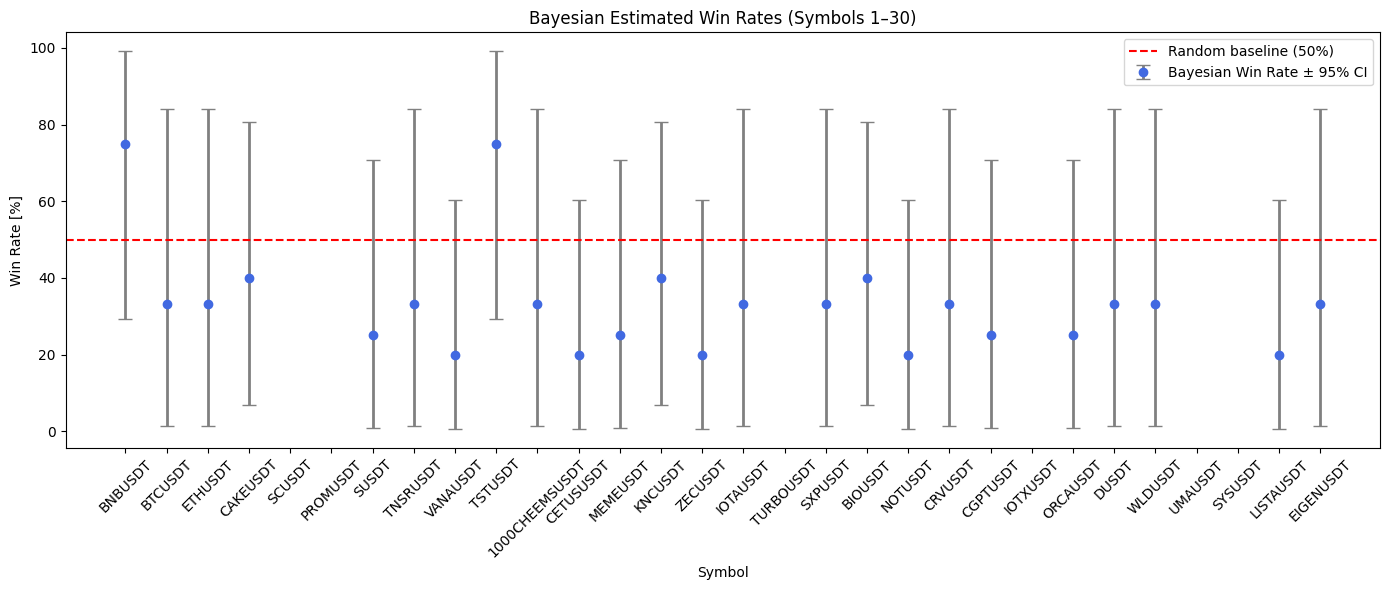

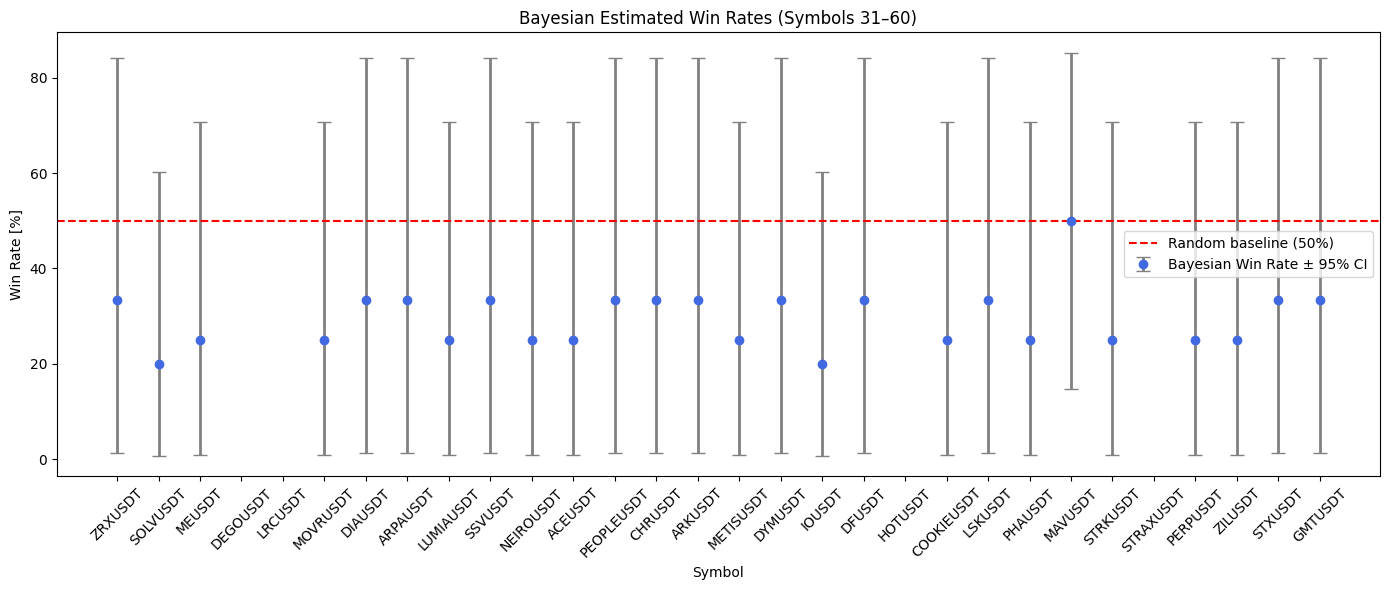

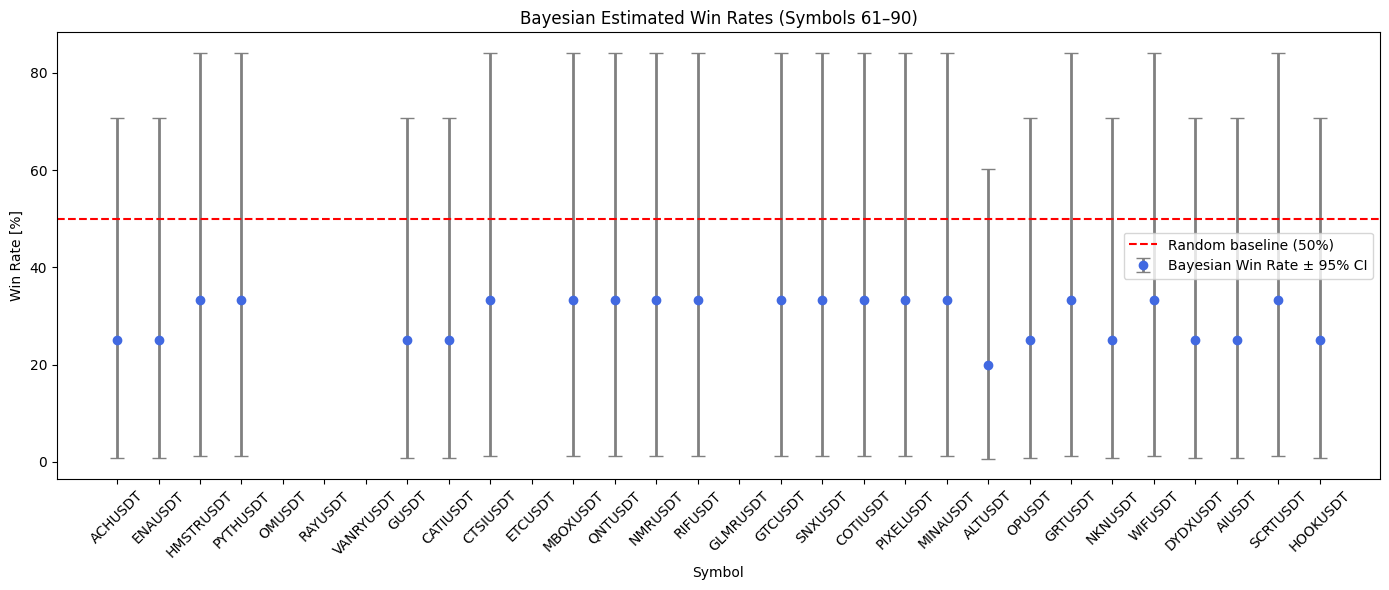

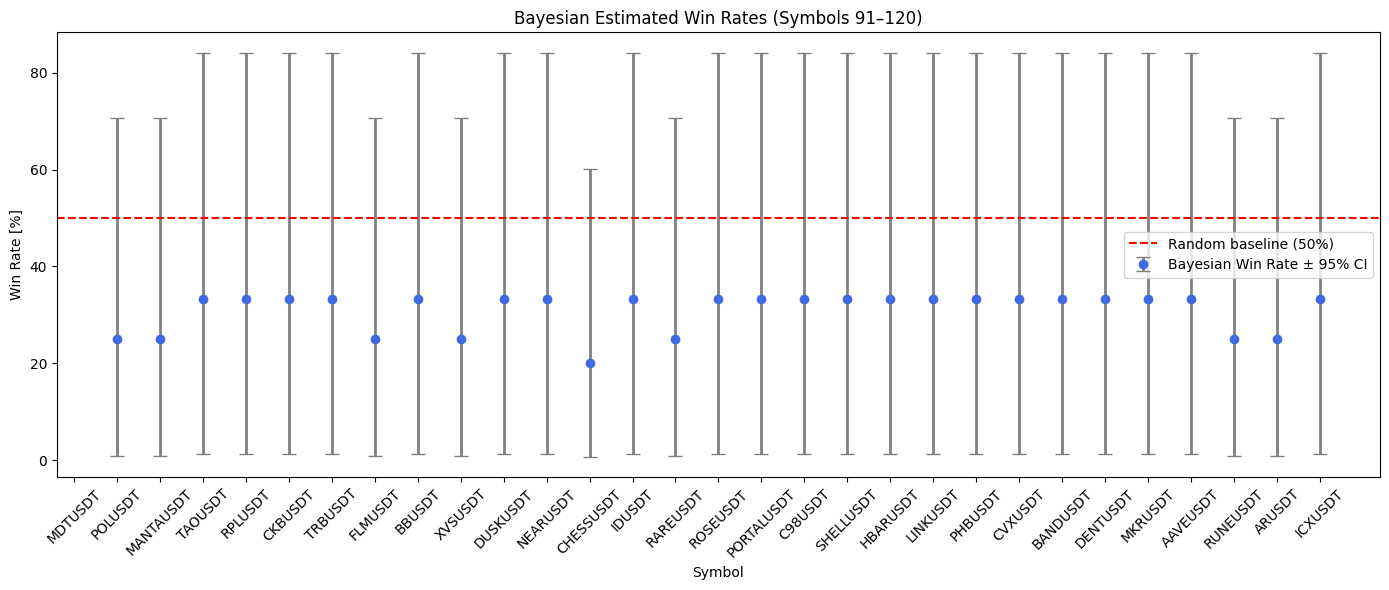

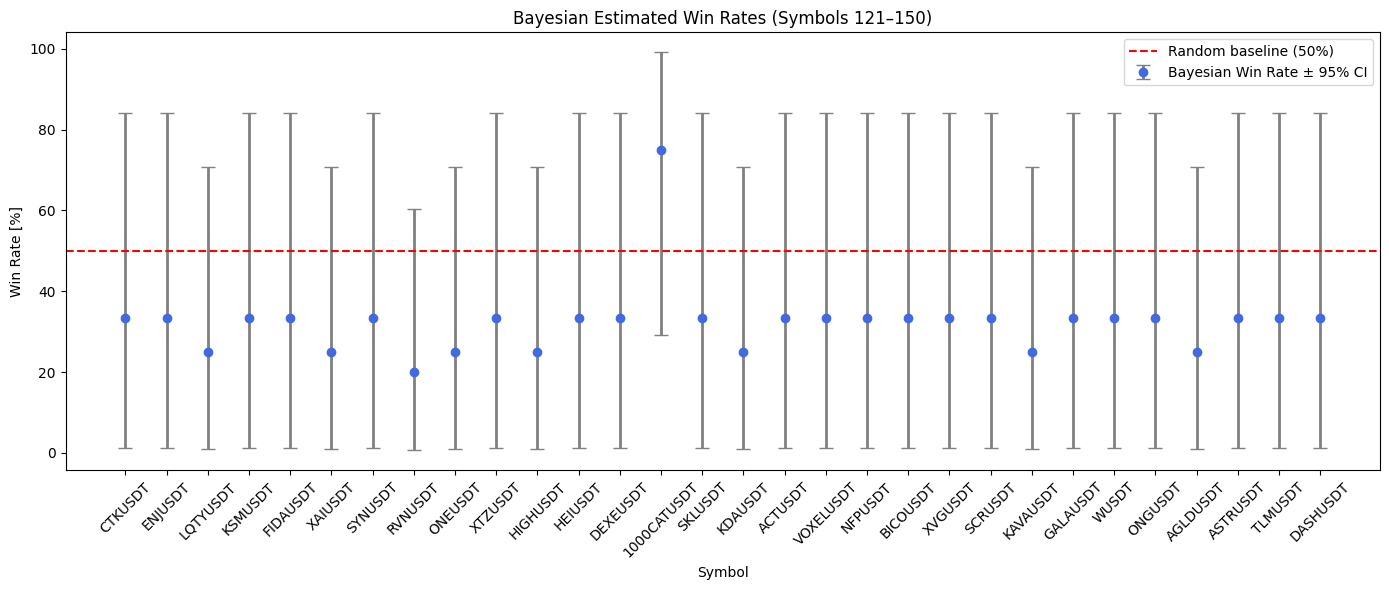

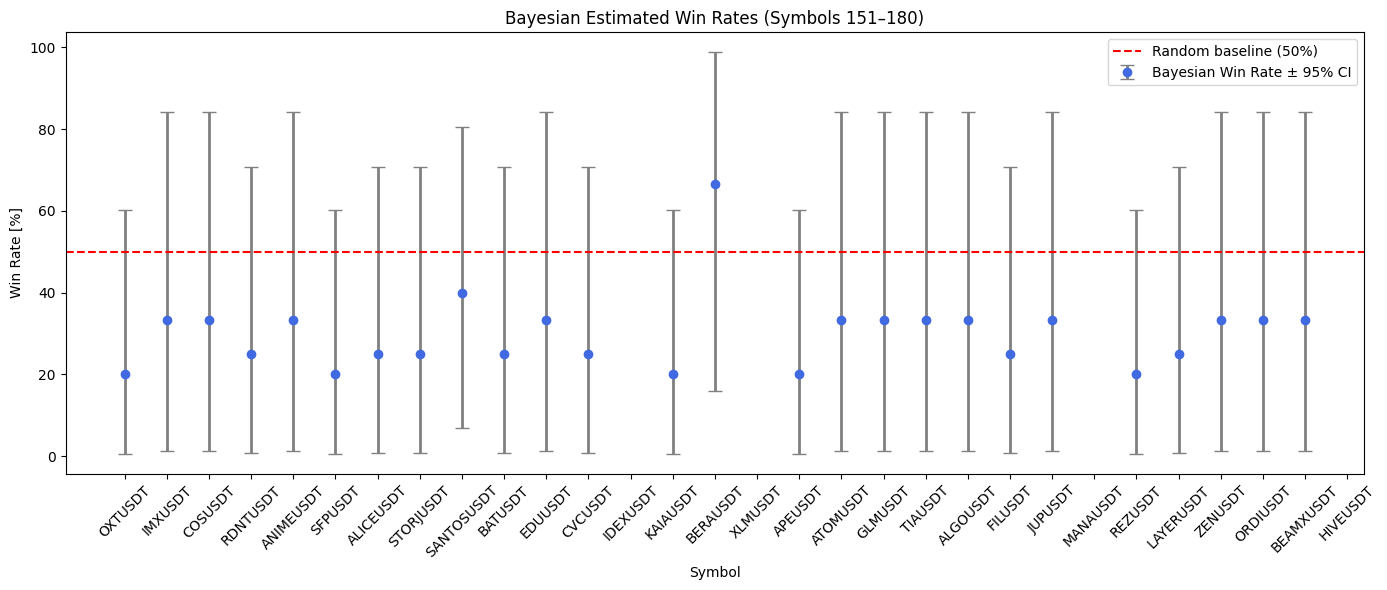

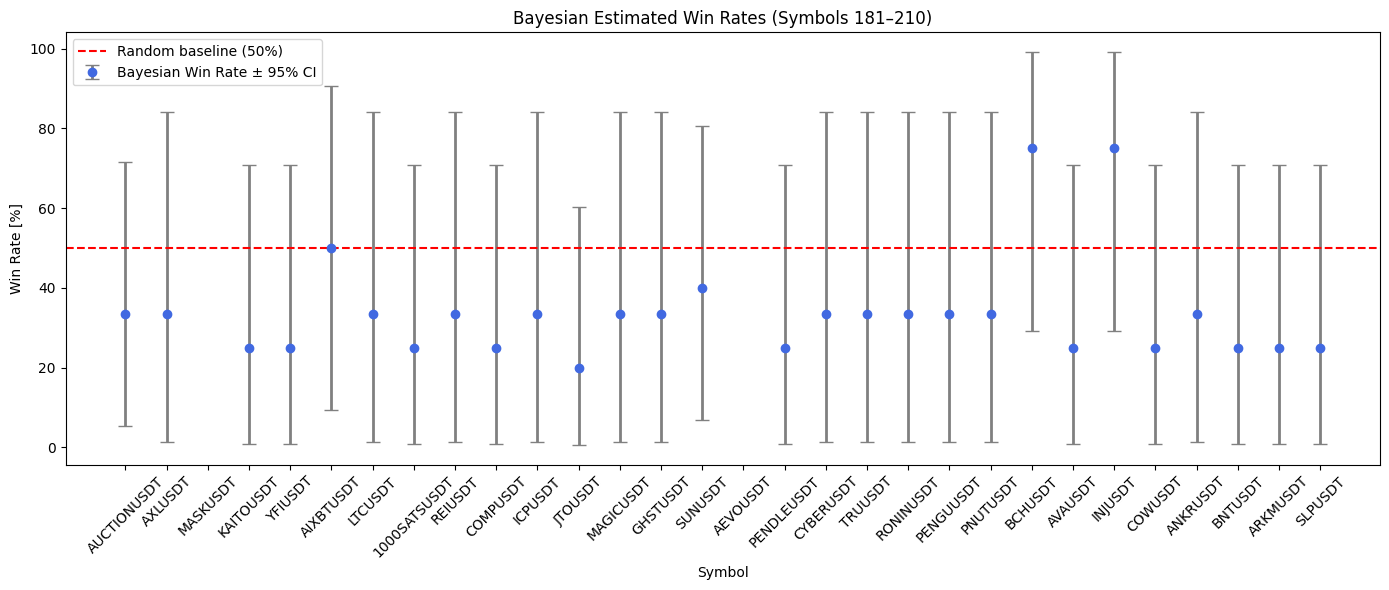

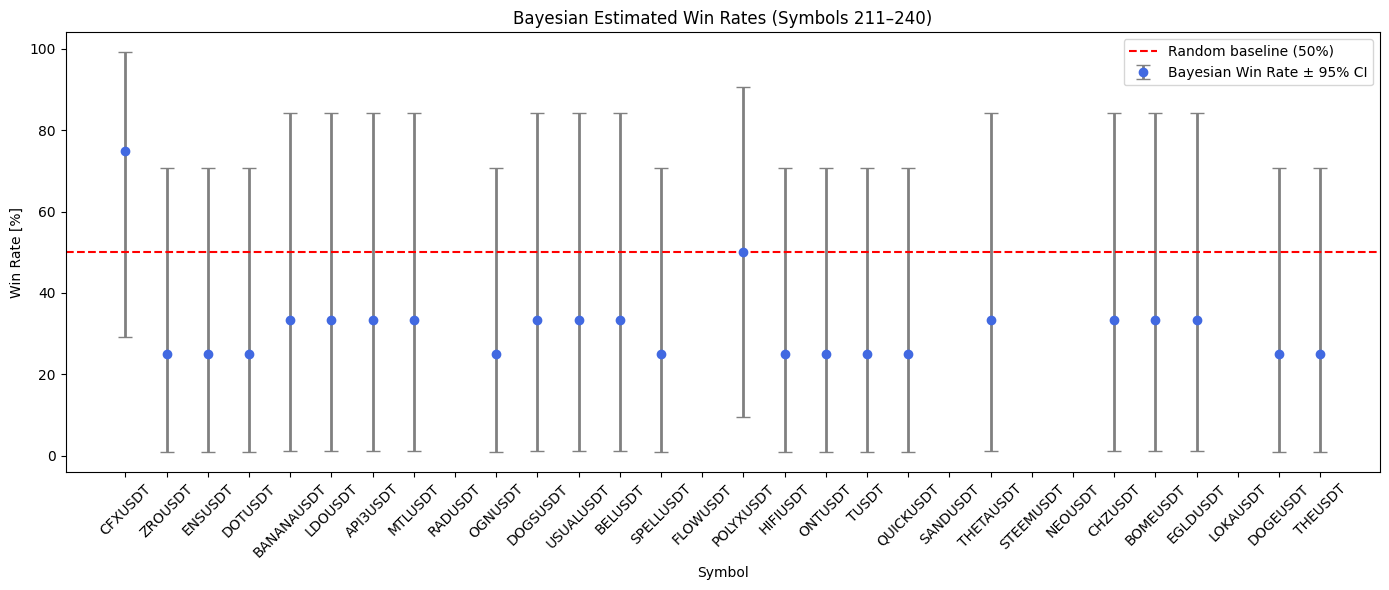

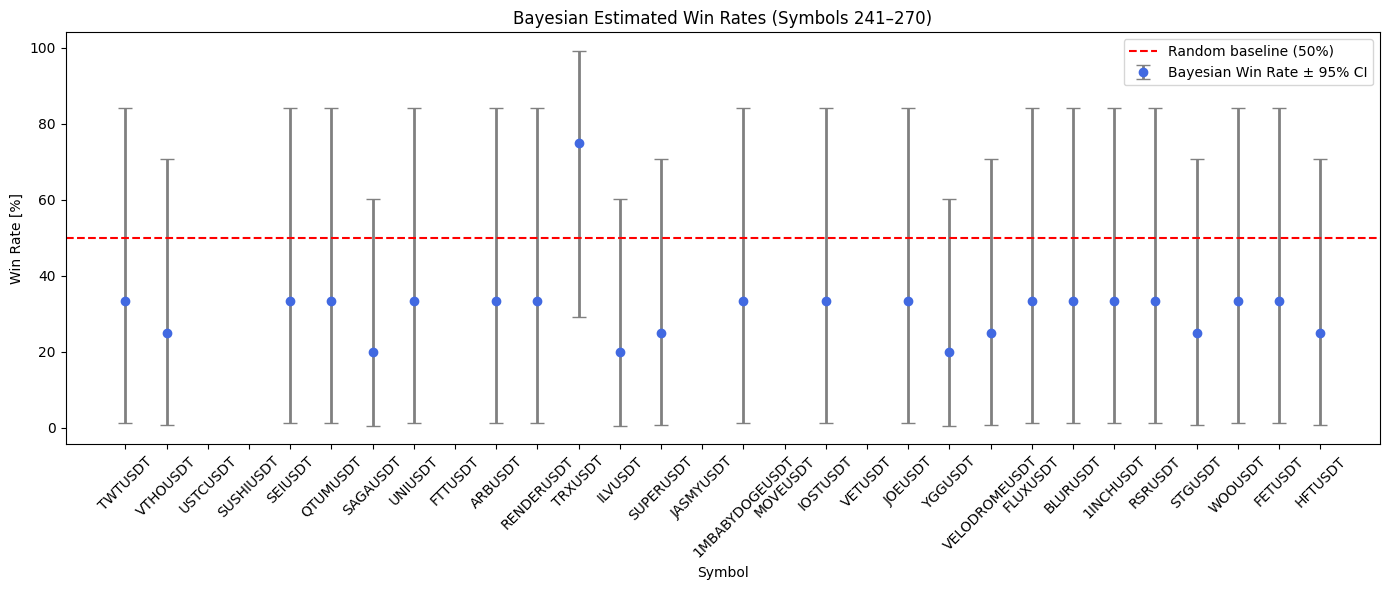

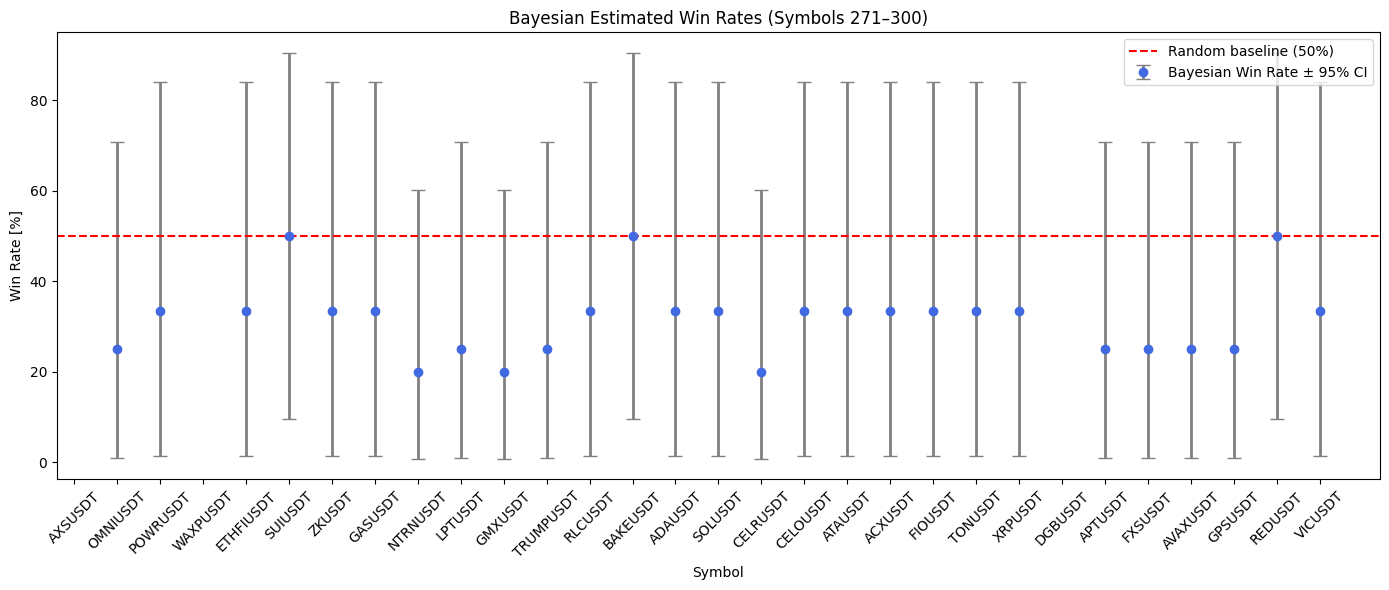

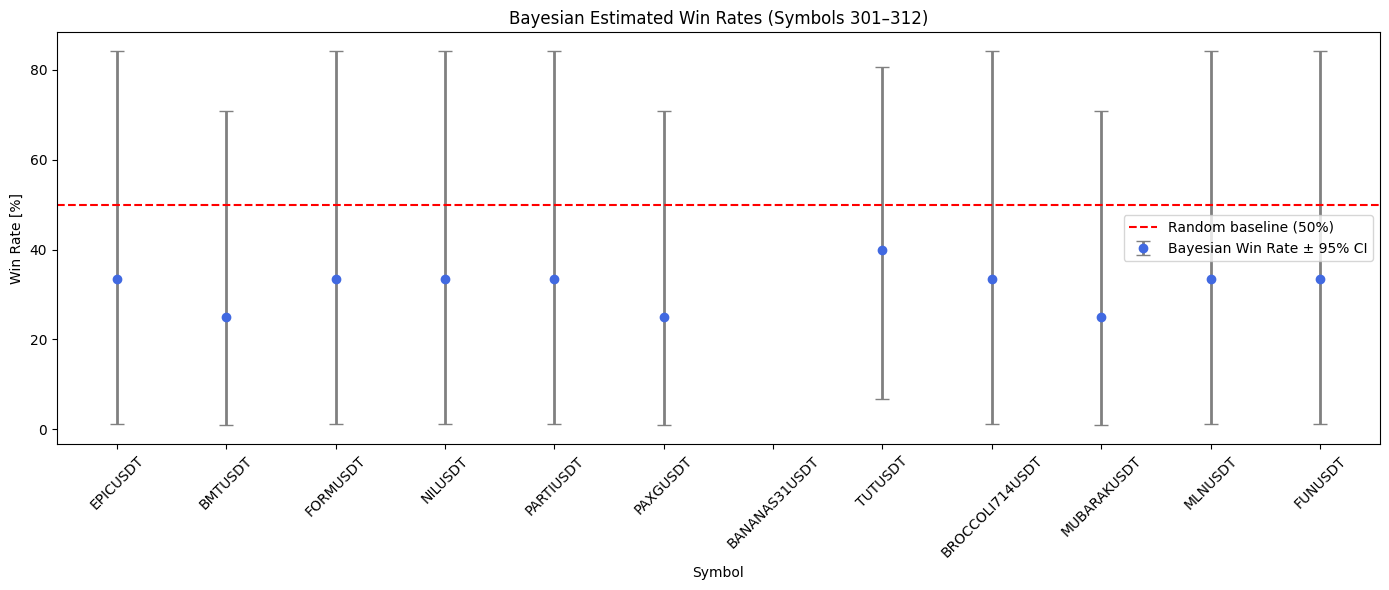

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta
import math


# Function for Bayesian intervals
def bayesian_confidence_interval(wins, total, alpha_prior=1, beta_prior=1, conf=0.95):
    a = wins + alpha_prior
    b = total - wins + beta_prior
    lower = beta.ppf((1 - conf) / 2, a, b)
    upper = beta.ppf(1 - (1 - conf) / 2, a, b)
    mean = a / (a + b)
    return mean * 100, lower * 100, upper * 100

# Add to DataFrame
results_df["Bayes Win Rate [%]"] = np.nan  # Initialize with NaN
results_df["CI Lower [%]"] = np.nan
results_df["CI Upper [%]"] = np.nan

for index, row in results_df.iterrows():  # Iterate with index
    # Convert 'Total Trades' and 'Win Rate' to numeric, handling errors
    total_trades = pd.to_numeric(row['Total Trades'], errors='coerce')
    win_rate = pd.to_numeric(row['Win Rate'], errors='coerce') / 100

    # Skip rows with NaN values
    if pd.isna(total_trades) or pd.isna(win_rate):
        print(f"Skipping symbol {row['symbol']} due to NaN values in Total Trades or Win Rate")
        continue

    wins = int(total_trades * win_rate)
    total = int(total_trades)
    mean, lower, upper = bayesian_confidence_interval(wins, total)

    # Assign values using index
    results_df.loc[index, "Bayes Win Rate [%]"] = mean
    results_df.loc[index, "CI Lower [%]"] = lower
    results_df.loc[index, "CI Upper [%]"] = upper

# === Plotting graphs by pages ===
symbols_per_plot = 30
num_chunks = math.ceil(len(results_df) / symbols_per_plot)

for i in range(num_chunks):
    chunk = results_df.iloc[i * symbols_per_plot:(i + 1) * symbols_per_plot]

    plt.figure(figsize=(14, 6))

    yerr = [
        chunk["Bayes Win Rate [%]"] - chunk["CI Lower [%]"],
        chunk["CI Upper [%]"] - chunk["Bayes Win Rate [%]"]
    ]

    plt.errorbar(
        chunk["symbol"],
        chunk["Bayes Win Rate [%]"],
        yerr=yerr,
        fmt='o',
        capsize=5,
        label="Bayesian Win Rate ± 95% CI",
        color='royalblue',
        ecolor='gray',
        elinewidth=2
    )

    plt.axhline(50, linestyle='--', color='red', label='Random baseline (50%)')
    plt.title(f"Bayesian Estimated Win Rates (Symbols {i * symbols_per_plot + 1}–{min((i + 1) * symbols_per_plot, len(results_df))})")
    plt.ylabel("Win Rate [%]")
    plt.xlabel("Symbol")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Сортировка по Bayesian Win Rate в порядке убывания

sorted_df = results_df[results_df['Total Trades'] >= 30]
sorted_df = sorted_df.sort_values(by="Bayes Win Rate [%]", ascending=False).reset_index(drop=True)
sorted_df = sorted_df.sort_values(by="return [%]", ascending=False).reset_index(drop=True)
# Просмотр топа
sorted_df.head(10)  # Показывает топ-10, можешь изменить число

# Если хочешь увидеть весь датафрейм:
pd.set_option('display.max_rows', None)
display(sorted_df)

Empty DataFrame
Columns: [symbol, timeframe, start_date, end_date, stop_loss_multiplier, close_portion, take1_profit_multiplier, take2_profit_multiplier, Total Trades, Win Rate, return [%], long_trades, short_trades, long_return [%], short_return [%], long_win_rate [%], short_win_rate [%], Bayes Win Rate [%], CI Lower [%], CI Upper [%]]
Index: []

In [ ]:
sorted_df.to_csv('sorted_df.csv')

## Compare best params

In [ ]:
import pandas as pd
import glob
import os
from google.colab import files

# Укажи шаблон для поиска CSV-файлов
file_pattern = 'successful_signals_4h_2takes*.csv'

# Получим список файлов
csv_files = glob.glob(file_pattern)

# Проверка: если файлов нет — сообщим
if not csv_files:
    print("❌ Не найдено ни одного файла по шаблону:", file_pattern)
else:
    print(f"✅ Найдено {len(csv_files)} файлов:")

# Загрузим и объединим
dfs = []
for i, file_path in enumerate(csv_files, start=1):
    try:
        df = pd.read_csv(file_path)
        df['source_file'] = f'strategy{i}'
        dfs.append(df)
    except Exception as e:
        print(f"⚠️ Ошибка при чтении {file_path}: {e}")

# Объединяем
full_df = pd.concat(dfs, ignore_index=True)

# Находим лучший результат по символу
idx = full_df.groupby('symbol')['return [%]'].idxmax()
best_result_df = full_df.loc[idx].sort_values('symbol').reset_index(drop=True)

# Сохраняем результат в файл
output_file = "best_results_by_symbol.csv"
best_result_df.to_csv(output_file, index=False)



# Находим лучший результат по символу
idx = full_df.groupby('symbol')['Win Rate'].idxmax()
best_winrate_df = full_df.loc[idx].sort_values('symbol').reset_index(drop=True)

# Сохраняем результат в файл
output_file = "best_winrate_by_symbol.csv"
best_winrate_df.to_csv(output_file, index=False)



# # Выводим файл и даем ссылку на скачивание
# from IPython.display import FileLink, display
# display(FileLink(output_file))

# # Отобразим таблицу
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# print(best_df)


✅ Найдено 33 файлов:


In [ ]:
import pandas as pd
import glob

# Шаблон поиска файлов
file_pattern = 'successful_signals_4h_2takes*.csv'

# Получение всех файлов
csv_files = glob.glob(file_pattern)
if not csv_files:
    print("❌ Не найдено ни одного файла по шаблону:", file_pattern)
else:
    print(f"✅ Найдено {len(csv_files)} файлов")

# Загрузка и объединение
dfs = []
for i, file_path in enumerate(csv_files, start=1):
    try:
        df = pd.read_csv(file_path)
        df['source_file'] = f'strategy{i}'
        dfs.append(df)
    except Exception as e:
        print(f"⚠️ Ошибка при чтении {file_path}: {e}")

# Объединение всех DataFrame
full_df = pd.concat(dfs, ignore_index=True)

# Обработка: приводим столбцы к нужному типу
full_df['Win Rate'] = pd.to_numeric(full_df['Win Rate'], errors='coerce')
full_df['return [%]'] = pd.to_numeric(full_df['return [%]'], errors='coerce')
full_df['Total Trades'] = pd.to_numeric(full_df['Total Trades'], errors='coerce')
full_df['long_win_rate [%]'] = pd.to_numeric(full_df['long_win_rate [%]'], errors='coerce')
full_df['short_win_rate [%]'] = pd.to_numeric(full_df['short_win_rate [%]'], errors='coerce')
full_df['long_trades'] = pd.to_numeric(full_df['long_trades'], errors='coerce')
full_df['short_trades'] = pd.to_numeric(full_df['short_trades'], errors='coerce')

# Лучшие строки по доходности на символ
idx_return = full_df.groupby('symbol')['return [%]'].idxmax()
best_return_df = full_df.loc[idx_return].reset_index(drop=True)

# Применим фильтры
filtered_df = best_return_df[
    (best_return_df['Total Trades'] >= 20) &
    (best_return_df['Win Rate'] >= 55) &
    (best_return_df['return [%]'] >= 70)
     & (abs(best_return_df['long_win_rate [%]'] - best_return_df['short_win_rate [%]']) <= 30) &
    (best_return_df['long_trades'] >= 3) &
    (best_return_df['short_trades'] >= 3)
].copy()

# Сохраняем отфильтрованный результат
filtered_output = 'filtered_best_strategies.csv'
filtered_df.to_csv(filtered_output, index=False)

print(f"✅ Фильтрованный файл сохранён как: {filtered_output}")
print(f"📊 Осталось стратегий: {len(filtered_df)}")


✅ Найдено 33 файлов
✅ Фильтрованный файл сохранён как: filtered_best_strategies.csv
📊 Осталось стратегий: 19


## final check all trades

In [ ]:
# symbol_parameters = {
#     "SYNUSDT":       (0.45, 0.05, 2.25),
#     "BSWUSDT":       (0.45, 0.9, 2.5),
#     "MAGICUSDT":     (0.45, 0.9, 2.5),
#     "PENGUUSDT":     (0.45, 0.05, 1.25),
#     "LOKAUSDT":      (0.45, 0.05, 1.25),
#     "PERPUSDT":      (0.45, 0.9, 2.5),
#     "THEUSDT":       (0.45, 0.05, 1.25),
#     "BROCCOLI714USDT": (0.45, 0.05, 2.25),
#     "LEVERUSDT":     (0.45, 0.05, 2.25),
#     "VOXELUSDT":     (0.45, 0.9, 1.25),
#     "SAGAUSDT":      (0.45, 0.05, 1.25),
#     "DUSKUSDT":      (0.45, 0.05, 1.25),
#     "WIFUSDT":       (0.45, 0.05, 2.25),
#     "SSVUSDT":       (0.45, 0.05, 2.25),
#     "ARUSDT":        (0.45, 0.05, 1.25),
#     "FIOUSDT":       (0.45, 0.05, 1.25),
#     "1000SATSUSDT":  (0.45, 0.9, 1.25),
#     "JASMYUSDT":     (0.45, 0.05, 2.25),
#     "LDOUSDT":       (0.45, 0.05, 1.25),
#     "FLMUSDT":       (0.45, 0.9, 2.5),
#     "GPSUSDT":       (0.45, 0.05, 1.25),
#     "BOMEUSDT":      (0.45, 0.05, 2.25),
#     "SEIUSDT":       (0.45, 0.05, 2.25),
#     "TURBOUSDT":     (0.45, 0.9, 2.5),
#     "OMNIUSDT":      (0.45, 0.05, 1.25),
#     "1000CATUSDT":   (0.45, 0.9, 2.5),
#     "AEVOUSDT":      (0.45, 0.05, 2.25),
#     "IOTAUSDT":      (0.45, 0.05, 2.25),
#     "ORDIUSDT":      (0.45, 0.05, 1.25),
#     "FXSUSDT":       (0.45, 0.05, 1.25),
#     "PORTALUSDT":    (0.45, 0.9, 2.5)
# }

In [ ]:
import pandas as pd
import numpy as np
# import pandas_ta as ta
from backtesting import Backtest, Strategy


# === Параметры для 30 монет ===
symbol_parameters = {
    "SYNUSDT":       (0.45, 0.05, 2.25),
    "BSWUSDT":       (0.45, 0.9, 2.5),
    "MAGICUSDT":     (0.45, 0.9, 2.5),
    "PENGUUSDT":     (0.45, 0.05, 1.25),
    "LOKAUSDT":      (0.45, 0.05, 1.25),
    "PERPUSDT":      (0.45, 0.9, 2.5),
    "THEUSDT":       (0.45, 0.05, 1.25),
    "BROCCOLI714USDT": (0.45, 0.05, 2.25),
    "LEVERUSDT":     (0.45, 0.05, 2.25),
    "VOXELUSDT":     (0.45, 0.9, 1.25),
    "SAGAUSDT":      (0.45, 0.05, 1.25),
    "DUSKUSDT":      (0.45, 0.05, 1.25),
    "WIFUSDT":       (0.45, 0.05, 2.25),
    "SSVUSDT":       (0.45, 0.05, 2.25),
    "ARUSDT":        (0.45, 0.05, 1.25),
    "FIOUSDT":       (0.45, 0.05, 1.25),
    "1000SATSUSDT":  (0.45, 0.9, 1.25),
    "JASMYUSDT":     (0.45, 0.05, 2.25),
    "LDOUSDT":       (0.45, 0.05, 1.25),
    "FLMUSDT":       (0.45, 0.9, 2.5),
    "GPSUSDT":       (0.45, 0.05, 1.25),
    "BOMEUSDT":      (0.45, 0.05, 2.25),
    "SEIUSDT":       (0.45, 0.05, 2.25),
    "TURBOUSDT":     (0.45, 0.9, 2.5),
    "OMNIUSDT":      (0.45, 0.05, 1.25),
    "1000CATUSDT":   (0.45, 0.9, 2.5),
    "AEVOUSDT":      (0.45, 0.05, 2.25),
    "IOTAUSDT":      (0.45, 0.05, 2.25),
    "ORDIUSDT":      (0.45, 0.05, 1.25),
    "FXSUSDT":       (0.45, 0.05, 1.25),
    "PORTALUSDT":    (0.45, 0.9, 2.5)
}

class SignalStrategyBTCTwoTakes(Strategy):
    stop_loss_multiplier = 0.45
    take1_profit_multiplier = 1.25
    take2_profit_multiplier = 5
    close_portion = 0.5
    btc_signals_df = None
    signals_df = None
    symbol = None
    interval = None

    def init(self):
        self.signals = self.signals_df[self.signals_df["symbol"] == self.symbol].copy()
        self.used_signals = set()
        self.btc_signals = self.signals_df[self.signals_df["symbol"] == "BTCUSDT"].copy()
        self.btc_signals["utc_time"] = pd.to_datetime(self.btc_signals["utc_time"]).dt.floor(self.interval)
        self.signals["utc_time"] = pd.to_datetime(self.signals["utc_time"]).dt.floor(self.interval)
        self.atr = self.I(self.atr_indicator, self.data.High, self.data.Low, self.data.Close)
        self.active_trade = None
        self.results = {"tp2_hit": 0, "tp1_only_then_sl": 0, "sl_before_tp1": 0}

    # def atr_indicator(self, h, l, c):
    #     return ta.atr(pd.Series(h), pd.Series(l), pd.Series(c), length=14).fillna(0).to_numpy()

    def atr_indicator(self, h, l, c):
        try:
            atr = talib.ATR(h, l, c, timeperiod=14)
            print(atr)
            return np.nan_to_num(atr)
        except Exception as e:
            print(f"ATR error: {e}")
            return np.zeros(len(c))

    def next(self):
        current_time = self.data.index[-1]
        price = self.data.Close[-1]
        atr = self.atr[-1]
        if atr == 0 or pd.isna(atr): return

        if self.active_trade:
            trade = self.active_trade
            if trade['direction'] == "long":
                if not trade['moved_to_be'] and price >= trade['tp1']:
                    trade['moved_to_be'] = True
                    self.position.close(portion=self.close_portion)
                    trade['sl'] = trade['entry'] * 1.01
                elif trade['moved_to_be'] and price >= trade['tp2']:
                    self.results["tp2_hit"] += 1
                    self.position.close()
                    self.active_trade = None
                elif price <= trade['sl']:
                    if trade['moved_to_be']:
                        self.results["tp1_only_then_sl"] += 1
                    else:
                        self.results["sl_before_tp1"] += 1
                    self.position.close()
                    self.active_trade = None
            else:
                if not trade['moved_to_be'] and price <= trade['tp1']:
                    trade['moved_to_be'] = True
                    self.position.close(portion=self.close_portion)
                    trade['sl'] = trade['entry'] * 0.99
                elif trade['moved_to_be'] and price <= trade['tp2']:
                    self.results["tp2_hit"] += 1
                    self.position.close()
                    self.active_trade = None
                elif price >= trade['sl']:
                    if trade['moved_to_be']:
                        self.results["tp1_only_then_sl"] += 1
                    else:
                        self.results["sl_before_tp1"] += 1
                    self.position.close()
                    self.active_trade = None
            return

        if self.position: return

        btc_signal = None
        btc_row = self.btc_signals[(self.btc_signals["utc_time"] == current_time) & (self.btc_signals["timeframe"] == self.interval)]
        if not btc_row.empty:
            btc_signal = btc_row.iloc[0]["signal"]

        relevant_signals = self.signals[(self.signals["utc_time"] == current_time) & (self.signals["timeframe"] == self.interval)]
        for _, signal in relevant_signals.iterrows():
            if signal["utc_time"] in self.used_signals:
                continue
            self.used_signals.add(signal["utc_time"])

            if signal["signal"] == "STRONG_BUY" and btc_signal in ["BUY", "STRONG_BUY"]:
                sl = price - self.stop_loss_multiplier * atr
                tp1 = price + self.take1_profit_multiplier * atr
                tp2 = price + self.take2_profit_multiplier * atr
                self.buy()
                self.active_trade = {
                    "direction": "long", "entry": price, "sl": sl,
                    "tp1": tp1, "tp2": tp2, "moved_to_be": False
                }
            elif signal["signal"] == "STRONG_SELL" and btc_signal in ["SELL", "STRONG_SELL"]:
                sl = price + self.stop_loss_multiplier * atr
                tp1 = price - self.take1_profit_multiplier * atr
                tp2 = price - self.take2_profit_multiplier * atr
                self.sell()
                self.active_trade = {
                    "direction": "short", "entry": price, "sl": sl,
                    "tp1": tp1, "tp2": tp2, "moved_to_be": False
                }

    def report(self):
        print("TP2 hit:", self.results["tp2_hit"])
        print("TP1 then SL:", self.results["tp1_only_then_sl"])
        print("SL before TP1:", self.results["sl_before_tp1"])


# ==== Запуск тестов ====

results_list = []
all_trade_logs = []
sl_tp_stats_list = []

for symbol, (sl_mult, portion, tp1_mult) in symbol_parameters.items():
    print(f"\n🔍 Testing {symbol}")
    df = klines_df[klines_df["Symbol"] == symbol].copy()
    if df.empty:
        print(f"⚠️ No data for {symbol}, skipping")
        continue
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.drop_duplicates(subset='Date').set_index('Date')
    df.drop(columns=["Symbol"], inplace=True)

    SignalStrategyBTCTwoTakes.signals_df = signals_df
    SignalStrategyBTCTwoTakes.symbol = symbol
    SignalStrategyBTCTwoTakes.interval = interval
    SignalStrategyBTCTwoTakes.stop_loss_multiplier = sl_mult
    SignalStrategyBTCTwoTakes.close_portion = portion
    SignalStrategyBTCTwoTakes.take1_profit_multiplier = tp1_mult

    bt = Backtest(df, SignalStrategyBTCTwoTakes, cash=1_000_000, commission=0.0005)
    stats = bt.run()

    if hasattr(stats, "_strategy"):
        stats._strategy.report()
        res = stats._strategy.results.copy()
        res["symbol"] = symbol
        res["timeframe"] = interval
        sl_tp_stats_list.append(res)

    trades = stats["_trades"]
    if trades is not None and not trades.empty:
        for _, trade in trades.iterrows():
            all_trade_logs.append({
                "symbol": symbol,
                "EntryTime": trade["EntryTime"],
                "ExitTime": trade["ExitTime"],
                "EntryPrice": trade["EntryPrice"],
                "ExitPrice": trade["ExitPrice"],
                "ReturnPct": trade["ReturnPct"]
            })

    results_list.append({
        "symbol": symbol,
        "timeframe": interval,
        "start_date": df.index.min(),
        "end_date": df.index.max(),
        'stop_loss_multiplier': sl_mult,
        'close_portion': portion,
        'take1_profit_multiplier': tp1_mult,
        'take2_profit_multiplier': 5,
        "Total Trades": stats["# Trades"],
        "Win Rate": stats["Win Rate [%]"],
        "return [%]": stats["Return [%]"]
    })

# === Сохранение результатов ===
results_df = pd.DataFrame(results_list)
results_df.to_csv(f"backtest_results_{interval}_2takes.csv", index=False)

if all_trade_logs:
    pd.DataFrame(all_trade_logs).to_csv(f"all_trades_df_{interval}_2takes.csv", index=False)

if sl_tp_stats_list:
    pd.DataFrame(sl_tp_stats_list).to_csv(f"sl_tp_stats_{interval}_2takes.csv", index=False)

# print("✅ Все 30 монет протестированы и результаты сохранены!")



🔍 Testing SYNUSDT
[       nan        nan        nan ... 0.00648459 0.00657855 0.00674437]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 8
TP1 then SL: 2
SL before TP1: 14

🔍 Testing BSWUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00177857 0.0017801  0.00181009 0.00179509
 0.00195972 0.0019626  0.0020367  0.00209837 0.00206277 0.002044
 0.00197657 0.00189967 0.00195684 0.00190278 0.00190258 0.00197382
 0.00201141 0.00201059 0.00195984 0.00191271 0.0018618  0.00178596
 0.00177982 0.00190269 0.00188821 0.00190334 0.00196738 0.00190543
 0.00184075 0.00178784 0.00173871 0.00173595 0.00169052 0.00162691
 0.00158928 0.0015329  0.00147341 0.00146102 0.00152809 0.00159037
 0.00152677 0.001582   0.00161186 0.00158958 0.00159033 0.00166959
 0.00165033 0.00180388 0.00174646 0.00170743 0.00174261 0.00185385
 0.00180715 0.00174235 0.00168933 0.00165438 0.00160764 0.00161423
 0.0015275  0.00148982 0.00146198 0.00139327 0.00137946 0.00138093
 0.00134658 0.00139325 0.00135087 0.00134724 0.00135815 0.00137543
 

Backtest.run:   0%|          | 0/793 [00:00<?, ?bar/s]

TP2 hit: 4
TP1 then SL: 4
SL before TP1: 8

🔍 Testing MAGICUSDT
[       nan        nan        nan ... 0.01855389 0.01962861 0.01914085]


/tmp/ipython-input-1778663284.py:178: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 4
TP1 then SL: 5
SL before TP1: 16

🔍 Testing PENGUUSDT
[       nan        nan        nan ... 0.00147393 0.00152979 0.00153924]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 6
SL before TP1: 13

🔍 Testing LOKAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.0034     0.00351429 0.00360612 0.00365569
 0.00412314 0.00432863 0.00469087 0.00481295 0.00486202 0.00482902
 0.00471266 0.00457604 0.00440633 0.00429873 0.00445597 0.00460911
 0.0047656  0.00463949 0.00455095 0.00437589 0.00439189 0.00424962
 0.00419607 0.00455349 0.00456396 0.00523082 0.00557862 0.005423
 0.00525707 0.00511014 0.00498084 0.00513221 0.00497991 0.00473849
 0.00462145 0.00443421 0.00426748 0.00434837 0.00458777 0.00496008
 0.00478436 0.00489976 0.00495692 0.00486714 0.00492663 0.00531044
 0.0052097  0.00548758 0.00528132 0.00515408 0.00525736 0.00555327
 0.00541375 0.00524134 0.00518124 0.00504687 0.00489352 0.00483684
 0.00458421 0.00447819 0.00442261 0.00425671 0.00427408 0.00431165
 0.00421796 0.00443811 0.00430681 0.00422776 0.0042472  0.0042724
 

Backtest.run:   0%|          | 0/937 [00:00<?, ?bar/s]

TP2 hit: 7
TP1 then SL: 6
SL before TP1: 19

🔍 Testing PERPUSDT
[       nan        nan        nan ... 0.00633077 0.00636428 0.00648826]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 4
SL before TP1: 13

🔍 Testing THEUSDT
[       nan        nan        nan ... 0.01200311 0.01208146 0.01224707]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 7
TP1 then SL: 6
SL before TP1: 17

🔍 Testing BROCCOLI714USDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00552786 0.00541158 0.0052929  0.00544698
 0.00551148 0.00544494 0.00537745 0.00519692 0.00547285 0.00524265
 0.00503674 0.00486983 0.00478127 0.00511333 0.00520595 0.00508981
 0.00484982 0.00483198 0.00462755 0.00444701 0.00437079 0.00427431
 0.00420686 0.00405708 0.00387229 0.00380784 0.00367657 0.00354538
 0.00338786 0.00328515 0.0031555  0.00315511 0.00313046 0.00300257
 0.00285238 0.00278436 0.00310476 0.00319585 0.00310114 0.00304106
 0.0031117  0.00306801 0.00302386 0.00296716 0.00289879 0.00290388
 0.00283217 0.00277345 0.00282249 0.00274088 0.00279224 0.00271851
 0.00262005 0.00260362 0.00257621 0.00255506 0.00254684 0.00247564
 0.00237523 0.002352   0.00235972 0.00242474 0.00234726 0.00253817
 0.00249615 0.00248143 0.00238918 0.00229567 0.00226741 0.

Backtest.run:   0%|          | 0/803 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 3
SL before TP1: 12

🔍 Testing LEVERUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 3.87857143e-05 3.99438776e-05
 4.13050292e-05 4.34975271e-05 5.13191323e-05 5.25106228e-05
 5.54741498e-05 5.70117105e-05 5.65823026e-05 5.53264239e-05
 5.35888221e-05 5.20467634e-05 5.06148518e-05 4.93566481e-05
 5.04026018e-05 5.21595588e-05 5.35053046e-05 5.17549257e-05
 5.07724310e-05 4.82886859e-05 4.77680655e-05 4.64989180e-05
 4.60347095e-05 4.88893731e-05 4.81829893e-05 4.80270615e-05
 5.08108429e-05 4.93957827e-05 4.71532267e-05 4.56422820e-05
 4.48106904e-05 4.49670697e-05 4.41837075e-05 4.21705856e-05
 4.14441152e-05 3.98409641e-05 3.81380381e-05 3.75567497e-05
 4.03026961e-05 4.47096464e-05 4.37303859e-05 4.56067869e-05
 4.65634450e-05 4.62374847e-05 4.68633786e-05 5.29445658e-05
 5.37342397e-05 5.70

Backtest.run:   0%|          | 0/793 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 1
SL before TP1: 15

🔍 Testing VOXELUSDT
[       nan        nan        nan ... 0.00189338 0.002101   0.00265807]


/tmp/ipython-input-1778663284.py:178: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 5
SL before TP1: 18

🔍 Testing SAGAUSDT
[       nan        nan        nan ... 0.00767013 0.00796512 0.00825333]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 4
SL before TP1: 13

🔍 Testing DUSKUSDT
[       nan        nan        nan ... 0.00159574 0.0016389  0.00167898]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 9
TP1 then SL: 3
SL before TP1: 21

🔍 Testing WIFUSDT
[       nan        nan        nan ... 0.02752584 0.02963114 0.03080034]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 7
TP1 then SL: 1
SL before TP1: 26

🔍 Testing SSVUSDT
[       nan        nan        nan ... 0.26396374 0.28153776 0.30857077]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 8
TP1 then SL: 2
SL before TP1: 21

🔍 Testing ARUSDT
[       nan        nan        nan ... 0.20315526 0.20864417 0.22016958]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 8
TP1 then SL: 6
SL before TP1: 17

🔍 Testing FIOUSDT
[       nan        nan        nan ... 0.00081649 0.00097389 0.00108361]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 7
SL before TP1: 15

🔍 Testing 1000SATSUSDT
[           nan            nan            nan ... 9.82394297e-07
 1.03008042e-06 1.09864610e-06]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 4
TP1 then SL: 9
SL before TP1: 14

🔍 Testing JASMYUSDT
[       nan        nan        nan ... 0.00038191 0.0003982  0.0004119 ]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 8
TP1 then SL: 4
SL before TP1: 24

🔍 Testing LDOUSDT
[       nan        nan        nan ... 0.03366961 0.03462178 0.03557737]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 9
SL before TP1: 14

🔍 Testing FLMUSDT
[       nan        nan        nan ... 0.00070991 0.00072349 0.00072181]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 4
TP1 then SL: 5
SL before TP1: 17

🔍 Testing GPSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00623571 0.00619745 0.00625477 0.00760086
 0.00794366 0.00789054 0.00771264 0.00739031 0.007091   0.00680593
 0.00649837 0.00621991 0.00596135 0.00567125 0.00553045 0.00583541
 0.00597574 0.0057489  0.00547398 0.00530441 0.00504695 0.00486503
 0.00503181 0.00493668 0.00466978 0.00463622 0.00445506 0.00423684
 0.00420564 0.00407667 0.00389976 0.00375692 0.00360286 0.00345979
 0.00346267 0.00335819 0.00319689 0.00302568 0.00288814 0.00276041
 0.00277038 0.00270107 0.00263671 0.00252694 0.00242502 0.00233752
 0.00230627 0.00230582 0.0025554  0.00258002 0.00256002 0.00277716
 0.0029145  0.00302775 0.00296148 0.00291424 0.00295608 0.00295921
 0.00286213 0.00282197 0.00269898 0.00268476 0.00265014 0.00253227
 0.00245854 0.0023615  0.00224282 0.00227548 0.00222723 0.00212528

Backtest.run:   0%|          | 0/943 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 5
SL before TP1: 13

🔍 Testing BOMEUSDT
[           nan            nan            nan ... 5.15789833e-05
 5.31804845e-05 5.58104499e-05]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 4
SL before TP1: 15

🔍 Testing SEIUSDT
[       nan        nan        nan ... 0.00863373 0.00899561 0.00930307]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 7
TP1 then SL: 3
SL before TP1: 22

🔍 Testing TURBOUSDT
[       nan        nan        nan ... 0.00013717 0.00014387 0.00014988]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 3
SL before TP1: 19

🔍 Testing OMNIUSDT
[       nan        nan        nan ... 0.28492682 0.27671777 0.26838078]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 3
SL before TP1: 17

🔍 Testing 1000CATUSDT
[       nan        nan        nan ... 0.00037017 0.00038016 0.00038586]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 5
SL before TP1: 14

🔍 Testing AEVOUSDT
[       nan        nan        nan ... 0.00249802 0.00257673 0.00264268]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 1
SL before TP1: 10

🔍 Testing IOTAUSDT
[       nan        nan        nan ... 0.00463683 0.00487706 0.00516441]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 7
TP1 then SL: 4
SL before TP1: 16

🔍 Testing ORDIUSDT
[       nan        nan        nan ... 0.2749591  0.28389059 0.29432698]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 5
TP1 then SL: 7
SL before TP1: 11

🔍 Testing FXSUSDT
[       nan        nan        nan ... 0.10484141 0.10435274 0.1089704 ]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 7
TP1 then SL: 10
SL before TP1: 25

🔍 Testing PORTALUSDT
[       nan        nan        nan ... 0.00182202 0.00183473 0.00182511]


Backtest.run:   0%|          | 0/1007 [00:00<?, ?bar/s]

TP2 hit: 6
TP1 then SL: 3
SL before TP1: 18


In [ ]:
print(f"✅ Все {len(symbol_parameters)} монет протестированы и результаты сохранены!")

✅ Все 31 монет протестированы и результаты сохранены!


In [ ]:
all_trade_logs = pd.DataFrame(all_trade_logs)
all_trade_logs.head()

symbol                 EntryTime                  ExitTime  EntryPrice  \
0  SYNUSDT 2025-03-04 00:00:00+00:00 2025-03-04 16:00:00+00:00      0.2696   
1  SYNUSDT 2025-03-04 00:00:00+00:00 2025-03-09 00:00:00+00:00      0.2696   
2  SYNUSDT 2025-03-09 04:00:00+00:00 2025-03-10 00:00:00+00:00      0.2063   
3  SYNUSDT 2025-03-09 04:00:00+00:00 2025-04-02 08:00:00+00:00      0.2063   
4  SYNUSDT 2025-04-03 04:00:00+00:00 2025-04-06 20:00:00+00:00      0.1536   

   ExitPrice  ReturnPct  
0     0.2380   0.116269  
1     0.2078   0.228343  
2     0.1836   0.109089  
3     0.1585   0.230817  
4     0.1310   0.146209

In [ ]:
symbol_parameters = {
    "TAOUSDT":       (0.75, 0.25, 1.25, 4.5),
    "DUSDT":         (0.75, 0.25, 1.25, 4.5),
    "HFTUSDT":       (0.45, 0.5, 0.45, 1.5),
    "ETHFIUSDT":     (0.45, 0.5, 0.45, 1.5),
    "ONTUSDT":       (0.45, 0.9, 1.25, 2.5),
    "SAGAUSDT":      (0.45, 0.05, 1.25, 5.0),
    "STPTUSDT":      (0.45, 0.05, 1.25, 4.0),
    "PENGUUSDT":     (0.45, 0.05, 1.25, 5),
    "XLMUSDT":       (0.45, 0.05, 1.5, 3.0),
    "EPICUSDT":      (0.45, 0.05, 2.25, 5.0),
    "GPSUSDT":       (0.45, 0.9, 1.5, 3.0),
    "HIFIUSDT":      (0.75, 0.25, 1.25, 4.5),
    "CVXUSDT":       (0.45, 0.9, 1.5, 3.0),
    "MAGICUSDT":     (0.45, 0.9, 2.5, 5.0),
    "SYNUSDT":       (0.45, 0.05, 2.25, 5.0),
    "DUSKUSDT":      (0.45, 0.05, 1.25, 5.0),
    "FIOUSDT":       (0.45, 0.05, 1.25, 5.0),
    "VICUSDT":       (0.75, 0.25, 1.25, 4.5),
    "1INCHUSDT":     (0.45, 0.05, 1.25, 3.5),
    "BIOUSDT":       (0.45, 0.05, 1.25, 4.0),
    "FXSUSDT":       (0.45, 0.05, 1.25, 4.5),
    "LOKAUSDT":      (0.45, 0.05, 1.25, 5.0),
    "FLMUSDT":       (0.45, 0.05, 1.25, 2.5),
    "BSWUSDT":       (0.45, 0.05, 1.5, 3.0),
    "ORDIUSDT":      (0.45, 0.05, 1.25, 3.5),
    "THEUSDT":       (0.45, 0.05, 1.25, 5.0),
    "PERPUSDT":      (0.45, 0.9, 2.5, 5.0),
    "ARUSDT":        (0.45, 0.05, 2.25, 5.0),
    "TURBOUSDT":     (0.45, 0.9, 2.5, 5.0),
    "BROCCOLI714USDT": (0.45, 0.05, 2.25, 5),
    "1000SATSUSDT":  (0.45, 0.9, 1.25, 5.0),
    "JASMYUSDT":     (0.45, 0.05, 2.25, 5.0),
    "MBOXUSDT":      (0.45, 0.05, 1.25, 4.0),
    "VOXELUSDT":     (0.45, 0.9, 1.25, 5.0),
    "SHELLUSDT":     (0.45, 0.05, 1.5, 3.0),
    "NEIROUSDT":     (0.45, 0.05, 1.5, 3.0),
    "SSVUSDT":       (0.45, 0.05, 2.25, 5.0),
    "LEVERUSDT":     (0.45, 0.05, 2.25, 5.0),
    "WIFUSDT":       (0.45, 0.05, 2.25, 5.0),
    "SANDUSDT":      (0.75, 0.25, 1.25, 4.5),
    "GPSUSDT":       (0.45, 0.05, 1.25, 5.0),
    "SUPERUSDT":       (0.45, 0.05, 2.25, 5.0),
    "BOMEUSDT":       (0.45, 0.05, 2.25, 5.0),
    "OMNIUSDT":       (0.45, 0.05, 1.25, 5.0),
    "1000CATUSDT":       (0.45, 0.9, 2.5, 5.0),
    "AEVOUSDT":       (0.45, 0.05, 2.25, 5.0)

}


In [20]:
symbol_settings = pd.read_csv('symbols_settings_last_update.csv')
symbol_settings

#     symbol  status interval  order_size  leverage  atr_length  \
0      1  1INCHUSDT       1       4h          10        20          14   
1      2   SANDUSDT       1       4h          10        20          14   
2      3    XLMUSDT       1       4h          10        20          14   
3      4    ONTUSDT       1       4h          10        20          14   
4      5   PERPUSDT       1       4h          10        20          14   
..   ...        ...     ...      ...         ...       ...         ...   
337  338    ENJUSDT       0       4h          10        20          14   
338  339    KSMUSDT       0       4h          10        20          14   
339  340   AAVEUSDT       0       4h          10        20          14   
340  341    FILUSDT       0       4h          10        20          14   
341  342    RSRUSDT       0       4h          10        20          14   

     portion  take1  take2  stop  
0       0.05   1.25    3.5  0.45  
1       0.25   1.25    4.5  0.75  
2       0.05   1.50    3.0  0.45  
3       0.90   1.25    2.5  0.45  
4       0.90   2.50    5.0  0.45  
..       ...    ...    ...   ...  
337     0.05   2.50    5.0  0.45  
338     0.05   2.50    5.0  0.45  
339     0.05   2.50    5.0  0.45  
340     0.05   2.50    5.0  0.45  
341     0.05   2.50    5.0  0.45  

[342 rows x 11 columns]

In [21]:
symbol_settings_filtered = symbol_settings[symbol_settings['status'] == 1]


In [22]:
symbol_parameters = {row['symbol']: (row["stop"], row["portion"], row["take1"], row["take2"]) for _, row in symbol_settings_filtered.iterrows()}

In [23]:
print(len(symbol_parameters))
symbol_parameters

44


{'1INCHUSDT': (0.45, 0.05, 1.25, 3.5),
 'SANDUSDT': (0.75, 0.25, 1.25, 4.5),
 'XLMUSDT': (0.45, 0.05, 1.5, 3.0),
 'ONTUSDT': (0.45, 0.9, 1.25, 2.5),
 'PERPUSDT': (0.45, 0.9, 2.5, 5.0),
 'DUSDT': (0.75, 0.25, 1.25, 4.5),
 'BIOUSDT': (0.45, 0.05, 1.25, 4.0),
 'SYNUSDT': (0.45, 0.05, 2.25, 5.0),
 'MAGICUSDT': (0.45, 0.9, 2.5, 5.0),
 'PENGUUSDT': (0.45, 0.05, 1.25, 5.0),
 'BROCCOLI714USDT': (0.45, 0.05, 2.25, 5.0),
 'GPSUSDT': (0.45, 0.05, 1.25, 5.0),
 'DUSKUSDT': (0.45, 0.05, 1.25, 5.0),
 'LOKAUSDT': (0.45, 0.05, 1.25, 5.0),
 'SUPERUSDT': (0.45, 0.05, 2.25, 5.0),
 'THEUSDT': (0.45, 0.05, 1.25, 5.0),
 'VOXELUSDT': (0.45, 0.9, 1.25, 5.0),
 'SAGAUSDT': (0.45, 0.05, 1.25, 5.0),
 'WIFUSDT': (0.45, 0.05, 2.25, 5.0),
 'FIOUSDT': (0.45, 0.05, 1.25, 5.0),
 '1000SATSUSDT': (0.45, 0.9, 1.25, 5.0),
 'BOMEUSDT': (0.45, 0.05, 2.25, 5.0),
 'TURBOUSDT': (0.45, 0.9, 2.5, 5.0),
 'OMNIUSDT': (0.45, 0.05, 1.25, 5.0),
 '1000CATUSDT': (0.45, 0.9, 2.5, 5.0),
 'AEVOUSDT': (0.45, 0.05, 2.25, 5.0),
 'PORTALUSDT': 

In [24]:
results_list = []
all_trade_logs = []
sl_tp_stats_list = []

for symbol, (sl_mult, portion, tp1_mult, tp2_mult) in symbol_parameters.items():
    print(f"\n🔍 Testing {symbol}")
    df = klines_df[klines_df["Symbol"] == symbol].copy()
    if df.empty:
        print(f"⚠️ No data for {symbol}, skipping")
        continue

    df['Date'] = pd.to_datetime(df['Date'])
    df = df.drop_duplicates(subset='Date').set_index('Date')
    df.drop(columns=["Symbol"], inplace=True)

    # === Передача параметров в стратегию
    SignalStrategyBTCTwoTakes.signals_df = signals_df
    SignalStrategyBTCTwoTakes.symbol = symbol
    SignalStrategyBTCTwoTakes.interval = interval
    SignalStrategyBTCTwoTakes.stop_loss_multiplier = sl_mult
    SignalStrategyBTCTwoTakes.close_portion = portion
    SignalStrategyBTCTwoTakes.take1_profit_multiplier = tp1_mult
    SignalStrategyBTCTwoTakes.take2_profit_multiplier = tp2_mult

    bt = Backtest(df, SignalStrategyBTCTwoTakes, cash=1_000_000, commission=0.0005)
    stats = bt.run()

    # === Сбор результатов стратегии
    if hasattr(stats, "_strategy"):
        stats._strategy.report()
        res = stats._strategy.results.copy()
        res["symbol"] = symbol
        res["timeframe"] = interval
        sl_tp_stats_list.append(res)

    # === Логи трейдов
    trades = stats.get("_trades", None)
    if trades is not None and not trades.empty:
        for _, trade in trades.iterrows():
            all_trade_logs.append({
                "symbol": symbol,
                "EntryTime": trade["EntryTime"],
                "ExitTime": trade["ExitTime"],
                "EntryPrice": trade["EntryPrice"],
                "ExitPrice": trade["ExitPrice"],
                "ReturnPct": trade["ReturnPct"]
            })

    # === Общая метрика
    results_list.append({
        "symbol": symbol,
        "timeframe": interval,
        "start_date": df.index.min(),
        "end_date": df.index.max(),
        'stop_loss_multiplier': sl_mult,
        'close_portion': portion,
        'take1_profit_multiplier': tp1_mult,
        'take2_profit_multiplier': tp2_mult,
        "Total Trades": stats["# Trades"],
        "Win Rate": stats["Win Rate [%]"],
        "return [%]": stats["Return [%]"]
    })

# === Сохранение результатов ===
results_df = pd.DataFrame(results_list)
results_df.to_csv(f"backtest_results_{interval}_2takes.csv", index=False)

if all_trade_logs:
    pd.DataFrame(all_trade_logs).to_csv(f"all_trades_df_{interval}_2takes.csv", index=False)

if sl_tp_stats_list:
    pd.DataFrame(sl_tp_stats_list).to_csv(f"sl_tp_stats_{interval}_2takes.csv", index=False)

print("✅ Все монеты протестированы и результаты сохранены!")



🔍 Testing 1INCHUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00769286 0.0074148  0.00739231 0.00716429
 0.00713112 0.00718604 0.00764418 0.00749103 0.00749167 0.00715655
 0.00700965 0.00697325 0.00704659 0.00747898 0.00739476 0.00744514
 0.00741334 0.0073481  0.0072161  0.00730066 0.00735061 0.00712557
 0.00693089 0.00687154 0.00671643 0.00661525 0.00681416 0.00673458]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]


📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing SANDUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00624286 0.00605408 0.00612879 0.00595531
 0.0058585  0.00584003 0.00633717 0.00630595 0.00633409 0.00619594
 0.00611052 0.00640977 0.0066305  0.00703546 0.00711864 0.00734588
 0.00741404 0.00727018 0.00712945 0.00715592 0.00771621 0.00767934
 0.00740938 0.00739443 0.00743768 0.00729213 0.00738555 0.00716516]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG SANDUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.295 | SL: 0.2900271256563123, TP1: 0.3032881239061462, TP2: 0.3248372460621264
🛑 SL before TP1! SL: 0.2900271256563123

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing XLMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01425714 0.01360306 0.01337427 0.01284039
 0.01261608 0.0123935  0.01292968 0.01269185 0.012471   0.01210879
 0.01167244 0.01188156 0.01179002 0.01242644 0.01239598 0.0124177
 0.01215929 0.01234791 0.01210163 0.01178009 0.01182437 0.01175834
 0.01154703 0.01137939 0.01118086 0.01107508 0.01134115 0.01107392]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG XLMUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.4483 | SL: 0.44299449268002167, TP1: 0.46598502439992767, TP2: 0.4836700487998553
🛑 SL before TP1! SL: 0.44299449268002167

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing ONTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00260714 0.0025352  0.00255412 0.00250025
 0.00246452 0.00244563 0.0026638  0.0026521  0.00274123 0.002674
 0.002633   0.00269493 0.00280958 0.00304461 0.00310571 0.00338387
 0.00346359 0.00338762 0.00333851 0.00335719 0.00363167 0.00358655
 0.00346608 0.00343279 0.00337331 0.00336807 0.00334178 0.00324594]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG ONTUSDT | 2025-08-10 04:00:00+00:00 | Price: 0.1435 | SL: 0.1423012920433325, TP1: 0.14682974432407633, TP2: 0.1501594886481527
✅ TP1 hit 0.14682974432407633! Moved SL to BE: 0.14493500
🛑 SL after TP1 (BE+)! SL: 0.14493499999999998

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 1
  ❌ SL before TP1: 0

🔍 Testing PERPUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00598571 0.00581531 0.00569278 0.00551473
 0.00549225 0.00551423 0.00582036 0.00582605 0.00587418 0.0059046
 0.00586856 0.00594937 0.00611728 0.0064589  0.00671898 0.00660334
 0.00673881 0.00677175 0.00678092 0.00694656 0.00769324 0.00762944
 0.00774876 0.00790242 0.00768796 0.00743882 0.00757891 0.00745898]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG PERPUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.2821 | SL: 0.279347225581755, TP1: 0.29739319121247226, TP2: 0.3126863824249445
🛑 SL before TP1! SL: 0.279347225581755

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing DUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00087643 0.00085026 0.00086381 0.00086925
 0.00086788 0.00085588 0.00089689 0.00091069 0.00090778 0.00088294
 0.00085701 0.00087937 0.00088656 0.00092323 0.00093086 0.00094365
 0.00095339 0.00092029 0.00090956 0.00092102 0.00098809 0.00095323
 0.00091514 0.00091049 0.00091188 0.00089389 0.00088932 0.00090009]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG DUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.0379 | SL: 0.037249093351170645, TP1: 0.0389848444147156, TP2: 0.041805439892976144
🛑 SL before TP1! SL: 0.037249093351170645

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing BIOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01224286 0.01177551 0.01139155 0.01102786
 0.01080444 0.01094698 0.01160077 0.01137929 0.01097362 0.01081837
 0.01048134 0.01023981 0.01005126 0.01091902 0.01097481 0.01087661
 0.01080685 0.01094207 0.01137478 0.01149801 0.01119101 0.01101308
 0.01059072 0.01014853 0.01017363 0.00994694 0.0096793  0.00927364]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG BIOUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.1026 | SL: 0.09773799994050097, TP1: 0.1161055557208306, TP2: 0.14581777830665793
✅ TP1 hit 0.1161055557208306! Moved SL to BE: 0.10362600

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing SYNUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00607857 0.00604439 0.00589836 0.00567705
 0.0056644  0.00553123 0.00580757 0.00564274 0.00553969 0.00542971
 0.00530616 0.00526287 0.00522266 0.00584961 0.00578178 0.00571166
 0.00566797 0.00558454 0.00556422 0.0055882  0.00590333 0.00578881
 0.00553961 0.00552249 0.00554946 0.00546735 0.00533397 0.00523869]


/tmp/ipython-input-1079809129.py:26: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]


📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing MAGICUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02024286 0.0208398  0.02117981 0.02063125
 0.01987188 0.01982389 0.01952218 0.01914202 0.01840331 0.01750307
 0.01669571 0.01636744 0.01601263 0.01772601 0.01744558 0.01695661
 0.01678828 0.01626769 0.01713428 0.01758184 0.0172117  0.0164323
 0.01565142 0.01521917 0.01473209 0.01432266 0.01387104 0.01371596]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG MAGICUSDT | 2025-08-10 08:00:00+00:00 | Price: 0.2732 | SL: 0.2645860890639712, TP1: 0.3210550607557155, TP2: 0.368910121511431
🛑 SL before TP1! SL: 0.2645860890639712

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing PENGUUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00148386 0.00145158 0.00150247 0.00150858
 0.00151847 0.00154179 0.00168188 0.00165653 0.00161792 0.00162
 0.00162828 0.00163869 0.00163378 0.00167794 0.00164023 0.00168743
 0.00167297 0.00161447 0.00160451 0.0015709  0.00163041 0.00158509
 0.0015353  0.00160142 0.00163175 0.00157377 0.00160686 0.00157401]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG PENGUUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.038613 | SL: 0.03792969060454721, TP1: 0.040511081654035525, TP2: 0.046205326616142094
✅ TP1 hit 0.040511081654035525! Moved SL to BE: 0.03899913
🛑 SL after TP1 (BE+)! SL: 0.03899913

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 1
  ❌ SL before TP1: 0

🔍 Testing BROCCOLI714USDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00115929 0.00111077 0.00110857 0.00106581
 0.00103397 0.00102011 0.00107653 0.00106535 0.0010364  0.00100951
 0.00098812 0.00098397 0.0010144  0.00105837 0.00102992 0.00102849
 0.00100932 0.00102151 0.00105783 0.00103013 0.0010344  0.00101052
 0.00099762 0.00097779 0.00095795 0.0009131  0.00091216 0.00089201]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]


📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing GPSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00053571 0.00051459 0.00049426 0.00054182
 0.00053526 0.00055345 0.00059464 0.00059002 0.0005843  0.00057828
 0.00057055 0.00057337 0.00058027 0.00061382 0.00060712 0.00060018
 0.0006016  0.00059863 0.00059158 0.00065933 0.00066795 0.00064452
 0.0006192  0.00060283 0.00059762 0.00060279 0.00058474 0.00057726]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]


📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing DUSKUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00160714 0.00154949 0.00152453 0.00153706
 0.00156298 0.00160134 0.00172268 0.00170677 0.001742   0.001739
 0.00171479 0.00176373 0.00183061 0.00194271 0.00197537 0.00196999
 0.00203642 0.00200524 0.00204773 0.0020586  0.00221156 0.00215359
 0.00207833 0.00203702 0.00202009 0.00209723 0.00211886 0.0020818 ]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG DUSKUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.0697 | SL: 0.068996657038362, TP1: 0.07165373044899447, TP2: 0.07751492179597785
🛑 SL before TP1! SL: 0.068996657038362
🚀 LONG DUSKUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.0679 | SL: 0.06707622706621952, TP1: 0.07018825814939023, TP2: 0.07705303259756091
🛑 SL before TP1! SL: 0.06707622706621952

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing LOKAUSDT
⚠️ No data for LOKAUSDT, skipping

🔍 Testing SUPERUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02044286 0.01966837 0.02000634 0.02099875
 0.02079883 0.0206132  0.02170512 0.02143332 0.02115951 0.02071955
 0.0204753  0.02096277 0.02106543 0.02247505 0.02219111 0.02287032
 0.02252244 0.02216369 0.02183772 0.02194931 0.02318864 0.02276088
 0.02215653 0.02195964 0.02203395 0.02225295 0.02180631 0.02157015]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG SUPERUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.7989 | SL: 0.7895405242793182, TP1: 0.8456973786034093, TP2: 0.9028941746742429
🛑 SL before TP1! SL: 0.7895405242793182
🚀 LONG SUPERUSDT | 2025-08-10 20:00:00+00:00 | Price: 0.7917 | SL: 0.7824861167934029, TP1: 0.8377694160329857, TP2: 0.8940764800733016
🛑 SL before TP1! SL: 0.7824861167934029

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing THEUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.012      0.01170714 0.01199235 0.01184289
 0.01178269 0.01144821 0.01180905 0.01157269 0.01127464 0.01095502
 0.01085109 0.01134744 0.01136548 0.01286081 0.01277075 0.01272284
 0.01279264 0.01279316 0.01272936 0.01285584 0.01340899 0.01375121
 0.01404755 0.01655844 0.01707569 0.01791314 0.01856221 0.01849348]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG THEUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.3947 | SL: 0.3895855322336437, TP1: 0.4089068549065452, TP2: 0.45152741962618087
🛑 SL before TP1! SL: 0.3895855322336437

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing VOXELUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00308571 0.00308673 0.00298768 0.00292428
 0.00285111 0.00281889 0.00284611 0.00288568 0.00277241 0.00268153
 0.00261856 0.00262438 0.00264407 0.00264092 0.002688   0.00263885
 0.00266465 0.00258146 0.00250421 0.00246105 0.00258526 0.00247203
 0.00235974 0.0022769  0.00220713 0.00210662 0.00206329 0.00200877]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG VOXELUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.0643 | SL: 0.06301699881373832, TP1: 0.0678638921840602, TP2: 0.07855556873624085
🛑 SL before TP1! SL: 0.06301699881373832
🚀 LONG VOXELUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.061 | SL: 0.05981017054120701, TP1: 0.06430508182998051, TP2: 0.07422032731992206
🛑 SL before TP1! SL: 0.05981017054120701

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing SAGAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00798571 0.00782245 0.00790656 0.00782038
 0.00794035 0.01082318 0.01190724 0.01168529 0.01168635 0.01150875
 0.01129384 0.01157999 0.01175999 0.01205571 0.01201601 0.0119863
 0.01197299 0.01162492 0.01162314 0.01161435 0.01215618 0.01169502
 0.01132395 0.01115795 0.01101096 0.01084589 0.01094261 0.01063957]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG SAGAUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.2823 | SL: 0.27872684249866125, TP1: 0.2922254375037187, TP2: 0.32200175001487474
🛑 SL before TP1! SL: 0.27872684249866125
🚀 LONG SAGAUSDT | 2025-08-10 20:00:00+00:00 | Price: 0.28 | SL: 0.27491777269928996, TP1: 0.294117298057528, TP2: 0.3364691922301119
🛑 SL before TP1! SL: 0.27491777269928996

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing WIFUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.02985714 0.02965306 0.03010641 0.03002738
 0.029954   0.02988586 0.03225115 0.03180464 0.03210431 0.032954
 0.03310015 0.03380728 0.03567819 0.0362726  0.03575313 0.03705648
 0.03712387 0.0360436  0.03554048 0.03528759 0.03726705 0.0378194
 0.03676087 0.0371351  0.03691116 0.03598894 0.03648973 0.03588332]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG WIFUSDT | 2025-08-10 04:00:00+00:00 | Price: 0.98 | SL: 0.9654869811917076, TP1: 1.0525650940414617, TP2: 1.1412557645365815
🛑 SL before TP1! SL: 0.9654869811917076

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing FIOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00171786 0.0016923  0.00163427 0.00157397
 0.00151297 0.00149062 0.001492   0.00145043 0.00146183 0.0014267
 0.00135693 0.00133072 0.00131853 0.00129435 0.00137547 0.00135222
 0.00139563 0.0014138  0.0013571  0.00134016 0.00133301 0.00126422
 0.00120321 0.00119869 0.0011445  0.00109561 0.00106092 0.00102728]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG FIOUSDT | 2025-08-11 20:00:00+00:00 | Price: 0.02167 | SL: 0.021041965802001992, TP1: 0.02341453943888335, TP2: 0.028648157755533404
🛑 SL before TP1! SL: 0.021041965802001992

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing 1000SATSUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 1.06214286e-06 1.05341837e-06
 1.08103134e-06 1.07881482e-06 1.07961376e-06 1.08249849e-06
 1.17374860e-06 1.17490941e-06 1.18027303e-06 1.18311067e-06
 1.17431705e-06 1.27043726e-06 1.32183460e-06 1.36527498e-06
 1.37846963e-06 1.41572180e-06 1.44102738e-06 1.40809686e-06
 1.38466137e-06 1.37789984e-06 1.44519271e-06 1.41767894e-06
 1.37927330e-06 1.38361093e-06 1.38192443e-06 1.35821554e-06
 1.35334300e-06 1.33238993e-06]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG 1000SATSUSDT | 2025-08-11 04:00:00+00:00 | Price: 4.247e-05 | SL: 4.187517443126162e-05, TP1: 4.412229324649549e-05, TP2: 4.907917298598197e-05
🛑 SL before TP1! SL: 4.187517443126162e-05

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing BOMEUSDT
[           nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan            nan            nan
            nan            nan 5.38571429e-05 5.37959184e-05
 5.41676385e-05 5.30128072e-05 5.22261781e-05 5.19957368e-05
 5.70674699e-05 5.60626506e-05 5.72010327e-05 5.99009589e-05
 5.96223190e-05 6.03635819e-05 6.18376118e-05 6.56349252e-05
 6.54467163e-05 6.72005223e-05 6.89004850e-05 6.80504503e-05
 6.68325610e-05 6.66302352e-05 7.11566470e-05 7.11454579e-05
 6.91350681e-05 8.08397061e-05 8.42797271e-05 8.59740323e-05
 8.78330300e-05 8.64163850e-05]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG BOMEUSDT | 2025-08-10 20:00:00+00:00 | Price: 0.001979 | SL: 0.0019521699564451665, TP1: 0.0021131502177741666, TP2: 0.0022771115950537043
🛑 SL before TP1! SL: 0.0019521699564451665

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing TURBOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00014907 0.00017171 0.00017302 0.00017194
 0.00017109 0.0001653  0.00017549 0.00017217 0.00017052 0.00017562
 0.00017386 0.00017409 0.00017615 0.00018228 0.00018126 0.00018367
 0.00018455 0.00017844 0.00017741 0.00017567 0.00018626 0.00017967
 0.00017534 0.0001736  0.00017306 0.00016962 0.00017158 0.00016782]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG TURBOUSDT | 2025-08-10 16:00:00+00:00 | Price: 0.005068 | SL: 0.0049889704693133145, TP1: 0.005507052948259363, TP2: 0.005946105896518726
🛑 SL before TP1! SL: 0.0049889704693133145

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing OMNIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.325      0.30892857 0.29614796 0.28356596
 0.26902554 0.26480943 0.25732304 0.24465711 0.23503874 0.22467883
 0.21505892 0.20969756 0.20471917 0.20152494 0.1971303  0.19233528
 0.19359705 0.19119726 0.19111174 0.18817519 0.18830553 0.18485514
 0.18022263 0.17734958 0.18539604 0.17929632 0.17648944 0.17031162]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG OMNIUSDT | 2025-08-09 20:00:00+00:00 | Price: 4.87 | SL: 4.748938508694295, TP1: 5.206281920293628, TP2: 6.21512768117451
🛑 SL before TP1! SL: 4.748938508694295

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing 1000CATUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00033071 0.00032423 0.00032893 0.00033258
 0.00033382 0.00033212 0.00035554 0.00035015 0.00034228 0.00034212
 0.00033839 0.00035137 0.00036484 0.00037521 0.00036984 0.00036913
 0.00037134 0.00035981 0.00035054 0.00034407 0.00036093 0.00035229
 0.00034427 0.00034682 0.00034348 0.00033608 0.00034279 0.00033688]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG 1000CATUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.00996 | SL: 0.009809779107105671, TP1: 0.01079456051607961, TP2: 0.011629121032159219
🛑 SL before TP1! SL: 0.009809779107105671

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing AEVOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00239286 0.00237194 0.00240251 0.00237376
 0.00239707 0.00242585 0.00265972 0.00263402 0.00267445 0.00266913
 0.00266419 0.00273818 0.00287831 0.003037   0.00306293 0.00312986
 0.00317059 0.00309412 0.00313739 0.00316329 0.00342306 0.00332856
 0.00320509 0.00324758 0.00321561 0.0032145  0.0032206  0.00317627]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG AEVOUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.1056 | SL: 0.10452132023673172, TP1: 0.1109933988163414, TP2: 0.11758533070298091
🛑 SL before TP1! SL: 0.10452132023673172
🚀 LONG AEVOUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.1018 | SL: 0.10050476095629148, TP1: 0.10827619521854262, TP2: 0.1161915449300947
🛑 SL before TP1! SL: 0.10050476095629148

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing PORTALUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00197857 0.00193724 0.00193458 0.0019464
 0.00196451 0.00199562 0.00209593 0.00206765 0.00206996 0.00199354
 0.00195828 0.00196126 0.00200689 0.00212068 0.00212635 0.00213875
 0.00212884 0.00207678 0.00207844 0.00209426 0.00215896 0.00209046
 0.00206257 0.00203667 0.00201263 0.0019903  0.00201242 0.00195439]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG PORTALUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.0524 | SL: 0.0514969004225761, TP1: 0.05741721987457724, TP2: 0.06243443974915449
🛑 SL before TP1! SL: 0.0514969004225761

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing MBOXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00145714 0.00141735 0.00140897 0.00140832
 0.00137916 0.00138779 0.00150295 0.00150988 0.00153775 0.00152076
 0.00151214 0.00155413 0.00161455 0.00173494 0.00215387 0.00212859
 0.00219084 0.00212721 0.00211812 0.00211683 0.00238705 0.00230226
 0.0022021  0.00216624 0.00211865 0.00211732 0.00209465 0.00208075]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG MBOXUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.0604 | SL: 0.05967345355721132, TP1: 0.06241818456330191, TP2: 0.06847273825320761
🛑 SL before TP1! SL: 0.05967345355721132

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing TAOUSDT
[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan  9.07142857  8.80204082  8.9090379   8.70124948
  8.59401737  8.5944447   9.09484151  9.15235283  9.28432763  9.12116137
  9.26250699  9.42232792  9.74216164 10.42486438 10.33023121 10.79950041
 10.62096466 10.40518147 10.16909708  9.98559015 10.63661942 10.84828946
 10.73769736 10.73500469 10.51821864 10.47406017 10.82591301 10.83120494]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG TAOUSDT | 2025-08-09 20:00:00+00:00 | Price: 390.1 | SL: 383.65448696971504, TP1: 400.84252171714166, TP2: 428.77307818171
🛑 SL before TP1! SL: 383.65448696971504

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing ETHFIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.04614286 0.04641837 0.04610277 0.04530971
 0.04528759 0.04590991 0.04827349 0.04746824 0.04900622 0.04714863
 0.04649516 0.04888836 0.05061062 0.05235272 0.0537561  0.05591638
 0.05542235 0.05396361 0.05332335 0.05351454 0.05590636 0.05469876
 0.05422028 0.05413312 0.05319504 0.05346682 0.0545049  0.05468313]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG ETHFIUSDT | 2025-08-10 16:00:00+00:00 | Price: 1.219 | SL: 1.1977831154973666, TP1: 1.2402168845026336, TP2: 1.2897229483421118
✅ TP1 hit 1.2402168845026336! Moved SL to BE: 1.23119000
🛑 SL after TP1 (BE+)! SL: 1.23119

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 1
  ❌ SL before TP1: 0

🔍 Testing SSVUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.33285714 0.32408163 0.32450437 0.32846835
 0.34286346 0.35837322 0.36991799 0.36420956 0.37962316 0.36750722
 0.35911385 0.39989143 0.39632776 0.40587578 0.41902751 0.43338268
 0.43314106 0.43220242 0.42847367 0.41643984 0.43526556 0.41988945
 0.41418306 0.41174142 0.4080456  0.40961377 0.41321279 0.41155473]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG SSVUSDT | 2025-08-10 16:00:00+00:00 | Price: 10.26 | SL: 10.09462174992669, TP1: 11.086891250366552, TP2: 12.09753611192567

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing JASMYUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00038214 0.0003777  0.00038001 0.00037358
 0.0003769  0.00037283 0.00040335 0.00039953 0.00041028 0.0004074
 0.00040116 0.00041894 0.0004233  0.00044949 0.00046596 0.00048553
 0.00049085 0.00051365 0.00052196 0.00052896 0.00059189 0.00065533
 0.00066638 0.00068092 0.00070228 0.00067498 0.00066391 0.00064577]


/tmp/ipython-input-1079809129.py:26: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG JASMYUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.01655 | SL: 0.016380396268110012, TP1: 0.01739801865944993, TP2: 0.018434485909888734
🛑 SL before TP1! SL: 0.016380396268110012
🚀 LONG JASMYUSDT | 2025-08-10 20:00:00+00:00 | Price: 0.0165 | SL: 0.016319477244079825, TP1: 0.017402613779600878, TP2: 0.018505808399113057
🛑 SL before TP1! SL: 0.016319477244079825
🚀 LONG JASMYUSDT | 2025-08-12 04:00:00+00:00 | Price: 0.01682 | SL: 0.016585119389875617, TP1: 0.017994403050621933, TP2: 0.019429784556937623
🛑 SL before TP1! SL: 0.016585119389875617

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 3

🔍 Testing LDOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.03907143 0.03906633 0.03906159 0.0433429
 0.04738984 0.04900485 0.05021879 0.05170316 0.05915294 0.06092773
 0.06193289 0.06736625 0.06691152 0.06941784 0.07581657 0.07825824
 0.077168

Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG LDOUSDT | 2025-08-09 20:00:00+00:00 | Price: 1.325 | SL: 1.303674572257839, TP1: 1.3842372992837806, TP2: 1.5619491971351223
🛑 SL before TP1! SL: 1.303674572257839
🚀 LONG LDOUSDT | 2025-08-10 16:00:00+00:00 | Price: 1.422 | SL: 1.3945825230137179, TP1: 1.498159658295228, TP2: 1.7266386331809123
✅ TP1 hit 1.498159658295228! Moved SL to BE: 1.43622000

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing SEIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00859286 0.00893622 0.00894792 0.00860879
 0.00844387 0.00829074 0.00898426 0.00892824 0.00904051 0.0087019
 0.00884462 0.00905572 0.00933031 0.009771   0.00973736 0.00997755
 0.0098863  0.00957299 0.00953206 0.00977977 0.0104455  0.01025654
 0.0099525  0.00991303 0.00989067 0.01041277 0.01089043 0.01077683]


/tmp/ipython-input-1079809129.py:26: UserWarning: Some trades remain open at the end of backtest. Use `Backtest(..., finalize_trades=True)` to close them and include them in stats.
  stats = bt.run()


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]


📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing ORDIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.28378571 0.28351531 0.28369278 0.30535759
 0.30240347 0.30337465 0.32649075 0.3209557  0.32510172 0.32088017
 0.31653158 0.32927933 0.34518795 0.36810309 0.37188144 0.38931848
 0.39379573 0.38509604 0.37916061 0.37643485 0.39561808 0.38628821
 0.38083905 0.37927912 0.3750449  0.36439883 0.36415606 0.35750206]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG ORDIUSDT | 2025-08-10 20:00:00+00:00 | Price: 10.386 | SL: 10.243560787792292, TP1: 10.78166447835474, TP2: 11.968657913418964
🛑 SL before TP1! SL: 10.243560787792292

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing FXSUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.1455     0.14346429 0.13871684 0.13580849
 0.13210788 0.12788589 0.12889404 0.1251159  0.12210762 0.11709993
 0.11316422 0.12015249 0.12271303 0.1256621  0.12718623 0.1256015
 0.12341568 0.12024313 0.11736862 0.11427086 0.11489437 0.1111162
 0.11025076 0.11416142 0.11479275 0.11166469 0.11304579 0.11082823]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG FXSUSDT | 2025-08-09 20:00:00+00:00 | Price: 3.168 | SL: 3.108551451869013, TP1: 3.3331348559194085, TP2: 3.828539423677634
🛑 SL before TP1! SL: 3.108551451869013
🚀 LONG FXSUSDT | 2025-08-11 04:00:00+00:00 | Price: 3.136 | SL: 3.0807791370965805, TP1: 3.2893912858428327, TP2: 3.749565143371331
🛑 SL before TP1! SL: 3.0807791370965805

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing WOOUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00159286 0.00160051 0.00163619 0.0016336
 0.0016312  0.00162183 0.00179884 0.00178464 0.00185717 0.00182451
 0.00181562 0.00190736 0.00199255 0.00213594 0.00212623 0.0021815
 0.00222568 0.00220241 0.00218796 0.00222453 0.00241563 0.00235738
 0.00228185 0.00226172 0.00225017 0.00222515 0.00227336 0.00226812]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG WOOUSDT | 2025-08-10 04:00:00+00:00 | Price: 0.0801 | SL: 0.07929052048469047, TP1: 0.08234855420919317, TP2: 0.08909421683677264
✅ TP1 hit 0.08234855420919317! Moved SL to BE: 0.08090100
🛑 SL after TP1 (BE+)! SL: 0.080901

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 1
  ❌ SL before TP1: 0

🔍 Testing HFTUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00342857 0.0038051  0.00491902 0.00680338
 0.00718171 0.00726873 0.00729239 0.00710722 0.00714956 0.00683888
 0.00655753 0.00641056 0.00630981 0.00616625 0.00595438 0.00572906
 0.00569842 0.00566282 0.00556547 0.00559651 0.00551104 0.00535311
 0.00529218 0.00509988 0.00492132 0.00481979 0.00468266 0.00456247]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG HFTUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.1122 | SL: 0.10896823100121972, TP1: 0.11543176899878027, TP2: 0.12297256332926756
🛑 SL before TP1! SL: 0.10896823100121972
🚀 LONG HFTUSDT | 2025-08-10 16:00:00+00:00 | Price: 0.1082 | SL: 0.10512250430091606, TP1: 0.11127749569908395, TP2: 0.11845831899694648
🛑 SL before TP1! SL: 0.10512250430091606

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing HIFIUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00195714 0.0019602  0.00202733 0.00201109
 0.00203887 0.00207895 0.0021876  0.00220277 0.00221686 0.00219423
 0.00217321 0.00218941 0.00224017 0.00237301 0.00243922 0.00245071
 0.00253994 0.00249423 0.0024875  0.00250268 0.00345963 0.00411252
 0.00510448 0.00637559 0.00644162 0.00628864 0.00603946 0.00597949]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]


📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 0

🔍 Testing CVXUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.17607143 0.17842347 0.17796465 0.17675289
 0.17627054 0.17725122 0.17823327 0.17321661 0.16727257 0.16189595
 0.15933196 0.16580825 0.16232194 0.17601323 0.17615514 0.17735835
 0.1806899  0.17821205 0.17048261 0.16851957 0.17798246 0.17791228
 0.17748998 0.17666926 0.17540717 0.18244952 0.18748884 0.18988249]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG CVXUSDT | 2025-08-09 20:00:00+00:00 | Price: 4.603 | SL: 4.523678256920479, TP1: 4.867405810265068, TP2: 5.1318116205301365
🛑 SL before TP1! SL: 4.523678256920479
🚀 LONG CVXUSDT | 2025-08-11 04:00:00+00:00 | Price: 4.666 | SL: 4.592955125683739, TP1: 4.909482914387538, TP2: 5.152965828775076
🛑 SL before TP1! SL: 4.592955125683739

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing FLMUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00062143 0.00059847 0.00060572 0.00059103
 0.00059881 0.0005989  0.00065612 0.00068068 0.00069635 0.00069661
 0.00068971 0.00071187 0.00074674 0.00077911 0.00079489 0.0008024
 0.00082366 0.00080768 0.00079999 0.00079285 0.00085764 0.00083924
 0.00084358 0.00084047 0.00083043 0.00082112 0.00080532 0.00079066]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG FLMUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.0302 | SL: 0.02986396837192067, TP1: 0.03206684237821852, TP2: 0.03393368475643704
🛑 SL before TP1! SL: 0.02986396837192067

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1

🔍 Testing IOTAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00494286 0.0047898  0.00479052 0.0047412
 0.00493826 0.00517124 0.00548758 0.00547418 0.00557603 0.0054206
 0.00536198 0.00580755 0.0059213  0.00631264 0.00623316 0.00631651
 0.00632961 0.00622036 0.0060689  0.00600684 0.00639921 0.00622783
 0.00605442 0.00597196 0.00591682 0.00585133 0.00584052 0.00570906]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG IOTAUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.2063 | SL: 0.2040777836243827, TP1: 0.21741108187808653, TP2: 0.23099129306241448
🛑 SL before TP1! SL: 0.2040777836243827
🚀 LONG IOTAUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.2089 | SL: 0.2062354148838394, TP1: 0.22222292558080303, TP2: 0.23850650129067338
🛑 SL before TP1! SL: 0.2062354148838394

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing KNCUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.00916429 0.00904541 0.00891359 0.00872691
 0.00863213 0.00957269 0.01018893 0.00998972 0.01011188 0.00976818
 0.00962759 0.00973276 0.00990899 0.01057978 0.01047408 0.01059022
 0.01046235 0.01027218 0.01020988 0.01030917 0.01080138 0.01065128
 0.01034047 0.01035187 0.01017673 0.01008554 0.01011514 0.00982835]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG KNCUSDT | 2025-08-09 20:00:00+00:00 | Price: 0.4565 | SL: 0.4526155419895728, TP1: 0.4672901611400756, TP2: 0.49966064456030224
🛑 SL before TP1! SL: 0.4526155419895728
🚀 LONG KNCUSDT | 2025-08-11 04:00:00+00:00 | Price: 0.4389 | SL: 0.43444095235244107, TP1: 0.4512862434654415, TP2: 0.4884449738617659
🛑 SL before TP1! SL: 0.43444095235244107

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 2

🔍 Testing THETAUSDT
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.01842857 0.0182551  0.01837974 0.01813833
 0.01791416 0.01806315 0.01955864 0.01994731 0.02037964 0.02020967
 0.02012326 0.02132874 0.02287669 0.02402836 0.02409776 0.02437649
 0.0243496  0.02418177 0.0239545  0.02431489 0.02657812 0.02625111
 0.02551889 0.02541039 0.02545251 0.02549161 0.02567079 0.02512287]


Backtest.run:   0%|          | 0/41 [00:00<?, ?bar/s]

🚀 LONG THETAUSDT | 2025-08-10 16:00:00+00:00 | Price: 0.877 | SL: 0.8679056491597552, TP1: 0.9224717542012238, TP2: 0.9780483426693865
🛑 SL before TP1! SL: 0.8679056491597552

📊 Deal Outcome Stats:
  🎯 TP2 hit: 0
  ⚠️ TP1 only, then SL: 0
  ❌ SL before TP1: 1
✅ Все монеты протестированы и результаты сохранены!


In [25]:
print(f"✅ Все {len(symbol_parameters)} монет протестированы и результаты сохранены!")

✅ Все 44 монет протестированы и результаты сохранены!


In [26]:
all_trade_logs = pd.DataFrame(all_trade_logs)
all_trade_logs.head()

symbol                 EntryTime                  ExitTime  EntryPrice  \
0  SANDUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00      0.2950   
1   XLMUSDT 2025-08-11 08:00:00+00:00 2025-08-11 20:00:00+00:00      0.4483   
2   ONTUSDT 2025-08-10 08:00:00+00:00 2025-08-11 04:00:00+00:00      0.1435   
3   ONTUSDT 2025-08-10 08:00:00+00:00 2025-08-11 08:00:00+00:00      0.1435   
4  PERPUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00      0.2820   

   ExitPrice  ReturnPct  
0     0.2867  -0.029122  
1     0.4359  -0.028646  
2     0.1470   0.023378  
3     0.1439   0.001786  
4     0.2745  -0.027582

In [35]:
trade_log_df = all_trade_logs

trade_log_df['EntryTime'] = pd.to_datetime(trade_log_df['EntryTime'])
trade_log_df['ExitTime'] = pd.to_datetime(trade_log_df['ExitTime'])

trade_log_df = trade_log_df.sort_values(by='ExitTime')


initial_balance = 1_000_000
current_balance = initial_balance


trade_log_df['Deposit'] = 0.0
trade_log_df['Pct_from_initial'] = 0.0


for index, trade in trade_log_df.iterrows():

    current_balance += trade['ReturnPct']
    trade_log_df.at[index, 'Deposit'] = current_balance

    # Calculate the percentage of the initial deposit
    trade_log_df.at[index, 'Pct_from_initial'] = (trade['ReturnPct'] / initial_balance) * 100


def calculate_consecutive(trades, is_profitable=True):
    max_count = 0
    current_count = 0
    consecutive_counts = []

    for _, trade in trades.iterrows():
        if (trade['ReturnPct'] > 0 and is_profitable) or (trade['ReturnPct'] < 0 and not is_profitable):
            current_count += 1
        else:
            if current_count > 0:
                consecutive_counts.append(current_count)
            current_count = 0

    if current_count > 0:  # The sequence may end at the last trade
        consecutive_counts.append(current_count)

    # If there are no sequences, return 0
    if consecutive_counts:
        return max(consecutive_counts), sum(consecutive_counts) / len(consecutive_counts)
    else:
        return 0, 0


max_profitable_consecutive, avg_profitable_consecutive = calculate_consecutive(trade_log_df, is_profitable=True)
max_losing_consecutive, avg_losing_consecutive = calculate_consecutive(trade_log_df, is_profitable=False)


print(f"Maximum number of profitable trades in a row: {max_profitable_consecutive}")
print(f"Average number of profitable trades in a row: {avg_profitable_consecutive:.2f}")
print(f"Maximum number of losing trades in a row: {max_losing_consecutive}")
print(f"Average number of losing trades in a row: {avg_losing_consecutive:.2f}")

print()

trade_log_df

Maximum number of profitable trades in a row: 5
Average number of profitable trades in a row: 2.00
Maximum number of losing trades in a row: 21
Average number of losing trades in a row: 9.00



symbol                 EntryTime                  ExitTime  \
24      OMNIUSDT 2025-08-10 00:00:00+00:00 2025-08-10 04:00:00+00:00   
26      AEVOUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
33     JASMYUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
17      SAGAUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
36       LDOUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
39       FXSUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
12     SUPERUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
43       HFTUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
10      DUSKUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
6        BIOUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
5          DUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
45       CVXUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
48      IOTAUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
50       KNCUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
25   1000CATUSDT 2025-08-10 00:00:00+00:00 2025-08-10 08:00:00+00:00   
15     VOXELUSDT 2025-08-10 00:00:00+00:00 2025-08-10 12:00:00+00:00   
44       HFTUSDT 2025-08-10 20:00:00+00:00 2025-08-11 04:00:00+00:00   
31     ETHFIUSDT 2025-08-10 20:00:00+00:00 2025-08-11 04:00:00+00:00   
41       WOOUSDT 2025-08-10 08:00:00+00:00 2025-08-11 04:00:00+00:00   
2        ONTUSDT 2025-08-10 08:00:00+00:00 2025-08-11 04:00:00+00:00   
8      PENGUUSDT 2025-08-10 00:00:00+00:00 2025-08-11 04:00:00+00:00   
42       WOOUSDT 2025-08-10 08:00:00+00:00 2025-08-11 08:00:00+00:00   
23     TURBOUSDT 2025-08-10 20:00:00+00:00 2025-08-11 08:00:00+00:00   
52     THETAUSDT 2025-08-10 20:00:00+00:00 2025-08-11 08:00:00+00:00   
3        ONTUSDT 2025-08-10 08:00:00+00:00 2025-08-11 08:00:00+00:00   
21  1000SATSUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
49      IOTAUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
47       FLMUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
46       CVXUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
4       PERPUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
9      PENGUUSDT 2025-08-10 00:00:00+00:00 2025-08-11 12:00:00+00:00   
11      DUSKUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
13     SUPERUSDT 2025-08-11 00:00:00+00:00 2025-08-11 12:00:00+00:00   
40       FXSUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
14       THEUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
22      BOMEUSDT 2025-08-11 00:00:00+00:00 2025-08-11 12:00:00+00:00   
38      ORDIUSDT 2025-08-11 00:00:00+00:00 2025-08-11 12:00:00+00:00   
18      SAGAUSDT 2025-08-11 00:00:00+00:00 2025-08-11 12:00:00+00:00   
32     ETHFIUSDT 2025-08-10 20:00:00+00:00 2025-08-11 12:00:00+00:00   
19       WIFUSDT 2025-08-10 08:00:00+00:00 2025-08-11 12:00:00+00:00   
30       TAOUSDT 2025-08-10 00:00:00+00:00 2025-08-11 12:00:00+00:00   
29      MBOXUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
28    PORTALUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
27      AEVOUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
51       KNCUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
0       SANDUSDT 2025-08-11 08:00:00+00:00 2025-08-11 12:00:00+00:00   
37       LDOUSDT 2025-08-10 20:00:00+00:00 2025-08-11 16:00:00+00:00   
1        XLMUSDT 2025-08-11 08:00:00+00:00 2025-08-11 20:00:00+00:00   
34     JASMYUSDT 2025-08-11 00:00:00+00:00 2025-08-12 00:00:00+00:00   
7      MAGICUSDT 2025-08-10 12:00:00+00:00 2025-08-12 00:00:00+00:00   
16     VOXELUSDT 2025-08-11 08:00:00+00:00 2025-08-12 00:00:00+00:00   
20       FIOUSDT 2025-08-12 00:00:00+00:00 2025-08-12 08:00:00+00:00   
35     JASMYUSDT 2025-08-12 08:00:00+00:00 2025-08-12 12:00:00+00:00   

    EntryPrice   ExitPrice  ReturnPct        Deposit  Pct_from_initial  
24    4.860000    4.740000  -0.025679  999999.97

## plots

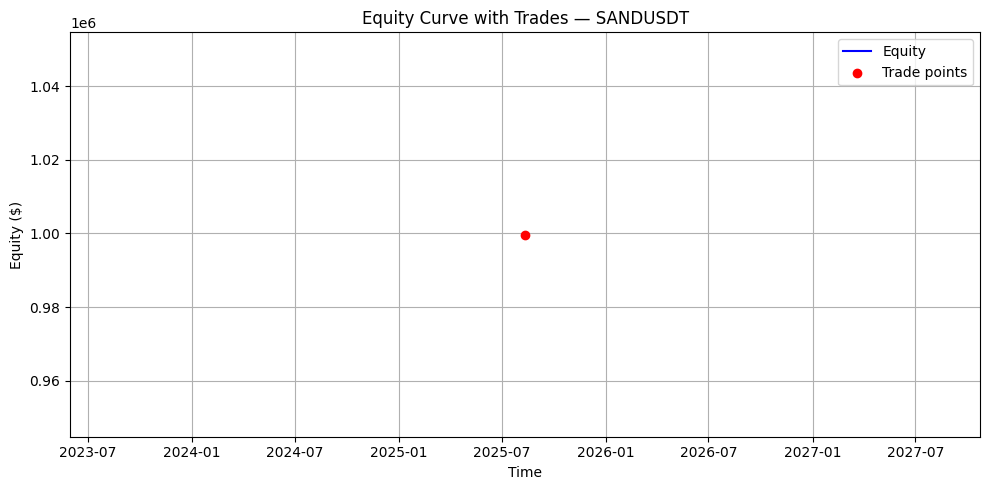

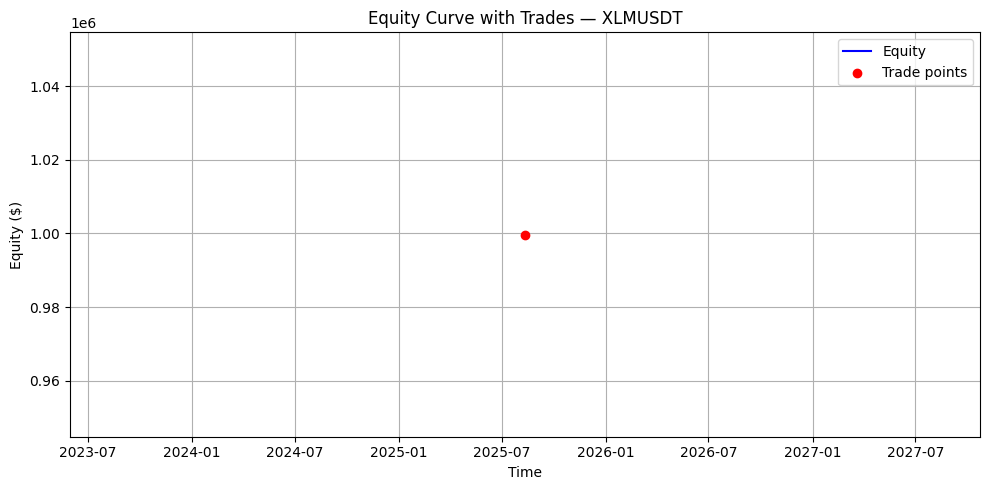

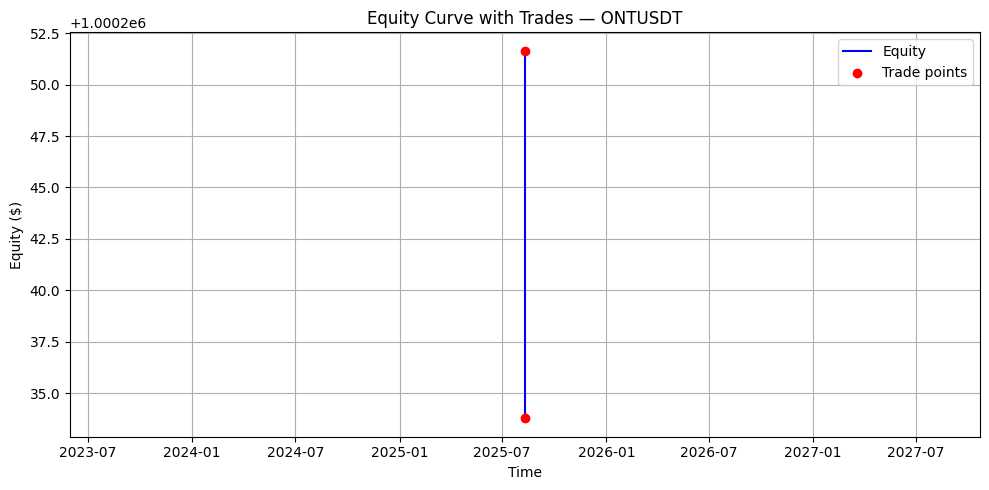

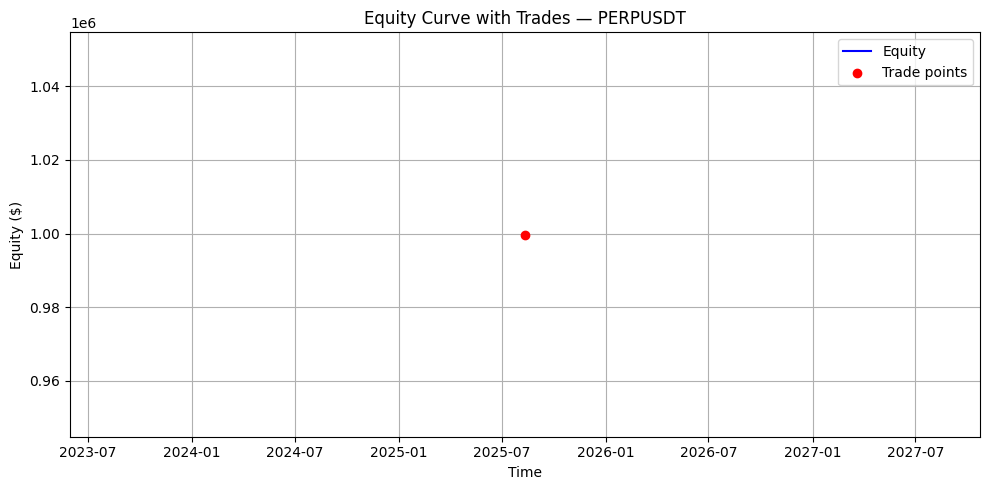

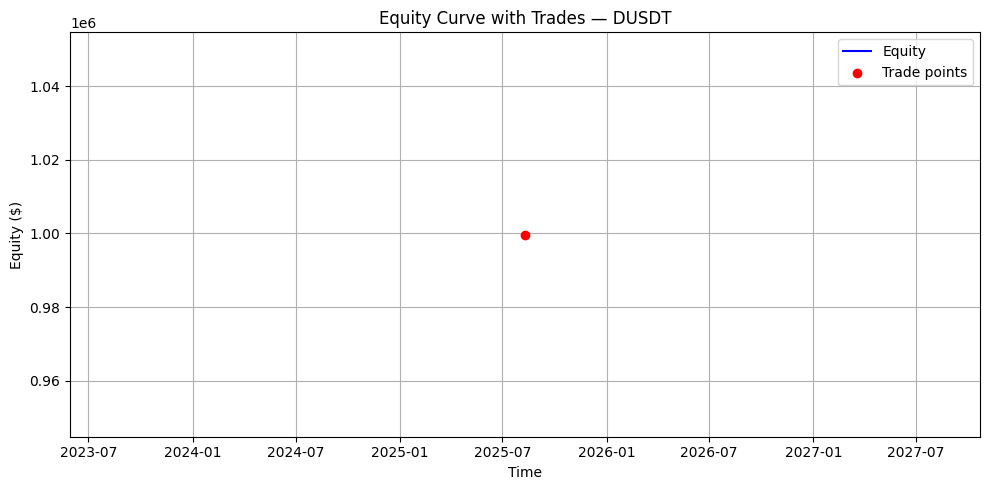

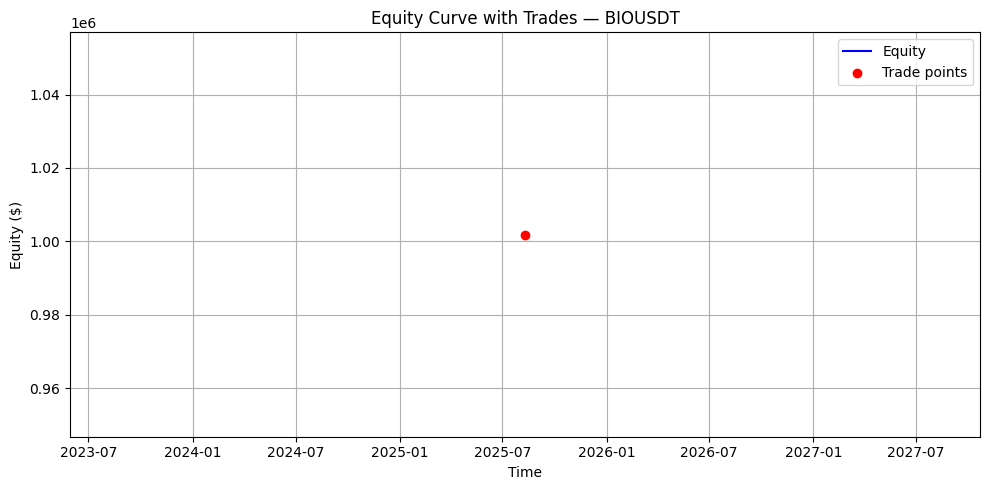

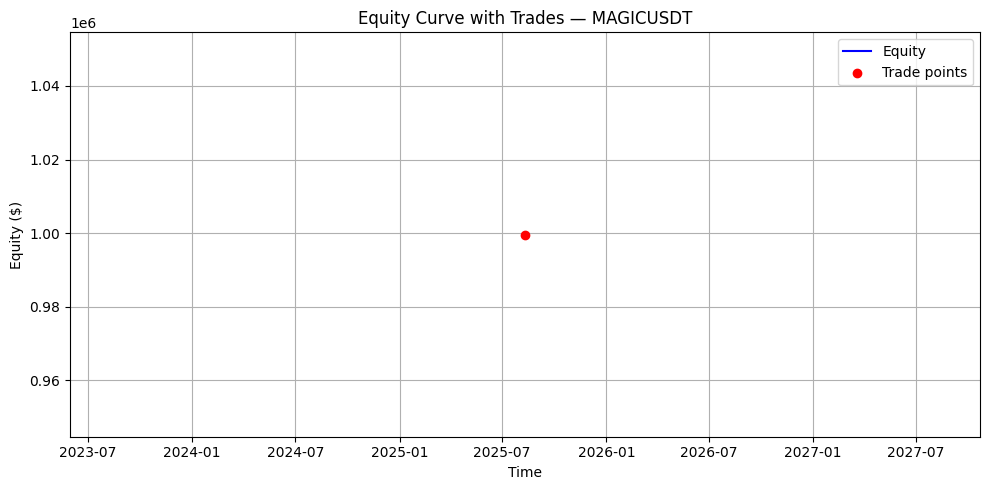

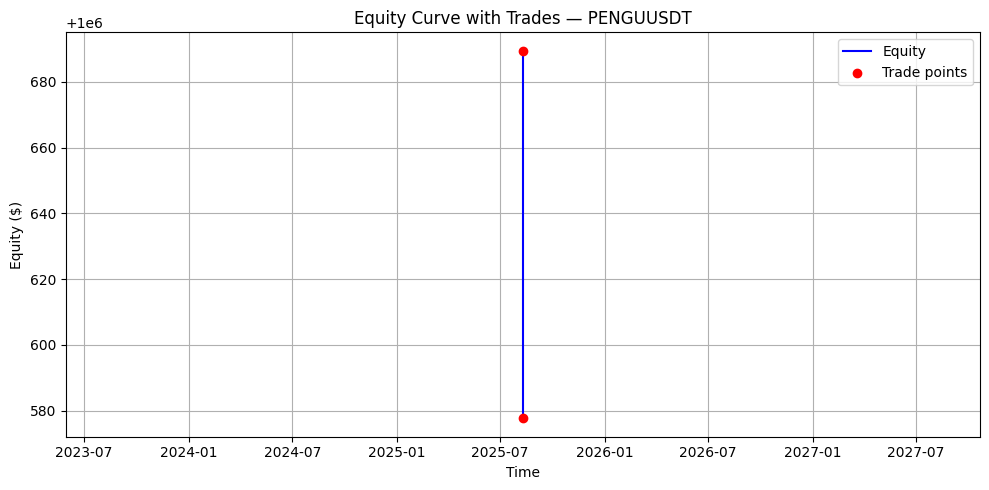

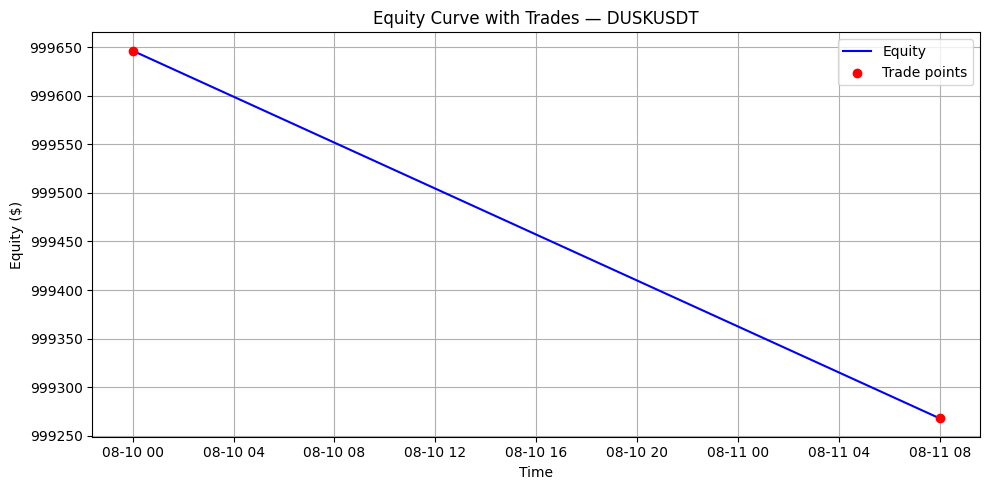

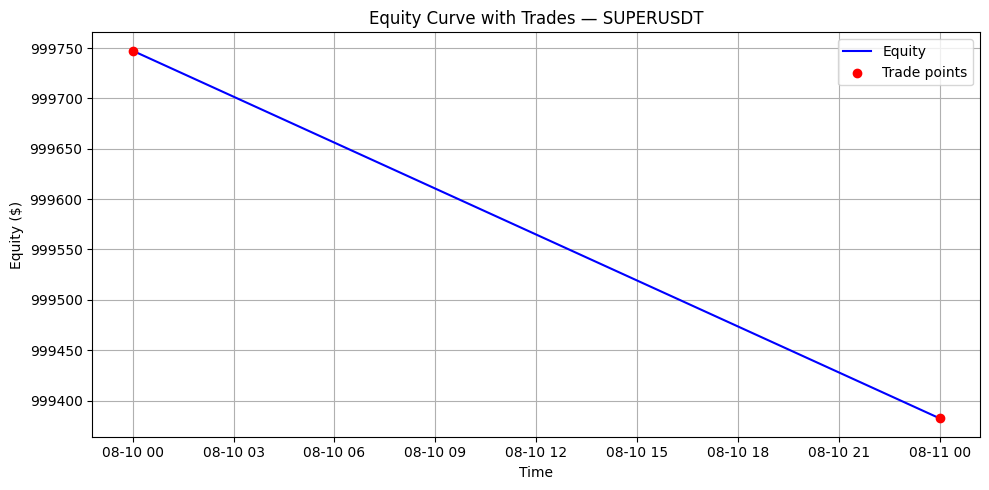

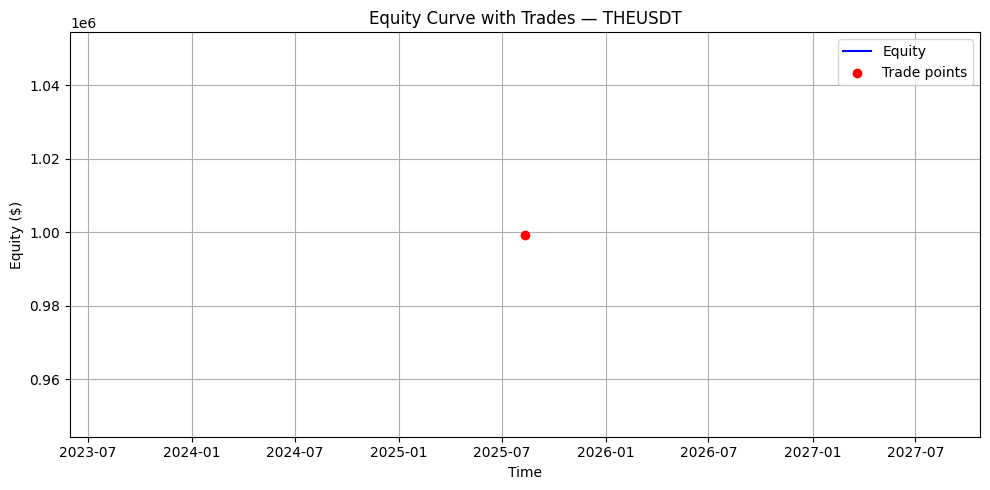

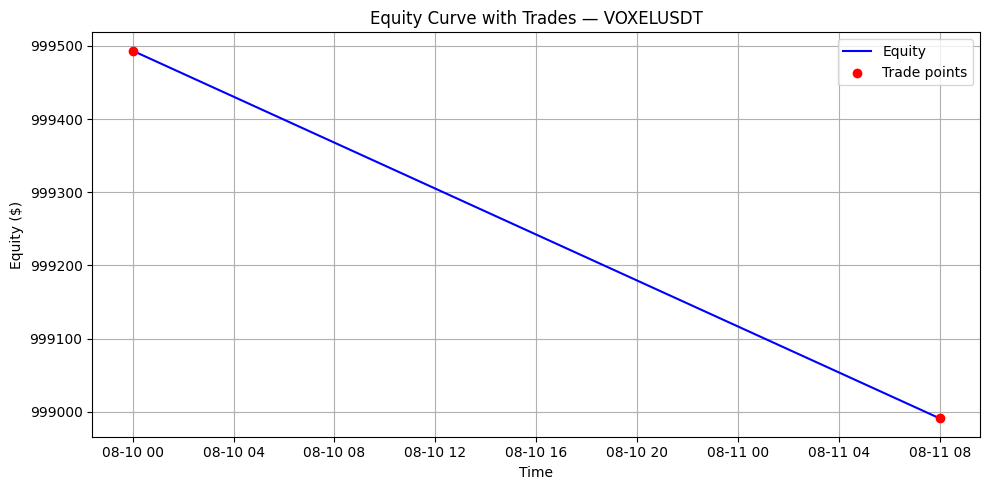

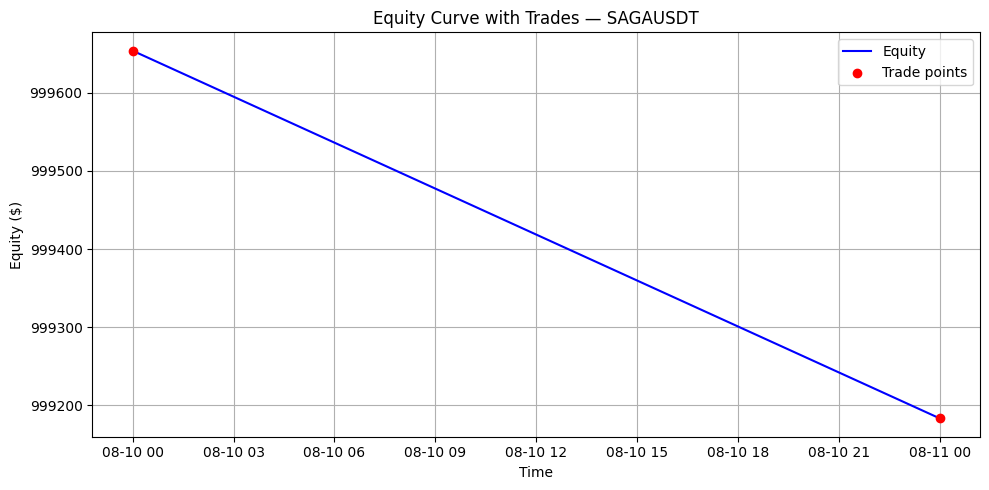

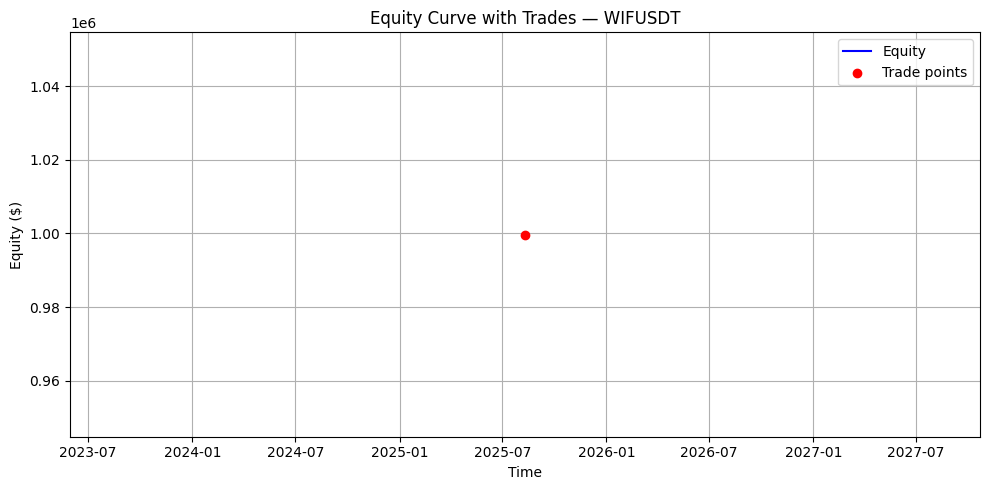

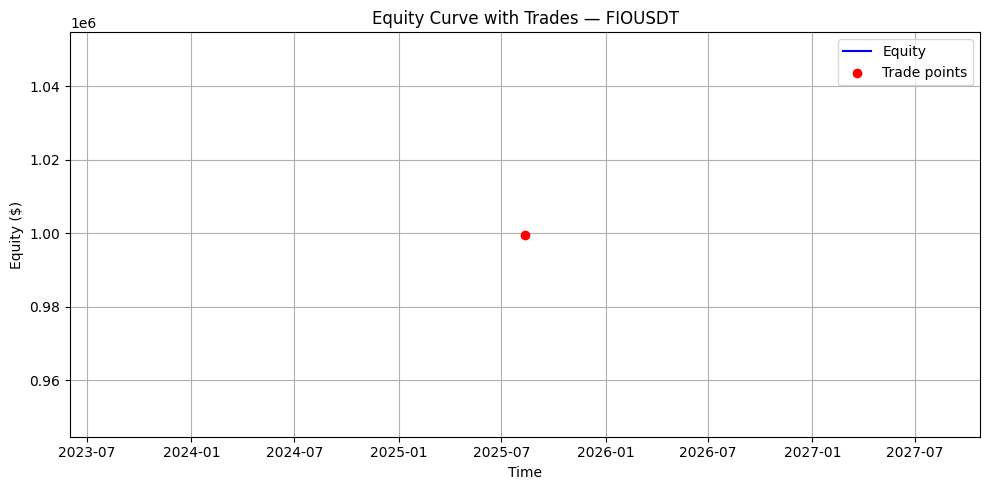

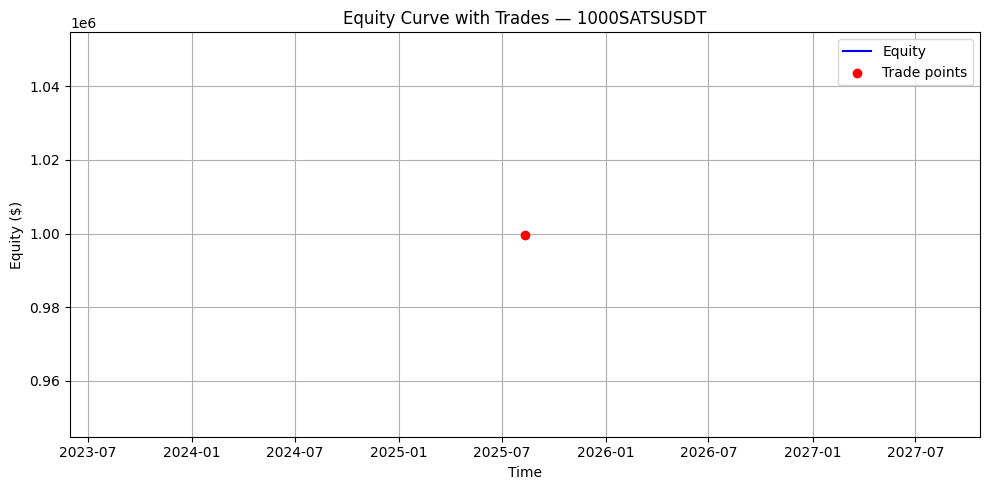

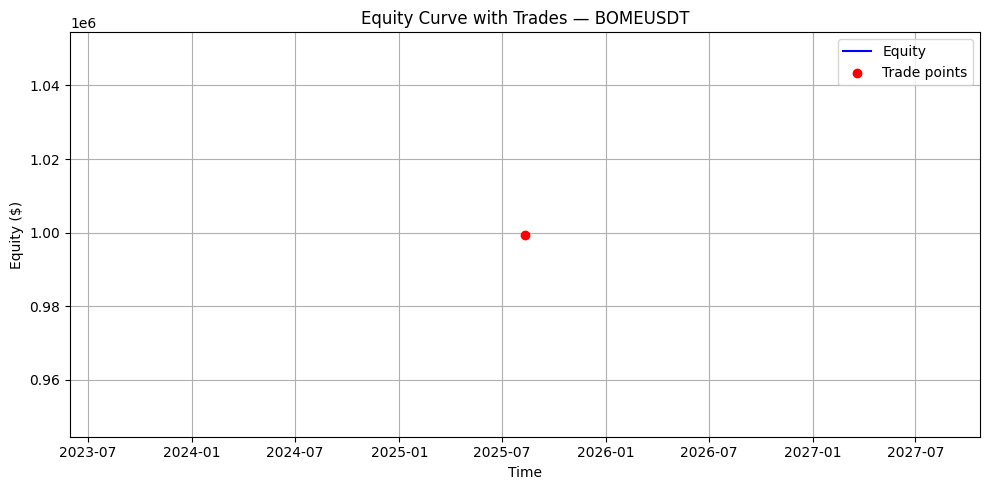

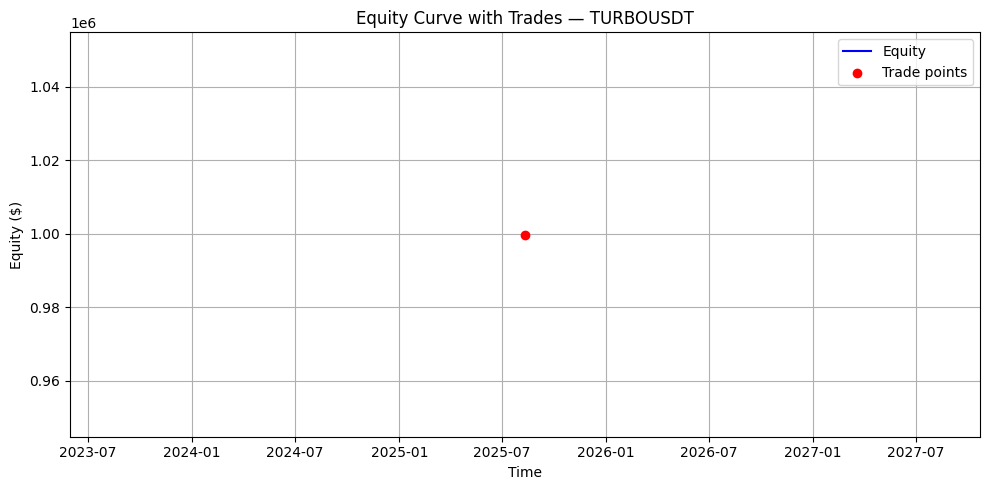

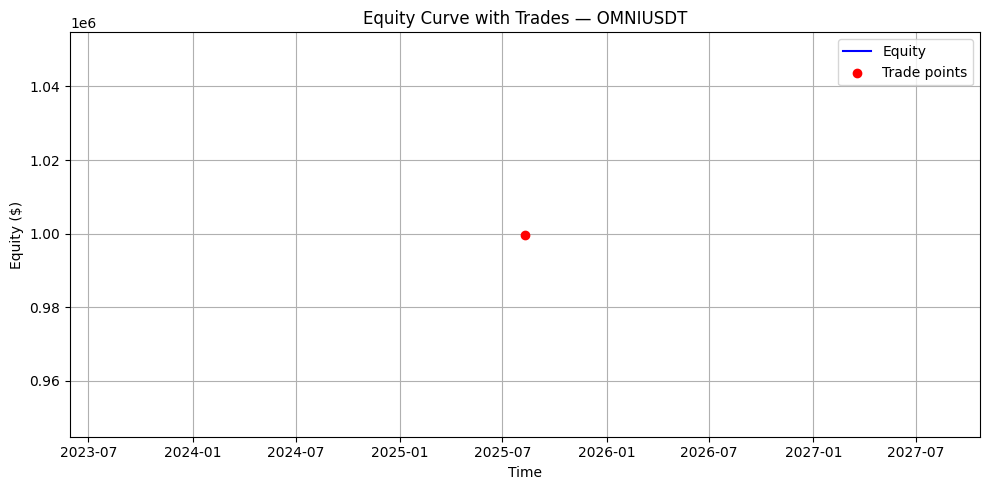

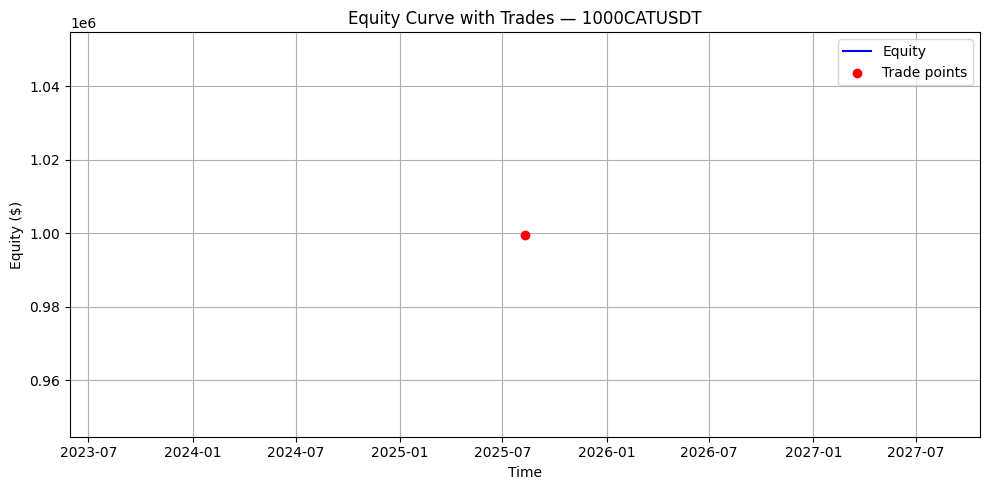

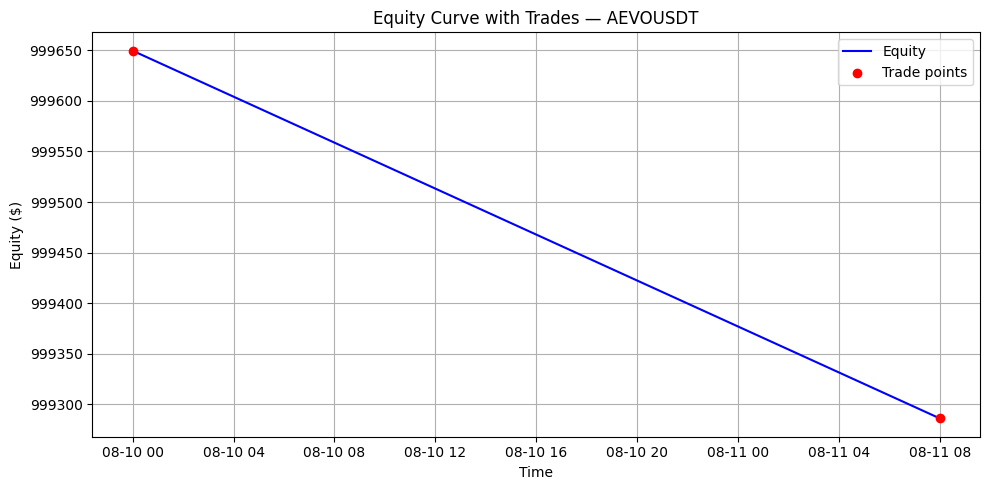

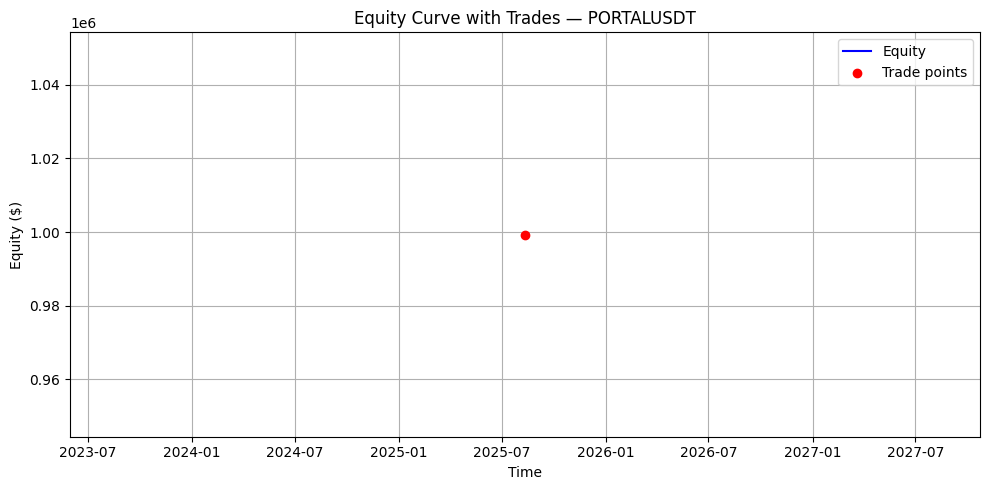

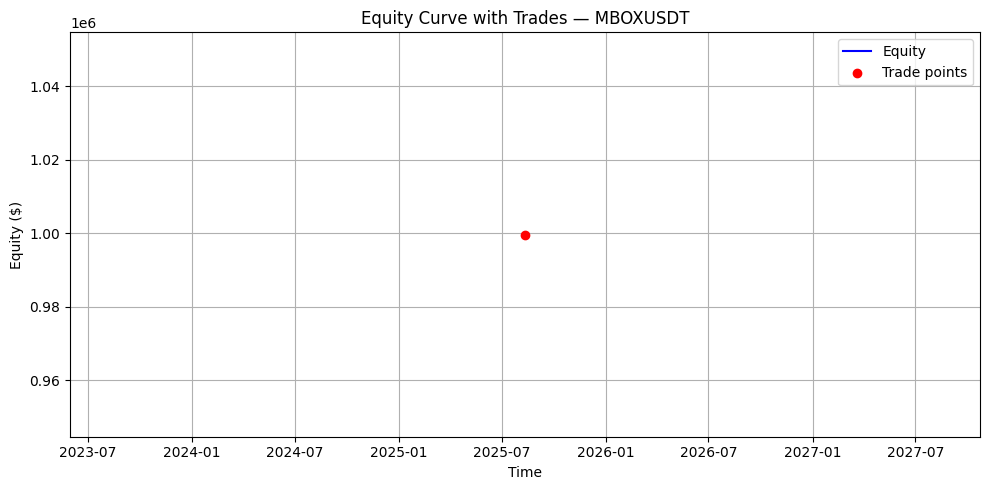

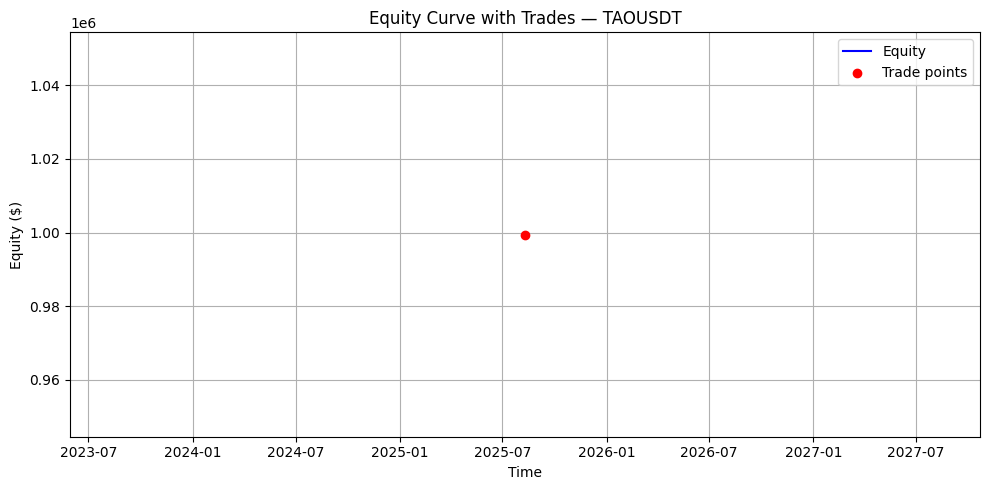

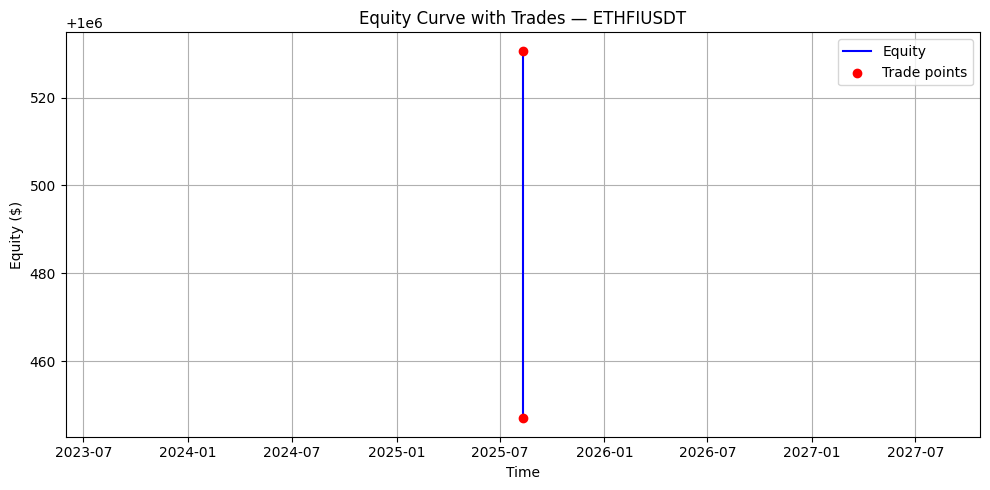

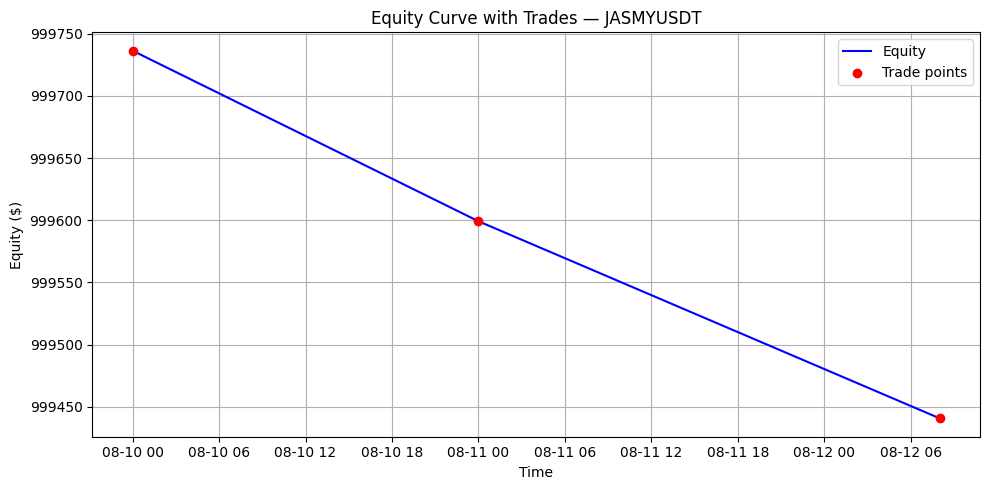

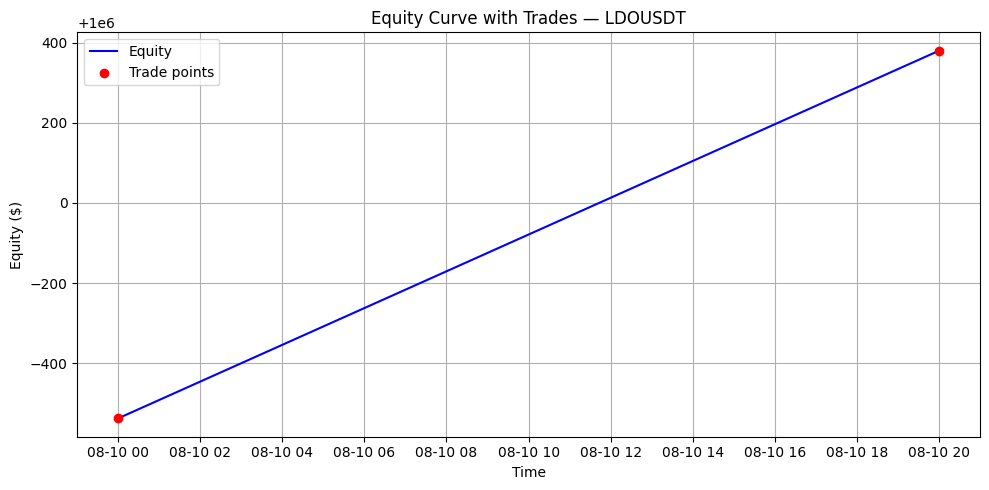

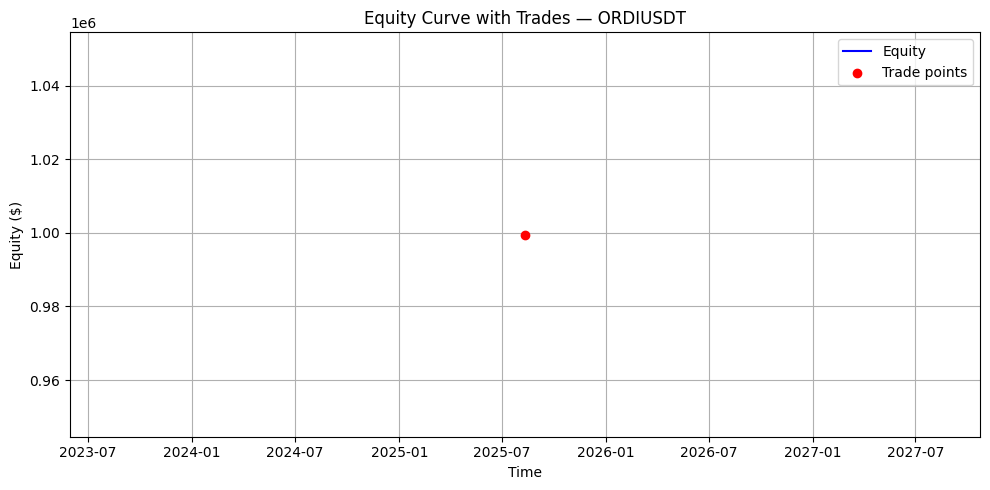

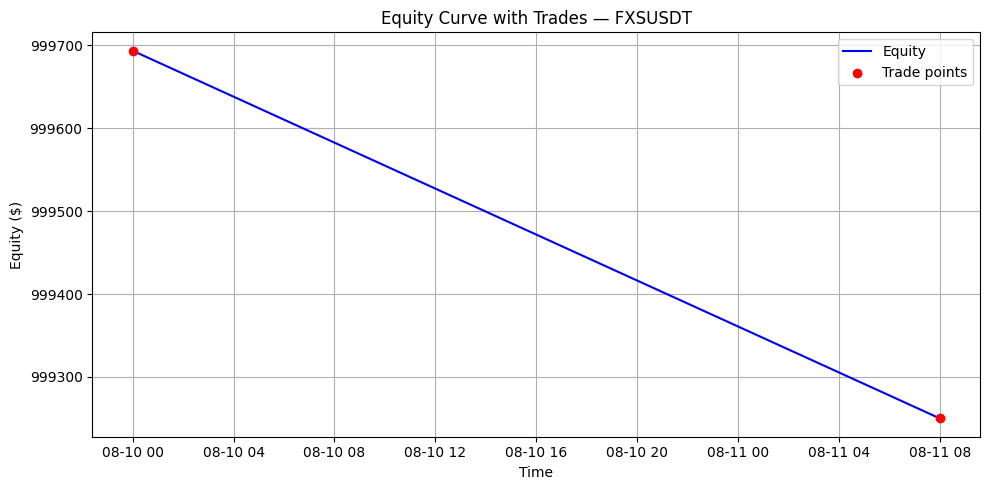

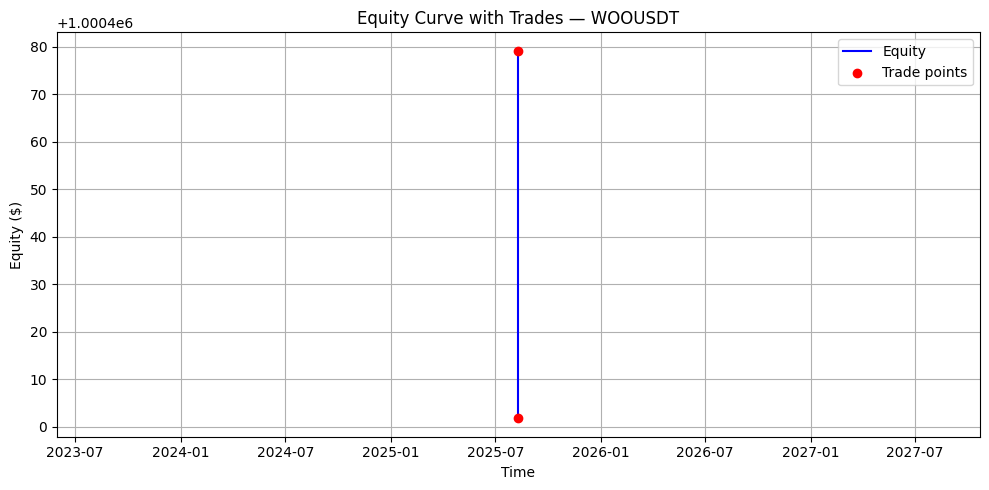

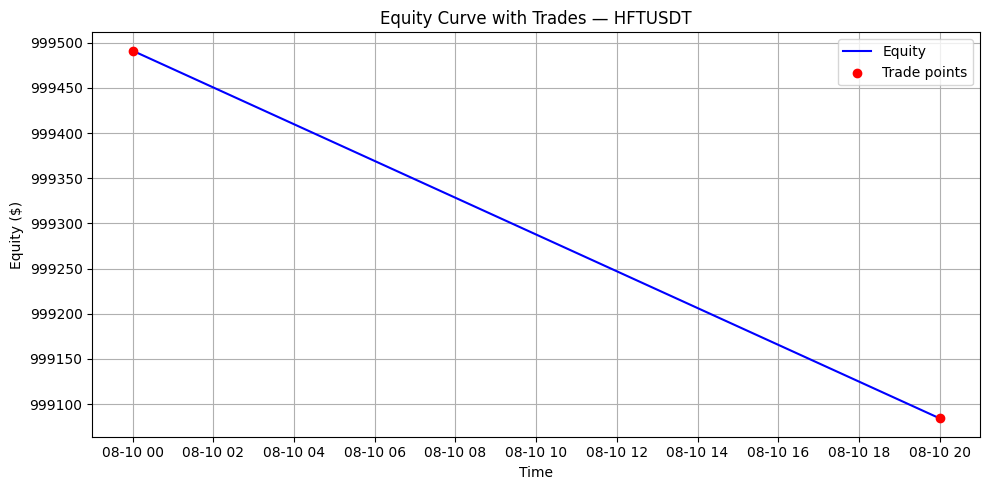

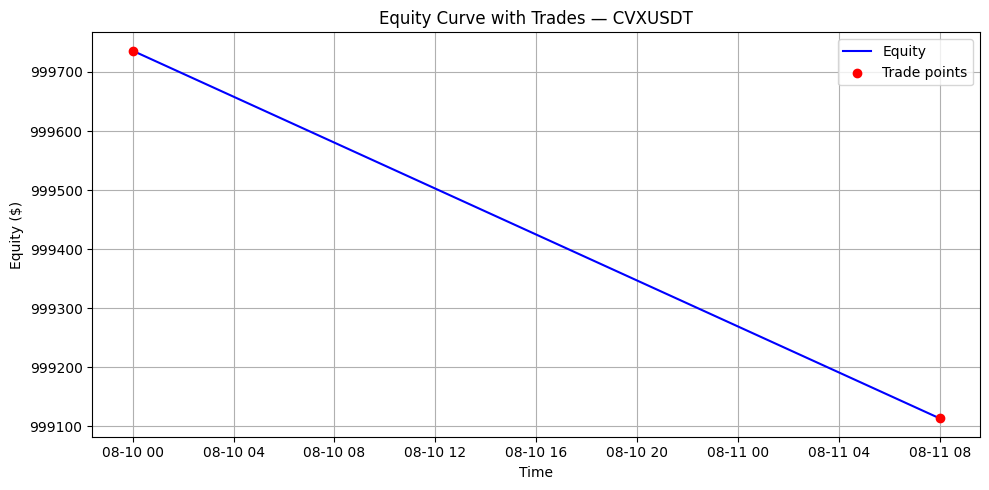

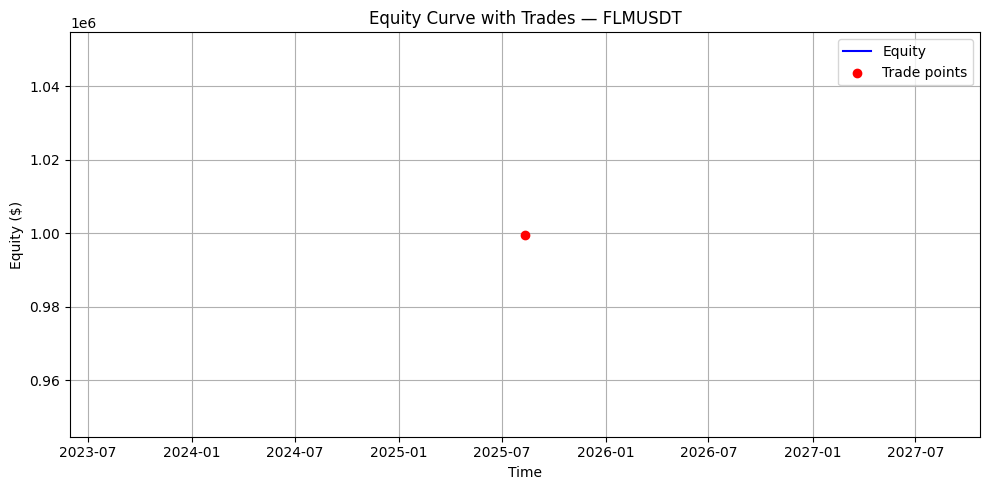

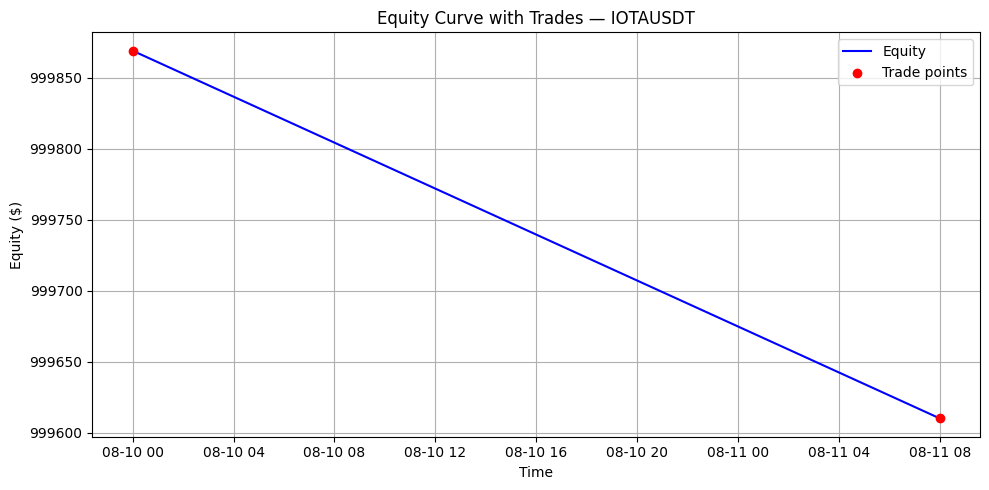

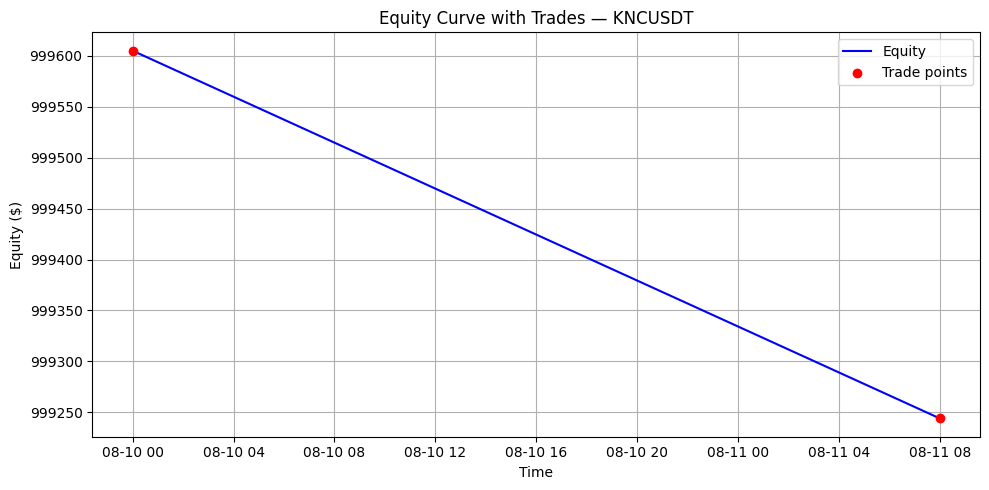

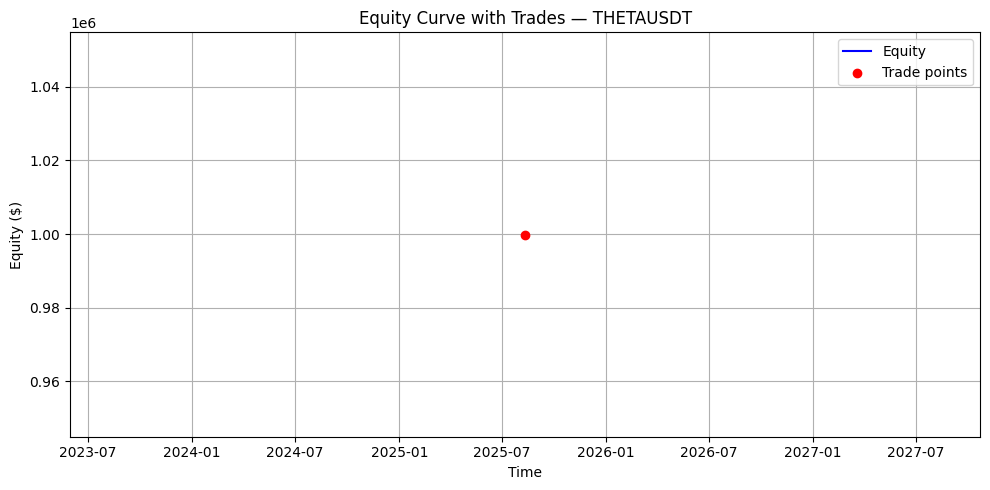

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# === Загрузка ===
file = f"all_trades_df_{interval}_2takes.csv"
trades_df = pd.read_csv(file, parse_dates=["EntryTime", "ExitTime"])

initial_cash = 1_000_000
symbols = trades_df["symbol"].unique()

for symbol in symbols:
    df = trades_df[trades_df["symbol"] == symbol].copy()
    df.sort_values("EntryTime", inplace=True)
    if df.empty:
        continue

    # === Расчёт equity ===
    equity = [initial_cash]
    for ret in df["ReturnPct"]:
        equity.append(equity[-1] * (1 + ret / 100))
    df["Equity"] = equity[1:]
    df["EntryTime"] = pd.to_datetime(df["EntryTime"])

    # === Построение ===
    plt.figure(figsize=(10, 5))
    plt.plot(df["EntryTime"], df["Equity"], label="Equity", color="blue")

    # Добавим точки
    plt.scatter(df["EntryTime"], df["Equity"],
                color="red", label="Trade points", zorder=5)

    plt.title(f"Equity Curve with Trades — {symbol}")
    plt.xlabel("Time")
    plt.ylabel("Equity ($)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [ ]:
# symbols = ['BNBUSDT', 'ETHUSDT', 'TNSRUSDT', '1000CHEEMSUSDT', 'KNCUSDT',
#        'IOTAUSDT', 'TURBOUSDT', 'BIOUSDT', 'NOTUSDT', 'CGPTUSDT', 'DUSDT',
#        'WLDUSDT', 'UMAUSDT', 'LISTAUSDT', 'EIGENUSDT', 'LINAUSDT',
#        'MOVRUSDT', 'DIAUSDT', 'ARPAUSDT']
symbols = all_trade_logs['symbol'].unique()

## Compare real and backtest tradings

symbol                   real_open_time             bt_entry_time  \
0         DUSDT 2025-08-09 20:00:09.342000+00:00 2025-08-10 00:00:00+00:00   
1       KNCUSDT 2025-08-09 20:00:09.226000+00:00 2025-08-10 00:00:00+00:00   
2      IOTAUSDT 2025-08-09 20:00:09.237000+00:00 2025-08-10 00:00:00+00:00   
3   1000CATUSDT 2025-08-09 20:00:09.308000+00:00 2025-08-10 00:00:00+00:00   
4      DUSKUSDT 2025-08-09 20:00:09.335000+00:00 2025-08-10 00:00:00+00:00   
5      SAGAUSDT 2025-08-09 20:00:09.323000+00:00 2025-08-10 00:00:00+00:00   
6       FXSUSDT 2025-08-09 20:00:09.302000+00:00 2025-08-10 00:00:00+00:00   
7       LDOUSDT 2025-08-09 20:00:09.301000+00:00 2025-08-10 00:00:00+00:00   
8      OMNIUSDT 2025-08-09 20:00:09.334000+00:00 2025-08-10 00:00:00+00:00   
9      AEVOUSDT 2025-08-09 20:00:09.333000+00:00 2025-08-10 00:00:00+00:00   
10    VOXELUSDT 2025-08-09 20:00:09.336000+00:00 2025-08-10 00:00:00+00:00   
11      TAOUSDT 2025-08-09 20:00:09.335000+00:00 2025-08-10 00:00:00+00:00   
12    SUPERUSDT 2025-08-09 20:00:09.385000+00:00 2025-08-10 00:00:00+00:00   
13      CVXUSDT 2025-08-09 20:00:09.841000+00:00 2025-08-10 00:00:00+00:00   
14      HFTUSDT 2025-08-09 20:00:09.332000+00:00 2025-08-10 00:00:00+00:00   
15    PENGUUSDT 2025-08-09 20:00:09.399000+00:00 2025-08-10 00:00:00+00:00   
16    JASMYUSDT 2025-08-09 20:00:09.299000+00:00 2025-08-10 00:00:00+00:00   
17      BIOUSDT 2025-08-09 20:00:09.469000+00:00 2025-08-10 00:00:00+00:00   
18    SUPERUSDT 2025-08-10 20:00:09.147000+00:00 2025-08-11 00:00:00+00:00   
19     ORDIUSDT 2025-08-10 20:00:09.067000+00:00 2025-08-11 00:00:00+00:00   
20      WIFUSDT 2025-08-10 04:00:08.818000+00:00 2025-08-10 08:00:00+00:00   
21      WOOUSDT 2025-08-10 04:00:08.813000+00:00 2025-08-10 08:00:00+00:00   
22    ETHFIUSDT 2025-08-10 16:00:09.142000+00:00 2025-08-10 20:00:00+00:00   
23    TURBOUSDT 2025-08-10 16:00:09.129000+00:00 2025-08-10 20:00:00+00:00   
24      ONTUSDT 2025-08-10 04:00:08.813000+00:00 2025-08-10 08:00:00+00:00   
25      LDOUSDT 2025-08-10 16:00:09.129000+00:00 2025-08-10 20:00:00+00:00   
26     BOMEUSDT 2025-08-11 00:00:09.478000+00:00 2025-08-11 00:00:00+00:00   
27     SAGAUSDT 2025-08-10 20:00:09.074000+00:00 2025-08-11 00:00:00+00:00   
28      HFTUSDT 2025-08-10 16:00:09.129000+00:00 2025-08-10 20:00:00+00:00   
29      THEUSDT 2025-08-11 04:00:09.308000+00:00 2025-08-11 08:00:00+00:00   
30     MBOXUSDT 2025-08-11 04:00:09.322000+00:00 2025-08-11 08:00:00+00:00   
31      CVXUSDT 2025-08-11 04:00:09.672000+00:00 2025-08-11 08:00:00+00:00   
32    THETAUSDT 2025-08-10 16:00:09.143000+00:00 2025-08-10 20:00:00+00:00   
33      KNCUSDT 2025-08-11 04:00:09.162000+00:00 2025-08-11 08:00:00+00:00   
34      FXSUSDT 2025-08-11 04:00:09.321000+00:00 2025-08-11 08:00:00+00:00   
35     IOTAUSDT 2025-08-11 04:00:09.182000+00:00 2025-08-11 08:00:00+00:00   
36   PORTALUSDT 2025-08-11 04:00:09.328000+00:00 2025-08-11 08:00:00+00:00   
37      FLMUSDT 2025-08-11 04:00:09.164000+00:00 2025-08-11 08:00:00+00:00   
38     SANDUSDT 2025-08-11 04:00:09.211000+00:00 2025-08-11 08:00:00+00:00   
39     DUSKUSDT 2025-08-11 04:00:09.304000+00:00 2025-08-11 08:00:00+00:00   
40     AEVOUSDT 2025-08-11 04:00:09.324000+00:00 2025-08-11 08:00:00+00:00   
41     PERPUSDT 2025-08-11 04:00:09.211000+00:00 2025-08-11 08:00:00+00:00   

    ReturnPct_real  ReturnPct_bt  
0        -0.017138     -0.028427  
1        -0.007869     -0.039518  
2        -0.009048     -0.013106  
3        -0.014330     -0.035119  
4        -0.009801     -0.035367  
5         0.000566     -0.034623  
6        -0.020218     -0.030666  
7         0.001097     -0.053764  
8        -0.016681     -0.025679  
9        -0.009443     -0.035042  
10       -0.023170     -0.050665  
11       -0.016360     -0.054279  
12       -0.011064     -0.025265  
13       -0.007219     -0.026405  
14       -0.025812     -0.050886  
15        0.002992      0.068945  
16       -0.009571     -0.026365  
17       -0.043796      

{'n_matches': 42, 'pearson_corr': np.float64(0.02666329620062786), 'mean_abs_diff': np.float64(0.03291398268585448), 'pct_same_sign': np.float64(0.8571428571428571)}


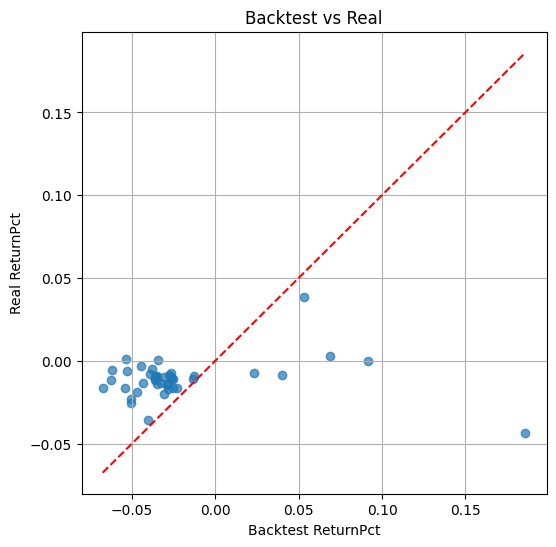

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def parse_time_cols(real_df, back_df):
    def to_dt(x):
        if pd.isna(x):
            return pd.NaT
        try:
            v = float(x)
        except:
            return pd.to_datetime(x, utc=True, errors='coerce')
        if v > 1e11:  # миллисекунды
            return pd.to_datetime(v, unit='ms', utc=True)
        if v > 1e9:   # секунды
            return pd.to_datetime(v, unit='s', utc=True)
        return pd.to_datetime(x, utc=True, errors='coerce')

    if "open_time" in real_df.columns:
        real_df["open_time_dt"] = real_df["open_time"].apply(to_dt)
    elif "EntryTime" in real_df.columns:
        real_df["open_time_dt"] = pd.to_datetime(real_df["EntryTime"], utc=True, errors='coerce')

    if "EntryTime" in back_df.columns:
        back_df["entry_time_dt"] = pd.to_datetime(back_df["EntryTime"], utc=True, errors='coerce')

    return real_df, back_df

def infer_return_pct_from_real(real_df, result_col="result"):
    df = real_df.copy()
    if result_col not in df.columns:
        df["ReturnPct_real"] = np.nan
        return df

    df["_raw_result"] = pd.to_numeric(df[result_col], errors='coerce')
    max_abs = df["_raw_result"].abs().max(skipna=True)
    entry_price_col = "entry_price"
    quantity_col = "quantity"

    if max_abs > 1 and entry_price_col in df.columns and quantity_col in df.columns:
        denom = pd.to_numeric(df[entry_price_col], errors='coerce') * pd.to_numeric(df[quantity_col], errors='coerce')
        df["ReturnPct_real"] = df["_raw_result"] / denom.replace({0: np.nan})
    else:
        df["ReturnPct_real"] = df["_raw_result"]

    return df

def prepare_backtest_returns(back_df):
    df = back_df.copy()
    if "ReturnPct" in df.columns:
        df["ReturnPct_bt"] = pd.to_numeric(df["ReturnPct"], errors='coerce')
    elif "EntryPrice" in df.columns and "ExitPrice" in df.columns:
        df["ReturnPct_bt"] = pd.to_numeric(df["ExitPrice"], errors='coerce') / pd.to_numeric(df["EntryPrice"], errors='coerce') - 1
    else:
        df["ReturnPct_bt"] = np.nan
    return df

def match_trades(real_df, back_df, tol_hours=4):
    tol = pd.Timedelta(hours=tol_hours)
    matches = []
    used_back_idx = set()

    for i, r in real_df.iterrows():
        sym = str(r["symbol"]).strip()
        t = r["open_time_dt"]
        candidates = back_df[(back_df["symbol"].astype(str).str.strip() == sym) &
                             (back_df["entry_time_dt"] >= t - tol) &
                             (back_df["entry_time_dt"] <= t + tol)].copy()  # <- .copy() чтобы избежать предупреждений

        if candidates.empty:
            continue

        candidates.loc[:, "time_diff"] = (candidates["entry_time_dt"] - t).abs()
        best = candidates.sort_values("time_diff").iloc[0]
        back_idx = best.name

        if back_idx in used_back_idx:
            continue
        used_back_idx.add(back_idx)

        matches.append({
            "symbol": sym,
            "real_open_time": t,
            "bt_entry_time": best["entry_time_dt"],
            "ReturnPct_real": r["ReturnPct_real"],
            "ReturnPct_bt": best["ReturnPct_bt"]
        })

    matched_df = pd.DataFrame(matches)
    return matched_df

def plot_scatter(df):
    plt.figure(figsize=(6,6))
    plt.scatter(df["ReturnPct_bt"], df["ReturnPct_real"], alpha=0.7)
    # Берем лимиты только по нужным колонкам
    x_min, x_max = df["ReturnPct_bt"].min(), df["ReturnPct_bt"].max()
    y_min, y_max = df["ReturnPct_real"].min(), df["ReturnPct_real"].max()
    lims = [min(x_min, y_min), max(x_max, y_max)]
    plt.plot(lims, lims, 'r--')
    plt.xlabel("Backtest ReturnPct")
    plt.ylabel("Real ReturnPct")
    plt.title("Backtest vs Real")
    plt.grid(True)
    plt.show()


def compute_metrics(matched_df):
    df = matched_df.dropna(subset=["ReturnPct_real", "ReturnPct_bt"])
    metrics = {
        "n_matches": len(df),
        "pearson_corr": df["ReturnPct_real"].corr(df["ReturnPct_bt"]),
        "mean_abs_diff": (df["ReturnPct_real"] - df["ReturnPct_bt"]).abs().mean(),
        "pct_same_sign": (np.sign(df["ReturnPct_real"]) == np.sign(df["ReturnPct_bt"])).mean()
    }
    return metrics


# ======== Пример использования в Colab ========

real_df = pd.read_csv("trades.csv")
back_df = pd.DataFrame(all_trade_logs)
# back_df = pd.read_csv("all_trades_df.csv")


real_df, back_df = parse_time_cols(real_df, back_df)
real_df = infer_return_pct_from_real(real_df)
back_df = prepare_backtest_returns(back_df)
matched_df = match_trades(real_df, back_df)
metrics = compute_metrics(matched_df)
display(matched_df)
print(metrics)
plot_scatter(matched_df)


In [ ]:
import pandas as pd
import numpy as np

# Загружаем
real_df = pd.read_csv("trades.csv")
back_df = pd.DataFrame(all_trade_logs)

# === Подготовка real_df ===
real_df["open_time"] = pd.to_datetime(real_df["open_time"], unit="ms", utc=True)
real_df = real_df.rename(columns={
    "result": "ReturnPct_real",
    "open_time": "EntryTime_real"
})
real_df["symbol"] = real_df["symbol"].str.upper()

# Фильтрация по дате (переводим время Ханоя в UTC)
start_utc = pd.Timestamp("2025-08-09 20:00", tz="UTC")
end_utc = pd.Timestamp("2025-08-11 16:00", tz="UTC")
real_df = real_df[(real_df["EntryTime_real"] >= start_utc) & (real_df["EntryTime_real"] <= end_utc)]

# === Подготовка back_df ===
back_df["EntryTime"] = pd.to_datetime(back_df["EntryTime"], utc=True)
back_df = back_df.rename(columns={
    "ReturnPct": "ReturnPct_bt",
    "EntryTime": "EntryTime_bt"
})
back_df["symbol"] = back_df["symbol"].str.upper()

# === Количество сделок ===
n_real = len(real_df)
n_bt = len(back_df)
print(f"📊 Реальных сделок: {n_real}")
print(f"📊 Сделок в бэктесте: {n_bt}")

# === Объединение по символу ===
merged = pd.merge(
    real_df, back_df,
    on="symbol", how="outer",
    suffixes=("_real", "_bt"), indicator=True
)

# Приведение к float
merged["ReturnPct_real"] = pd.to_numeric(merged["ReturnPct_real"], errors="coerce")
merged["ReturnPct_bt"] = pd.to_numeric(merged["ReturnPct_bt"], errors="coerce")

# === Сделки только в реале ===
only_real = merged[merged["_merge"] == "left_only"]
print(f"\n🔹 Сделки только в реале: {len(only_real)}")
display(only_real[["symbol", "EntryTime_real", "ReturnPct_real"]])

# === Сделки только в бэктесте ===
only_bt = merged[merged["_merge"] == "right_only"]
print(f"\n🔹 Сделки только в бэктесте: {len(only_bt)}")
display(only_bt[["symbol", "EntryTime_bt", "ReturnPct_bt"]])

# === Совпавшие сделки ===
matched = merged[merged["_merge"] == "both"].copy()

matched["dir_real"] = np.sign(matched["ReturnPct_real"].fillna(0))
matched["dir_bt"] = np.sign(matched["ReturnPct_bt"].fillna(0))
matched["same_direction"] = matched["dir_real"] == matched["dir_bt"]

matched["better"] = np.where(
    matched["ReturnPct_real"] > matched["ReturnPct_bt"], "real", "bt"
)

# === Статистика ===
same_dir_count = matched["same_direction"].sum()
diff_dir_count = len(matched) - same_dir_count

print(f"\n✅ Совпало по направлению: {same_dir_count} ({same_dir_count/len(matched)*100:.1f}%)")
print(f"❌ Разное направление: {diff_dir_count} ({diff_dir_count/len(matched)*100:.1f}%)")

print("\n📈 Где лучше:")
print(matched["better"].value_counts())

display(matched[["symbol", "ReturnPct_real", "ReturnPct_bt", "same_direction", "better"]])


📊 Реальных сделок: 66
📊 Сделок в бэктесте: 47

🔹 Сделки только в реале: 3


symbol                   EntryTime_real  ReturnPct_real
52  MAGICUSDT 2025-08-10 08:00:09.120000+00:00        -0.10355
76    SSVUSDT 2025-08-10 16:00:09.142000+00:00         0.04410
98    XLMUSDT 2025-08-11 04:00:09.172000+00:00        -0.04040


🔹 Сделки только в бэктесте: 1


symbol              EntryTime_bt  ReturnPct_bt
1  1000SATSUSDT 2025-08-11 08:00:00+00:00     -0.027594


✅ Совпало по направлению: 75 (78.9%)
❌ Разное направление: 20 (21.1%)

📈 Где лучше:
better
bt      82
real    13
Name: count, dtype: int64


symbol  ReturnPct_real  ReturnPct_bt  same_direction better
0   1000CATUSDT       -0.143424     -0.035119            True     bt
2      AEVOUSDT       -0.094500     -0.035042            True     bt
3      AEVOUSDT       -0.094500     -0.036346            True     bt
4      AEVOUSDT       -0.114000     -0.035042            True     bt
5      AEVOUSDT       -0.114000     -0.036346            True     bt
..          ...             ...           ...             ...    ...
93      WIFUSDT       -0.143560     -0.028537            True     bt
94      WOOUSDT       -0.087600      0.040178           False     bt
95      WOOUSDT       -0.087600      0.007735           False     bt
96      WOOUSDT       -0.104400      0.040178           False     bt
97      WOOUSDT       -0.104400      0.007735           False     bt

[95 rows x 5 columns]

In [ ]:
import pandas as pd
import numpy as np

# === ЗАГРУЗКА ДАННЫХ ===
real_df = pd.read_csv("trades.csv", parse_dates=["EntryTime_real"])
back_df = pd.DataFrame(all_trade_logs)
back_df["EntryTime_bt"] = pd.to_datetime(back_df["EntryTime_bt"])

# === ФИЛЬТР ПО ВРЕМЕНИ ===
# Переводим ханойское время в UTC
start_utc = pd.Timestamp("2025-08-10 03:00:00", tz="Asia/Bangkok").tz_convert("UTC")
end_utc = pd.Timestamp("2025-08-11 16:00:00", tz="UTC")

real_df = real_df[(real_df["EntryTime_real"] >= start_utc) & (real_df["EntryTime_real"] <= end_utc)]
back_df = back_df[(back_df["EntryTime_bt"] >= start_utc) & (back_df["EntryTime_bt"] <= end_utc)]

# === ПОИСК СОВПАДЕНИЙ ПО SYMBOL И ВРЕМЕНИ ===
matches = []
used_bt_idx = set()

for i, r_row in real_df.iterrows():
    symbol = r_row["symbol"]
    entry_real = r_row["EntryTime_real"]

    # Фильтруем по символу
    bt_candidates = back_df[back_df["symbol"] == symbol]

    # Считаем разницу во времени
    time_diffs = (bt_candidates["EntryTime_bt"] - entry_real).abs()

    if not time_diffs.empty:
        min_diff_idx = time_diffs.idxmin()
        min_diff = time_diffs[min_diff_idx]

        # Совпадение, если разница <= 5 минут
        if min_diff <= pd.Timedelta(minutes=5) and min_diff_idx not in used_bt_idx:
            used_bt_idx.add(min_diff_idx)
            bt_row = back_df.loc[min_diff_idx]
            matches.append({
                "symbol": symbol,
                "EntryTime_real": entry_real,
                "EntryTime_bt": bt_row["EntryTime_bt"],
                "ReturnPct_real": r_row["ReturnPct_real"],
                "ReturnPct_bt": bt_row["ReturnPct_bt"]
            })

matched_df = pd.DataFrame(matches)

# === АНАЛИЗ ===
# Направления
matched_df["same_direction"] = np.sign(matched_df["ReturnPct_real"]) == np.sign(matched_df["ReturnPct_bt"])

# Где лучше
matched_df["better"] = np.where(matched_df["ReturnPct_real"] > matched_df["ReturnPct_bt"], "real", "bt")

# Сделки только в реале
real_only = real_df[~real_df.index.isin(matched_df.index)]

# Сделки только в бэктесте
bt_only = back_df[~back_df.index.isin(used_bt_idx)]

# === РЕЗУЛЬТАТ ===
print(f"📊 Реальных сделок: {len(real_df)}")
print(f"📊 Сделок в бэктесте: {len(back_df)}\n")

print(f"🔹 Сделки только в реале: {len(real_only)}")
print(real_only[["symbol", "EntryTime_real", "ReturnPct_real"]], "\n")

print(f"🔹 Сделки только в бэктесте: {len(bt_only)}")
print(bt_only[["symbol", "EntryTime_bt", "ReturnPct_bt"]], "\n")

print(f"✅ Совпало по направлению: {matched_df['same_direction'].sum()} ({matched_df['same_direction'].mean()*100:.1f}%)")
print(f"❌ Разное направление: {(~matched_df['same_direction']).sum()} ({(~matched_df['same_direction']).mean()*100:.1f}%)\n")

print("📈 Где лучше:")
print(matched_df["better"].value_counts())


KeyError: 'ReturnPct_real'

In [30]:
real_df = pd.read_csv("trades.csv")
back_df = pd.DataFrame(all_trade_logs)

In [ ]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   orig_real_index       66 non-null     int64              
 1   #                     66 non-null     int64              
 2   id                    66 non-null     int64              
 3   symbol                66 non-null     object             
 4   position_open         66 non-null     bool               
 5   interval              66 non-null     object             
 6   order_size            66 non-null     float64            
 7   side                  66 non-null     bool               
 8   status                66 non-null     object             
 9   leverage              66 non-null     int64              
 10  atr_length            66 non-null     int64              
 11  atr                   66 non-null     float64            
 12  open_time 

In [ ]:
back_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   orig_bt_index  0 non-null      int64              
 1   symbol         0 non-null      object             
 2   EntryTime      0 non-null      datetime64[ns, UTC]
 3   ExitTime       0 non-null      datetime64[ns, UTC]
 4   EntryPrice     0 non-null      float64            
 5   ExitPrice      0 non-null      float64            
 6   ReturnPct      0 non-null      float64            
 7   EntryTime_bt   0 non-null      datetime64[ns, UTC]
 8   ReturnPct_bt   0 non-null      float64            
dtypes: datetime64[ns, UTC](3), float64(4), int64(1), object(1)
memory usage: 132.0+ bytes


In [ ]:
# Полностью автономный блок для Colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ----------------- Настройки -----------------
TIME_TOL_MINUTES = 5  # допустимая разница для матчинга (можно поменять)
# Период: от 2025-08-10 03:00 по Ханою (UTC+7) до 2025-08-11 16:00 UTC
START_HANOI = pd.Timestamp("2025-08-10 03:00:00", tz="Asia/Bangkok").tz_convert("UTC")
END_UTC = pd.Timestamp("2025-08-11 16:00:00", tz="UTC")
OUT_DIR = "/content/compare_results"
os.makedirs(OUT_DIR, exist_ok=True)
# ---------------------------------------------

# ----------------- Загрузка данных -----------------
# Попробуем использовать уже загруженные переменные, если они есть, иначе читаем CSV
if 'real_df' in globals():
    print("Используем существующий real_df из окружения.")
else:
    if os.path.exists("trades.csv"):
        real_df = pd.read_csv("trades.csv")
        print("Загружен trades.csv -> real_df")
    else:
        raise FileNotFoundError("Не найден trades.csv и real_df не определён в окружении.")

if 'all_trade_logs' in globals():
    back_df = pd.DataFrame(all_trade_logs)
    print("Используем существующую переменную all_trade_logs -> back_df")
else:
    # пробуем csv с бэктестом
    if os.path.exists("all_trades_df.csv"):
        back_df = pd.read_csv("all_trades_df.csv")
        print("Загружен all_trades_df.csv -> back_df")
    else:
        # допустим, у пользователя уже загружен back_df
        if 'back_df' in globals():
            back_df = globals()['back_df']
            print("Используем существующий back_df из окружения.")
        else:
            raise FileNotFoundError("Не найден all_trades_df.csv и переменная all_trade_logs/back_df не определена.")

# Копии чтобы не трогать оригиналы
real_df = pd.read_csv("trades.csv")
back_df = pd.DataFrame(all_trade_logs)


real_df = real_df.copy()
back_df = back_df.copy()

# ----------------- Утилиты для распознавания колонок -----------------
def detect_time_and_convert_real(df):
    """
    Найдём колонку с временем в real trades:
    возможные имена: open_time, openTime, entry_time, entry, time
    Если числовое большое число -> считаем миллисекунды.
    Возвращаем колонку EntryTime_real (tz-aware UTC).
    """
    time_cols = [c for c in df.columns if c.lower() in ("open_time","open","entry_time","entrytime","entry_time_ms","time","opentime")]
    chosen = None
    if time_cols:
        chosen = time_cols[0]
    else:
        # fallback: если есть колонка с 'time' substring
        for c in df.columns:
            if "time" in c.lower():
                chosen = c
                break
    if chosen is None:
        raise KeyError("Не удалось найти колонку времени в real_df (ищите 'open_time' и т.д.).")

    # Если числовой тип — возможно unix timestamps
    ser = df[chosen]
    # try numeric conversion
    ser_num = pd.to_numeric(ser, errors='coerce')
    # if many values are numeric and large -> treat as ms
    if ser_num.notna().sum() > 0 and ser_num.abs().median() > 1e10:
        # вероятно миллисекунды
        dt = pd.to_datetime(ser_num, unit='ms', utc=True, errors='coerce')
    elif ser_num.notna().sum() > 0 and ser_num.abs().median() > 1e9:
        # вероятно секунды
        dt = pd.to_datetime(ser_num, unit='s', utc=True, errors='coerce')
    else:
        dt = pd.to_datetime(ser, utc=True, errors='coerce')
        # если получились NaT и нет timezone, пробуем без utc и локализуем как UTC
        if dt.isna().all():
            dt = pd.to_datetime(ser, errors='coerce')
            if dt.dt.tz is None:
                dt = dt.dt.tz_localize("UTC")
    df["EntryTime_real"] = dt
    return df

def detect_time_and_convert_back(df):
    """
    Найдём колонку EntryTime в бэктесте (EntryTime, entry_time, EntryTime_bt и т.д.)
    Возвращаем EntryTime_bt tz-aware UTC.
    """
    candidates = [c for c in df.columns if c.lower() in ("entrytime","entry_time","entry_time_bt","entry_time_utc","entrytime_utc","entrytime_bt","entry")]
    chosen = candidates[0] if candidates else None
    if chosen is None:
        # fallback: ищем "entry" или "time" в имени колонки
        for c in df.columns:
            if "entry" in c.lower() or ("time" in c.lower() and "exit" not in c.lower()):
                chosen = c
                break
    if chosen is None:
        raise KeyError("Не удалось найти колонку с временем входа в back_df (ищите 'EntryTime' и т.д.).")

    ser = df[chosen]
    ser_num = pd.to_numeric(ser, errors='coerce')
    if ser_num.notna().sum() > 0 and ser_num.abs().median() > 1e10:
        dt = pd.to_datetime(ser_num, unit='ms', utc=True, errors='coerce')
    elif ser_num.notna().sum() > 0 and ser_num.abs().median() > 1e9:
        dt = pd.to_datetime(ser_num, unit='s', utc=True, errors='coerce')
    else:
        dt = pd.to_datetime(ser, utc=True, errors='coerce')
        if dt.isna().all():
            dt = pd.to_datetime(ser, errors='coerce')
            if dt.dt.tz is None:
                dt = dt.dt.tz_localize("UTC")
    df["EntryTime_bt"] = dt
    return df

def detect_returnpct_real(df):
    """
    Определяем ReturnPct_real:
    - если есть колонка 'result' — пробуем использовать её; если она явно абсолютный P&L (|val|>1),
      попытаемся трансформировать, если есть entry_price и quantity; иначе оставляем.
    - если нет, пробуем вычислить из entry/close.
    """
    # possible names
    if "ReturnPct_real" in df.columns:
        return df
    col_candidates = [c for c in df.columns if c.lower() in ("result","returnpct","return_pct","return","pnl","profit")]
    chosen = col_candidates[0] if col_candidates else None

    if chosen is not None:
        raw = pd.to_numeric(df[chosen], errors='coerce')
        # guess scale
        if raw.abs().max(skipna=True) > 1.5:
            # вероятно абсолютный P&L
            if "entry_price" in df.columns and "quantity" in df.columns:
                entry = pd.to_numeric(df["entry_price"], errors='coerce')
                qty = pd.to_numeric(df["quantity"], errors='coerce')
                denom = entry * qty
                df["ReturnPct_real"] = raw / denom.replace({0: np.nan})
            elif "entry_price" in df.columns and "close_price" in df.columns:
                e = pd.to_numeric(df["entry_price"], errors='coerce')
                c = pd.to_numeric(df["close_price"], errors='coerce')
                df["ReturnPct_real"] = c / e - 1
            else:
                # оставим как есть, но предупредим
                df["ReturnPct_real"] = raw
        else:
            df["ReturnPct_real"] = raw
    else:
        # попытаемся посчитать из entry/exit
        if "entry_price" in df.columns and ("exit_price" in df.columns or "close_price" in df.columns):
            e = pd.to_numeric(df["entry_price"], errors='coerce')
            c = pd.to_numeric(df.get("exit_price", df.get("close_price")), errors='coerce')
            df["ReturnPct_real"] = c / e - 1
        else:
            df["ReturnPct_real"] = np.nan
    return df

def detect_returnpct_back(df):
    """
    Подготовка ReturnPct_bt: используем 'ReturnPct' если есть, иначе считаем ExitPrice/EntryPrice -1.
    """
    if "ReturnPct_bt" in df.columns:
        return df
    if "ReturnPct" in df.columns:
        df["ReturnPct_bt"] = pd.to_numeric(df["ReturnPct"], errors='coerce')
        return df
    # try EntryPrice / ExitPrice
    candidates_entry = [c for c in df.columns if c.lower() in ("entryprice","entry_price","entry")]
    candidates_exit = [c for c in df.columns if c.lower() in ("exitprice","exit_price","exit","closeprice","close_price","close")]
    if candidates_entry and candidates_exit:
        e = pd.to_numeric(df[candidates_entry[0]], errors='coerce')
        x = pd.to_numeric(df[candidates_exit[0]], errors='coerce')
        df["ReturnPct_bt"] = x / e - 1
    else:
        df["ReturnPct_bt"] = np.nan
    return df

# ----------------- Нормализация колонок -----------------
real_df = detect_time_and_convert_real(real_df)
back_df = detect_time_and_convert_back(back_df)

real_df = detect_returnpct_real(real_df)
back_df = detect_returnpct_back(back_df)

# унификация symbol
if "symbol" not in real_df.columns:
    # попытка найти возможные имена
    for c in real_df.columns:
        if c.lower().startswith("symbol"):
            real_df = real_df.rename(columns={c: "symbol"})
            break
if "symbol" not in back_df.columns:
    for c in back_df.columns:
        if c.lower().startswith("symbol"):
            back_df = back_df.rename(columns={c: "symbol"})
            break

# uppercase + strip
real_df["symbol"] = real_df["symbol"].astype(str).str.upper().str.strip()
back_df["symbol"] = back_df["symbol"].astype(str).str.upper().str.strip()

# cast numeric columns
real_df["ReturnPct_real"] = pd.to_numeric(real_df.get("ReturnPct_real"), errors='coerce')
back_df["ReturnPct_bt"] = pd.to_numeric(back_df.get("ReturnPct_bt"), errors='coerce')

# ----------------- Фильтрация по периоду -----------------
real_df = real_df[(real_df["EntryTime_real"] >= START_HANOI) & (real_df["EntryTime_real"] <= END_UTC)].copy()
back_df = back_df[(back_df["EntryTime_bt"] >= START_HANOI) & (back_df["EntryTime_bt"] <= END_UTC)].copy()

# переиндексируем чтобы индексы были компактны (важно для matched sets)
real_df = real_df.reset_index(drop=False)  # сохраняем старый индекс в колонке 'index'
real_df = real_df.rename(columns={"index":"orig_real_index"})
back_df = back_df.reset_index(drop=False)
back_df = back_df.rename(columns={"index":"orig_bt_index"})

# ----------------- Матчинг (символ + время рядом) -----------------
tol = pd.Timedelta(minutes=TIME_TOL_MINUTES)
used_bt_idxs = set()
matches = []

# пройдёмся по real_df (можно поменять порядок)
for ridx, r in real_df.iterrows():
    sym = r["symbol"]
    t_real = r["EntryTime_real"]
    if pd.isna(t_real):
        continue
    # кандидаты того же тикера, не использованные
    cands = back_df[(back_df["symbol"] == sym) & (~back_df["orig_bt_index"].isin(used_bt_idxs))].copy()
    if cands.empty:
        continue
    # считаем абсолютную разницу
    cands["time_diff"] = (cands["EntryTime_bt"] - t_real).abs()
    cands = cands.sort_values("time_diff")
    best = cands.iloc[0]
    if best["time_diff"] <= tol:
        b_idx = int(best["orig_bt_index"])
        used_bt_idxs.add(b_idx)
        matches.append({
            "real_row": ridx,
            "real_orig_index": int(r["orig_real_index"]),
            "bt_orig_index": b_idx,
            "symbol": sym,
            "EntryTime_real": t_real,
            "EntryTime_bt": best["EntryTime_bt"],
            "ReturnPct_real": float(r["ReturnPct_real"]) if not pd.isna(r["ReturnPct_real"]) else np.nan,
            "ReturnPct_bt": float(best["ReturnPct_bt"]) if not pd.isna(best["ReturnPct_bt"]) else np.nan,
            "time_diff_sec": best["time_diff"].total_seconds()
        })

matched_df = pd.DataFrame(matches)

# ----------------- Unmatched -----------------
matched_real_row_idxs = set(matched_df["real_row"].tolist()) if not matched_df.empty else set()
matched_bt_orig_idxs = set(matched_df["bt_orig_index"].tolist()) if not matched_df.empty else set()

real_only_df = real_df[~real_df.index.isin(matched_real_row_idxs)].copy()
bt_only_df = back_df[~back_df["orig_bt_index"].isin(matched_bt_orig_idxs)].copy()

# ----------------- Аналитика по совпавшим сделкам -----------------
if not matched_df.empty:
    matched_df["same_direction"] = np.sign(matched_df["ReturnPct_real"].fillna(0)) == np.sign(matched_df["ReturnPct_bt"].fillna(0))
    matched_df["diff_abs"] = (matched_df["ReturnPct_real"] - matched_df["ReturnPct_bt"]).abs()
    matched_df["better"] = np.where(matched_df["ReturnPct_real"] > matched_df["ReturnPct_bt"], "real", "bt")
    # сводная статистика
    n_matched = len(matched_df)
    pct_same_dir = matched_df["same_direction"].mean() * 100
    better_counts = matched_df["better"].value_counts()
    mean_abs_diff = matched_df["diff_abs"].mean()
    # корреляция (если достаточно точек)
    pearson = None
    if n_matched >= 2:
        pearson = matched_df["ReturnPct_real"].corr(matched_df["ReturnPct_bt"])
else:
    n_matched = 0
    pct_same_dir = np.nan
    better_counts = pd.Series(dtype=int)
    mean_abs_diff = np.nan
    pearson = np.nan

# ----------------- Выводы и сохранение -----------------
print("=== Итоги по периоду ===")
print(f"Период (UTC): {START_HANOI.isoformat()} .. {END_UTC.isoformat()}")
print(f"Реальных сделок в периоде: {len(real_df)}")
print(f"Сделок в бэктесте в периоде: {len(back_df)}")
print(f"Сопоставлено сделок (one-to-one within ±{TIME_TOL_MINUTES}min): {n_matched}")
print(f"Совпадение по направлению: {pct_same_dir:.1f}%")
print(f"Средняя |разница| ReturnPct: {mean_abs_diff:.4f}")
print(f"Кто лучше (counts):\n{better_counts.to_string()}")
print(f"Корреляция (pearson) между ReturnPct: {pearson}")

# Сохраним результаты
matched_df.to_csv(os.path.join(OUT_DIR, "matched_trades.csv"), index=False)
real_only_df.to_csv(os.path.join(OUT_DIR, "real_only_trades.csv"), index=False)
bt_only_df.to_csv(os.path.join(OUT_DIR, "bt_only_trades.csv"), index=False)

# Показать несколько примеров
print("\nПримеры совпавших сделок (первые 20):")
display(matched_df.head(20))

print("\nПримеры только в реале (первые 10):")
display(real_only_df.head(10)[["symbol","EntryTime_real","ReturnPct_real"]])

print("\nПримеры только в бэктесте (первые 10):")
display(bt_only_df.head(10)[["symbol","EntryTime_bt","ReturnPct_bt"]])

# ----------------- Визуализация -----------------
if not matched_df.empty:
    plt.figure(figsize=(6,6))
    plt.scatter(matched_df["ReturnPct_bt"], matched_df["ReturnPct_real"], alpha=0.7)
    mn = min(matched_df["ReturnPct_bt"].min(), matched_df["ReturnPct_real"].min())
    mx = max(matched_df["ReturnPct_bt"].max(), matched_df["ReturnPct_real"].max())
    plt.plot([mn, mx], [mn, mx], linestyle="--", color="gray")
    plt.xlabel("ReturnPct (backtest)")
    plt.ylabel("ReturnPct (real)")
    plt.title("Backtest vs Real (matched trades)")
    plt.grid(True)
    plt.show()

    # топ расхождений
    top_diff = matched_df.sort_values("diff_abs", ascending=False).head(20)
    print("\nТоп-20 по абсолютной разнице (где test vs real расходятся сильнее):")
    display(top_diff[["symbol","EntryTime_real","EntryTime_bt","ReturnPct_real","ReturnPct_bt","diff_abs","same_direction","better"]])

print(f"\nРезультаты сохранены в {OUT_DIR} (matched_trades.csv, real_only_trades.csv, bt_only_trades.csv)")

Используем существующий real_df из окружения.
Используем существующую переменную all_trade_logs -> back_df
=== Итоги по периоду ===
Период (UTC): 2025-08-09T20:00:00+00:00 .. 2025-08-11T16:00:00+00:00
Реальных сделок в периоде: 66
Сделок в бэктесте в периоде: 0
Сопоставлено сделок (one-to-one within ±5min): 0
Совпадение по направлению: nan%
Средняя |разница| ReturnPct: nan
Кто лучше (counts):
Series([], )
Корреляция (pearson) между ReturnPct: nan

Примеры совпавших сделок (первые 20):


Empty DataFrame
Columns: []
Index: []


Примеры только в реале (первые 10):


symbol                   EntryTime_real  ReturnPct_real
0        DUSDT 2025-08-09 20:00:09.342000+00:00       -0.017138
1      KNCUSDT 2025-08-09 20:00:09.226000+00:00       -0.007869
2     IOTAUSDT 2025-08-09 20:00:09.237000+00:00       -0.009048
3  1000CATUSDT 2025-08-09 20:00:09.308000+00:00       -0.014330
4     DUSKUSDT 2025-08-09 20:00:09.335000+00:00       -0.009801
5     SAGAUSDT 2025-08-09 20:00:09.323000+00:00        0.000566
6      FXSUSDT 2025-08-09 20:00:09.302000+00:00       -0.020218
7      LDOUSDT 2025-08-09 20:00:09.301000+00:00        0.001097
8     OMNIUSDT 2025-08-09 20:00:09.334000+00:00       -0.016681
9     AEVOUSDT 2025-08-09 20:00:09.333000+00:00       -0.009443


Примеры только в бэктесте (первые 10):


Empty DataFrame
Columns: [symbol, EntryTime_bt, ReturnPct_bt]
Index: []


Результаты сохранены в /content/compare_results (matched_trades.csv, real_only_trades.csv, bt_only_trades.csv)


In [ ]:
import pandas as pd
import numpy as np

# ==== Настройки ====
# Период в UTC
start_utc = pd.Timestamp("2025-08-09 20:00:00", tz="UTC")
end_utc   = pd.Timestamp("2025-08-11 16:00:00", tz="UTC")

# ==== Подготовка данных ====
# Берём существующие real_df и all_trade_logs
back_df = pd.DataFrame(all_trade_logs).copy()

# Проверяем и переименовываем даты в back_df
for col in back_df.columns:
    if "EntryTime" in col:
        back_df.rename(columns={col: "EntryTime_bt"}, inplace=True)
    if "ReturnPct" in col and col != "ReturnPct_bt":
        back_df.rename(columns={col: "ReturnPct_bt"}, inplace=True)

# Для real_df тоже унифицируем
if "open_time" in real_df.columns:
    real_df["EntryTime_real"] = pd.to_datetime(real_df["open_time"], unit="ms", utc=True)
elif "EntryTime_real" in real_df.columns:
    real_df["EntryTime_real"] = pd.to_datetime(real_df["EntryTime_real"], utc=True)

# Для back_df перевод в datetime с UTC
back_df["EntryTime_bt"] = pd.to_datetime(back_df["EntryTime_bt"], utc=True)

# ==== Фильтрация по периоду ====
real_df_period = real_df[(real_df["EntryTime_real"] >= start_utc) &
                         (real_df["EntryTime_real"] <= end_utc)].copy()
back_df_period = back_df[(back_df["EntryTime_bt"] >= start_utc) &
                         (back_df["EntryTime_bt"] <= end_utc)].copy()

# ==== Сопоставление сделок ====
matched = []
for _, r in real_df_period.iterrows():
    symbol = r["symbol"]
    t_real = r["EntryTime_real"]
    candidates = back_df_period[back_df_period["symbol"] == symbol].copy()
    if candidates.empty:
        continue
    candidates["time_diff"] = (candidates["EntryTime_bt"] - t_real).abs()
    nearest = candidates.loc[candidates["time_diff"].idxmin()]
    if nearest["time_diff"] <= pd.Timedelta(minutes=5):
        matched.append({
            "symbol": symbol,
            "EntryTime_real": t_real,
            "ReturnPct_real": r.get("result", np.nan),  # если есть свой столбец доходности — замени
            "EntryTime_bt": nearest["EntryTime_bt"],
            "ReturnPct_bt": nearest.get("ReturnPct_bt", np.nan)
        })

matched_df = pd.DataFrame(matched)

# ==== Аналитика ====
total_real = len(real_df_period)
total_bt = len(back_df_period)
only_real = real_df_period[~real_df_period["symbol"].isin(matched_df["symbol"])]
only_bt = back_df_period[~back_df_period["symbol"].isin(matched_df["symbol"])]

matched_df["dir_real"] = np.sign(matched_df["ReturnPct_real"])
matched_df["dir_bt"] = np.sign(matched_df["ReturnPct_bt"])
matched_df["same_direction"] = matched_df["dir_real"] == matched_df["dir_bt"]
matched_df["better"] = np.where(matched_df["ReturnPct_real"] > matched_df["ReturnPct_bt"], "real", "bt")

print(f"=== Итоги по периоду ===")
print(f"Период (UTC): {start_utc} .. {end_utc}")
print(f"Реальных сделок в периоде: {total_real}")
print(f"Сделок в бэктесте в периоде: {total_bt}")
print(f"Сопоставлено сделок (±5min): {len(matched_df)}")
if len(matched_df) > 0:
    print(f"Совпадение по направлению: {matched_df['same_direction'].mean()*100:.1f}%")
    print(f"Средняя |разница| ReturnPct: {np.mean(np.abs(matched_df['ReturnPct_real'] - matched_df['ReturnPct_bt'])):.4f}")
    print("Кто лучше (counts):")
    print(matched_df["better"].value_counts())
else:
    print("Совпадений нет.")

print("\n🔹 Сделки только в реале:")
print(only_real[["symbol", "EntryTime_real"]])

print("\n🔹 Сделки только в бэктесте:")
print(only_bt[["symbol", "EntryTime_bt"]])

print("\nПримеры совпавших сделок:")
print(matched_df.head(20))


=== Итоги по периоду ===
Период (UTC): 2025-08-09 20:00:00+00:00 .. 2025-08-11 16:00:00+00:00
Реальных сделок в периоде: 66
Сделок в бэктесте в периоде: 47
Сопоставлено сделок (±5min): 1
Совпадение по направлению: 100.0%
Средняя |разница| ReturnPct: 0.0092
Кто лучше (counts):
better
bt    1
Name: count, dtype: int64

🔹 Сделки только в реале:
         symbol                   EntryTime_real
0         DUSDT 2025-08-09 20:00:09.342000+00:00
1       KNCUSDT 2025-08-09 20:00:09.226000+00:00
2      IOTAUSDT 2025-08-09 20:00:09.237000+00:00
3   1000CATUSDT 2025-08-09 20:00:09.308000+00:00
4      DUSKUSDT 2025-08-09 20:00:09.335000+00:00
..          ...                              ...
61     DUSKUSDT 2025-08-11 04:00:09.304000+00:00
62     AEVOUSDT 2025-08-11 04:00:09.324000+00:00
63     PERPUSDT 2025-08-11 04:00:09.211000+00:00
64      BIOUSDT 2025-08-11 08:00:09.234000+00:00
65      BIOUSDT 2025-08-11 12:00:09.554000+00:00

[64 rows x 2 columns]

🔹 Сделки только в бэктесте:
          symbol

In [ ]:
real_df = pd.read_csv("trades.csv")
back_df = pd.DataFrame(all_trade_logs)

In [34]:
# BACKTESTER: Strategy with 2 takes and ATR-based SL/TP, matching live-bot behaviour
# Run in Colab / local. Requires: pandas, numpy, matplotlib.
# Optional: ta-lib for ATR. If not available, fallback to pandas ATR.

import pandas as pd
import numpy as np
from datetime import timedelta
import math
import matplotlib.pyplot as plt

# -------- Configurable parameters (tune to match live bot) ----------
FEE_PCT = 0.0004         # комиссия (пример 0.04% = 0.0004). Подставь свою
SLIPPAGE_PCT = 0.0005    # проскальзывание при market entry/exit (0.05%)
ATR_LENGTH_DEFAULT = 14
TAKE1_MULT = 1.0
TAKE2_MULT = 2.0
STOP_MULT = 0.25
CLOSE_PORTION = 0.5      # часть позиции закрываем на TP1
# --------------------------------------------------------------------

# --------- Helper: ATR (try talib, otherwise pandas) -----------------
try:
    import talib
    def compute_atr_df(df, length=14):
        # expects df columns: High, Low, Close
        atr = talib.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=length)
        return pd.Series(atr, index=df.index)
except Exception:
    def compute_atr_df(df, length=14):
        high = df['High']
        low = df['Low']
        close = df['Close']
        prev_close = close.shift(1)
        tr = pd.concat([
            (high - low).abs(),
            (high - prev_close).abs(),
            (low - prev_close).abs()
        ], axis=1).max(axis=1)
        atr = tr.rolling(length, min_periods=1).mean()
        return atr
# --------------------------------------------------------------------

# --------- Backtester class -----------------------------------------
class  SignalStrategyBTCTwoTakes:
    def __init__(self, ohlcv_loader, signals_df,
                 interval='4h',
                 atr_length=ATR_LENGTH_DEFAULT,
                 take1_mult=TAKE1_MULT, take2_mult=TAKE2_MULT, stop_mult=STOP_MULT,
                 close_portion=CLOSE_PORTION,
                 fee_pct=FEE_PCT, slippage_pct=SLIPPAGE_PCT):
        """
        ohlcv_loader(symbol, interval) -> DataFrame with index tz-aware UTC and columns Open,High,Low,Close,Volume
        signals_df: columns ['symbol','interval','utc_time','signal'] where utc_time already floored to candle start (tz-aware UTC)
        """
        self.ohlcv_loader = ohlcv_loader
        self.signals_df = signals_df.copy()
        # normalize
        self.signals_df['symbol'] = self.signals_df['symbol'].astype(str).str.upper()
        self.signals_df['interval'] = self.signals_df['interval'].astype(str)
        self.interval = interval
        self.atr_length = atr_length
        self.take1_mult = take1_mult
        self.take2_mult = take2_mult
        self.stop_mult = stop_mult
        self.close_portion = close_portion
        self.fee_pct = fee_pct
        self.slippage_pct = slippage_pct

        # results
        self.trades = []

    def run(self):
        # iterate signals sorted by time
        signals = self.signals_df.sort_values('utc_time')
        # we'll keep a cache of OHLCV+ATR per symbol to avoid reloads
        cache = {}
        for idx, row in signals.iterrows():
            symbol = row['symbol']
            sig_interval = row['interval']
            sig_time = row['utc_time']  # floored candle time
            sig = row['signal']

            # only process matching interval
            if sig_interval != self.interval:
                continue

            if symbol not in cache:
                df = self.ohlcv_loader(symbol, self.interval).copy()
                if df is None or df.empty:
                    continue
                # ensure tz-aware index (UTC)
                if df.index.tz is None:
                    df.index = df.index.tz_localize('UTC')
                df = df.sort_index()
                df['ATR'] = compute_atr_df(df, self.atr_length)
                cache[symbol] = df
            else:
                df = cache[symbol]

            # find the candle index corresponding to sig_time
            if sig_time not in df.index:
                # no data for exactly this candle — skip
                continue
            # entry assumed executed on NEXT candle open (like market order after candle close)
            idx_pos = df.index.get_loc(sig_time)
            entry_idx = idx_pos + 1
            if entry_idx >= len(df):
                # no next candle to fill entry -> skip
                continue
            entry_time = df.index[entry_idx]
            entry_open = float(df['Open'].iloc[entry_idx])

            # apply slippage on entry: market order executes at open * (1 +/- slippage)
            if sig.upper() in ('STRONG_BUY','BUY'):
                entry_price = entry_open * (1 + self.slippage_pct)
                direction = 'long'
            else:
                entry_price = entry_open * (1 - self.slippage_pct)
                direction = 'short'

            atr_at_entry = float(df['ATR'].iloc[idx_pos]) if not np.isnan(df['ATR'].iloc[idx_pos]) else float(df['ATR'].iloc[entry_idx])
            if np.isnan(atr_at_entry) or atr_at_entry == 0:
                # fallback: use small atr to avoid zero
                atr_at_entry = 1e-8

            # compute stops and targets (rounded not necessary here)
            if direction == 'long':
                sl_price = entry_price - self.stop_mult * atr_at_entry
                tp1 = entry_price + self.take1_mult * atr_at_entry
                tp2 = entry_price + self.take2_mult * atr_at_entry
            else:
                sl_price = entry_price + self.stop_mult * atr_at_entry
                tp1 = entry_price - self.take1_mult * atr_at_entry
                tp2 = entry_price - self.take2_mult * atr_at_entry

            # simulate through subsequent candles after entry to detect TP1/TP2/SL
            # state:
            remaining = 1.0
            entry_fee = entry_price * self.fee_pct
            open_idx = entry_idx
            closed = False
            moved_to_be = False
            t_close = None
            exit_price = None
            exit_reason = None

            # scan candles from entry_idx .. end
            for j in range(entry_idx, len(df)):
                row_j = df.iloc[j]
                high = float(row_j['High'])
                low = float(row_j['Low'])
                close = float(row_j['Close'])
                time_j = df.index[j]

                if direction == 'long':
                    # first, check TP2 (if TP1 already taken or even before)
                    if remaining > 0 and high >= tp2 and moved_to_be:
                        # close all at tp2 (we assume fill at TP2 price minus slippage)
                        exit_price = tp2 * (1 - self.slippage_pct)
                        exit_reason = 'TP2'
                        t_close = time_j
                        closed = True
                        remaining = 0
                        break
                    # check TP1
                    if remaining > 0 and high >= tp1 and not moved_to_be:
                        # partial close at tp1
                        # simulate fill at TP1 with slippage
                        partial_exit_price = tp1 * (1 - self.slippage_pct)
                        # apply fees on partial exit
                        exit_fee = partial_exit_price * self.fee_pct
                        # update remaining
                        remaining = remaining * (1 - self.close_portion)
                        # move stop to breakeven (we set stop = entry_price * 1.0 + small buffer if needed)
                        moved_to_be = True
                        sl_price = entry_price  # breakeven exactly (live used slight 0.0225? but following your real code)
                        # record partial trade result as separate line
                        self.trades.append({
                            "symbol": symbol,
                            "entry_time": entry_time,
                            "exit_time": time_j,
                            "entry_price": entry_price,
                            "exit_price": partial_exit_price,
                            "portion": self.close_portion,
                            "reason": "TP1_partial",
                            "return_pct": (partial_exit_price / entry_price - 1),
                            "fee_entry": entry_fee,
                            "fee_exit": exit_fee
                        })
                        # continue simulating remaining portion
                        # Note: do NOT set entry_price for remaining; its original entry stands
                        # continue loop
                    # check SL for remaining
                    if remaining > 0 and low <= sl_price:
                        # stop triggered: if moved_to_be True, stop maybe at breakeven; fill at sl_price +/- slippage
                        exit_price = sl_price * (1 - self.slippage_pct)
                        exit_reason = 'SL'
                        t_close = time_j
                        closed = True
                        remaining = 0
                        break
                else:
                    # short
                    if remaining > 0 and low <= tp2 and moved_to_be:
                        exit_price = tp2 * (1 + self.slippage_pct)
                        exit_reason = 'TP2'
                        t_close = time_j
                        closed = True
                        remaining = 0
                        break
                    if remaining > 0 and low <= tp1 and not moved_to_be:
                        partial_exit_price = tp1 * (1 + self.slippage_pct)
                        exit_fee = partial_exit_price * self.fee_pct
                        remaining = remaining * (1 - self.close_portion)
                        moved_to_be = True
                        sl_price = entry_price
                        self.trades.append({
                            "symbol": symbol,
                            "entry_time": entry_time,
                            "exit_time": time_j,
                            "entry_price": entry_price,
                            "exit_price": partial_exit_price,
                            "portion": self.close_portion,
                            "reason": "TP1_partial",
                            "return_pct": (entry_price / partial_exit_price - 1),
                            "fee_entry": entry_fee,
                            "fee_exit": exit_fee
                        })
                    if remaining > 0 and high >= sl_price:
                        exit_price = sl_price * (1 + self.slippage_pct)
                        exit_reason = 'SL'
                        t_close = time_j
                        closed = True
                        remaining = 0
                        break

            # if loop finished and still remaining (no TP2/SL), close at last candle close
            if remaining > 0 and not closed:
                last_close = float(df['Close'].iloc[-1])
                # assume we exit at last close (market)
                if direction == 'long':
                    exit_price = last_close * (1 - self.slippage_pct)
                    exit_reason = 'EXIT_END'
                else:
                    exit_price = last_close * (1 + self.slippage_pct)
                    exit_reason = 'EXIT_END'
                t_close = df.index[-1]
                closed = True
                remaining = 0

            # record final exit for remaining portion (if any)
            if exit_price is not None:
                # single-line summary for the remainder (if TP1 partials produced earlier, they were recorded)
                self.trades.append({
                    "symbol": symbol,
                    "entry_time": entry_time,
                    "exit_time": t_close,
                    "entry_price": entry_price,
                    "exit_price": exit_price,
                    "portion": 1.0 - (1.0 - remaining), # typical remainder fraction, but we recorded earlier parts explicitly
                    "reason": exit_reason,
                    "return_pct": (exit_price / entry_price - 1) if direction == 'long' else (entry_price / exit_price - 1),
                    "fee_entry": entry_fee,
                    "fee_exit": exit_price * self.fee_pct
                })

        # end signals loop

        # build DataFrame of trades
        trades_df = pd.DataFrame(self.trades)
        # normalize columns
        if not trades_df.empty:
            trades_df['entry_time'] = pd.to_datetime(trades_df['entry_time']).dt.tz_convert('UTC')
            trades_df['exit_time'] = pd.to_datetime(trades_df['exit_time']).dt.tz_convert('UTC')
            trades_df['return_pct'] = pd.to_numeric(trades_df['return_pct'], errors='coerce')
        # summary stats
        summary = {}
        if not trades_df.empty:
            summary['n_trades'] = len(trades_df)
            summary['mean_return'] = trades_df['return_pct'].mean()
            summary['median_return'] = trades_df['return_pct'].median()
            summary['win_rate'] = (trades_df['return_pct'] > 0).mean()
        else:
            summary = {'n_trades':0}

        return trades_df, summary

# --------------------------------------------------------------------

# --------- Example usage (adapt ohlcv_loader to your data source) ----------
# Example ohlcv_loader from CSV files: expects CSV per symbol named "<symbol>_4h.csv"
def example_ohlcv_loader_csv(symbol, interval):
    # YOU MUST PROVIDE CSVs or replace this function with your own data source
    fn = f"/content/ohlcv/{symbol}_{interval}.csv"   # adapt path
    df = pd.read_csv(fn, parse_dates=['time'], index_col='time')
    # standardize columns names expected: Open,High,Low,Close,Volume
    df = df.rename(columns={c: c.capitalize() for c in df.columns})
    # ensure tz-aware UTC index (if not, localize)
    if df.index.tz is None:
        df.index = df.index.tz_localize('UTC')
    return df

# Example: signals_df must be prepared beforehand
# signals_df = pd.DataFrame([...]) with columns 'symbol','interval','utc_time'(tz-aware),'signal'
# --------------------------------------------------------------------

# ------------- If you want, run backtest like this: ---------------------
# backtester = TwoTakeBacktester(example_ohlcv_loader_csv, signals_df, interval='4h')
# trades_df, summary = backtester.run()
# display(trades_df.head())
# print(summary)
# --------------------------------------------------------------------


In [37]:
import pandas as pd
import numpy as np
import pytz

# ==== Настройки периода ====
start_utc = pd.Timestamp("2025-08-09 20:00:00", tz="UTC")
end_utc   = pd.Timestamp("2025-08-13 16:00:00", tz="UTC")

# ==== Подготовка данных ====
back_df = pd.DataFrame(all_trade_logs).copy()

# Переименование колонок под единый формат
for col in back_df.columns:
    if "EntryTime" in col and col != "EntryTime_bt":
        back_df.rename(columns={col: "EntryTime_bt"}, inplace=True)
    if "ReturnPct" in col and col != "ReturnPct_bt":
        back_df.rename(columns={col: "ReturnPct_bt"}, inplace=True)

# Приведение времени бэктеста к UTC
back_df["EntryTime_bt"] = pd.to_datetime(back_df["EntryTime_bt"], errors="coerce")
tz_hanoi = pytz.timezone("Asia/Ho_Chi_Minh")

if back_df["EntryTime_bt"].dt.tz is None:
    back_df["EntryTime_bt"] = back_df["EntryTime_bt"].dt.tz_localize(tz_hanoi, ambiguous='NaT').dt.tz_convert("UTC")
else:
    back_df["EntryTime_bt"] = back_df["EntryTime_bt"].dt.tz_convert("UTC")

# Подготовка real_df
if "EntryTime_real" not in real_df.columns:
    if "open_time" in real_df.columns:
        real_df["EntryTime_real"] = pd.to_datetime(real_df["open_time"], unit="ms", utc=True)
    else:
        raise ValueError("Не найдена колонка EntryTime_real или open_time в real_df")

# ==== Фильтрация по периоду ====
real_df_period = real_df[(real_df["EntryTime_real"] >= start_utc) &
                         (real_df["EntryTime_real"] <= end_utc)].copy()
back_df_period = back_df[(back_df["EntryTime_bt"] >= start_utc) &
                         (back_df["EntryTime_bt"] <= end_utc)].copy()

# ==== Сопоставление сделок ====
matched = []
for _, r in real_df_period.iterrows():
    symbol = r["symbol"]
    t_real = r["EntryTime_real"]
    candidates = back_df_period[back_df_period["symbol"] == symbol].copy()
    if candidates.empty:
        continue
    candidates["time_diff"] = (candidates["EntryTime_bt"] - t_real).abs()
    nearest = candidates.loc[candidates["time_diff"].idxmin()]
    if nearest["time_diff"] <= pd.Timedelta(minutes=5):
        matched.append({
            "symbol": symbol,
            "EntryTime_real": t_real,
            "ReturnPct_real": r.get("result", np.nan),
            "EntryTime_bt": nearest["EntryTime_bt"],
            "ReturnPct_bt": nearest.get("ReturnPct_bt", np.nan)
        })

matched_df = pd.DataFrame(matched)

# ==== Аналитика ====
total_real = len(real_df_period)
total_bt = len(back_df_period)
only_real = real_df_period[~real_df_period["symbol"].isin(matched_df["symbol"])]
only_bt = back_df_period[~back_df_period["symbol"].isin(matched_df["symbol"])]

print(f"=== Итоги по периоду ===")
print(f"Период (UTC): {start_utc} .. {end_utc}")
print(f"Реальных сделок в периоде: {total_real}")
print(f"Сделок в бэктесте в периоде: {total_bt}")
print(f"Сопоставлено сделок (±245min): {len(matched_df)}")

if len(matched_df) > 0:
    matched_df["dir_real"] = np.sign(matched_df["ReturnPct_real"])
    matched_df["dir_bt"] = np.sign(matched_df["ReturnPct_bt"])
    matched_df["same_direction"] = matched_df["dir_real"] == matched_df["dir_bt"]
    matched_df["better"] = np.where(matched_df["ReturnPct_real"] > matched_df["ReturnPct_bt"], "real", "bt")

    print(f"Совпадение по направлению: {matched_df['same_direction'].mean()*100:.1f}%")
    print(f"Средняя |разница| ReturnPct: {np.mean(np.abs(matched_df['ReturnPct_real'] - matched_df['ReturnPct_bt'])):.4f}")
    print("Кто лучше (counts):")
    print(matched_df["better"].value_counts())
else:
    print("Совпадений нет.")

print("\n🔹 Сделки только в реале:")
print(only_real[["symbol", "EntryTime_real"]])

print("\n🔹 Сделки только в бэктесте:")
print(only_bt[["symbol", "EntryTime_bt"]])

print("\nПримеры совпавших сделок:")
print(matched_df.head(20))

# Отладочная инфа по датам
print("\nДиапазон дат в back_df:", back_df["EntryTime_bt"].min(), "->", back_df["EntryTime_bt"].max())
print("Диапазон дат в real_df:", real_df["EntryTime_real"].min(), "->", real_df["EntryTime_real"].max())



=== Итоги по периоду ===
Период (UTC): 2025-08-09 20:00:00+00:00 .. 2025-08-13 16:00:00+00:00
Реальных сделок в периоде: 88
Сделок в бэктесте в периоде: 53
Сопоставлено сделок (±245min): 1
Совпадение по направлению: 100.0%
Средняя |разница| ReturnPct: 0.0092
Кто лучше (counts):
better
bt    1
Name: count, dtype: int64

🔹 Сделки только в реале:
          symbol                   EntryTime_real
340        DUSDT 2025-08-09 20:00:09.342000+00:00
341      KNCUSDT 2025-08-09 20:00:09.226000+00:00
342     IOTAUSDT 2025-08-09 20:00:09.237000+00:00
343  1000CATUSDT 2025-08-09 20:00:09.308000+00:00
344     DUSKUSDT 2025-08-09 20:00:09.335000+00:00
..           ...                              ...
426     MBOXUSDT 2025-08-13 12:00:09.636000+00:00
427      XLMUSDT 2025-08-13 12:00:09.626000+00:00
428        DUSDT 2025-08-13 04:00:08.806000+00:00
430    ETHFIUSDT 2025-08-13 12:00:09.632000+00:00
431     IOTAUSDT 2025-08-12 16:00:09.834000+00:00

[86 rows x 2 columns]

🔹 Сделки только в бэктесте:
  